## Import Necessary Modules

# New section

In [ ]:
# Importing Librararies

!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26782 sha256=9729875bc05ade7dad4f1fe80f368f86d846ad570358edd14c92a707f6504a00
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import pandasql
from scipy.stats import pearsonr
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Helper Functions

In [ ]:
# Helper function to randomly select "samples" number of data points 
# from a given data and return the "func(mean/ sum etc)" of those data point
def bootstrap_replicate_1d(data, func, samples):
    bs_sample = np.random.choice(data, samples)
    return func(bs_sample)

In [ ]:
# Helper function which creates an empty array of size *size* and fills this
# array with *size* entries of the func(mean/median/sum/mode..) 
# applied to a random sample of 500 data each time 

def draw_bs_reps(data, func, size=1, samples = 500):

    bs_replicates = np.empty(size)


    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func,samples)

    return bs_replicates

In [ ]:
# Categorizes the age of the employees into different categories
def assign_age(row):

  category = ''
  if ((row['Age (Accidents)'] >=16) & (row['Age (Accidents)']<=25)):
    category = 'Young Aults'
    return category

  elif ((row['Age (Accidents)'] >=26) & (row['Age (Accidents)']<=40)):
    category = 'Adults'
    return category

  elif ((row['Age (Accidents)'] >=41) & (row['Age (Accidents)']<=54)):
    category = 'Middle Age'
    return category

  elif (row['Age (Accidents)'] >=55):
    category = 'Senior'
    return category

# Importing Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir("/content/drive/My Drive")

['Colab Notebooks', 'Mining NLP', 'Mining Project']

In [ ]:
accidents = pd.read_excel('/content/drive/MyDrive/Mining Project/Accidents.xlsx')
mines = pd.read_excel('/content/drive/MyDrive/Mining Project/Mines.xlsx')
employment = pd.read_excel('/content/drive/MyDrive/Mining Project/Quarterly Employment and Production.xlsx')

In [ ]:
violations2011 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2011.xlsx')
violations2012 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2012.xlsx')
violations2013 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2013.xlsx')
violations2014 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2014.xlsx')
violations2015 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2015.xlsx')
violations2016 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2016.xlsx')
violations2017 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2017.xlsx')
violations2018 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2018.xlsx')
violations2019 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2019.xlsx')
violations2020 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2020.xlsx')

In [ ]:
employment.head()

Mine ID  ...  (Operator) Qtr Avg Employee Cnt
0   100003  ...                              118
1   100003  ...                              127
2   100003  ...                              122
3   100003  ...                              127
4   100003  ...                              109

[5 rows x 5 columns]

## 1. DATA CLEANING

### Mines

In [ ]:
mines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88976 entries, 0 to 88975
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Mine ID                        88976 non-null  int64         
 1   Mine Name                      88975 non-null  object        
 2   103i Code                      42179 non-null  object        
 3   103i Date                      19811 non-null  datetime64[ns]
 4   Average Mine Height            15356 non-null  float64       
 5   Coal or Metal                  88976 non-null  object        
 6   Congressional District Code    68673 non-null  float64       
 7   Controller ID (Current)        87959 non-null  object        
 8   Controller Name (Current)      87959 non-null  object        
 9   Current Operator Begin Date    88198 non-null  datetime64[ns]
 10  Days Per Week (Mines)          88976 non-null  int64         
 11  Mine District  

In [ ]:
mines.nunique()

Mine ID                          88976
Mine Name                        65247
103i Code                            7
103i Date                         4178
Average Mine Height                191
Coal or Metal                        2
Congressional District Code         36
Controller ID (Current)          39891
Controller Name (Current)        39555
Current Operator Begin Date      11273
Days Per Week (Mines)                8
Mine District                       15
Emergency Phone No.              20746
Exempt Indicator - Part 48           2
FIPS County                        292
FIPS County Name                  1769
Highwall Miner Indicator             2
Hours Per Shift (Mines)             20
Latitude                         24784
Longitude                        28103
Maintenance Shifts Per Day          10
Methane Liberation                 239
Miles From Office                  461
Mine Gas Category Code               8
Mine Status (Current)                7
Mine Status Date (Current

In [ ]:
mines['Miners Rep Indicator'].value_counts()

N    88976
Name: Miners Rep Indicator, dtype: int64

In [ ]:
# creating a list where we store the name of the columns that we want to drop
mines_remove = ['Miners Rep Indicator']

# dropping the unwanted columns
mines.drop(mines_remove, 1, inplace = True)

In [ ]:
# Percentage of empty data
(mines.isnull().sum()/mines.shape[0])*100

Mine ID                           0.000000
Mine Name                         0.001124
103i Code                        52.595082
103i Date                        77.734445
Average Mine Height              82.741413
Coal or Metal                     0.000000
Congressional District Code      22.818513
Controller ID (Current)           1.143005
Controller Name (Current)         1.143005
Current Operator Begin Date       0.874393
Days Per Week (Mines)             0.000000
Mine District                     0.000000
Emergency Phone No.              67.776704
Exempt Indicator - Part 48        0.000000
FIPS County                       0.000000
FIPS County Name                  0.000000
Highwall Miner Indicator          0.000000
Hours Per Shift (Mines)          62.906851
Latitude                         54.776569
Longitude                        54.775445
Maintenance Shifts Per Day       66.012183
Methane Liberation               88.997033
Miles From Office                 0.000000
Mine Gas Ca

In [ ]:
# Can't have spaces when using SQL so renaming the primary key column 
# because we will be using this column to perform a JOIN
mines.rename(columns={'Mine ID':'mine_id'}, inplace=True)

### Violations

In [ ]:
# SQL query to stack all the violations on top of each other
violations = pandasql.sqldf("SELECT * FROM violations2011 UNION ALL SELECT * from violations2012 UNION ALL SELECT * FROM violations2013 UNION ALL SELECT * FROM violations2014 UNION ALL SELECT * FROM violations2015 UNION ALL SELECT * FROM violations2016 UNION ALL SELECT * FROM violations2017 UNION ALL SELECT * FROM violations2018 UNION ALL SELECT * FROM violations2019 UNION ALL SELECT * FROM violations2020;", globals())
violations = pd.DataFrame(violations)
violations.head()

Violation No.       Violation Date Issued  ...  Type of Issuance  Violator Type
0        3021501  2011-02-16 00:00:00.000000  ...          Citation       Operator
1        3021502  2011-02-16 00:00:00.000000  ...          Citation       Operator
2        3021503  2011-03-10 00:00:00.000000  ...          Citation       Operator
3        3021505  2011-03-29 00:00:00.000000  ...          Citation       Operator
4        3021506  2011-04-06 00:00:00.000000  ...          Citation       Operator

[5 rows x 22 columns]

In [ ]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046063 entries, 0 to 1046062
Data columns (total 22 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   Violation No.                             1046063 non-null  int64  
 1   Violation Date Issued                     1046063 non-null  object 
 2   Calendar Year Qtr (Violations)            1046063 non-null  int64  
 3   Mine ID                                   1046063 non-null  int64  
 4   Contractor ID                             0 non-null        object 
 5   Controller ID @ Violations                1045968 non-null  object 
 6   Operator ID (Violations)                  1046062 non-null  object 
 7   Event No.                                 1046063 non-null  int64  
 8   30 CFR                                    1031625 non-null  object 
 9   AR No.                                    1046060 non-null  float64
 10  Flagra

In [ ]:
# Gives the number of unique values in each column of the dataframe
violations.nunique()

Violation No.                               1046063
Violation Date Issued                          3561
Calendar Year Qtr (Violations)                   40
Mine ID                                       19014
Contractor ID                                     0
Controller ID @ Violations                    10885
Operator ID (Violations)                      11833
Event No.                                    202675
30 CFR                                         4586
AR No.                                         1835
Flagrant Indicator                                2
Health, Safety or Other                           4
Injury or Illness                                 4
Likelihood                                        5
Negligence                                        5
Section of Act                                   34
Significant and Substantial (Violations)          2
Termination Date                               3609
Termination Type                                  3
Type Action 

In [ ]:
# Percentage of empty data in each column
(violations.isnull().sum()/violations.shape[0])*100

Violation No.                                 0.000000
Violation Date Issued                         0.000000
Calendar Year Qtr (Violations)                0.000000
Mine ID                                       0.000000
Contractor ID                               100.000000
Controller ID @ Violations                    0.009082
Operator ID (Violations)                      0.000096
Event No.                                     0.000000
30 CFR                                        1.380223
AR No.                                        0.000287
Flagrant Indicator                           99.329104
Health, Safety or Other                      49.936381
Injury or Illness                             1.570269
Likelihood                                    1.570269
Negligence                                    1.570269
Section of Act                               99.400227
Significant and Substantial (Violations)      1.570269
Termination Date                              0.537826
Terminatio

In [ ]:
violations['Flagrant Indicator'].value_counts()

N    6891
Y     127
Name: Flagrant Indicator, dtype: int64

In [ ]:
violations['Section of Act'].value_counts()

316(b)              3614
316(b)(2)(A)        1035
316(b)(2)(F)(ii)     476
109(a)               354
103(a)               183
104(b)               144
110(j)               104
104(g)(1)             64
316(b)(2)             50
103(k)                39
104(d)(2)             31
104(d)(1)             25
316(b)(2)(C)          22
109(d)                19
203(a)                19
314(b)                17
104(a)                12
103(f)                12
109(c)                11
107(a)                 7
103(j)                 5
103(h)                 5
101(a)(7)              4
103(a)(h)              4
115(b)                 3
115(e)                 3
113(d)(1)              2
111                    2
105(c)                 2
104(e)(2)              2
110(c)                 1
104(e)(1)              1
103(b)                 1
108(a)(1)(b)           1
Name: Section of Act, dtype: int64

In [ ]:
violations['Violator Type'].value_counts()
# Look into other years to see if its the same

Operator    1046063
Name: Violator Type, dtype: int64

In [ ]:
violations['Contractor ID'].value_counts()

Series([], Name: Contractor ID, dtype: int64)

In [ ]:
violations.shape

(1046063, 22)

In [ ]:
violations_remove = ['Contractor ID', 'Violator Type']
violations.drop(violations_remove, 1, inplace = True)

In [ ]:
violations.rename(columns={'Mine ID':'mine_id'}, inplace=True)

### Employment and Productions

In [ ]:
employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533857 entries, 0 to 533856
Data columns (total 5 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Mine ID                          533857 non-null  int64  
 1   CYQ (Empl/Prod Table)            533857 non-null  int64  
 2   (Operator) Qtr Hours Reported    533857 non-null  int64  
 3   (Operator) Qtr Coal Production   533697 non-null  float64
 4   (Operator) Qtr Avg Employee Cnt  533857 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 20.4 MB


In [ ]:
employment.nunique()

Mine ID                            21167
CYQ (Empl/Prod Table)                 40
(Operator) Qtr Hours Reported      52050
(Operator) Qtr Coal Production     25407
(Operator) Qtr Avg Employee Cnt     1168
dtype: int64

In [ ]:
employment.rename(columns={'Mine ID':'mine_id'}, inplace=True)

### Accidents

In [ ]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67760 entries, 0 to 67759
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Document No.                 67760 non-null  int64         
 1   Accident Classification      67760 non-null  object        
 2   Accident Date (Accidents)    67760 non-null  datetime64[ns]
 3   Accident Time (Accidents)    67760 non-null  int64         
 4   Accident Type Code           67760 non-null  object        
 5   Activity Code (Accidents)    67760 non-null  object        
 6   Age (Accidents)              67668 non-null  float64       
 7   Body Part Code               67760 non-null  object        
 8   Calendar Quarter             67760 non-null  int64         
 9   Calendar Year                67760 non-null  int64         
 10  Calendar Year Qtr            67760 non-null  int64         
 11  Contractor ID                8465 non-nul

In [ ]:
(accidents['Mine Experience']-accidents['Job Experience']).value_counts()

 0.00     32503
 1.00      1013
 2.00       715
 3.00       515
-2.00       453
          ...  
 1.00         1
 12.12        1
 1.25         1
 15.75        1
 13.84        1
Length: 6335, dtype: int64

In [ ]:
accidents['Degree of Injury Code'].value_counts()

3    24672
6    21432
5    13614
4     6960
2      756
1      326
Name: Degree of Injury Code, dtype: int64

In [ ]:
accidents.nunique()

Document No.                   67760
Accident Classification           21
Accident Date (Accidents)       3646
Accident Time (Accidents)       1191
Accident Type Code                41
Activity Code (Accidents)         96
Age (Accidents)                   73
Body Part Code                    46
Calendar Quarter                   4
Calendar Year                     10
Calendar Year Qtr                 40
Contractor ID                   2227
Controller ID @ Accidents       2929
Controller Name @ Accidents     2938
Date of Birth (Accidents)      17637
Degree of Injury Code              6
Degree of Injury Name              6
Equip. Manufacturer Code         134
Equip. Model No.                8110
FIPS State Code                   54
Immediate Reporting Code          13
Injury Source Code               123
Investigation Begin Date        2285
Job Experience                  1992
Mine Experience                 2151
Mine ID                         6803
Narrative                      67664
N

In [ ]:
accidents['# All Injuries'].value_counts()

1    67760
Name: # All Injuries, dtype: int64

In [ ]:
accidents.shape

(67760, 46)

In [ ]:
(accidents.isnull().sum()/accidents.shape[0])*100

Document No.                    0.000000
Accident Classification         0.000000
Accident Date (Accidents)       0.000000
Accident Time (Accidents)       0.000000
Accident Type Code              0.000000
Activity Code (Accidents)       0.000000
Age (Accidents)                 0.135773
Body Part Code                  0.000000
Calendar Quarter                0.000000
Calendar Year                   0.000000
Calendar Year Qtr               0.000000
Contractor ID                  87.507379
Controller ID @ Accidents       0.000000
Controller Name @ Accidents     0.000000
Date of Birth (Accidents)       0.135773
Degree of Injury Code           0.000000
Degree of Injury Name           0.000000
Equip. Manufacturer Code        0.000000
Equip. Model No.               77.110390
FIPS State Code                 0.000000
Immediate Reporting Code        0.000000
Injury Source Code              0.000000
Investigation Begin Date       92.743506
Job Experience                  0.926800
Mine Experience 

In [ ]:
accidents["Equip. Model No."].value_counts()
# only shows 33% - not enough to give precise conclusion

RRII              185
Unknown           127
unknown           110
793                92
Roof Ranger II     79
                 ... 
84"                 1
Dm-45               1
2 -man              1
Cee Jay Tool        1
SN: 300-0026        1
Name: Equip. Model No., Length: 8110, dtype: int64

In [ ]:
accidents["Equip. Manufacturer Code"].value_counts()

NO VALUE FOUND      36942
Not Reported        13822
Not on this list     5220
Caterpillar          4162
Fletcher             1447
                    ...  
Westinghouse            1
Acme                    1
Koehring                1
Wilcox                  1
Atlas Copco             1
Name: Equip. Manufacturer Code, Length: 134, dtype: int64

In [ ]:
accidents_remove = ['# All Injuries', 'Equip. Model No.']
accidents.drop(accidents_remove, 1, inplace=True)

In [ ]:
accidents.drop(['Equip. Manufacturer Code'], 1, inplace=True)

In [ ]:
# Can't have spaces when using SQL
accidents.rename(columns={'Mine ID':'mine_id'}, inplace=True)

In [ ]:
accidents['Accident Date (Accidents)']

0       2011-01-02
1       2011-01-03
2       2011-01-03
3       2011-01-03
4       2011-01-03
           ...    
67755   2020-10-29
67756   2020-10-03
67757   2020-07-14
67758   2019-10-30
67759   2020-01-08
Name: Accident Date (Accidents), Length: 67760, dtype: datetime64[ns]

In [ ]:
# Double checking the timeframe is correct
# accidents.index = accidents['Accident Date (Accidents)']
# accidents = accidents.loc['2011-01-01': '2020-12-31']

## JOINING ACCIDENTS WITH MINES

In [ ]:
# Joining accidents and mines tables 
sub_data = pandasql.sqldf("SELECT * FROM accidents INNER JOIN mines USING (mine_id);", globals())
# Converting the newly joined dataset into pandas dataframe
mines_accident = pd.DataFrame(sub_data)

In [ ]:
type(sub_data)

pandas.core.frame.DataFrame

In [ ]:
accidents.shape

(67760, 43)

In [ ]:
mines.shape

(88976, 44)

In [ ]:
mines_accident.shape

(67760, 86)

In [ ]:
mines_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67760 entries, 0 to 67759
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Document No.                   67760 non-null  int64  
 1   Accident Classification        67760 non-null  object 
 2   Accident Date (Accidents)      67760 non-null  object 
 3   Accident Time (Accidents)      67760 non-null  int64  
 4   Accident Type Code             67760 non-null  object 
 5   Activity Code (Accidents)      67760 non-null  object 
 6   Age (Accidents)                67668 non-null  float64
 7   Body Part Code                 67760 non-null  object 
 8   Calendar Quarter               67760 non-null  int64  
 9   Calendar Year                  67760 non-null  int64  
 10  Calendar Year Qtr              67760 non-null  int64  
 11  Contractor ID                  8465 non-null   object 
 12  Controller ID @ Accidents      67760 non-null 

### Accidents Over Time

In [ ]:
# Creating a copy so we can make edits without changing the original file
accident_count = mines_accident.copy(deep =False)

In [ ]:
# Printing only the 'Accident Date (Accidents)' column from the dataframe
accident_count["Accident Date (Accidents)"]

0        2011-01-02 00:00:00.000000
1        2011-01-03 00:00:00.000000
2        2011-01-03 00:00:00.000000
3        2011-01-03 00:00:00.000000
4        2011-01-03 00:00:00.000000
                    ...            
67755    2020-10-29 00:00:00.000000
67756    2020-10-03 00:00:00.000000
67757    2020-07-14 00:00:00.000000
67758    2019-10-30 00:00:00.000000
67759    2020-01-08 00:00:00.000000
Name: Accident Date (Accidents), Length: 67760, dtype: object

In [ ]:
# Getting rid of nan and null values. the subset parameter is used to specify the column to refer to while dropping null values. axis = 0 specifies
# that we would like to drop rows and not columns
accident_count.dropna(subset=['Accident Date (Accidents)'], axis=0, inplace=True)

In [ ]:
# Overwriting column only with the first 10 characters in that column
accident_count['Accident Date (Accidents)'] = accident_count['Accident Date (Accidents)'].apply(lambda row: row[:10])

# Converting the first 10 characters from object to datetime object
accident_count['Accident Date (Accidents)'] = pd.to_datetime(accident_count['Accident Date (Accidents)'])

In [ ]:
accident_count['Accident Date (Accidents)']

0       2011-01-02
1       2011-01-03
2       2011-01-03
3       2011-01-03
4       2011-01-03
           ...    
67755   2020-10-29
67756   2020-10-03
67757   2020-07-14
67758   2019-10-30
67759   2020-01-08
Name: Accident Date (Accidents), Length: 67760, dtype: datetime64[ns]

In [ ]:
# The dtype parameter tells us that this row contains values
# which are of the type 'datetime'

In [ ]:
# Grouping the date column by day and counting the number of occurences for each date
accidents_number = accident_count.groupby('Accident Date (Accidents)')['mine_id'].count()
accidents_number = pd.DataFrame(accidents_number)
accidents_number.head()

mine_id
Accident Date (Accidents)         
2011-01-01                       4
2011-01-02                       4
2011-01-03                      42
2011-01-04                      28
2011-01-05                      23

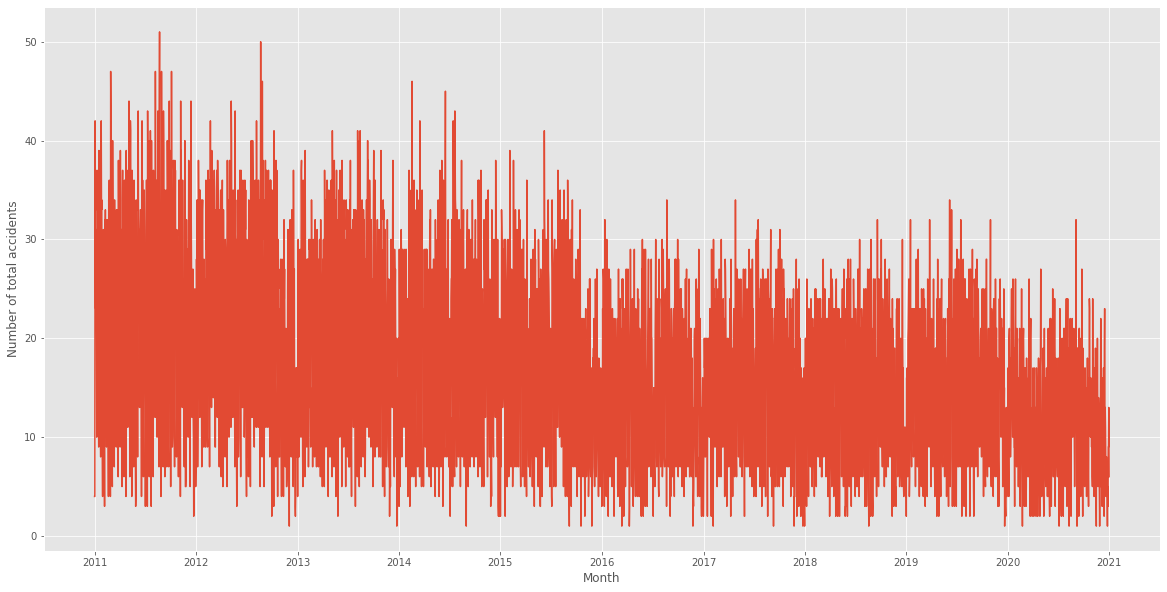

In [ ]:
# Looking at daily values makes the graph hard to read and overcrowded
plt.figure(figsize=(20,10))
plt.plot(accidents_number)
plt.xlabel('Month')
plt.ylabel('Number of total accidents')
plt.show()

In [ ]:
# Converting daily values into monthly
accidents_number = accidents_number.resample('M').sum()
accidents_number.head()

mine_id
Accident Date (Accidents)         
2011-01-31                     743
2011-02-28                     670
2011-03-31                     776
2011-04-30                     727
2011-05-31                     750

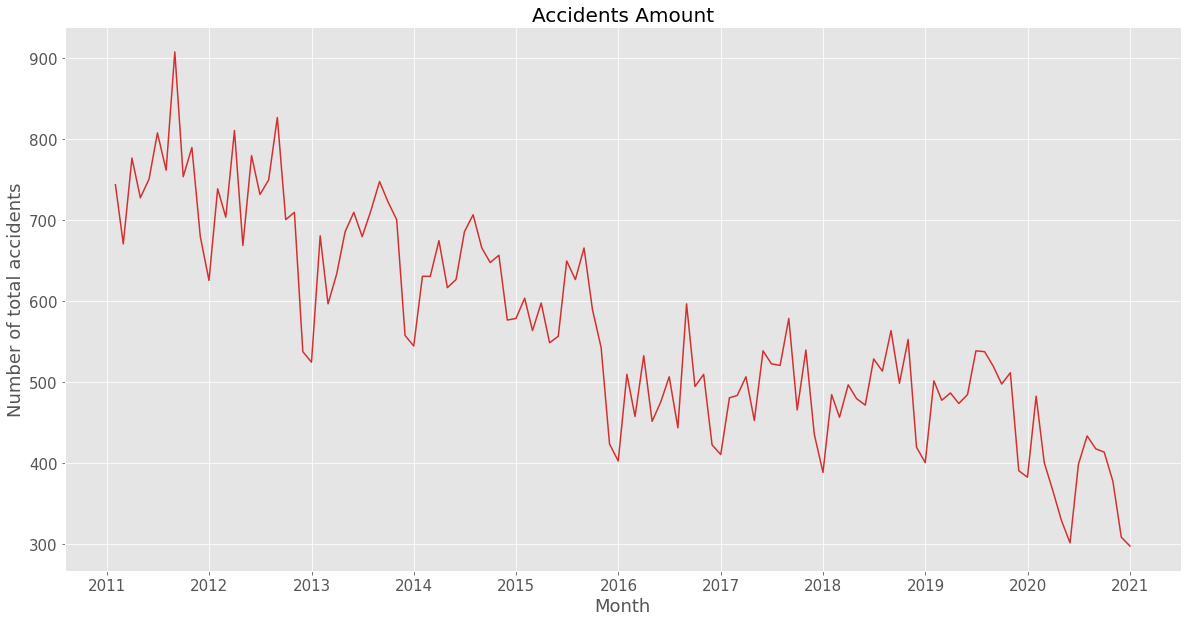

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(accidents_number, color = "#d42f2f")
plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents Amount', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [ ]:
# Converting daily values to monthly
accidents_number = accidents_number.resample('Y').sum()
accidents_number.sort_values(by = 'mine_id', ascending= False, inplace = True)
accidents_number.head(10)

mine_id
Accident Date (Accidents)         
2011-12-31                    8987
2012-12-31                    8474
2013-12-31                    7963
2014-12-31                    7689
2015-12-31                    6763
2017-12-31                    5906
2018-12-31                    5859
2016-12-31                    5804
2019-12-31                    5795
2020-12-31                    4520

- Highest no of accidents was in 2011 - 8,987
- Lowest no of accidents was in 2020 - 4,520
- Every year the accidents were decreasing except for 2017, 2018 which had more accidents than 2016 (breaking the descending trend)


### Operator with Most Accidents

In [ ]:
operator_df = mines_accident.copy(deep=False)
operator_counts = pd.DataFrame(operator_df.groupby('Operator Name (Current)').agg({'mine_id':'count'}))
operator_counts = operator_counts.sort_values(by='mine_id', ascending=False)
#operator_counts['percentage'] = (operator_counts['mine_id']*100)/np.sum(operator_counts['mine_id']) #quite low %
operator_counts.head(10)

mine_id
Operator Name (Current)                      
Nevada Gold Mines, LLC                    996
Freeport-McMoRan Morenci Inc.             887
Consol Pennsylvania Coal Company LLC      801
Marshall County Coal Resources, Inc.      749
Rosebud Mining Company                    704
Warrior Met Coal Mining, LLC              703
Vulcan Construction Materials, LLC        601
Rockwell Mining LLC                       533
Buzzi Unicem USA                          528
Panther Creek Mining LLC                  508

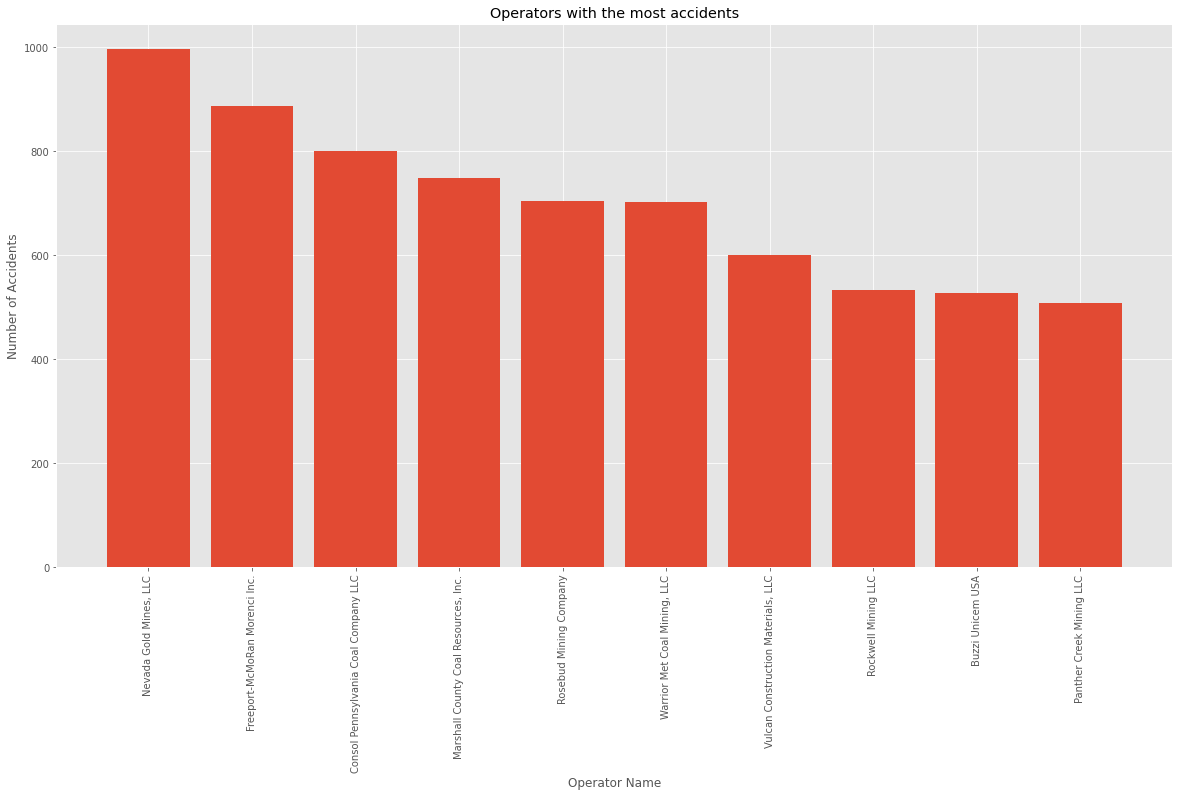

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(operator_counts.index[:10],operator_counts['mine_id'][:10])
plt.xticks(rotation=90)
plt.xlabel('Operator Name')
plt.ylabel('Number of Accidents')
plt.title('Operators with the most accidents')
plt.show()

1. Nevada Gold Mines, LLC (996)
2. Freeport-McMoRan Morenci Inc. (880)
3. Consol Pennsylvania Coal Company LLC (791)
4. Marshall County Coal Resources, Inc (739)
5. Rosebud Mining Company (698)


### Mines with Most Accidents

In [ ]:
# Creating a copy to work with, group by the observed
# attribute and counting the no. of instances + sorting
mines_df = mines_accident.copy(deep = False)
mines_counts = pd.DataFrame(mines_df.groupby('Mine Name').agg({'mine_id': 'count'}))
mines_counts = mines_counts.sort_values(by='mine_id', ascending=False) # mines with least accidents -- change to True

# Create a new column called "percentage" and populate it with the percentage of 
# the accidents (compared to the total accidents) of each mine
mines_counts['percentage'] = (mines_counts['mine_id']*100)/np.sum(mines_counts['mine_id']) #quite low %
mines_counts.head(10)

mine_id  percentage
Mine Name                                         
Freeport-McMoRan Morenci Inc.      887    1.309032
Marshall County Mine               744    1.097993
Cumberland Mine                    522    0.770366
Marion County Mine                 436    0.643447
No 7 Mine                          434    0.640496
Shoal Creek Mine                   405    0.597698
Bailey Mine                        384    0.566706
River View Mine                    350    0.516529
STILLWATER MINE                    342    0.504723
Monongalia County Mine             336    0.495868

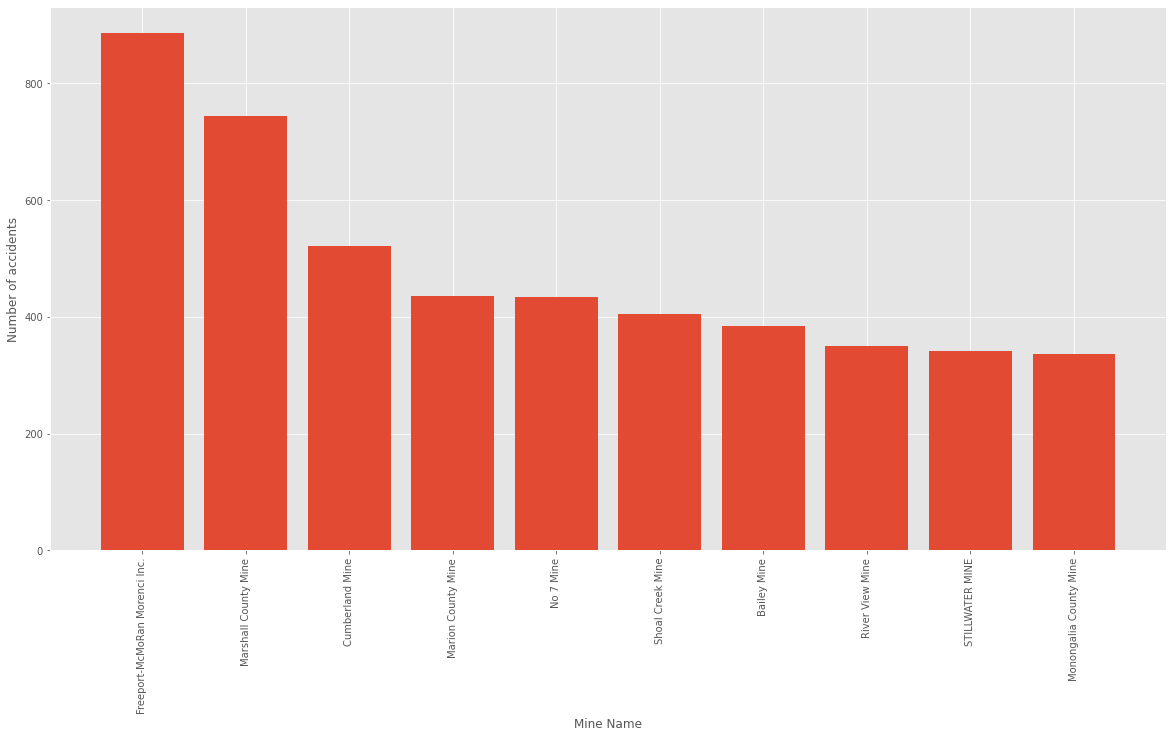

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(mines_counts.index[:10], mines_counts['mine_id'][:10])
plt.xticks(rotation='vertical')
plt.xlabel('Mine Name')
plt.ylabel('Number of accidents')
plt.show()

1. Freeport-McMoRan Morenci Inc. 887 (1.3%)
2. Marshall County Mine 744 (1.0%)
3. Cumberland Mine 522 (0.77%)
4. Marion County Mine 436 (0.64%)
5. No 7 Minew (0.64%)


#### Victim Experience in Top 5 Mines

In [ ]:
mines_df = mines_accident.copy(deep = False)

#filtering out only the top 5 mines by using conditional(OR) operator
mines_top5 = mines_df[(mines_df['Mine Name']=='Freeport-McMoRan Morenci Inc.')| (mines_df['Mine Name']=='Marshall County Mine') | (mines_df['Mine Name']=='Cumberland Mine') | (mines_df['Mine Name']=='Marion County Mine') | (mines_df['Mine Name']=='No 7 Mine')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


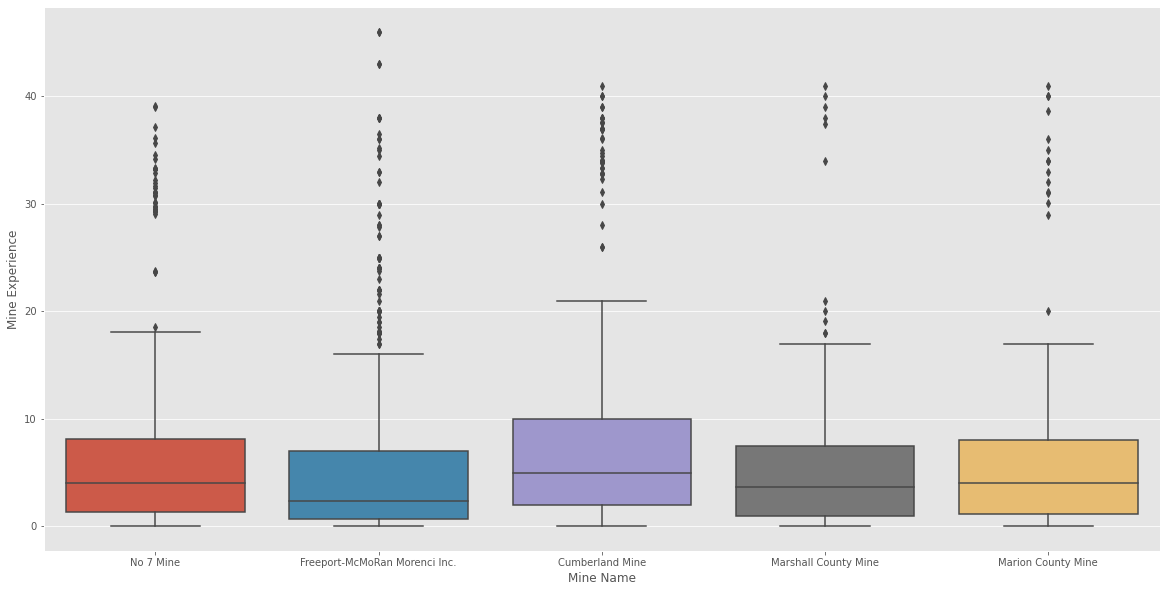

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(mines_top5['Mine Name'], mines_top5['Mine Experience'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


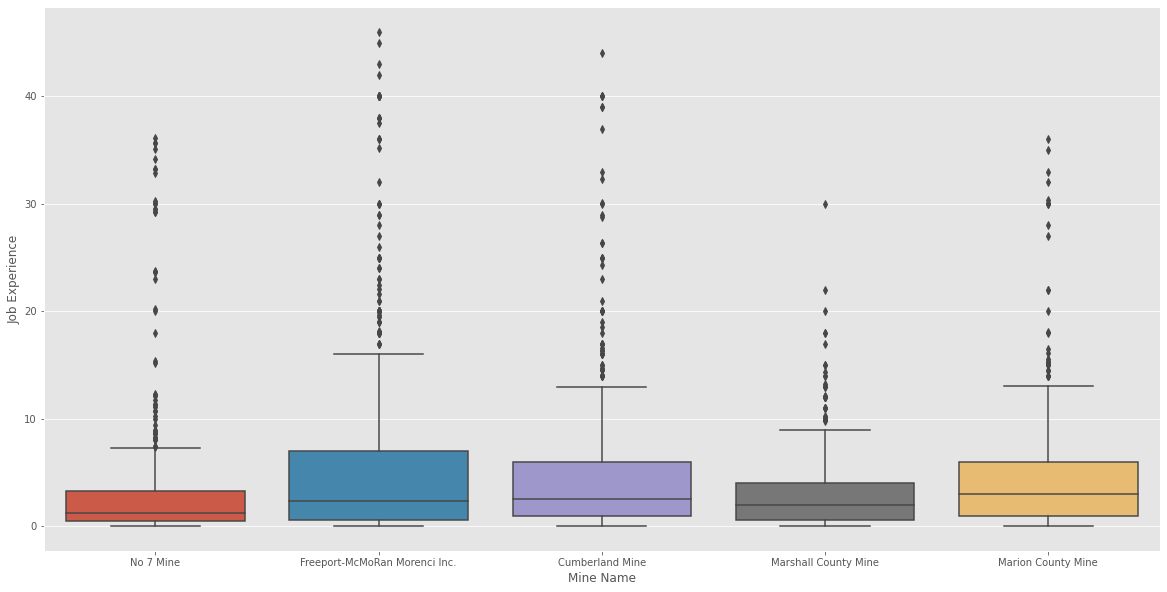

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(mines_top5['Mine Name'], mines_top5['Job Experience'])
plt.show()

- 75% of the people working at No 7 Mine have a job experience of less than 3.5 years.
- 75% of people working at Marshall County Mine have a job experience of less than 4 years.	

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


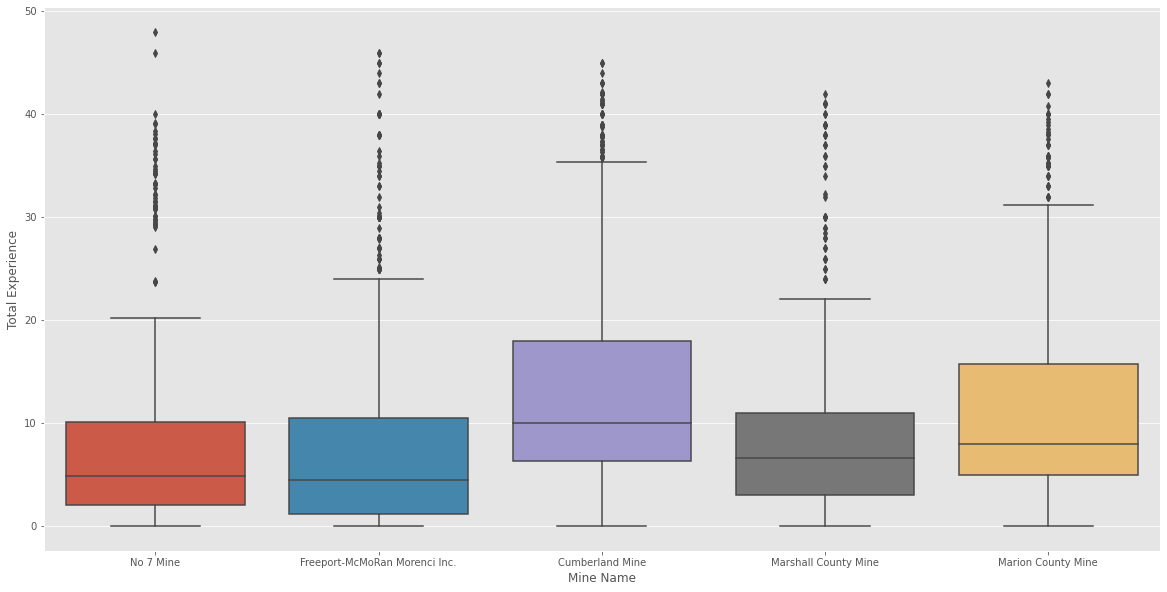

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(mines_top5['Mine Name'], mines_top5['Total Experience'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


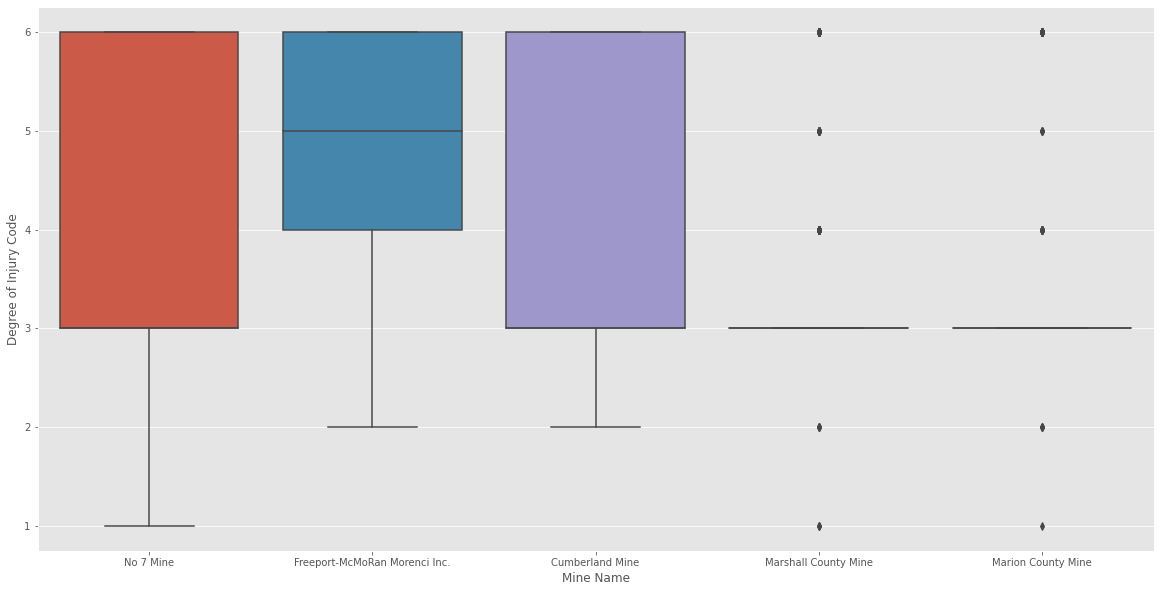

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(mines_top5['Mine Name'], mines_top5['Degree of Injury Code'])
plt.show()

- 2nd mine has a higher number of less severe accidents in comparison with others where only 25% accidents are less than degree 4.

- Mines 4 & 5 have a significant number of degree 3 injuries while also having outliers in both directions.

### Degree of Injury

In [ ]:
injury_df = mines_accident.copy(deep = False)
degree_injury = injury_df.groupby('Degree of Injury Code').agg({'mine_id':'count'})
degree_injury = degree_injury.sort_values(by='mine_id', ascending=False)
degree_injury

mine_id
Degree of Injury Code         
3                        24672
6                        21432
5                        13614
4                         6960
2                          756
1                          326

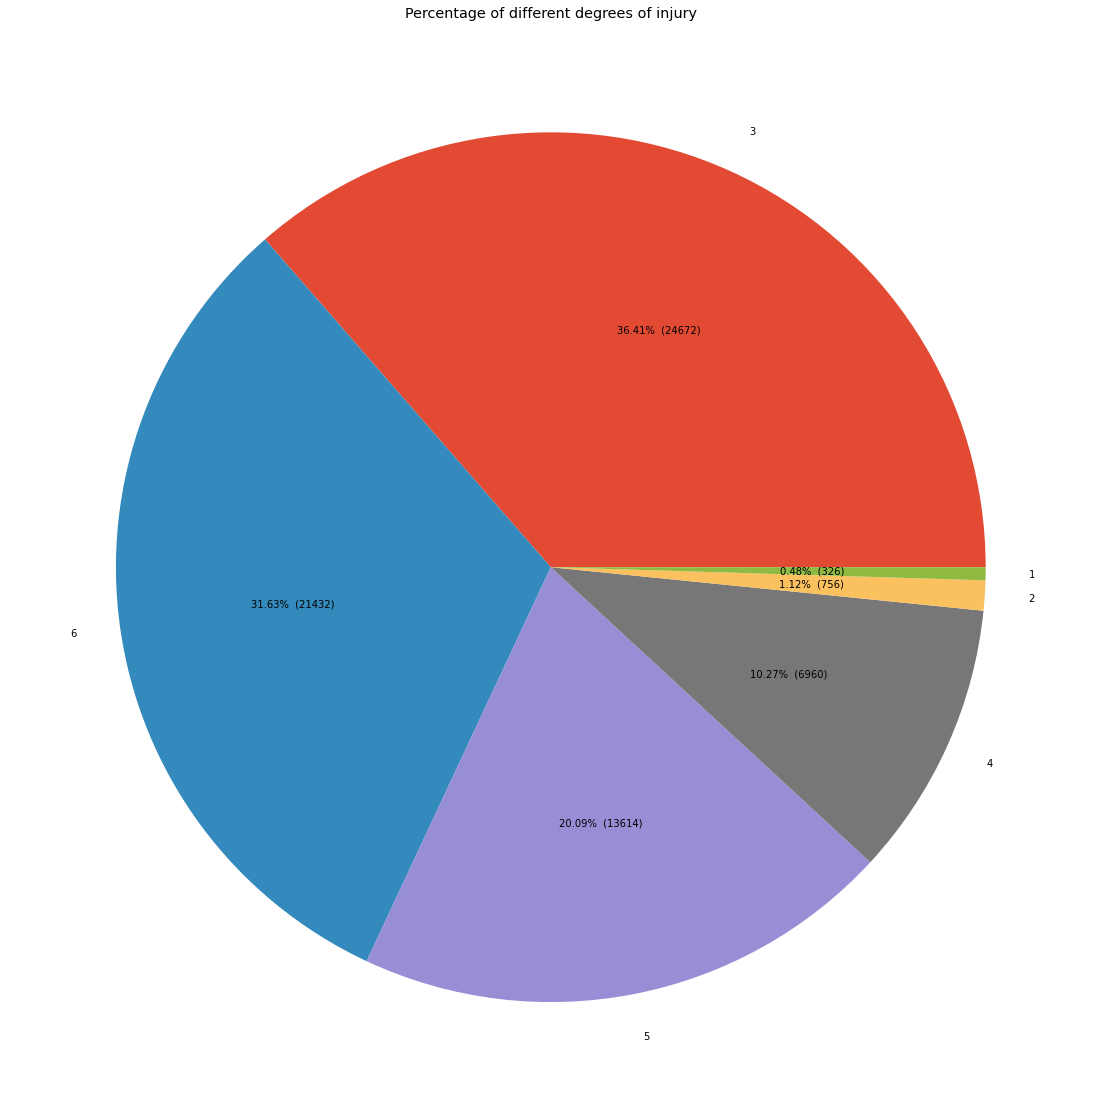

In [ ]:
# mine_id is not the actual mine id, but the number of occurences in each category of degree_of_injury
# Storing the number of occurences in a variable called values
values = degree_injury['mine_id']

#Sstoring the labels(1,2,3..) in a varible called labels
labels = degree_injury.index 

# Creating a custom function that gives us the percentage of occurences for each
# category along with the total occuerences for each degree
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Plotting the pie chart
plt.figure(figsize=(40,20))
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.title('Percentage of different degrees of injury')
plt.show()

### Mines Experience vs Degree of Injury



In [ ]:
# Select the column 'Mine Experience' from the combined dataset 'mines_accident' 
# and only show those rows where the value of 'mine_id' is 4609237
mines_accident['Mine Experience'].loc[mines_accident['mine_id'] ==4609237]

757      1.00
758      1.00
2361     1.00
2666     2.00
5436     0.15
6287     1.46
6454     0.25
6511     0.42
7464     2.00
7800     0.23
9611     2.00
10309    1.00
13706    0.08
Name: Mine Experience, dtype: float64

There are some NaN values in 'Mine Experience' for each mine. Should we take the average of all the values of 'Mine Experience' for each mine or should we take the maximum value among these values as the experience for that mine. So in the above example, should we take the mean(say 1.32) as the experience value for mine 4609237 or should we take the maximum value(3.08) as its experience.
If we take the average of all the values then we find no significant correlation between mine exp and mine accidents. However, if we take the maximum value as its experience then we do see a positive correlaton between these variables.

In [ ]:
# drop those rows where we see a null value for 'Degree of Injury' or 'Mine Exp' or 'Job Exp'
mines_exp = mines_accident.dropna(0,subset = ['Degree of Injury Code', 'Mine Experience', 'Job Experience'])

In [ ]:
# plt.figure(figsize=(20,10))
# sns.swarmplot(mines_exp['Degree of Injury Code'],mines_exp['Mine Experience'])
# plt.xlabel('Degree of Injury')
# plt.ylabel('Mine Experience')
# plt.show()
# People with less experience have died [1,2], equally distributed and people with less and more experience get [3-6]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


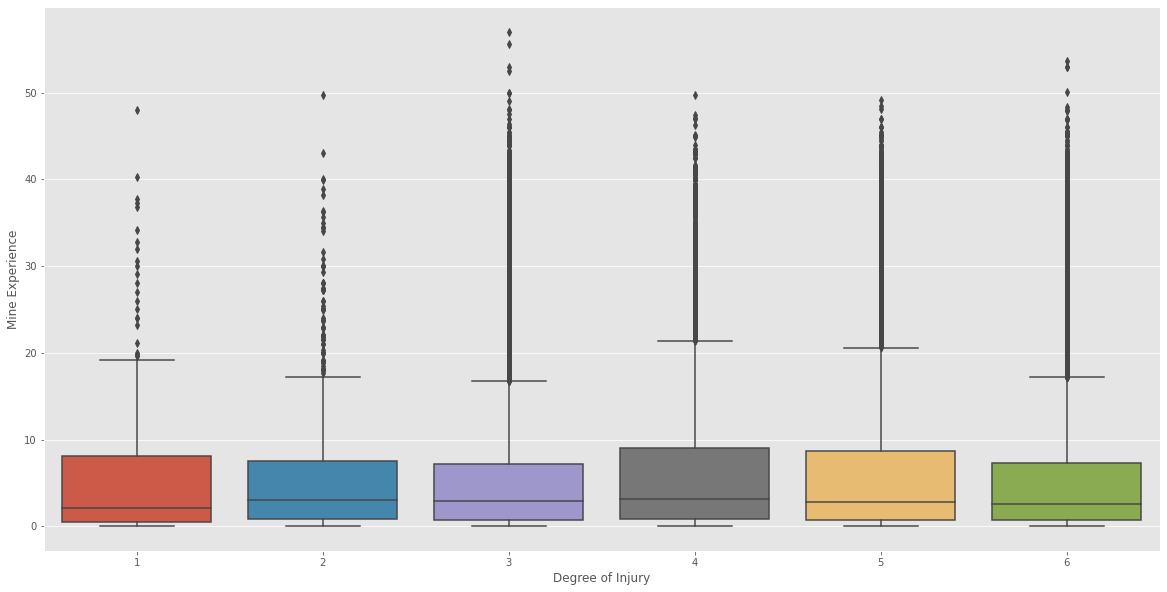

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(mines_exp['Degree of Injury Code'],mines_exp['Mine Experience'])
plt.xlabel('Degree of Injury')
plt.ylabel('Mine Experience')
plt.show()

In [ ]:
mine_exp = pd.DataFrame(mines_accident.groupby('mine_id').agg({'Mine Experience':'max'}))
# drop the rows(axis=0) where the value in 'Mine Experience' is null. Overwrite it in the mine_exp itself
mine_exp.dropna(axis=0, subset=['Mine Experience'], inplace=True)
mine_exp['Mine Experience'].isna().sum()

0

In [ ]:
mines_accident_df = mines_accident.copy(deep=False)
mines_counts = pd.DataFrame(mines_accident_df.groupby('mine_id').agg({'Mine Name':'count'}))
mines_counts = mines_counts.sort_values(by='mine_id', ascending=False)
# Rename column 'Mine Name' to 'Accidents'
mines_counts.rename(columns={'Mine Name':'Accidents'},inplace=True)

In [ ]:
# join two tables using the column mine_id from both. Inner join
accident_exp = mines_counts.join(mine_exp, on='mine_id', how='inner')
accident_exp.shape

(6710, 2)

In [ ]:
# new_exp is equal to those entries of accident_exp where the value in 'Accidents' is greater than 10
new_exp = accident_exp[accident_exp['Accidents']>10]
new_exp

Accidents  Mine Experience
mine_id                            
5400299         12            18.69
5400135         13            14.00
5400120         47            47.00
5400019         12            13.38
5400001         15            26.00
...            ...              ...
100027          49            40.81
100016          38            38.38
100011          68            39.23
100008          22            39.00
100003          64            31.38

[1207 rows x 2 columns]

In [ ]:
# calculate the pearson coeff. between two columns
corr, _ = pearsonr(new_exp['Accidents'],new_exp['Mine Experience'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.215


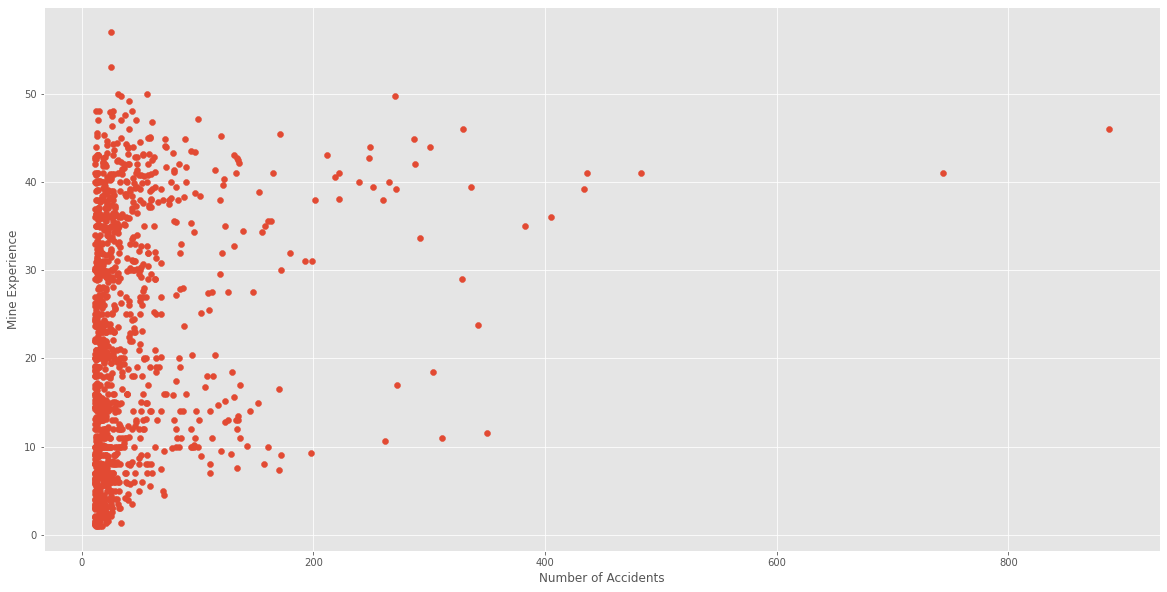

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(new_exp['Accidents'],new_exp['Mine Experience'])
plt.xlabel('Number of Accidents')
plt.ylabel('Mine Experience')
plt.show()

In [ ]:
# calculate the pearson coeff. between two columns
corr, _ = pearsonr(mines_exp['Degree of Injury Code'],mines_exp['Mine Experience'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.015


### Canvas Code and Seasonality

In [ ]:
mines_season = accident_count.copy(deep = False)
#mines_season.index = mines_season['Accident Date (Accidents)']

In [ ]:
# multilevel grouping, first groupby accident date and then by primary canvass code
canvascode_group = mines_season.groupby(['Accident Date (Accidents)','Primary Canvass Code']).agg({'mine_id': 'count'})
canvascode_group

mine_id
Accident Date (Accidents) Primary Canvass Code         
2011-01-01                2.0                         3
                          8.0                         1
2011-01-02                6.0                         1
                          7.0                         1
                          8.0                         2
...                                                 ...
2020-12-30                6.0                         1
                          8.0                         5
2020-12-31                2.0                         2
                          6.0                         2
                          8.0                         2

[15853 rows x 1 columns]

In [ ]:
# unstacking the groupby table into a desired form for plotting
canvas_monthly = canvascode_group.unstack(1).resample('M').sum()
canvas_monthly

mine_id                                 
Primary Canvass Code          1.0    2.0   5.0    6.0   7.0    8.0
Accident Date (Accidents)                                         
2011-01-31                   12.0  391.0  37.0  147.0  66.0   90.0
2011-02-28                    2.0  342.0  43.0  132.0  58.0   93.0
2011-03-31                    4.0  409.0  50.0  150.0  50.0  113.0
2011-04-30                    4.0  379.0  43.0  149.0  57.0   95.0
2011-05-31                    2.0  370.0  41.0  165.0  51.0  121.0
...                           ...    ...   ...    ...   ...    ...
2020-08-31                    2.0  131.0  44.0  133.0  37.0   70.0
2020-09-30                    4.0  130.0  37.0  142.0  38.0   62.0
2020-10-31                    4.0  136.0  36.0  101.0  38.0   61.0
2020-11-30                    5.0   83.0  37.0   94.0  28.0   61.0
2020-12-31                    4.0   80.0  26.0   79.0  30.0   78.0

[120 rows x 6 columns]

In [ ]:
# gives us the column names in any table. Since it is a multilevel column, so we have tuples (elements contained inside a () are called tuples )
# as column names.
canvas_monthly.columns

MultiIndex([('mine_id', 1.0),
            ('mine_id', 2.0),
            ('mine_id', 5.0),
            ('mine_id', 6.0),
            ('mine_id', 7.0),
            ('mine_id', 8.0)],
           names=[None, 'Primary Canvass Code'])

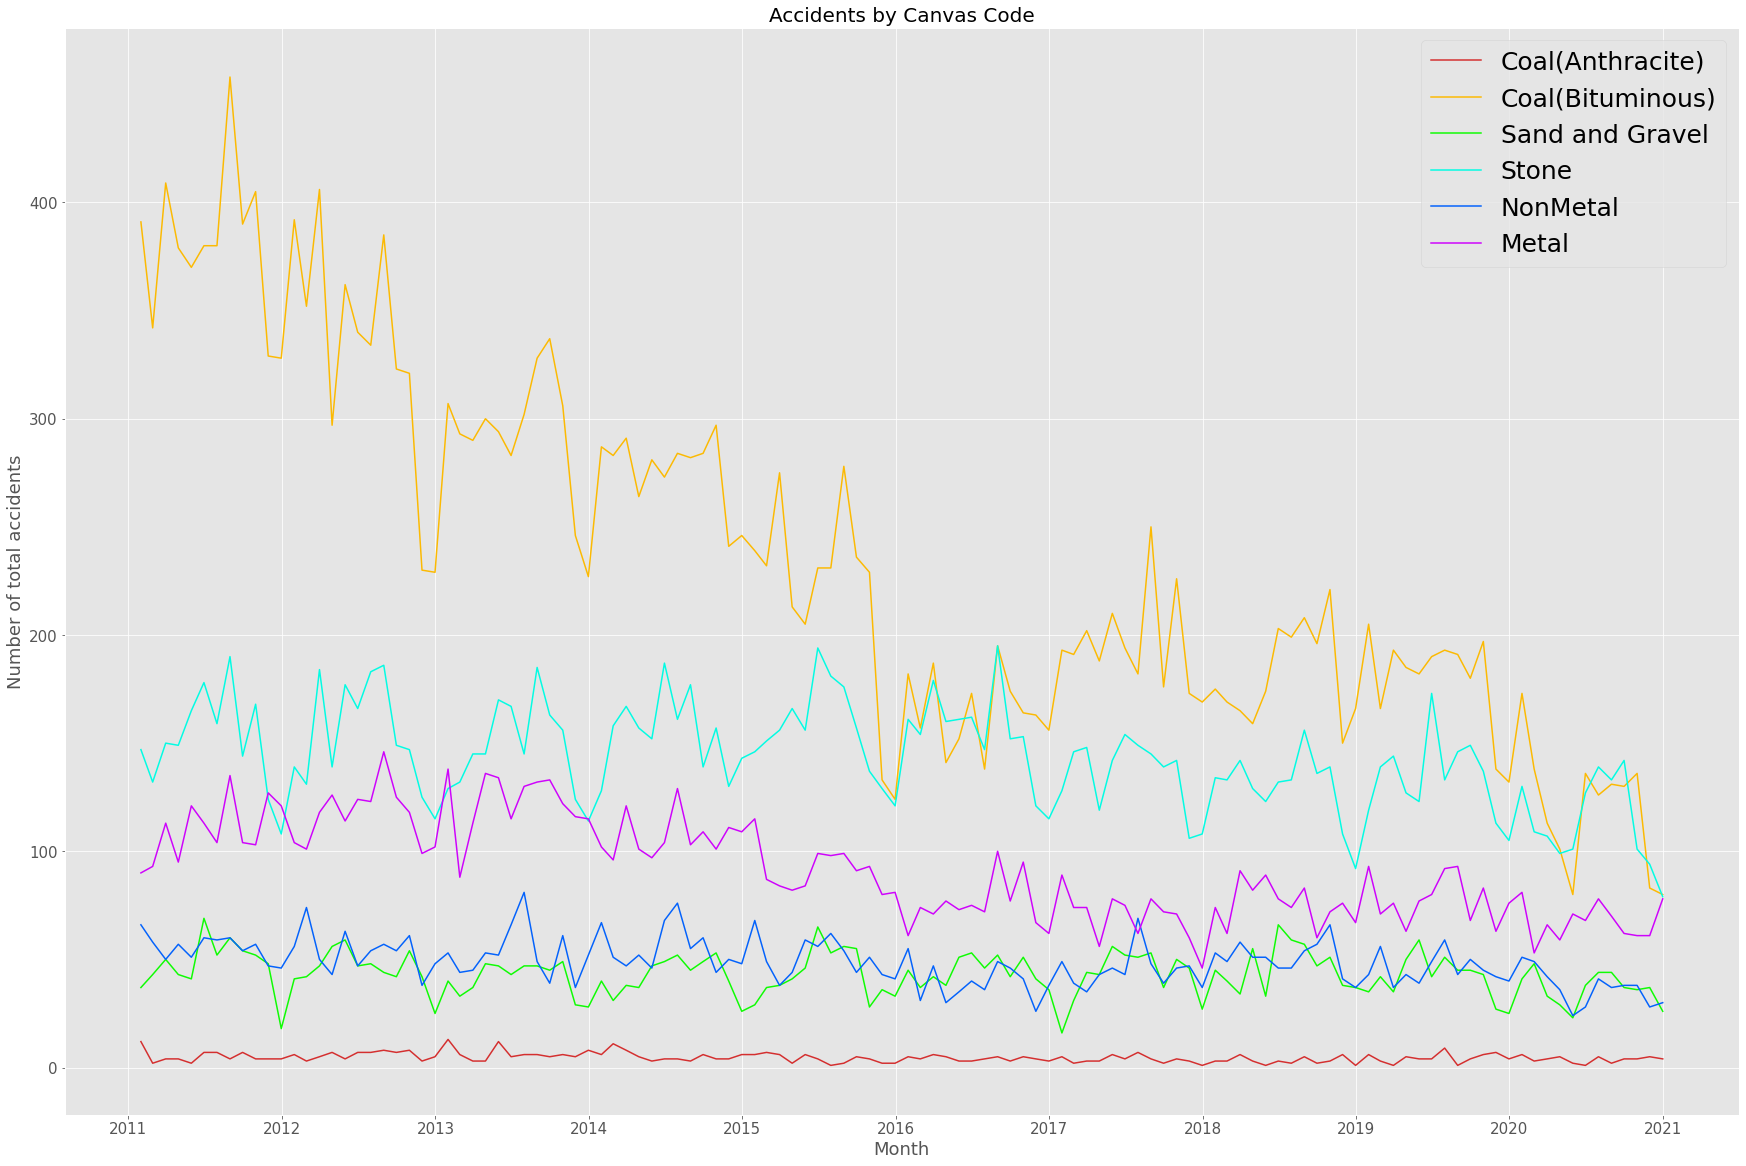

In [ ]:
plt.figure(figsize=(30,20))
# plotting each column individually, each column is a line in the graph
# on x axis we have the indices (dates), on y axis we want each column, which are tuples
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 1.0)], color = "#d42f2f")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 2.0)], color = "#fcba03")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 5.0)], color = "#0ffc03")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 6.0)], color = "#03fce3")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 7.0)], color = "#0362fc")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 8.0)], color = "#ce03fc")

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [ ]:
# unstacking the groupby table into a desired form for plotting
canvas_yearly = canvascode_group.unstack(1).resample('Y').sum()
canvas_yearly

mine_id                                      
Primary Canvass Code          1.0     2.0    5.0     6.0    7.0     8.0
Accident Date (Accidents)                                              
2011-12-31                   61.0  4561.0  567.0  1814.0  665.0  1319.0
2012-12-31                   70.0  3971.0  547.0  1841.0  645.0  1400.0
2013-12-31                   78.0  3513.0  493.0  1775.0  632.0  1472.0
2014-12-31                   64.0  3313.0  507.0  1856.0  664.0  1283.0
2015-12-31                   47.0  2626.0  517.0  1870.0  609.0  1093.0
2016-12-31                   50.0  1982.0  534.0  1860.0  474.0   904.0
2017-12-31                   44.0  2354.0  506.0  1626.0  541.0   835.0
2018-12-31                   38.0  2185.0  562.0  1557.0  609.0   908.0
2019-12-31                   54.0  2152.0  499.0  1608.0  546.0   935.0
2020-12-31                   45.0  1427.0  436.0  1361.0  442.0   808.0

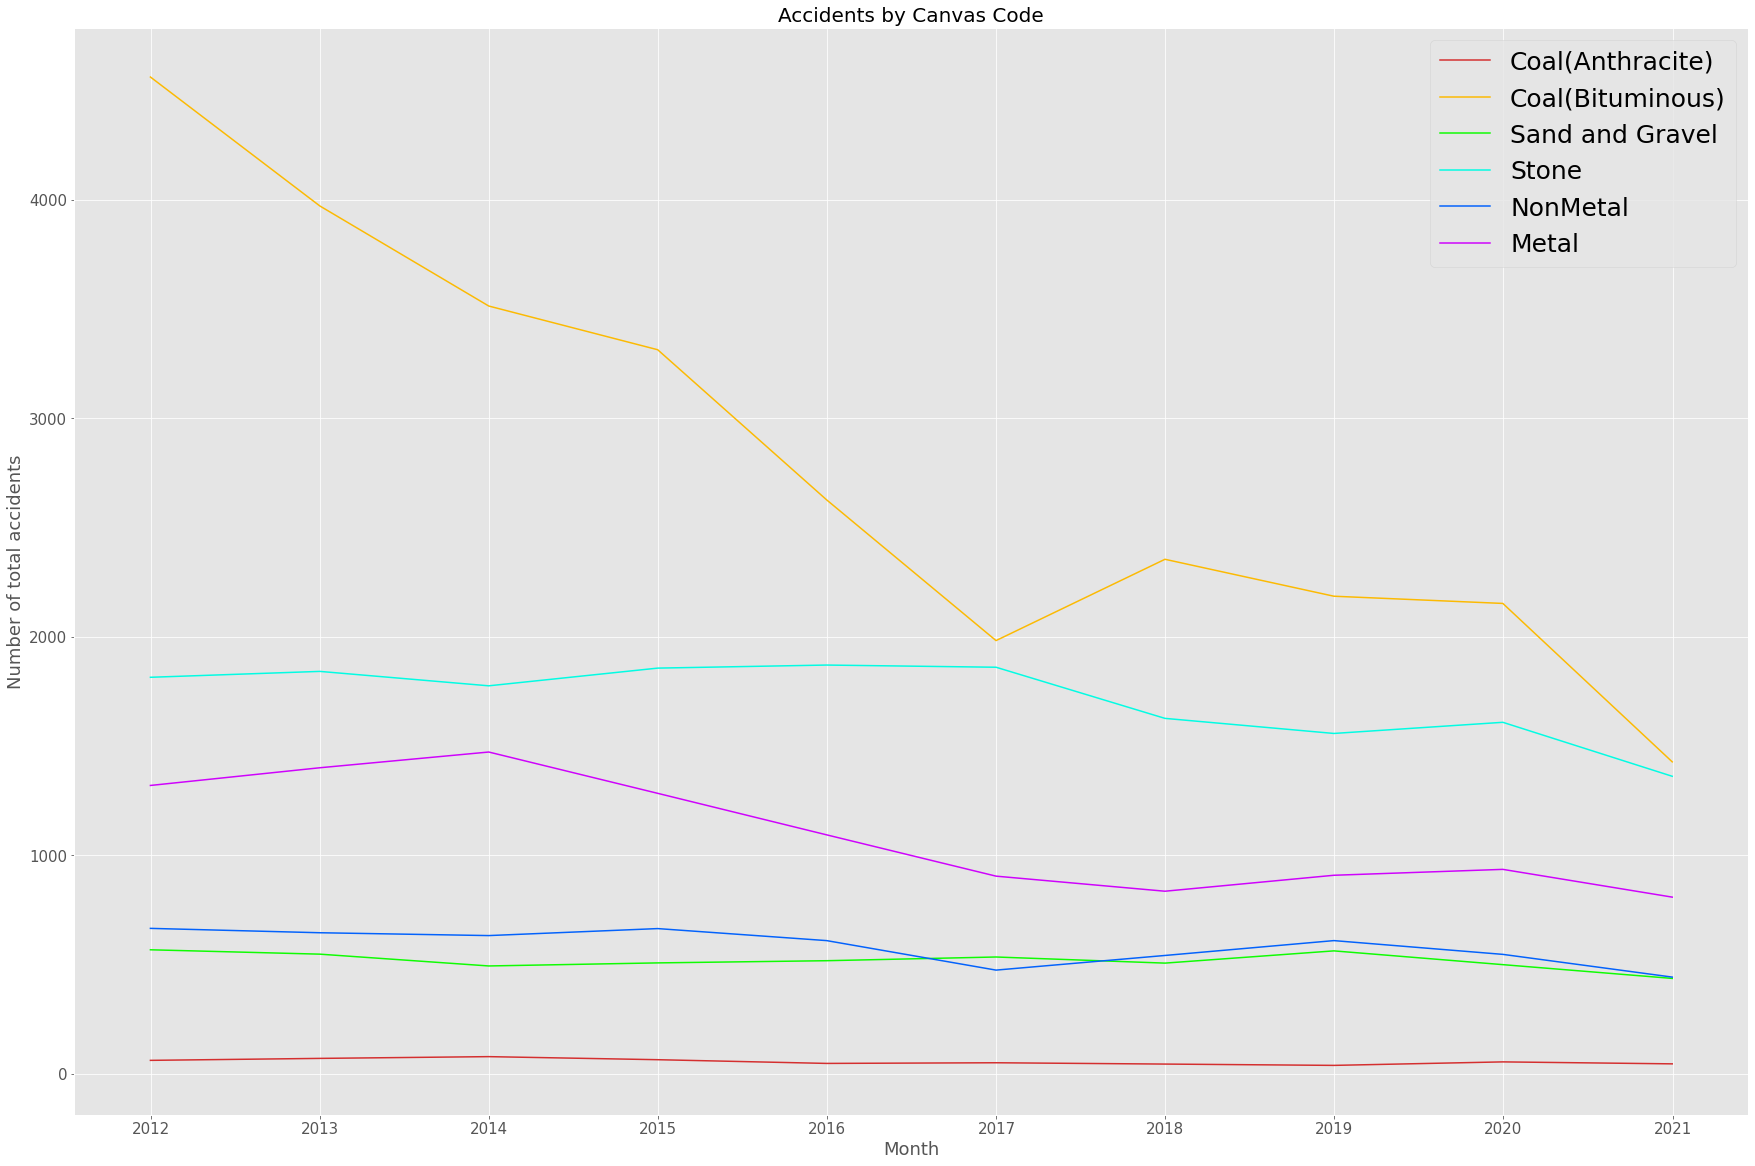

In [ ]:
plt.figure(figsize=(30,20))
# plotting each column individually, each column is a line in the graph
# on x axis we have the indices (dates), on y axis we want each column, which are tuples
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 1.0)], color = "#d42f2f")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 2.0)], color = "#fcba03")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 5.0)], color = "#0ffc03")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 6.0)], color = "#03fce3")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 7.0)], color = "#0362fc")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 8.0)], color = "#ce03fc")

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

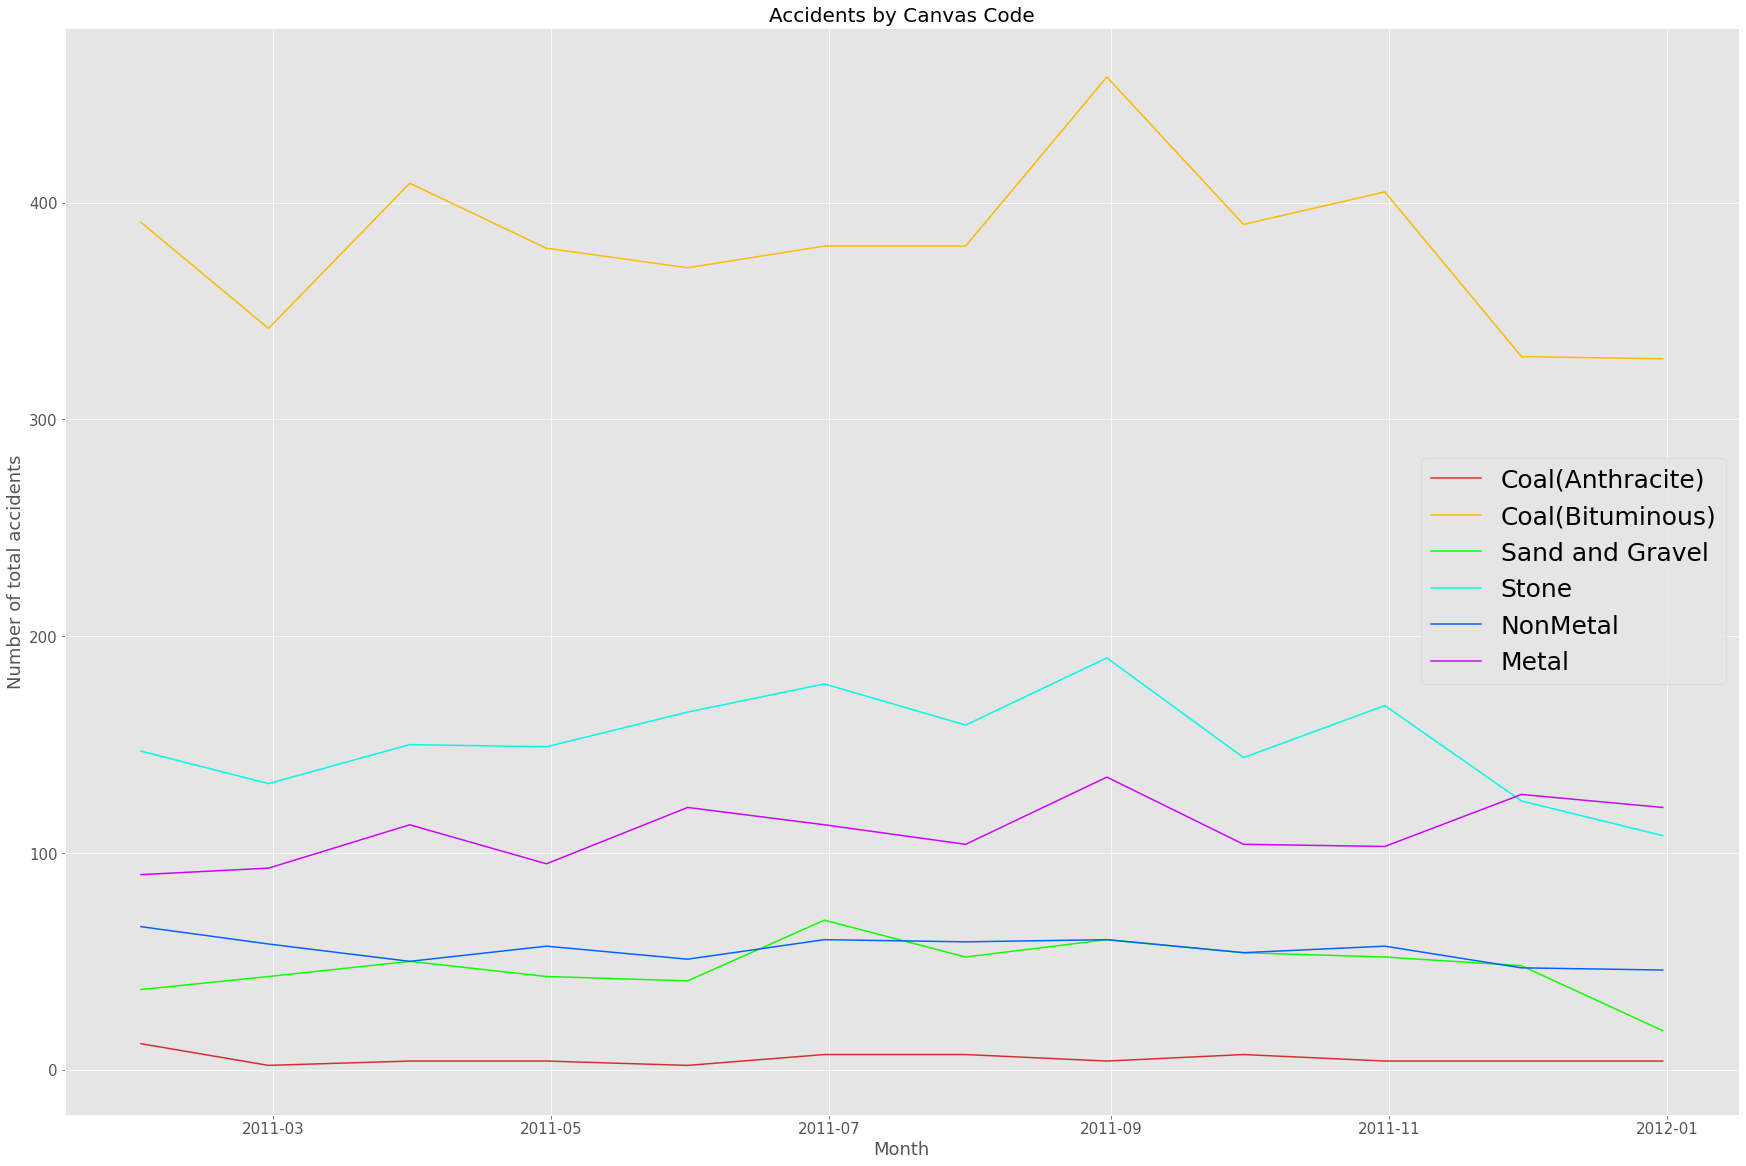

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2011-01-01': '2011-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2011-01-01': '2011-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2011-01-01': '2011-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2011-01-01': '2011-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2011-01-01': '2011-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2011-01-01': '2011-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

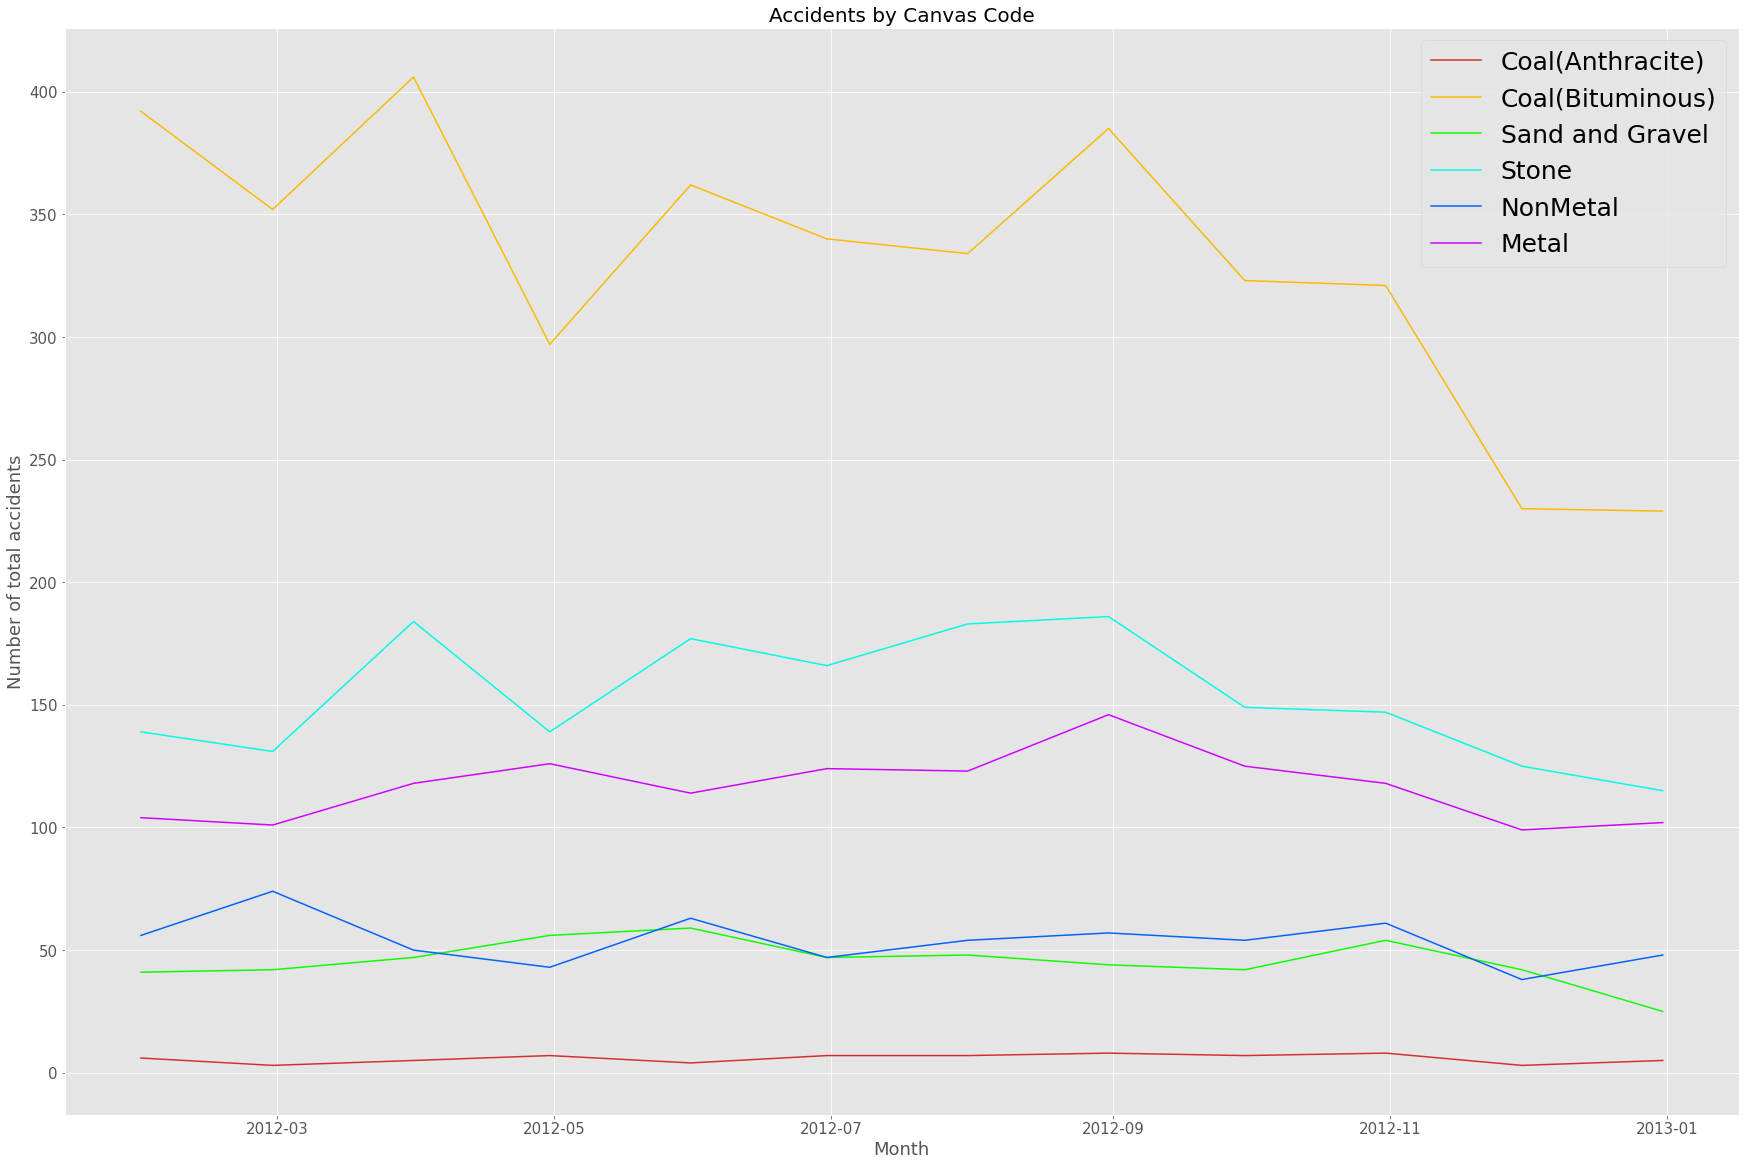

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2012-01-01': '2012-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2012-01-01': '2012-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2012-01-01': '2012-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2012-01-01': '2012-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2012-01-01': '2012-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2012-01-01': '2012-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

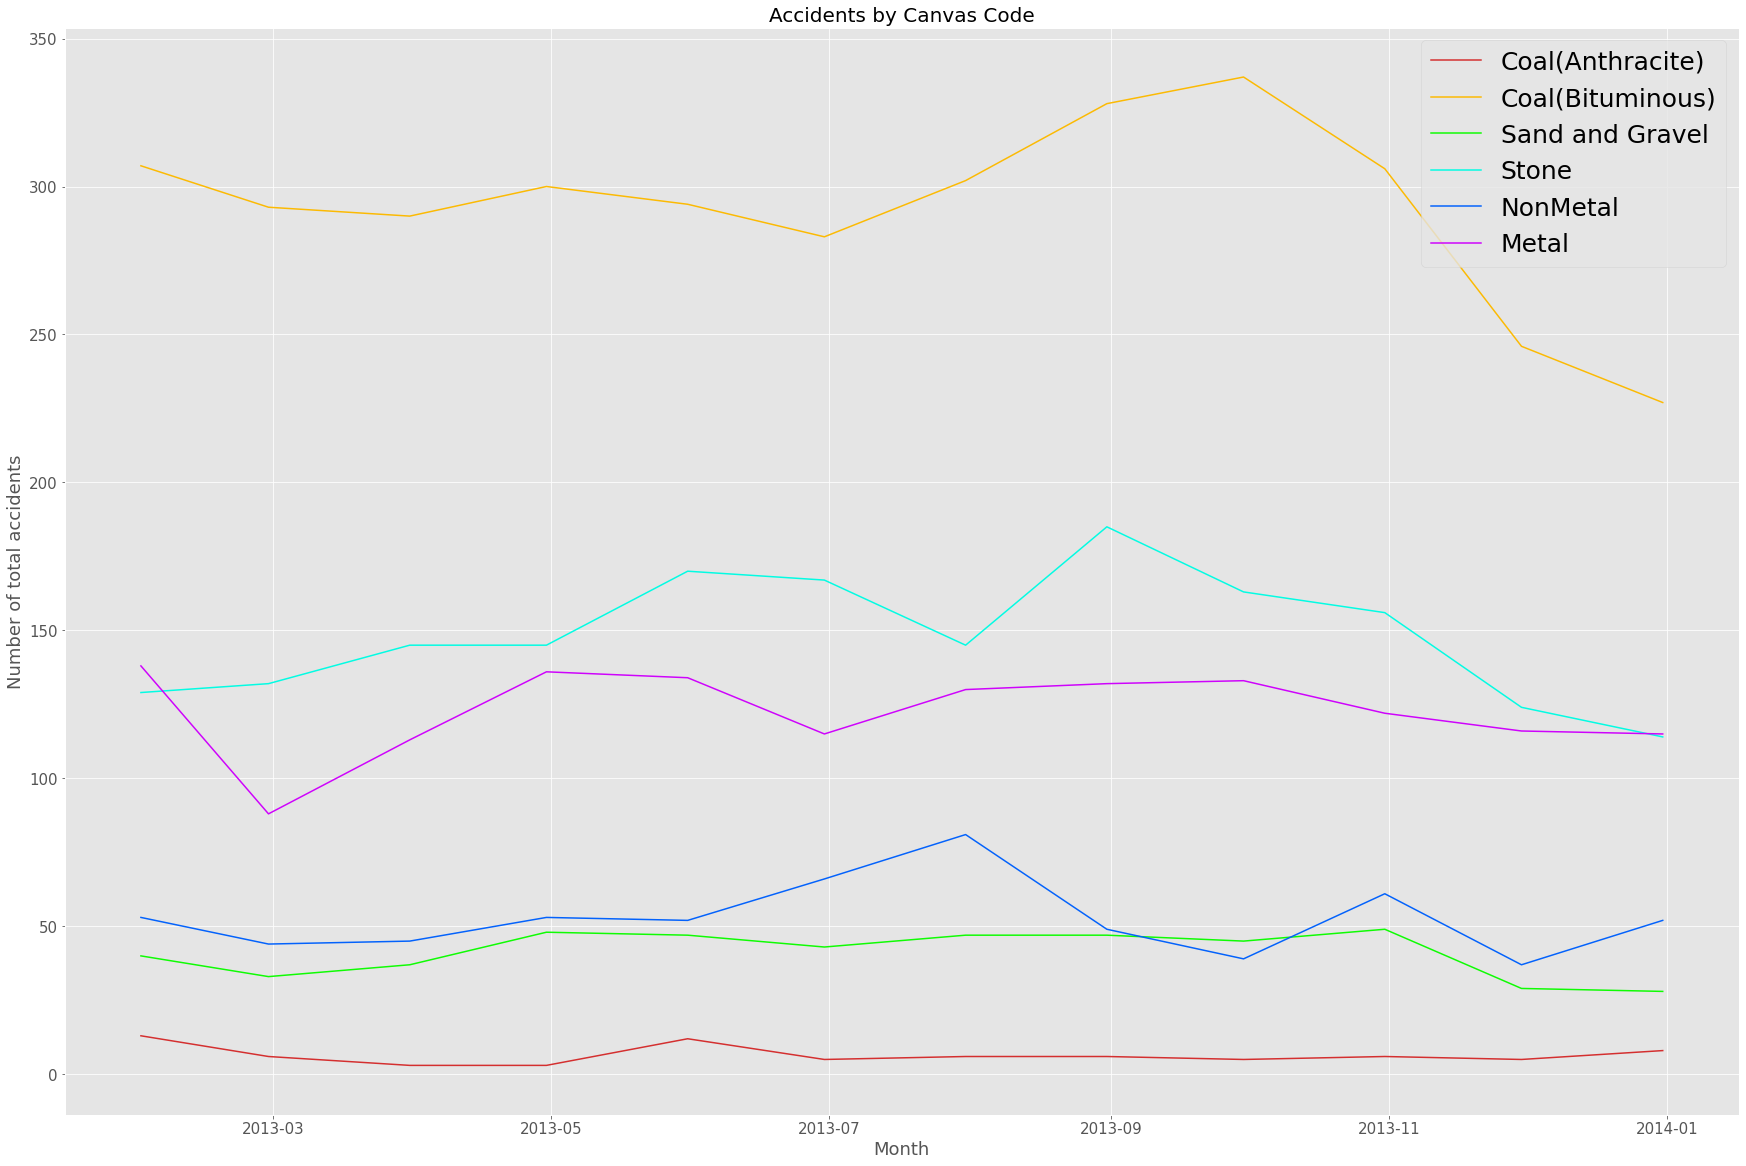

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2013-01-01': '2013-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2013-01-01': '2013-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2013-01-01': '2013-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2013-01-01': '2013-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2013-01-01': '2013-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2013-01-01': '2013-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

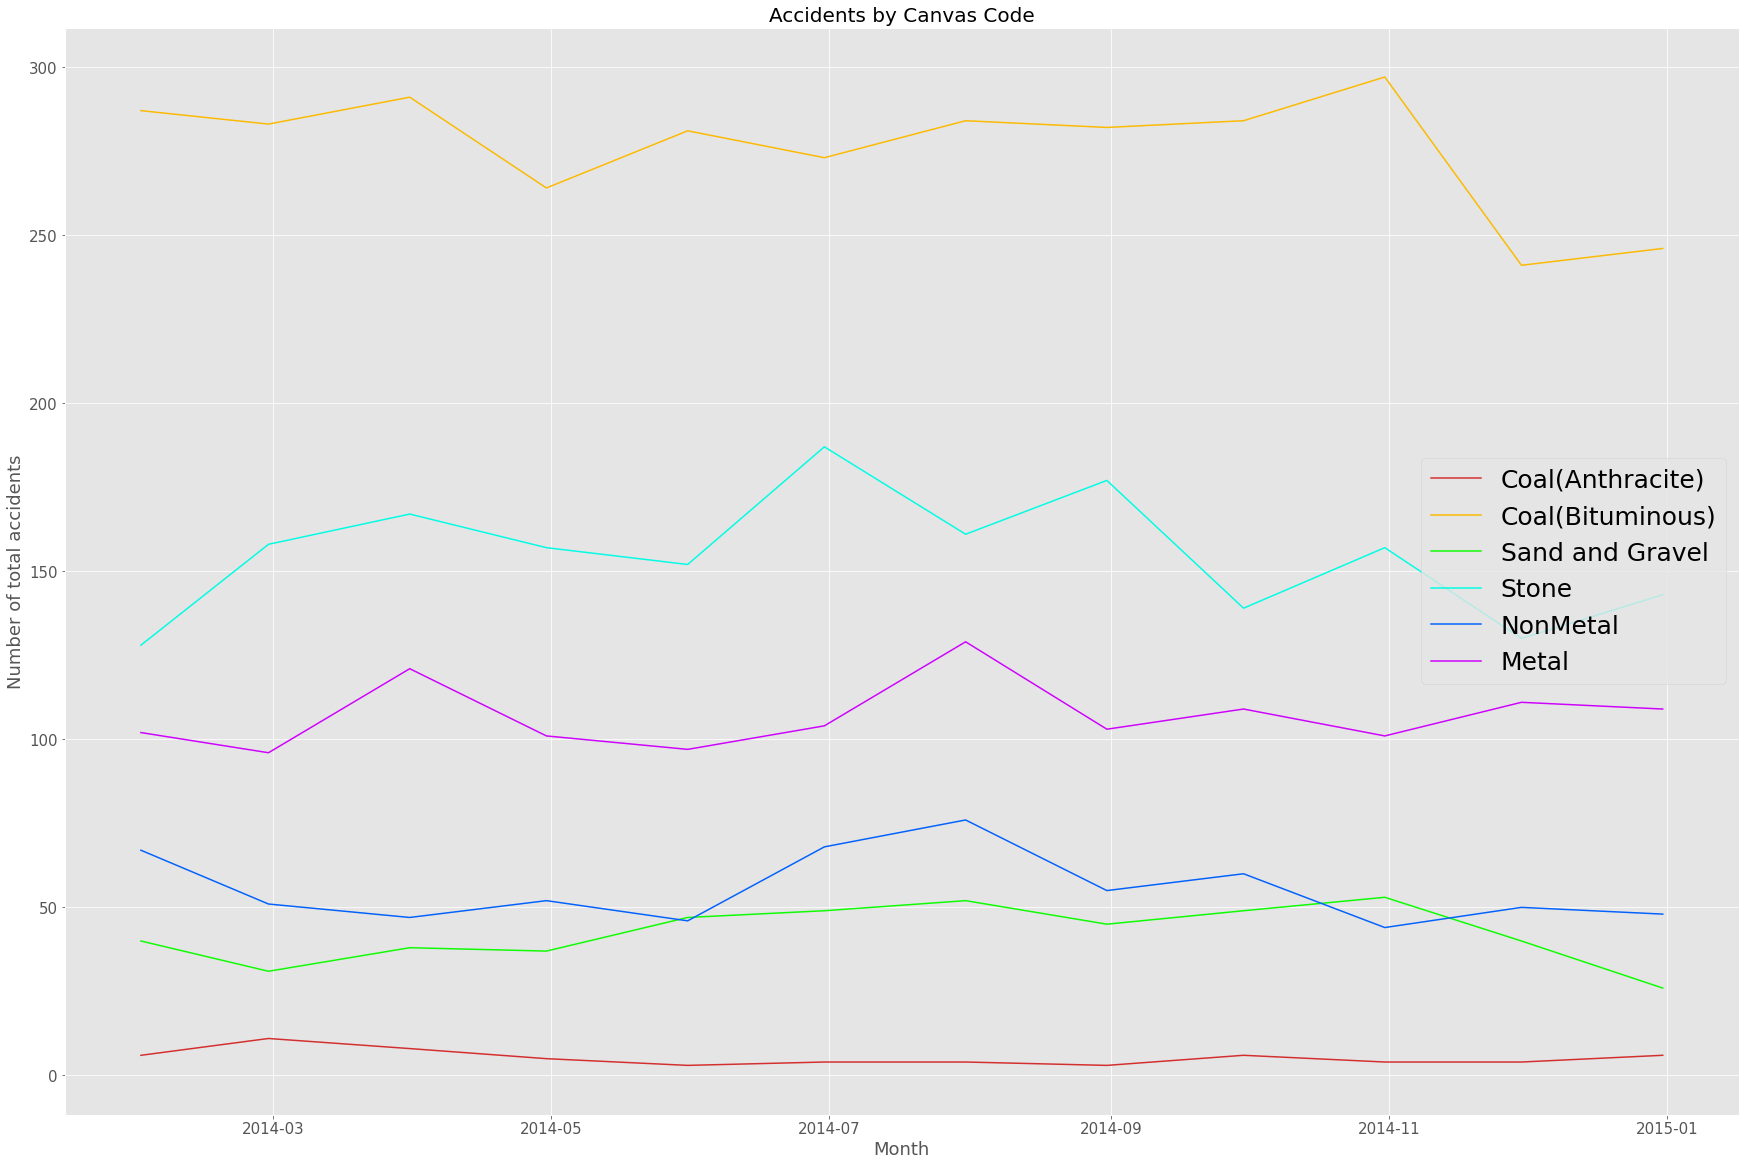

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2014-01-01': '2014-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2014-01-01': '2014-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2014-01-01': '2014-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2014-01-01': '2014-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2014-01-01': '2014-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2014-01-01': '2014-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25, loc = 5) 
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

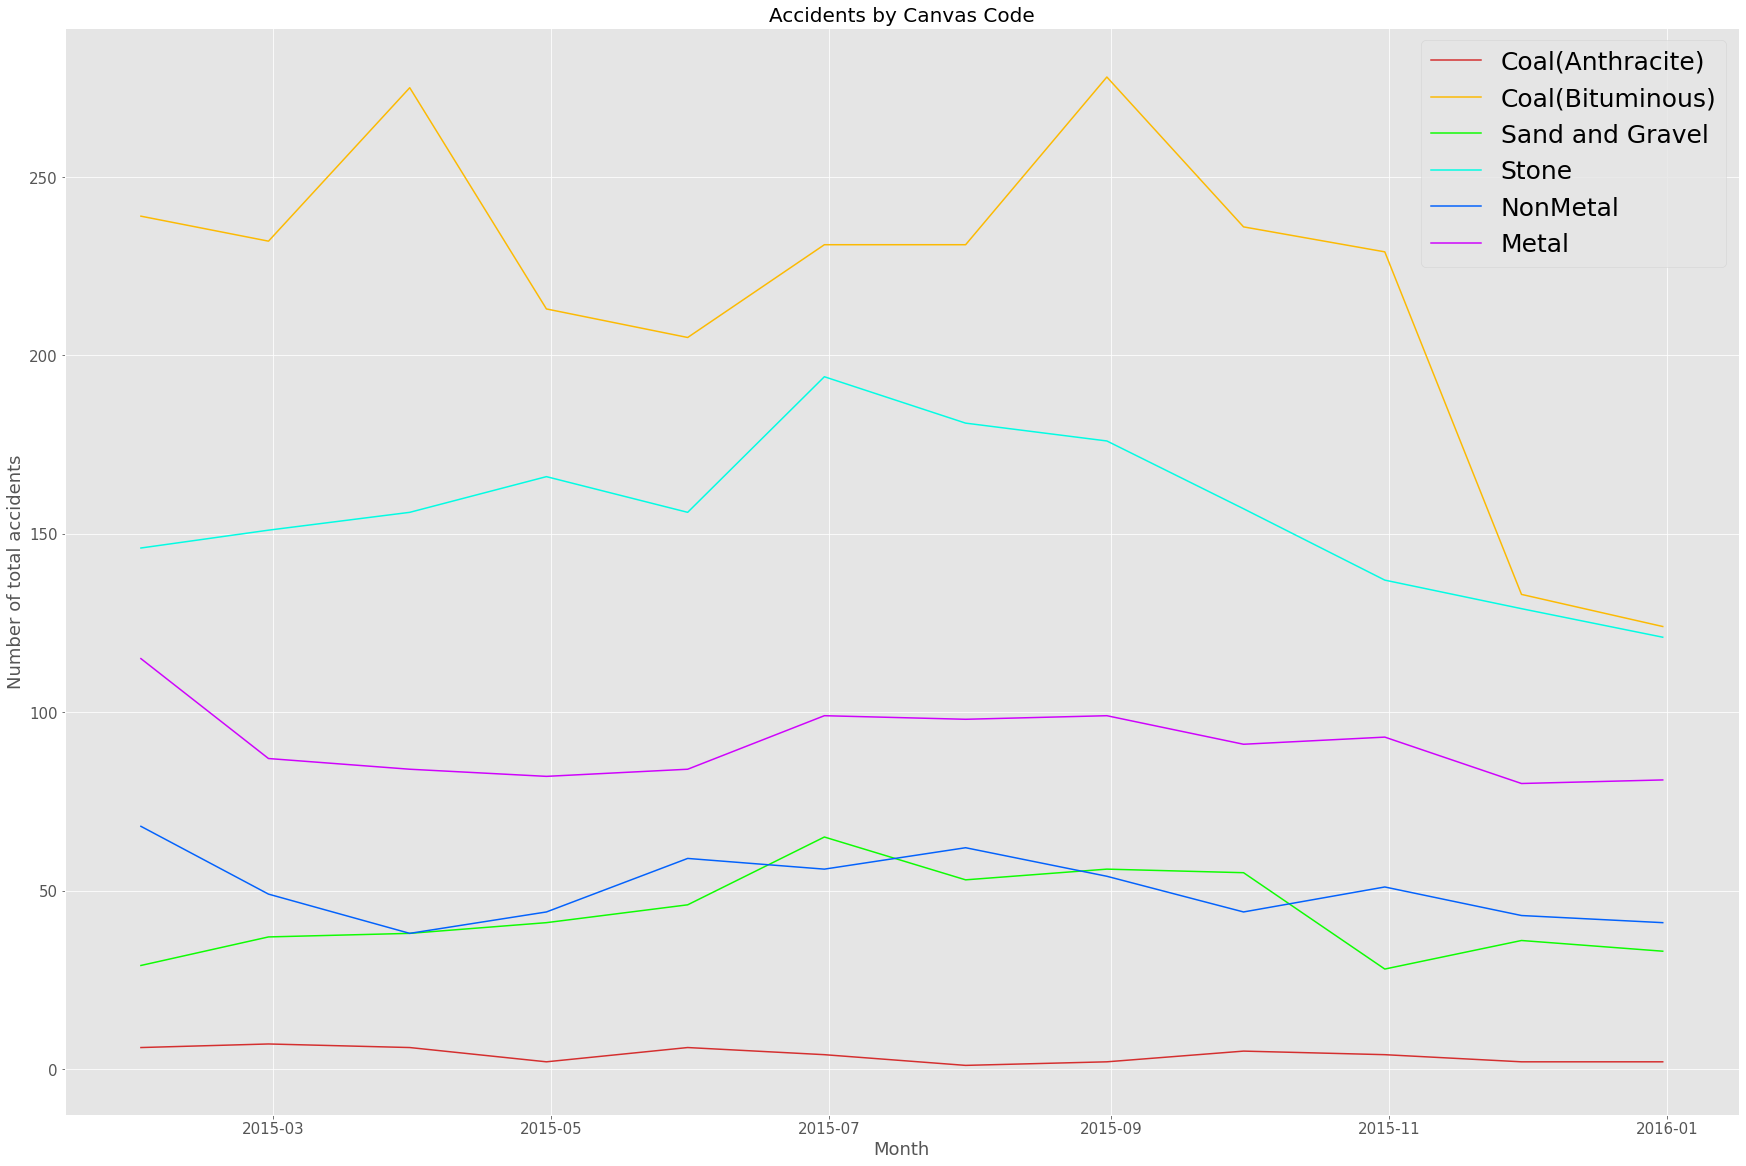

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2015-01-01': '2015-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2015-01-01': '2015-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2015-01-01': '2015-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2015-01-01': '2015-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2015-01-01': '2015-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2015-01-01': '2015-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

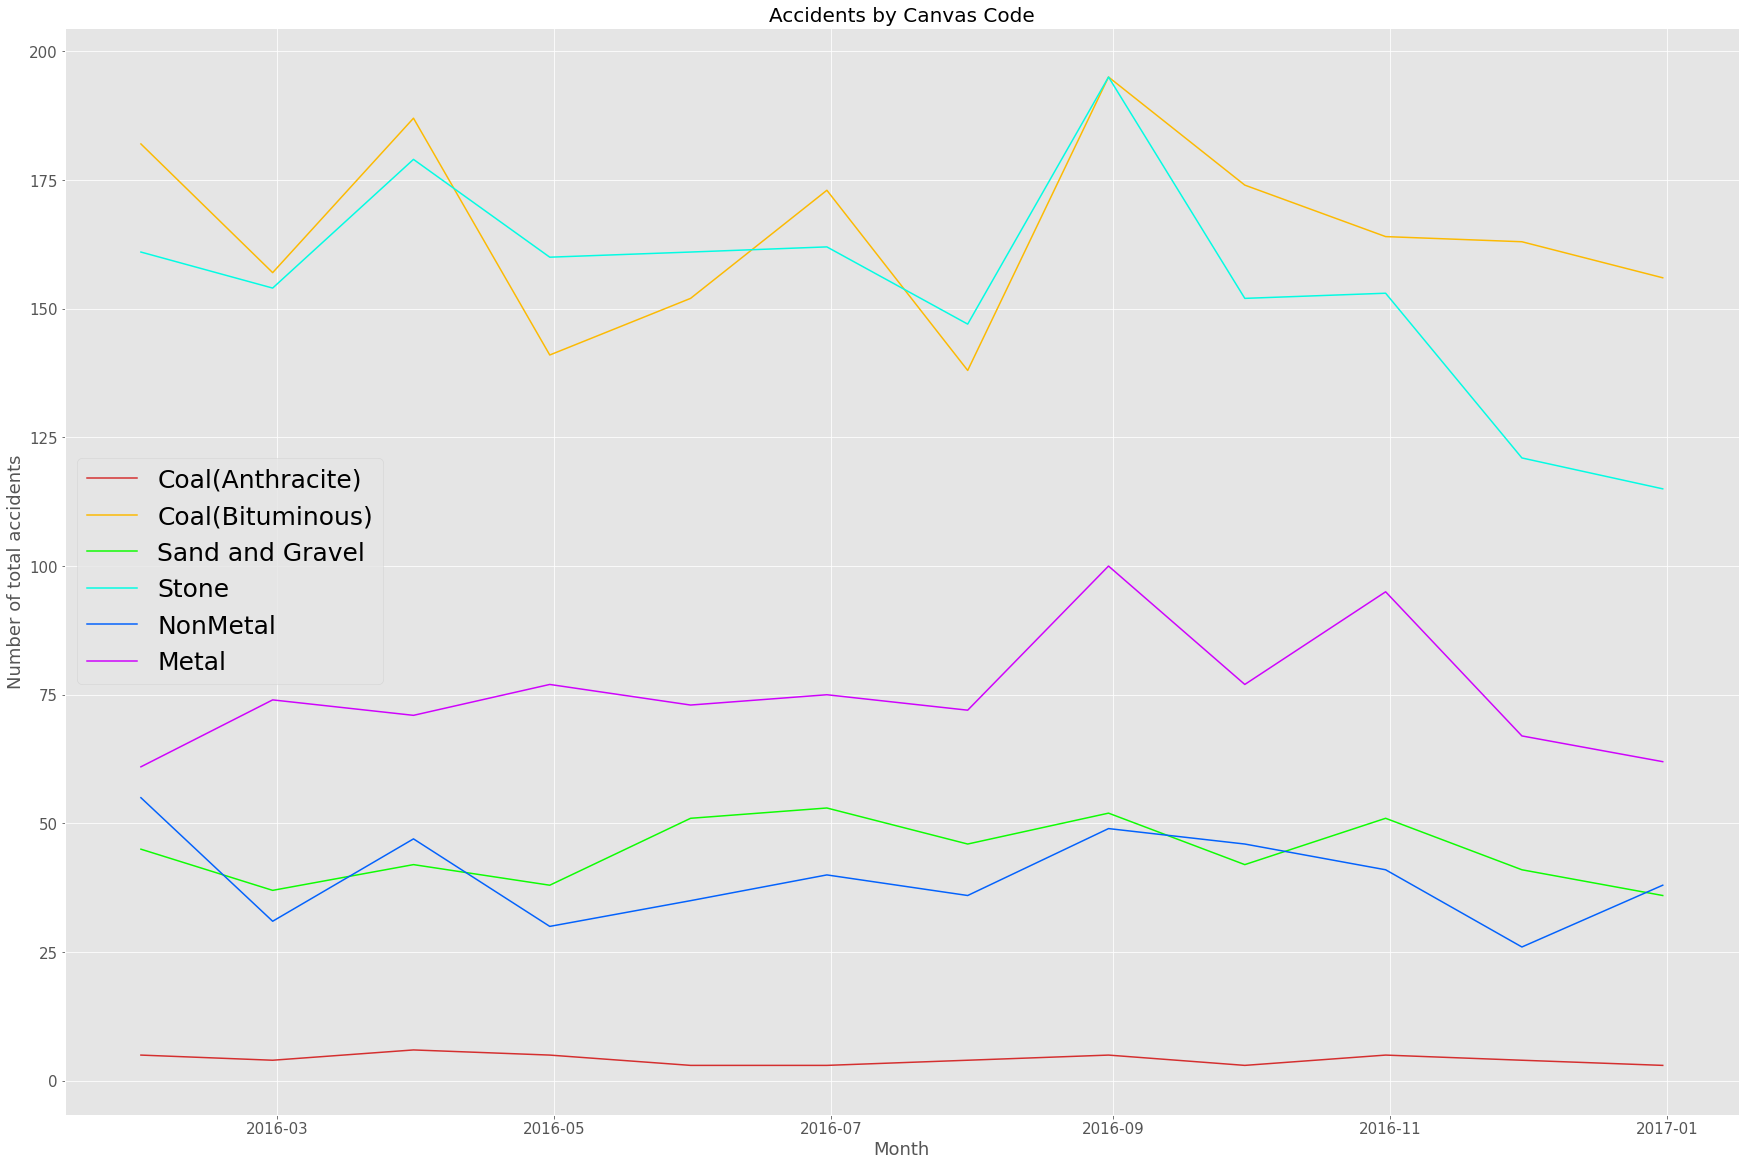

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2016-01-01': '2016-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2016-01-01': '2016-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2016-01-01': '2016-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2016-01-01': '2016-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2016-01-01': '2016-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2016-01-01': '2016-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

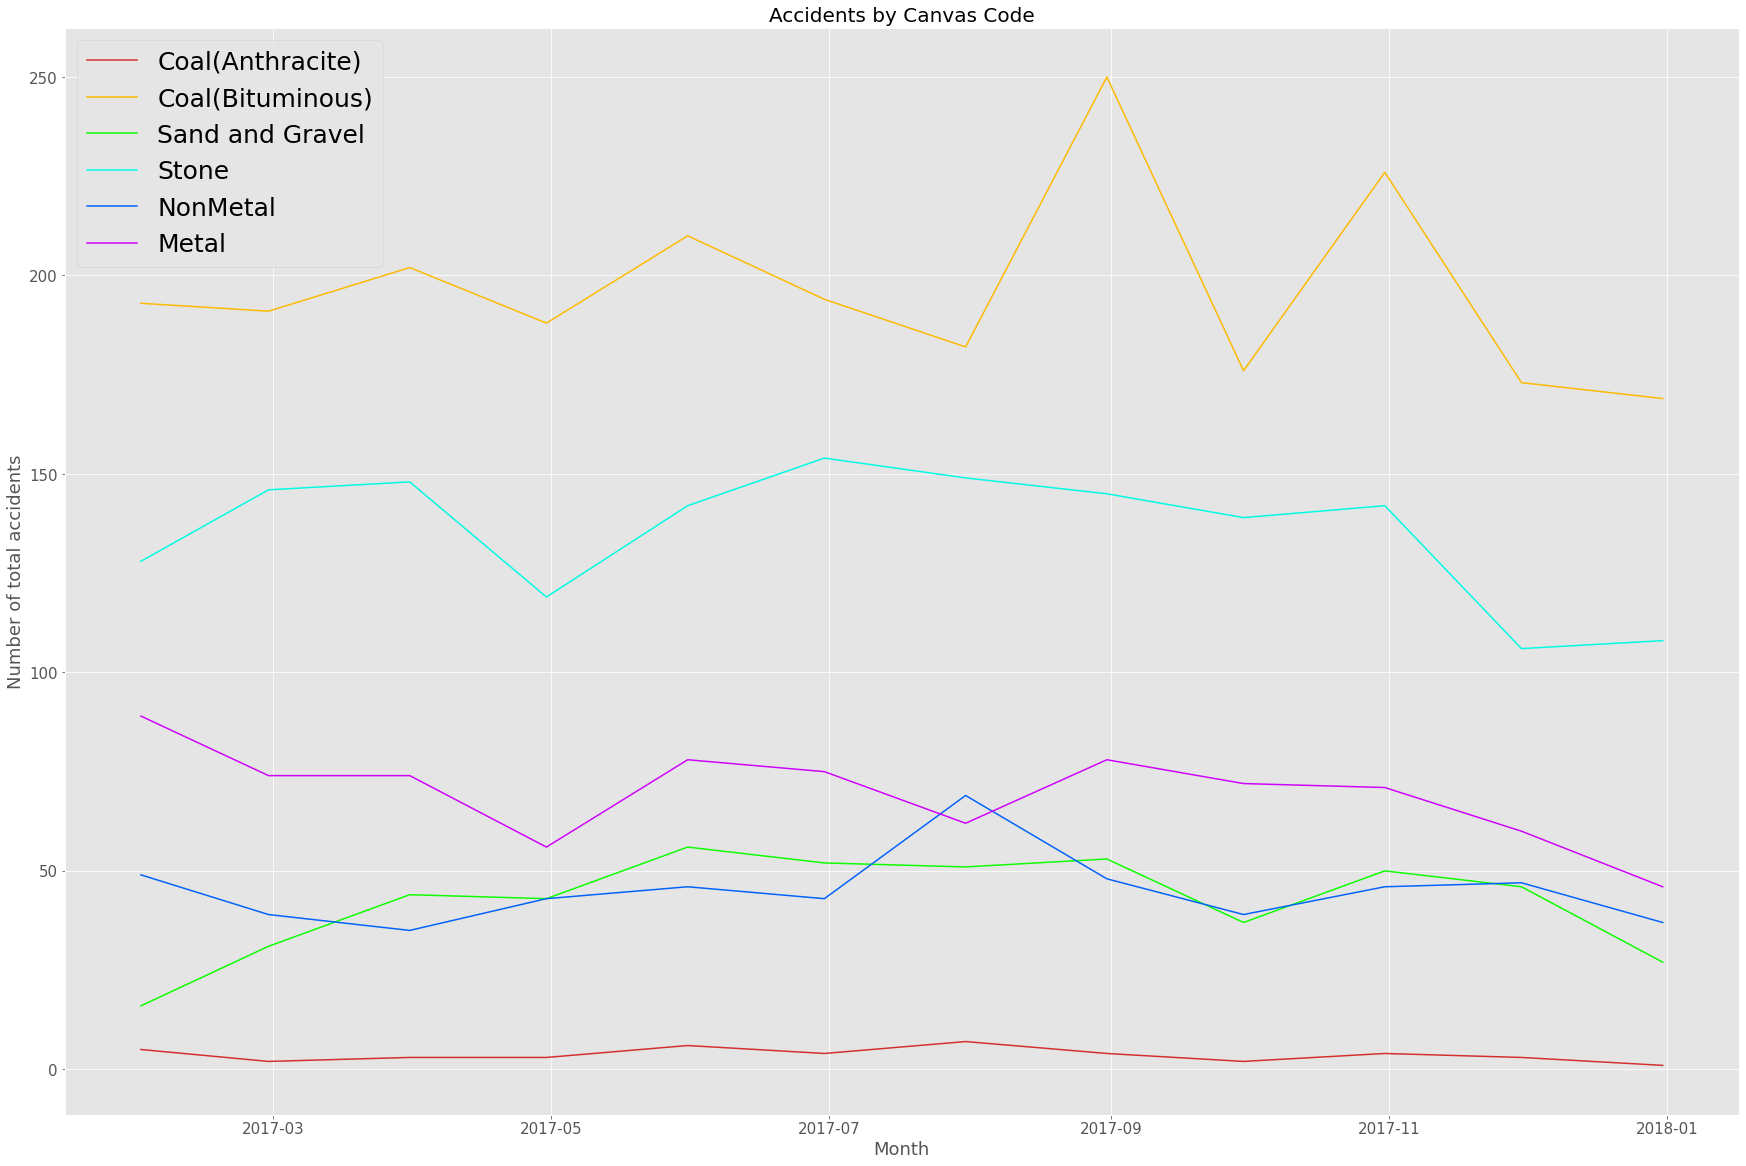

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2017-01-01': '2017-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2017-01-01': '2017-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2017-01-01': '2017-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2017-01-01': '2017-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2017-01-01': '2017-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2017-01-01': '2017-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

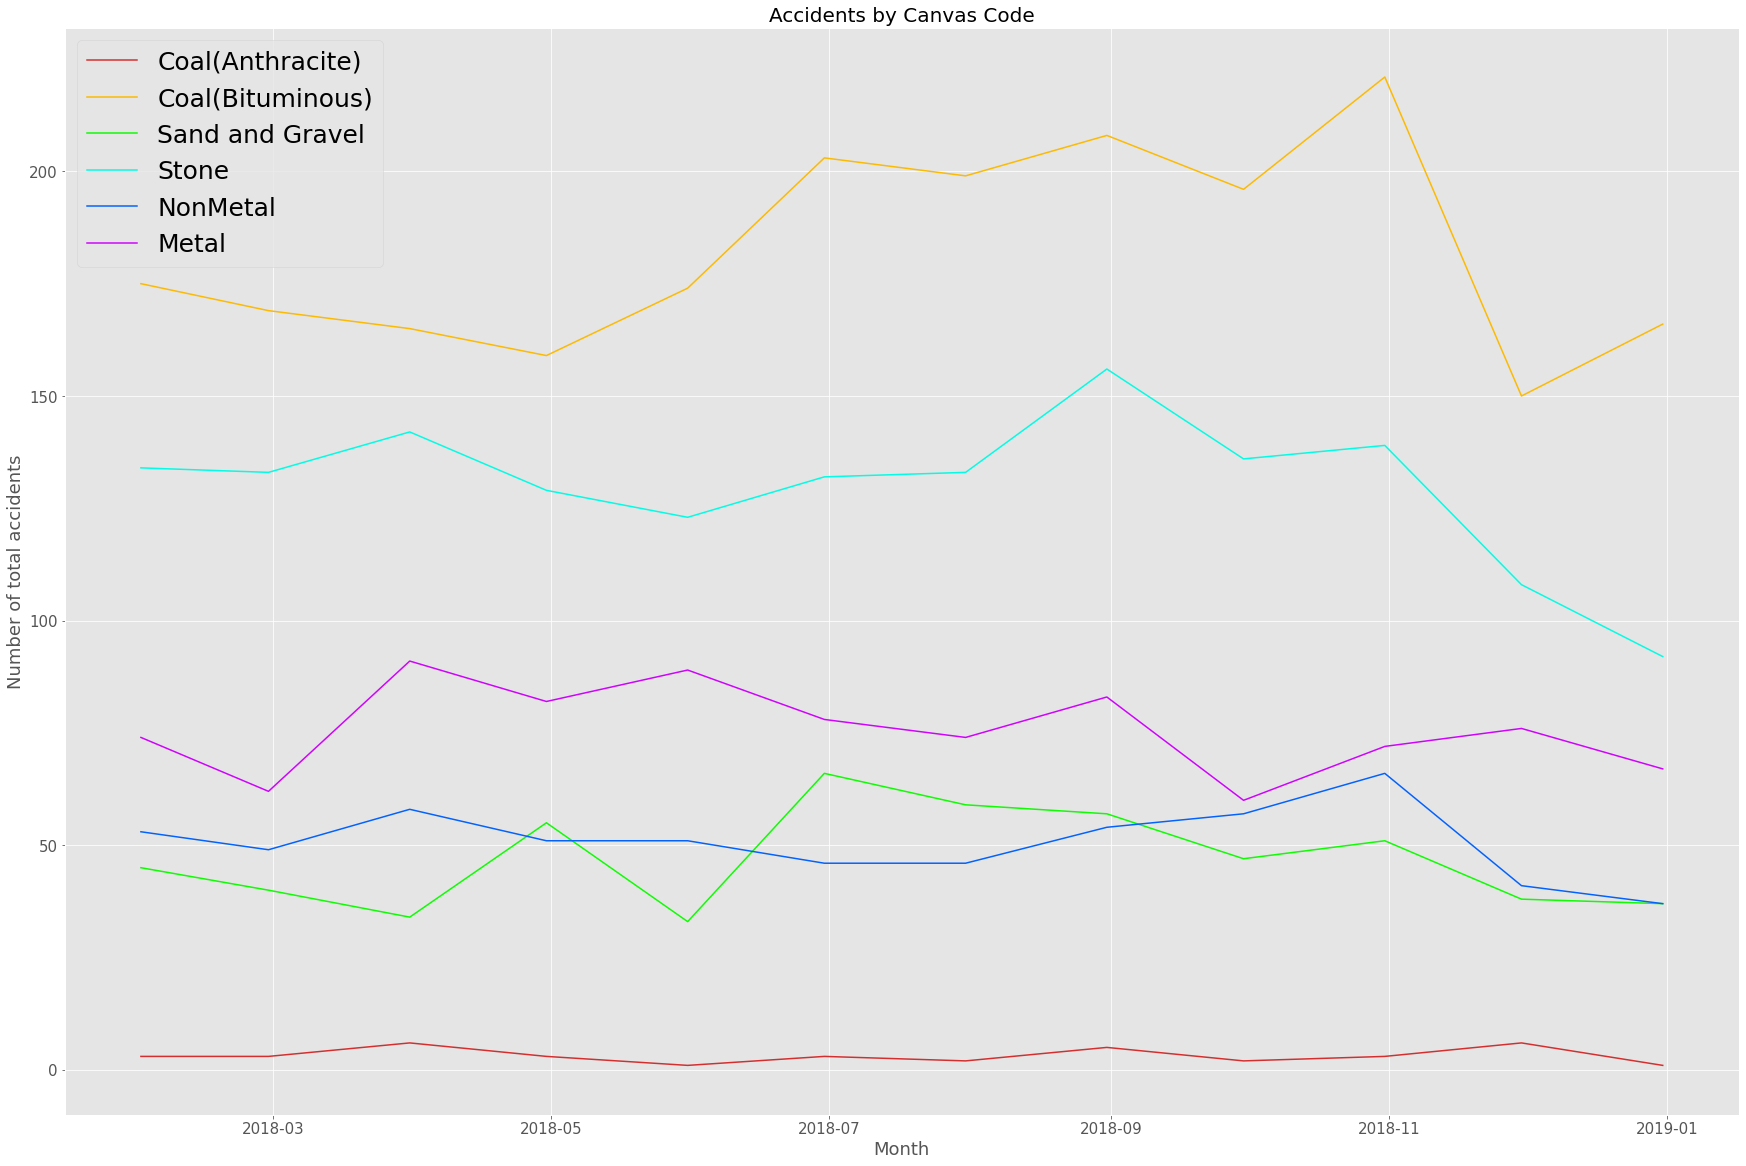

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2018-01-01': '2018-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2018-01-01': '2018-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2018-01-01': '2018-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2018-01-01': '2018-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2018-01-01': '2018-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2018-01-01': '2018-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

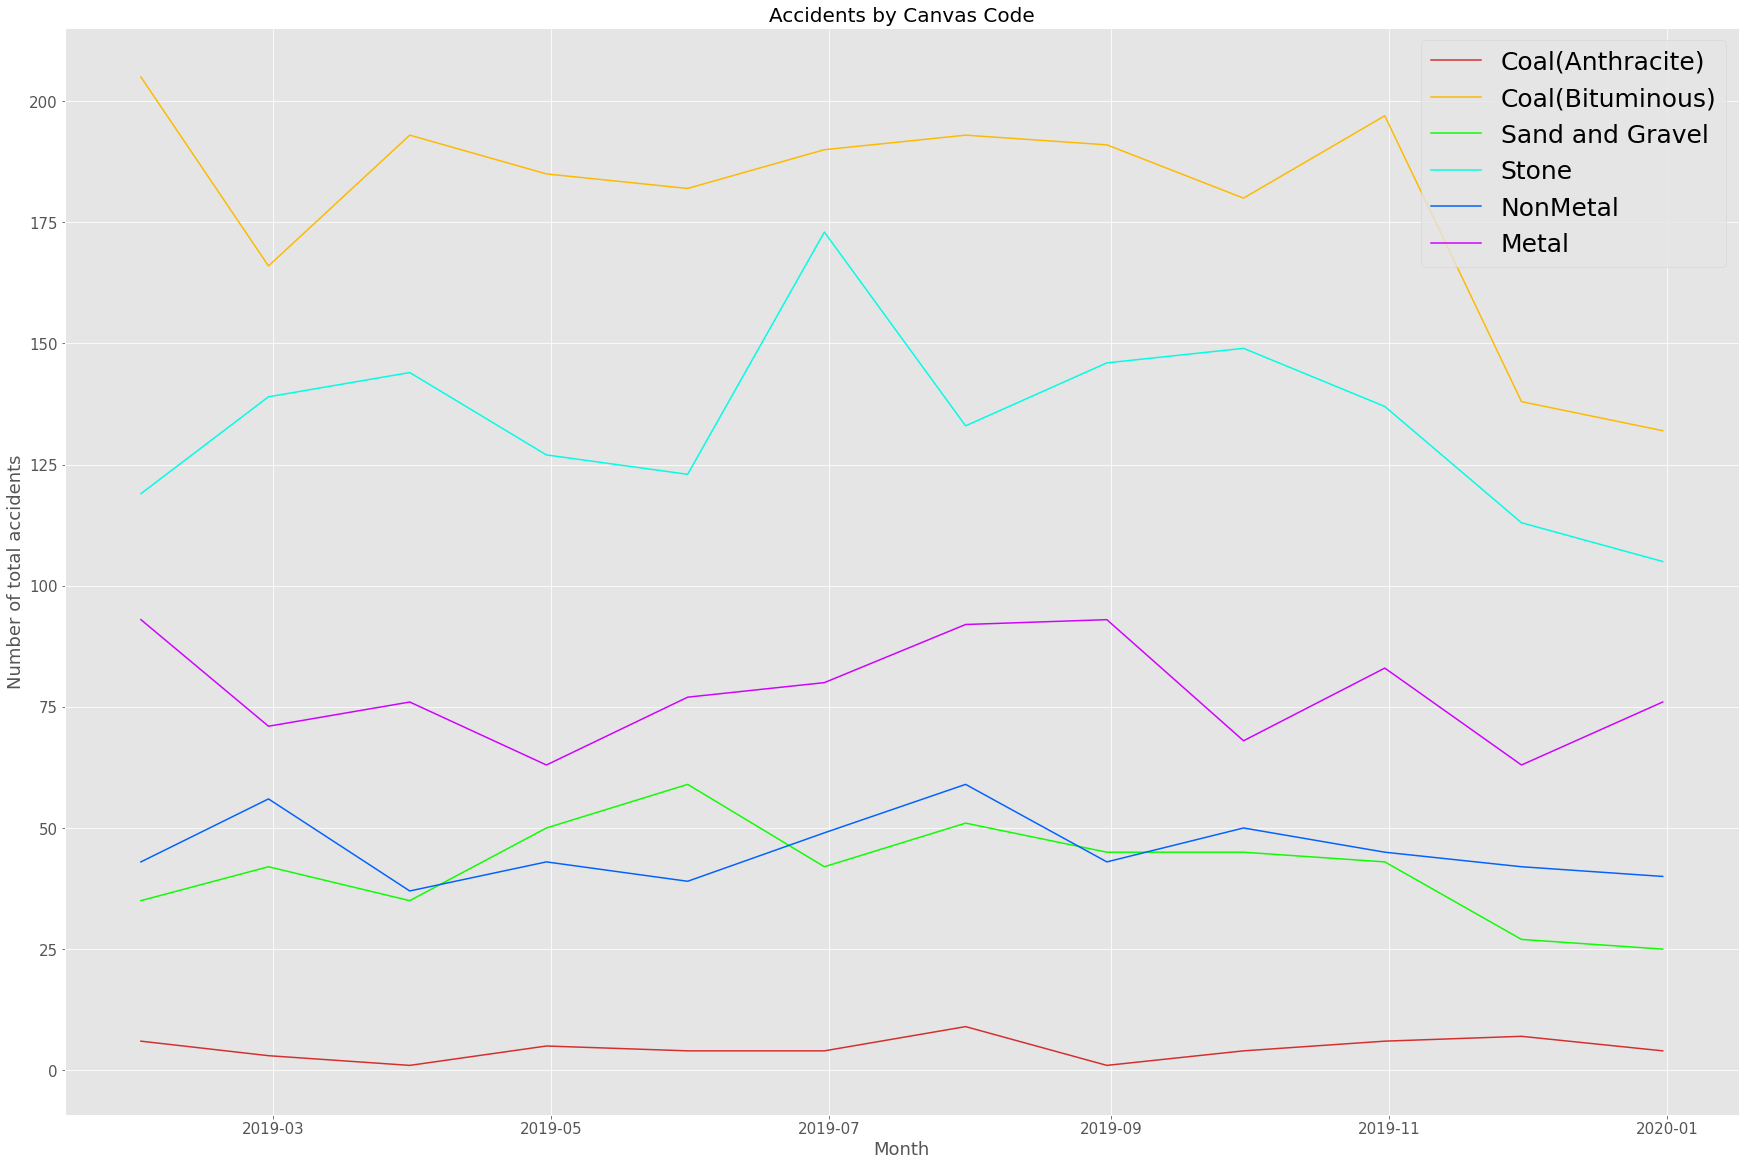

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2019-01-01': '2019-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2019-01-01': '2019-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2019-01-01': '2019-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2019-01-01': '2019-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2019-01-01': '2019-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2019-01-01': '2019-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

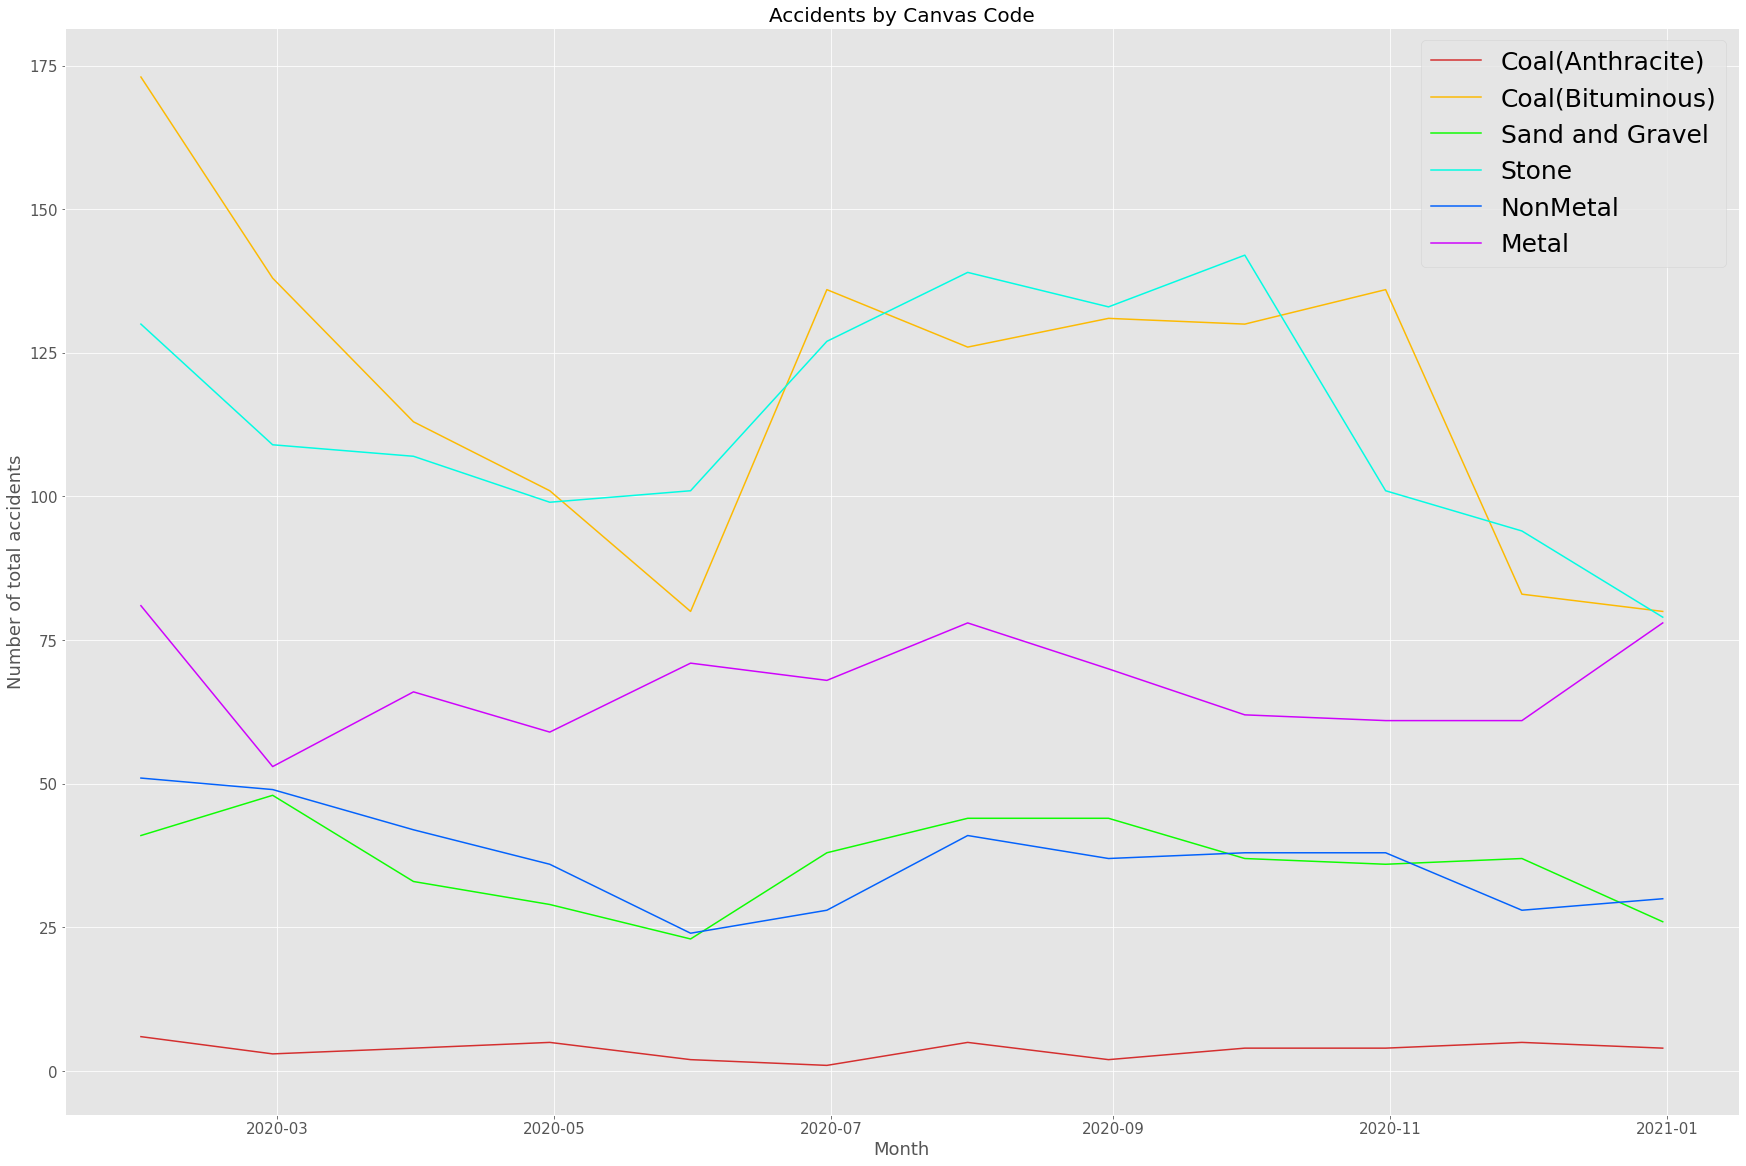

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2020-01-01': '2020-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2020-01-01': '2020-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2020-01-01': '2020-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2020-01-01': '2020-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2020-01-01': '2020-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2020-01-01': '2020-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [ ]:
ri

In [1]:
# First unstacking the dataframe into the desired format and then converting then
# rearranging the datetime values into appropiate quarters of the year
# so we have quarterly data for the number of accidents in different types of mines
canvas_quart = canvascode_group.unstack(1).resample('Q').sum()
canvas_quart

NameError: ignored

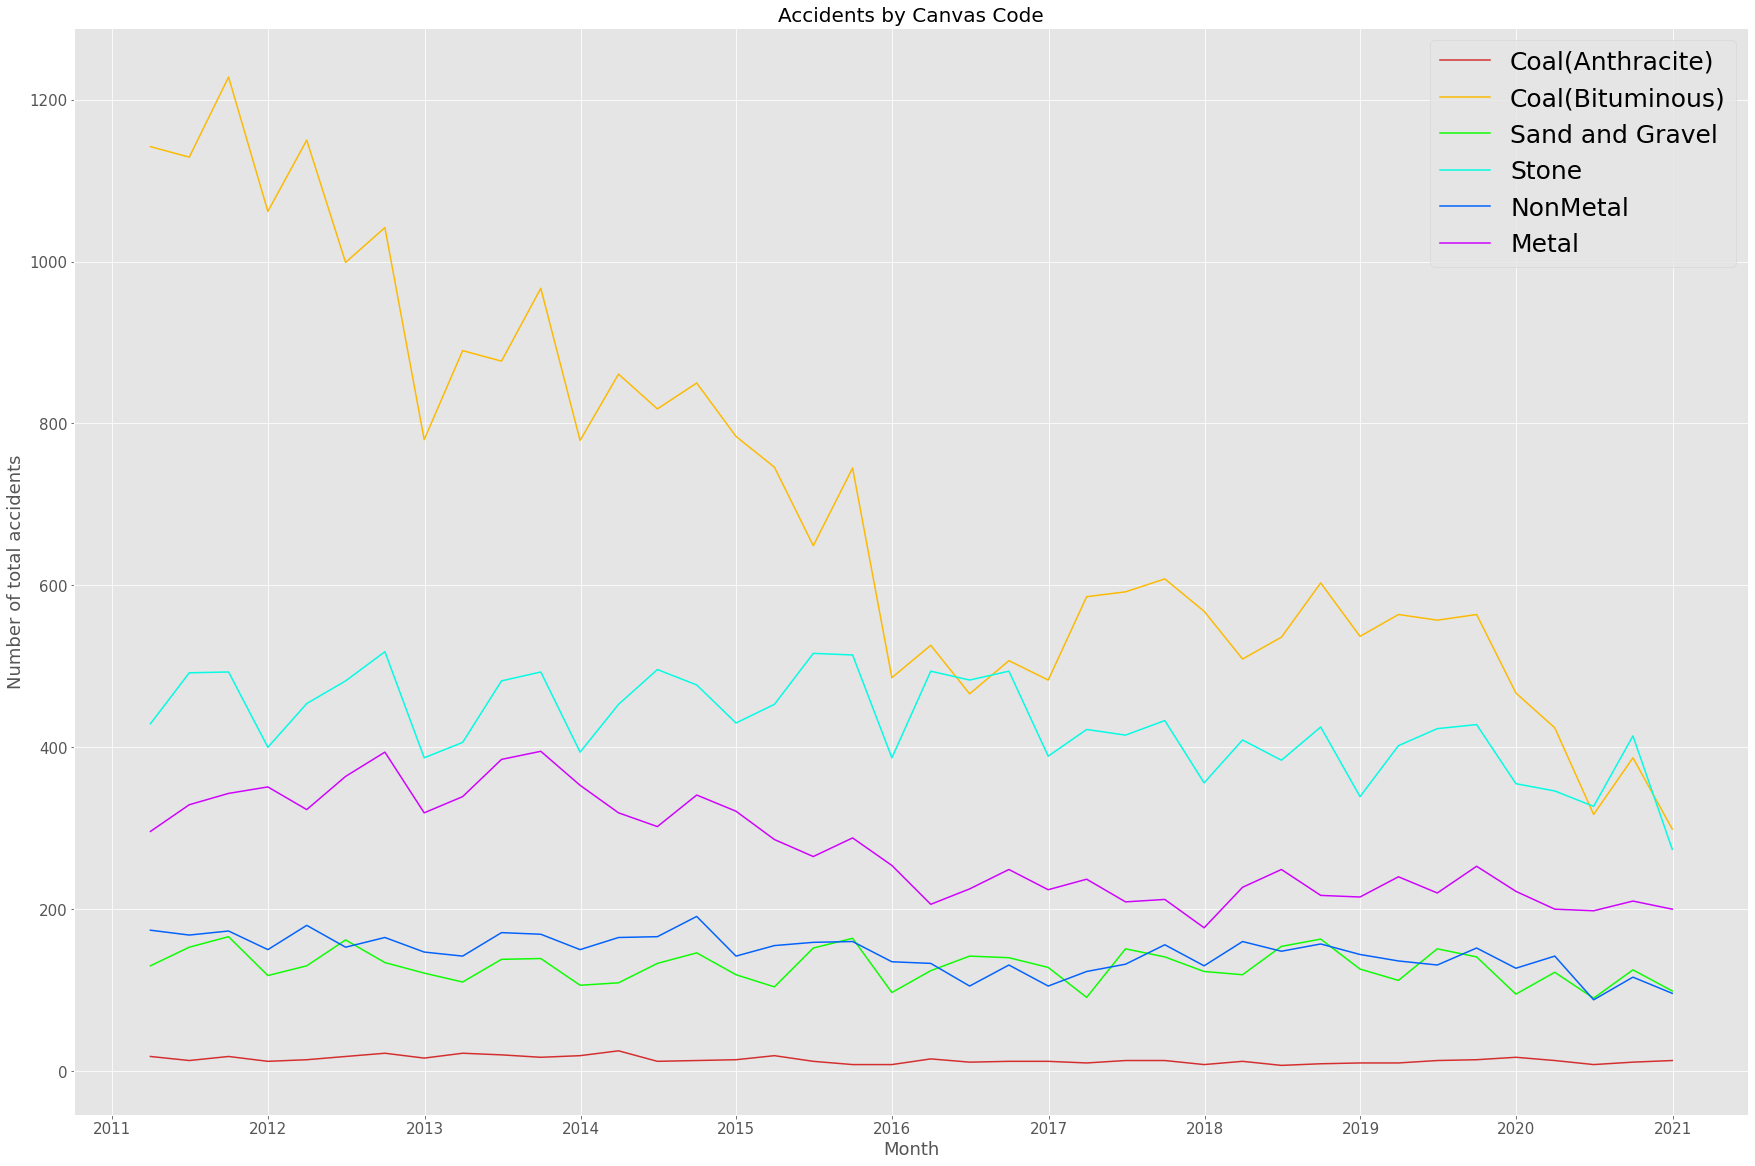

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_quart.index, canvas_quart[('mine_id', 1.0)], color = "#d42f2f")
plt.plot(canvas_quart.index, canvas_quart[('mine_id', 2.0)], color = "#fcba03")
plt.plot(canvas_quart.index, canvas_quart[('mine_id', 5.0)], color = "#0ffc03")
plt.plot(canvas_quart.index, canvas_quart[('mine_id', 6.0)], color = "#03fce3")
plt.plot(canvas_quart.index, canvas_quart[('mine_id', 7.0)], color = "#0362fc")
plt.plot(canvas_quart.index, canvas_quart[('mine_id', 8.0)], color = "#ce03fc")

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

Stone mines have signs os seasonality in the amount of injuries. Earlier in the year they are increase and towards the end of the year they decrease. 

Another interesting observation is the yearly decrease of injuries in Coal B mines.

### Correlation Between Days Lost and Degree of Injury

In [ ]:
mines_accident.dropna(subset = ['Degree of Injury Code', 'Days Lost', 'Days Restricted Duty'], axis = 0, inplace = True)

In [ ]:
# Select columns 'Days Lost' and 'Days Restricted Duty' from mines_accident and only those entries where degree of injury is equal to 1 AND
# days restricted duty is greater than 0
mines_accident[['Days Lost', 'Days Restricted Duty']].loc[(mines_accident['Degree of Injury Code'] == 1) & (mines_accident['Days Restricted Duty']>0)]

Empty DataFrame
Columns: [Days Lost, Days Restricted Duty]
Index: []

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


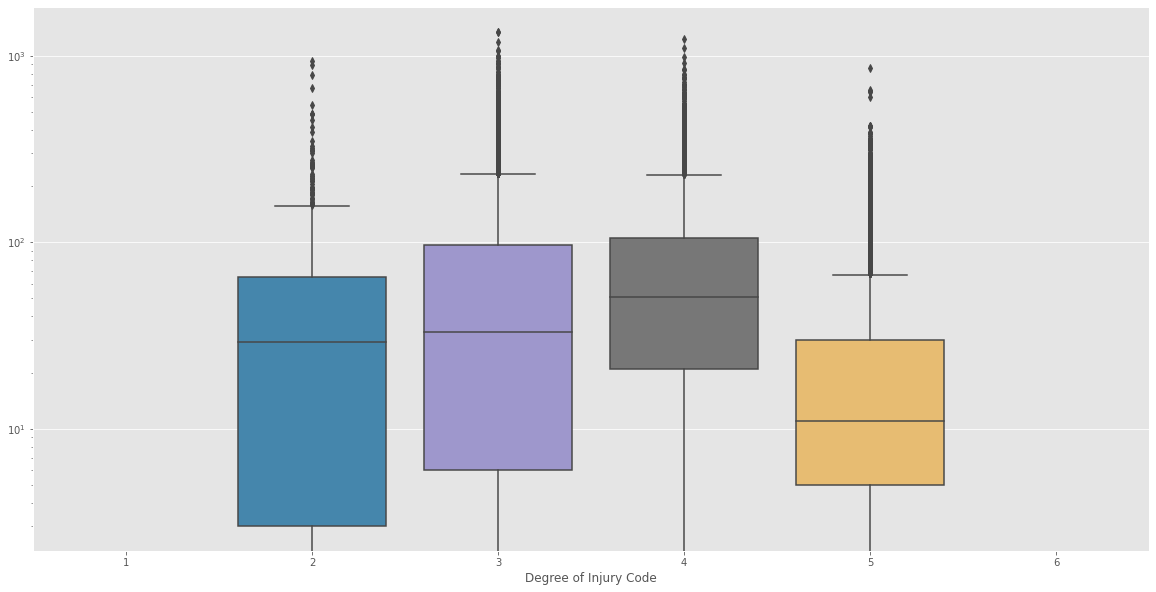

In [ ]:
# To remove the bias of 3 being the most common degree of injury we will take a random sample of 1,000 from each of the categories in degree of injury and then we'll look at the mean of each category to see if there is an affect on the mean and hope to remove the bias in the meantime. (bootstrapping)
plt.figure(figsize = (20,10))
sns.boxplot(mines_accident['Degree of Injury Code'],mines_accident['Days Lost'] + mines_accident['Days Restricted Duty'])
plt.yscale('log')
plt.show()

In [ ]:
corr, _ = pearsonr(mines_accident['Degree of Injury Code'],mines_accident['Days Lost'] + mines_accident['Days Restricted Duty'])
print('Pearsons correlation: %.3f' % corr)
# The higher the degree of injury the less days lost + restricted

Pearsons correlation: -0.403


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


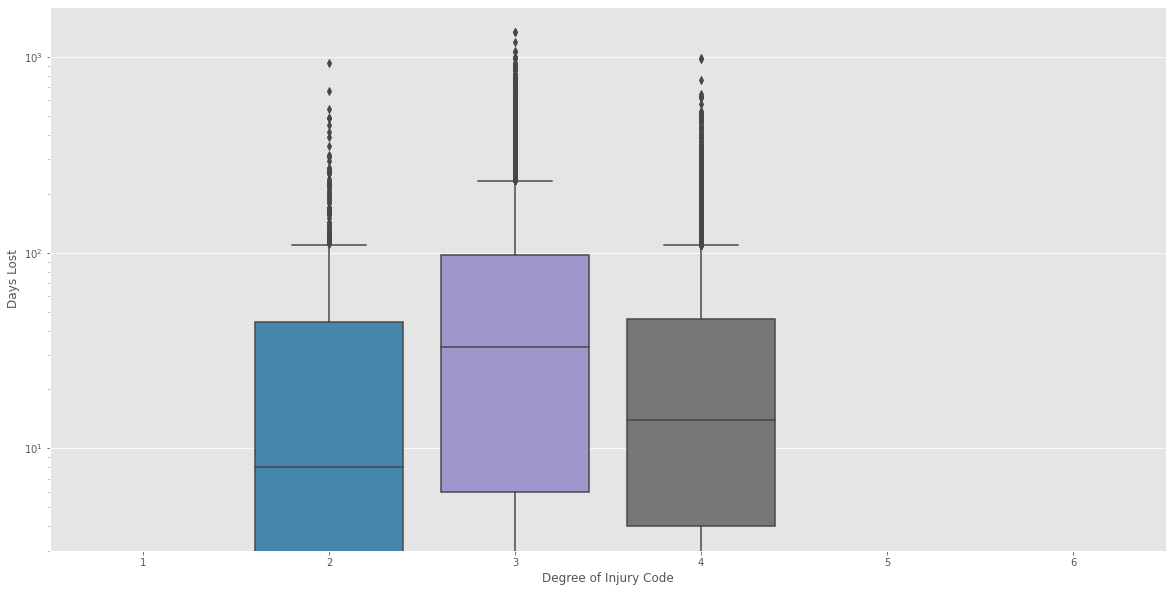

In [ ]:
# To remove the bias of 3 being the most common degree of injury we will take a random sample of 1,000 from each of the categories in degree of injury and then we'll look at the mean of each category to see if there is an affect on the mean and hope to remove the bias in the meantime. (bootstrapping)
plt.figure(figsize = (20,10))
sns.boxplot(mines_accident['Degree of Injury Code'],mines_accident['Days Lost'])
plt.yscale('log')
plt.show()

In [ ]:
corr, _ = pearsonr(mines_accident['Degree of Injury Code'],mines_accident['Days Lost'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.441


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


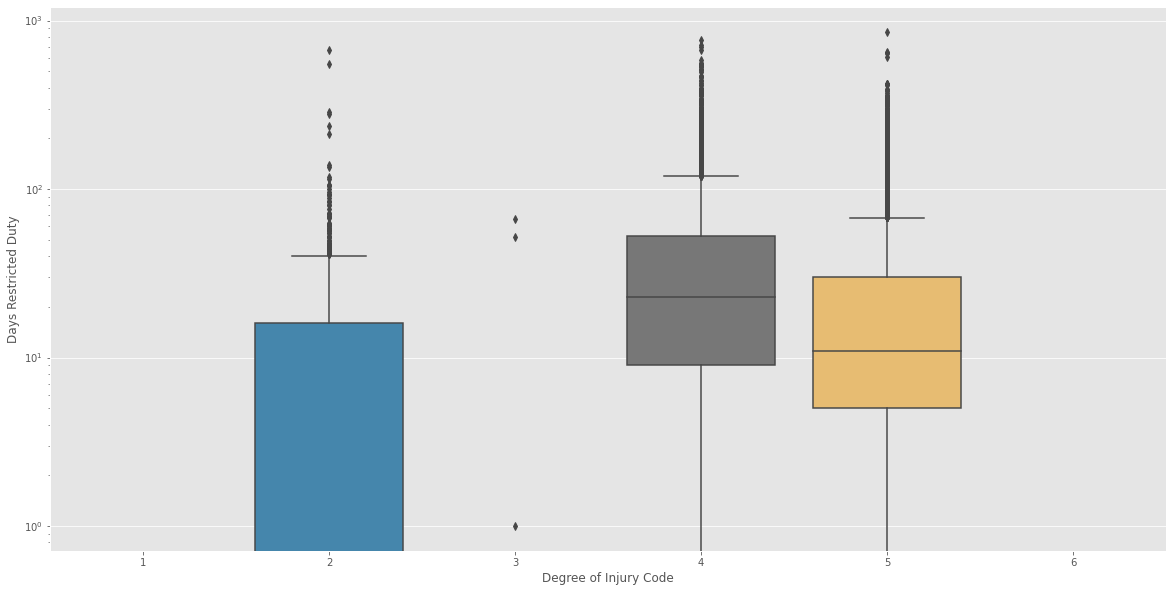

In [ ]:
# To remove the bias of 3 being the most common degree of injury we will take a random sample of 1,000 from each of the categories in degree of injury and then we'll look at the mean of each category to see if there is an affect on the mean and hope to remove the bias in the meantime. (bootstrapping)
plt.figure(figsize = (20,10))
sns.boxplot(mines_accident['Degree of Injury Code'],mines_accident['Days Restricted Duty'])
plt.yscale('log')
plt.show()

In [ ]:
corr, _ = pearsonr(mines_accident['Degree of Injury Code'],mines_accident['Days Restricted Duty'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.012


In [ ]:
# gives the different values in the column 'degree of injury code' along with their corresponding number of occurences
mines_accident['Degree of Injury Code'].value_counts()

3    24120
6    21432
5    13610
4     6960
2      641
1      122
Name: Degree of Injury Code, dtype: int64

In [ ]:
# Creating a new column 'Total Days Lost' which is the summation of Days Lost and Days Restricted Duty
mines_accident['Total Days Lost'] = mines_accident['Days Lost'] + mines_accident['Days Restricted Duty']

In [ ]:
# deg_1 is equal to column 'Total Days Lost' from mines_accident and only those rows are filtered out which have degree of injury 1. .values converts
# the column shaped object into an array 
deg_1 = mines_accident['Total Days Lost'][mines_accident['Degree of Injury Code'] == 1].values
deg_2 = mines_accident['Total Days Lost'][mines_accident['Degree of Injury Code'] == 2].values
deg_3 = mines_accident['Total Days Lost'][mines_accident['Degree of Injury Code'] == 3].values
deg_4 = mines_accident['Total Days Lost'][mines_accident['Degree of Injury Code'] == 4].values
deg_5 = mines_accident['Total Days Lost'][mines_accident['Degree of Injury Code'] == 5].values
deg_6 = mines_accident['Total Days Lost'][mines_accident['Degree of Injury Code'] == 6].values

In [ ]:
# mean_1 = draw_bs_reps(deg_1, np.mean, number_iterations, 200)
number_iterations = 10000
# using the predefined function to draw 500 random samples from the data and calculate their mean. This process is repeated 10000 times
mean_2 = draw_bs_reps(deg_2, np.mean, number_iterations, 200)
mean_3 = draw_bs_reps(deg_3, np.mean, number_iterations, 200)
mean_4 = draw_bs_reps(deg_4, np.mean, number_iterations, 200)
mean_5 = draw_bs_reps(deg_5, np.mean, number_iterations, 200)
# mean_6 = draw_bs_reps(deg_6, np.mean, number_iterations, 200)

In [ ]:
# Days_Lost_1 = pd.DataFrame({'Total_Days Lost':mean_1,
#                            'Degree Injury': '1'})

# Creating a new dataframe with columns Days Lost(which contains the bootstrap mean) and 'Degree of Injury' which specifies the degree of the injury
Days_Lost_2 = pd.DataFrame({'Days Lost':mean_2,
                           'Degree Injury': 2})
Days_Lost_3 = pd.DataFrame({'Days Lost':mean_3,
                           'Degree Injury': 3})
Days_Lost_4 = pd.DataFrame({'Days Lost':mean_4,
                           'Degree Injury': 4})
Days_Lost_5 = pd.DataFrame({'Days Lost':mean_5,
                           'Degree Injury': 5})
# Days_Lost_6 = pd.DataFrame({'Days Lost':mean_6,
#                            'Degree Injury': 6})

# We join all the individual dataframes containing all the means for different degrrees of freedom 
Days_Lost = pd.concat([Days_Lost_2,Days_Lost_3,Days_Lost_4,Days_Lost_5])
Days_Lost

Days Lost  Degree Injury
0        55.990              2
1        64.595              2
2        63.455              2
3        68.900              2
4        56.260              2
...         ...            ...
9995     28.195              5
9996     26.245              5
9997     30.380              5
9998     25.175              5
9999     28.085              5

[40000 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


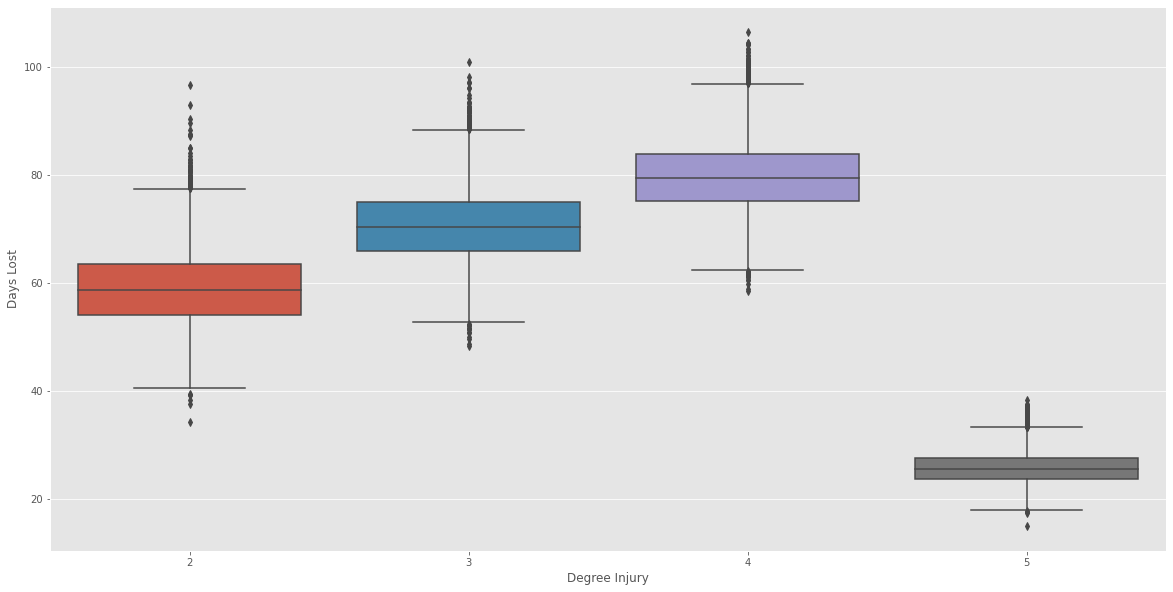

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(Days_Lost['Degree Injury'], Days_Lost['Days Lost'])
# plt.yscale('log')
plt.show()

In [ ]:
corr, _ = pearsonr(Days_Lost['Degree Injury'],Days_Lost['Days Lost'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.475


### Age vs Degree of Injury

In [ ]:
age_df = mines_accident.copy(deep = False)
age_df.dropna(subset = ['Date of Birth (Accidents)'], axis = 0, inplace = True) #drop null values
age_df[('Accident Date (Accidents)')] = pd.to_datetime(age_df[('Accident Date (Accidents)')]) # convert the values in the column to datetime object
age_df[('Date of Birth (Accidents)')] = pd.to_datetime(age_df[('Date of Birth (Accidents)')])

age_df['Age (Accidents)'] = age_df.apply(lambda row: relativedelta(row['Accident Date (Accidents)'], row['Date of Birth (Accidents)']).years,axis = 1) # iterating through all the rows and with each iteration we're finding the difference of DOB and accident date for that specific row

age_df[['Date of Birth (Accidents)', 'Accident Date (Accidents)', 'Age (Accidents)']].head(5)

Date of Birth (Accidents) Accident Date (Accidents)  Age (Accidents)
0                1969-11-14                2011-01-02               41
1                1969-11-25                2011-01-03               41
2                1990-11-21                2011-01-03               20
3                1990-07-16                2011-01-03               20
4                1956-12-26                2011-01-03               54

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


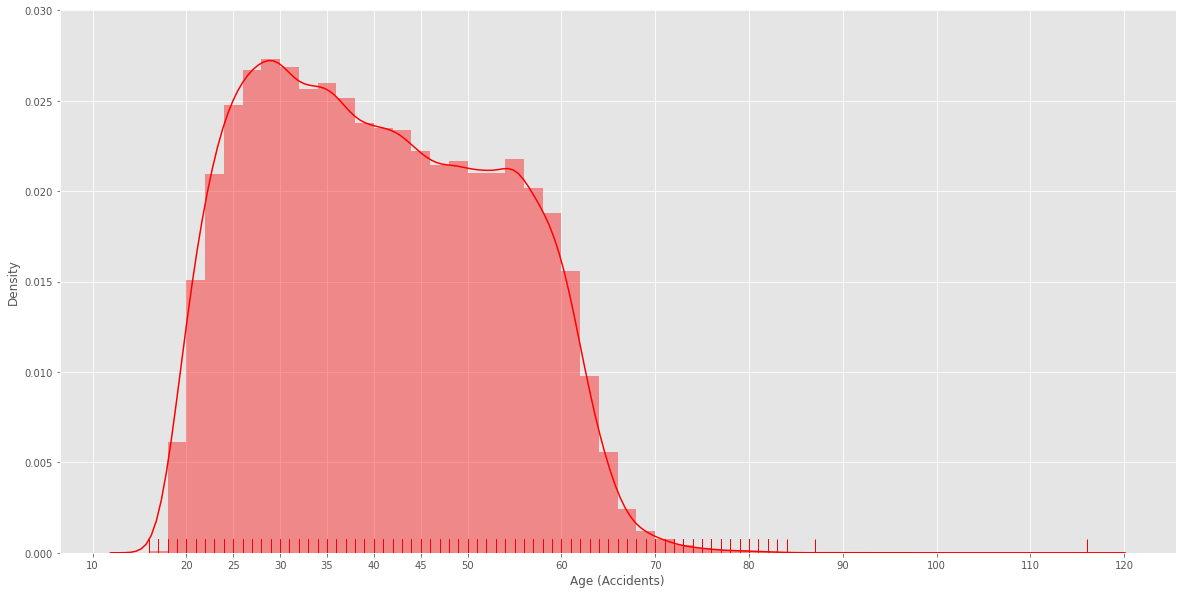

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(age_df['Age (Accidents)'], color = 'r', rug = True)
plt.xticks([10,20,25, 30, 35, 40,45, 50,60,70,80,90,100,110,120])
plt.show()

In [ ]:
# checking the percentage of people with age in between 25 and 38 in age_df
(age_df[(age_df['Age (Accidents)']>25) & (age_df['Age (Accidents)']<38)].shape[0])*100/age_df.shape[0]

31.53781663572669

In [ ]:
age_df[age_df['Age (Accidents)']>80].shape
# Data entry issue -- 14 people who are above 80 years old; 1 employee shows to have been 116 yo when his accident happened

(14, 87)

In [ ]:
age_injury = age_df.groupby('Age (Accidents)').agg({'Degree of Injury Code': 'mean', 'mine_id': 'count'}) # aggregating the datas by the desired columns
age_injury = age_injury.sort_values(by = ['Degree of Injury Code'], ascending=True) #sorting
# get only those ages where degree of injury is greater than 4.33 and the number of accidents is greater than 40
age_injury[(age_injury['mine_id']>40) & (age_injury['Degree of Injury Code']<4.33)]
#age_injury
# Issue here is that we want to see lower (more serious) degree of injury and higher frequency of mine_id.

Degree of Injury Code  mine_id
Age (Accidents)                                
71                            3.704545       44
69                            3.973684       76
70                            4.000000       58
63                            4.290381      551
58                            4.307205     1263
59                            4.310345     1247
60                            4.317930     1082
64                            4.321586      454
61                            4.328343     1002

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


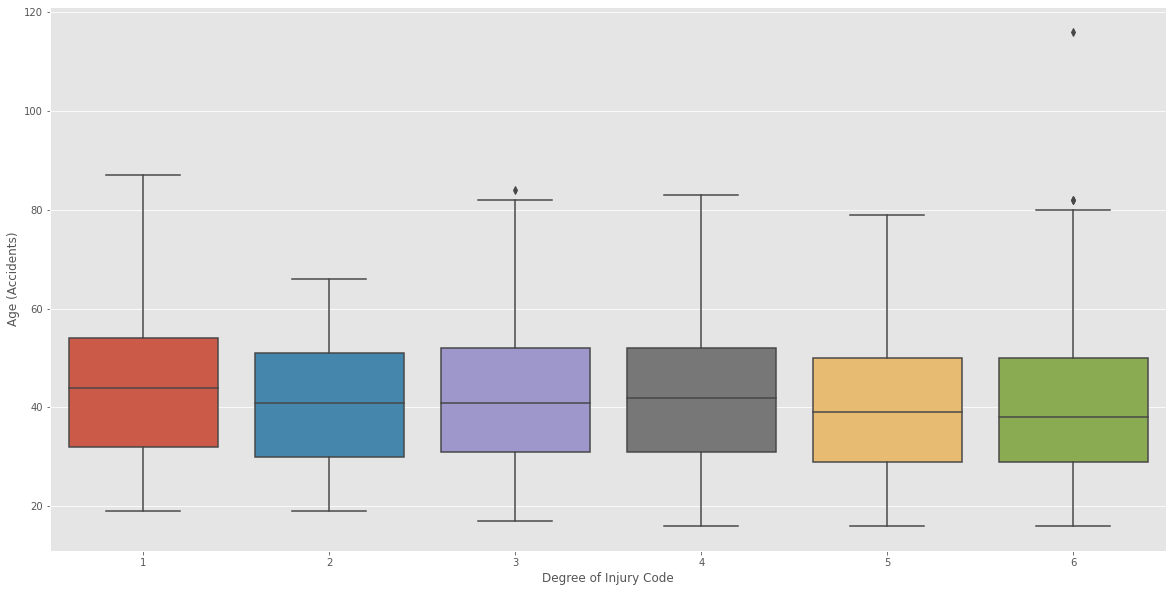

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(age_df['Degree of Injury Code'], age_df['Age (Accidents)'])
plt.xticks([0,1,2,3,4,5],[1,2,3,4,5,6])
plt.show()

In [ ]:
corr, _ = pearsonr(age_df['Degree of Injury Code'], age_df['Age (Accidents)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.066


In [ ]:
# get minimum value in Age column
age_df['Age (Accidents)'].min()

16

In [ ]:
# apply the function assign_age to each row of the dataset
# the function categorises each age as middle age, young adults etc
age_df['Age Category'] = age_df.apply(lambda row: assign_age(row), axis=1)
# Created bins for each age category

In [ ]:
age_df['Age Category']

0         Middle Age
1         Middle Age
2        Young Aults
3        Young Aults
4         Middle Age
            ...     
67747         Senior
67749         Adults
67753     Middle Age
67758     Middle Age
67759         Adults
Name: Age Category, Length: 66796, dtype: object

In [ ]:
# get the total number of accidents per category in age as categorized above
accidents_age_category = pd.DataFrame(age_df.groupby('Age Category')['mine_id'].count())
accidents_age_category

mine_id
Age Category         
Adults          25807
Middle Age      20470
Senior          11564
Young Aults      8955

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


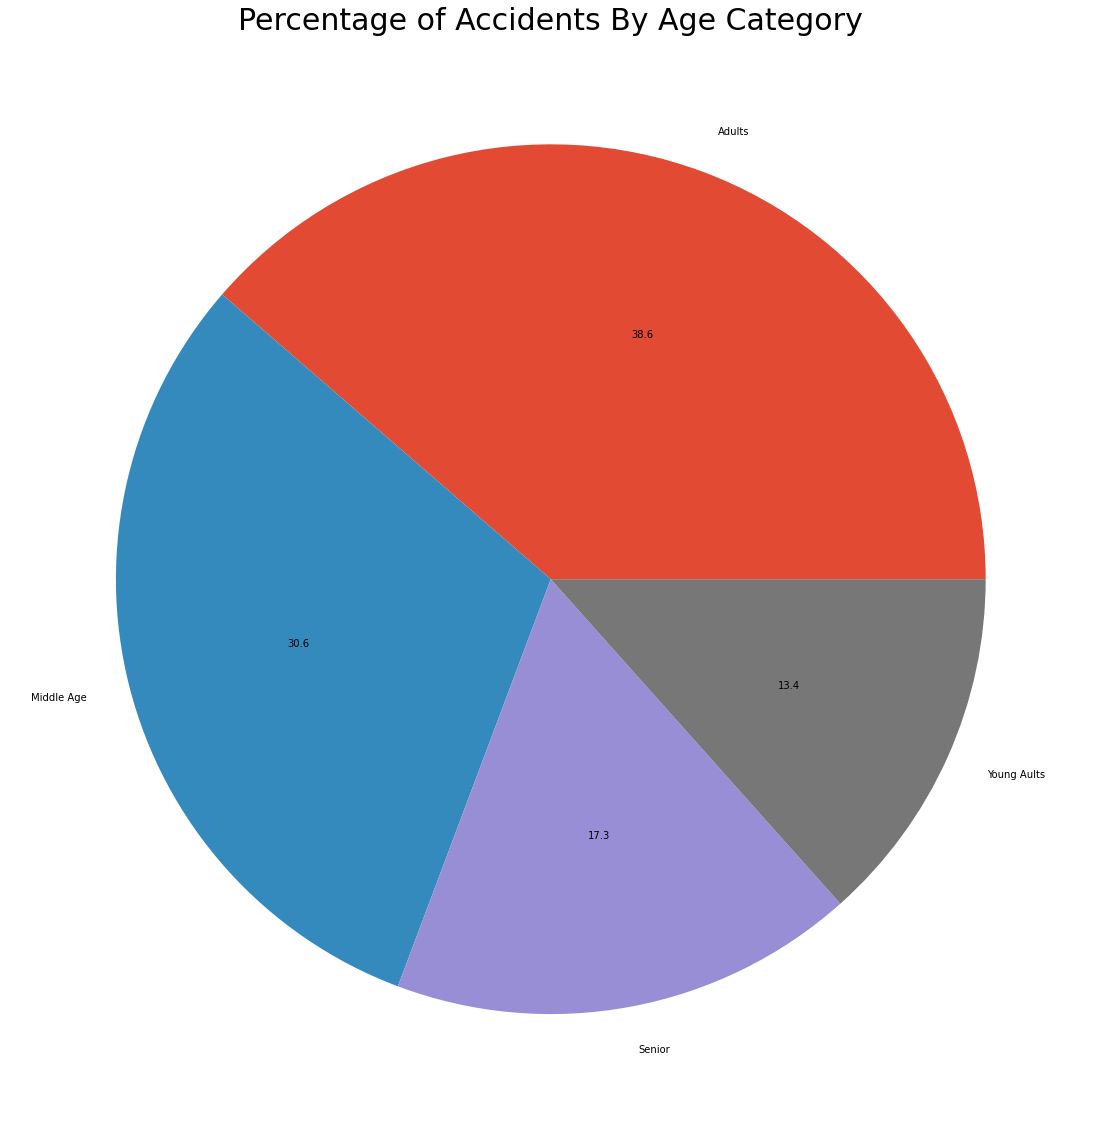

In [ ]:
values = accidents_age_category.values
labels = accidents_age_category.index

# def make_autopct(values):
#     def my_autopct(pct):
#         total = sum(values)
#         val = int(round(pct*total/100.0))
#         return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
#     return my_autopct

plt.figure(figsize=(20,20))
plt.pie(values, labels=labels, autopct='%.1f')
plt.title('Percentage of Accidents By Age Category', size=30)
plt.show()

In [ ]:
# calculating the mean value of degree of injury per age group
age_categ_degree = pd.DataFrame(age_df.groupby('Age Category')['Degree of Injury Code'].mean())
age_categ_degree

Degree of Injury Code
Age Category                       
Adults                     4.503546
Middle Age                 4.411480
Senior                     4.338551
Young Aults                4.601563

### Degree of Injury with Different Types of Occupation

In [ ]:
mines_accident_df = mines_accident.copy(deep=False)
occupation_counts = pd.DataFrame(mines_accident_df.groupby('Occupation (Accidents)').agg({'mine_id':'count','Degree of Injury Code':'mean'}))
occupation_counts = occupation_counts.sort_values(by='mine_id', ascending=False)
occupation_counts.rename(columns = {'mine_id': 'mine_count'}, inplace = True)
occupation_counts.head()

mine_count  Degree of Injury Code
Occupation (Accidents)                                                               
Maintenance man, Mechanic,  Repair/Serviceman, ...       12109               4.687340
Laborer, Blacksmith, Bull gang, Parts runner, R...        5194               4.556604
Warehouseman, Bagger, Palletizer/Stacker, Store...        4947               4.667880
Roof bolter, Rock bolter,  Pinner, Mobile roof ...        4195               4.215256
Laborer, Bull gang,  Parts runner, Roustabout, ...        3857               4.129894

In [ ]:
occupation_counts = occupation_counts.sort_values(by='Degree of Injury Code', ascending=False)
occupation_counts

mine_count  Degree of Injury Code
Occupation (Accidents)                                                               
Supplyman                                                    1                    6.0
Auger operator, Auger Crew Supervisor                        1                    6.0
Trip rider, Swamper                                          1                    6.0
Training specialist                                          3                    6.0
Car dropper, Car shake out operator                          2                    6.0
...                                                        ...                    ...
Boom operator                                                1                    3.0
Hoist operator helper                                        1                    3.0
Backhoe operator, Trackhoe operator, Crane oper...           4                    3.0
Cutting machine operator, Ripper, Universal ope...           2                    3.0
Coal dump operator                                           2                    3.0

[188 rows x 2 columns]

In [ ]:
occupation_counts = occupation_counts[(occupation_counts['mine_count']>300) & (occupation_counts['Degree of Injury Code']<4)]

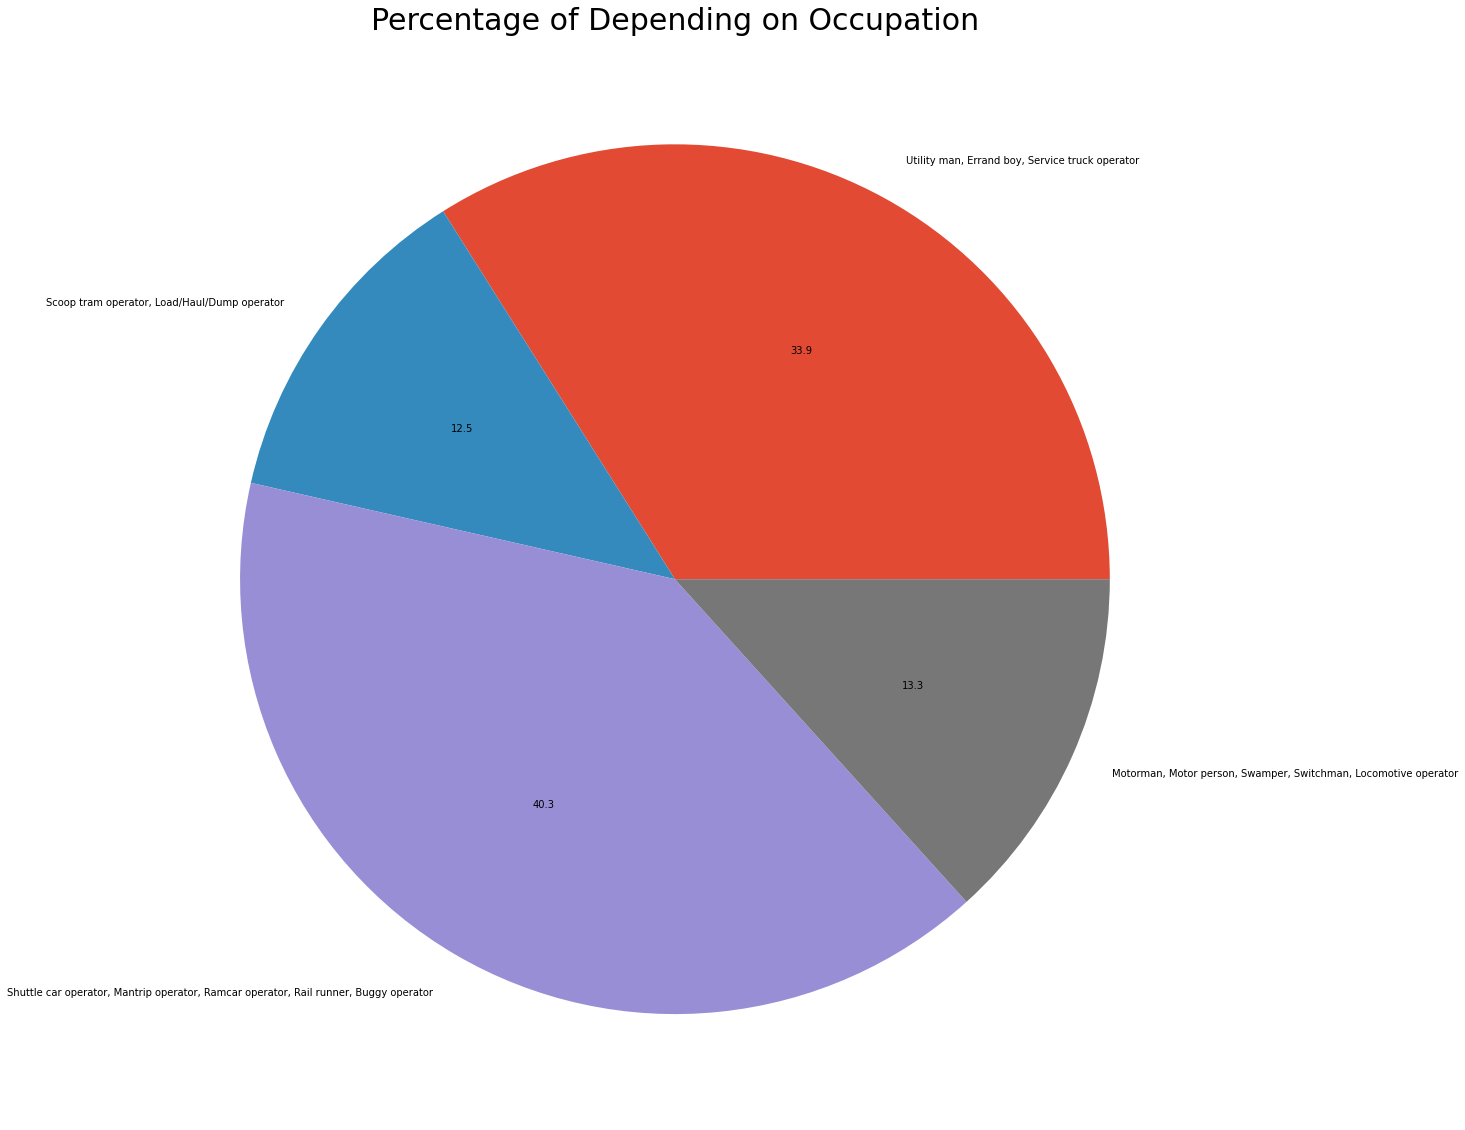

In [ ]:
values = occupation_counts['mine_count'].values
labels = occupation_counts.index

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(20,20))
plt.pie(values, labels=labels, autopct='%.1f')
plt.title('Percentage of Depending on Occupation', size=30)
plt.show()

### The No of Accidents Per Experience vs Degree of Injury

In [ ]:
mines_accident_df = mines_accident.copy(deep=False)
experience_counts = pd.DataFrame(mines_accident_df.groupby('Mine Experience').agg({'mine_id':'count','Degree of Injury Code':'mean'}))
experience_counts = experience_counts.sort_values(by='mine_id', ascending=False)
experience_counts.rename(columns = {'mine_id': 'mine_count'}, inplace = True)
experience_counts.head(10)

mine_count  Degree of Injury Code
Mine Experience                                   
2.00                   2297               4.414018
1.00                   2279               4.489250
3.00                   1935               4.342636
4.00                   1383               4.384671
5.00                   1372               4.360058
0.02                   1167               4.487575
0.23                   1120               4.466071
0.08                   1079               4.556997
6.00                   1063               4.315146
0.15                   1004               4.492032

In [ ]:
corr, _ = pearsonr(experience_counts.index,experience_counts['mine_count'])
print('Pearsons correlation: %.3f' % corr)
# the higher the experience the lower the number of accidents (probability of accidents)

Pearsons correlation: -0.291


In [ ]:
corr, _ = pearsonr(experience_counts.index,experience_counts['Degree of Injury Code'])
print('Pearsons correlation: %.3f' % corr)
# the higher the mine exp the higher the injury code (the lower severity of injury)

Pearsons correlation: 0.036


### Undeground vs Surface Mines

In [ ]:
mines_accident_df = mines_accident.copy(deep=False)
surface_counts = pd.DataFrame(mines_accident_df.groupby('Mine Type (Mines)').agg({'mine_id':'count','Degree of Injury Code':'mean'}))
surface_counts = surface_counts.sort_values(by='mine_id', ascending=False)
surface_counts.rename(columns = {'mine_id': 'mine_count'}, inplace = True)
surface_counts.head()
# Undeground mines are more dangerous than surface mines. There have been less accidents (not by a lot) and the injury degree is lower meaning the accidents have been more deadlier.

mine_count  Degree of Injury Code
Mine Type (Mines)                                   
Surface                 31492               4.589261
Underground             23954               4.231318
Facility                11439               4.577673

### Correlation Between Age and Degree of Injury

In [ ]:
age_df['Degree of Injury Code'].value_counts() 
# Confirming that some degrees occur in much higher numbers
# degree of injury 5 has about ~45% less number of samples than degree of injury 3 -- we are likely to have a biased answer when comparing them
# degree of ...

3    24069
6    21413
5    13602
4     6953
2      638
1      121
Name: Degree of Injury Code, dtype: int64

In [ ]:
deg_1 = age_df['Age (Accidents)'][age_df['Degree of Injury Code'] == 1].values
deg_2 = age_df['Age (Accidents)'][age_df['Degree of Injury Code'] == 2].values
deg_3 = age_df['Age (Accidents)'][age_df['Degree of Injury Code'] == 3].values
deg_4 = age_df['Age (Accidents)'][age_df['Degree of Injury Code'] == 4].values
deg_5 = age_df['Age (Accidents)'][age_df['Degree of Injury Code'] == 5].values
deg_6 = age_df['Age (Accidents)'][age_df['Degree of Injury Code'] == 6].values

In [ ]:
# def bootstrap_replicate_1d(data, func):
#     bs_sample = np.random.choice(data, 500)
#     return func(bs_sample)

# def draw_bs_reps(data, func, size=1):

#     bs_replicates = np.empty(size)


#     for i in range(size):
#         bs_replicates[i] = bootstrap_replicate_1d(data,func)

#     return bs_replicates

In [ ]:
# mean_1 = draw_bs_reps(deg_1, np.mean, number_samples)
number_samples = 10000
mean_2 = draw_bs_reps(deg_2, np.mean, number_samples)
mean_3 = draw_bs_reps(deg_3, np.mean, number_samples)
mean_4 = draw_bs_reps(deg_4, np.mean, number_samples)
mean_5 = draw_bs_reps(deg_5, np.mean, number_samples)
mean_6 = draw_bs_reps(deg_6, np.mean, number_samples)

In [ ]:
# age_degree_1 = pd.DataFrame({'Age':mean_1,
#                            'Degree Injury': '1'})

age_degree_2 = pd.DataFrame({'Age':mean_2,
                           'Degree Injury': 2})
age_degree_3 = pd.DataFrame({'Age':mean_3,
                           'Degree Injury': 3})
age_degree_4 = pd.DataFrame({'Age':mean_4,
                           'Degree Injury': 4})
age_degree_5 = pd.DataFrame({'Age':mean_5,
                           'Degree Injury': 5})
age_degree_6 = pd.DataFrame({'Age':mean_6,
                           'Degree Injury': 6})

age_degree = pd.concat([age_degree_2,age_degree_3,age_degree_4,age_degree_5,age_degree_6])
age_degree

Age  Degree Injury
0     41.420              2
1     41.734              2
2     41.308              2
3     40.848              2
4     40.790              2
...      ...            ...
9995  39.260              6
9996  39.508              6
9997  39.018              6
9998  39.424              6
9999  39.128              6

[50000 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


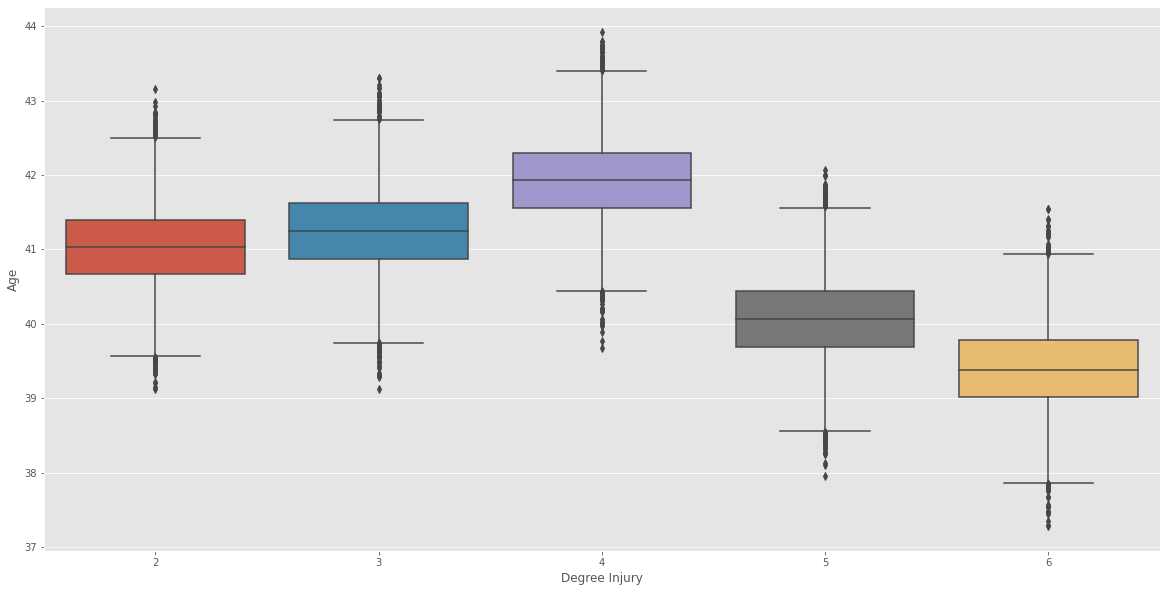

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(age_degree['Degree Injury'], age_degree['Age'])
# plt.yscale('log')
plt.show()

In [ ]:
corr, _ = pearsonr(age_degree['Degree Injury'], age_degree['Age'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.597


### Mine Experience With Degree of Injury

Overall (For all degrees of injury)

In [ ]:
exp_mines_monthly = accident_count.groupby('Accident Date (Accidents)').agg({'Mine Experience':'mean'})
exp_mines_monthly = exp_mines_monthly.resample('M').mean()

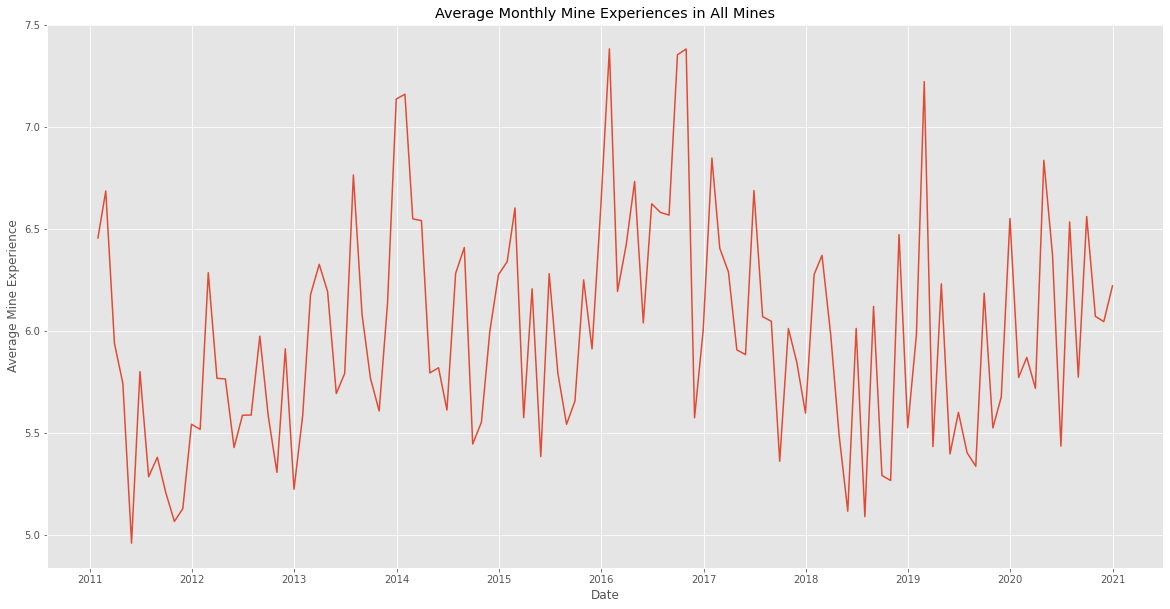

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(exp_mines_monthly.index, exp_mines_monthly['Mine Experience'])
plt.title('Average Monthly Mine Experiences in All Mines')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

Only for Degree of Injury 1

In [ ]:
deg_1 = accident_count[accident_count['Degree of Injury Code'] == 1]
exp_mines_deg1 = deg_1.groupby('Accident Date (Accidents)').agg({'Mine Experience':'mean'})
exp_mines_deg1 = exp_mines_deg1.resample('M').mean()
exp_mines_deg1.fillna(0, inplace=True)


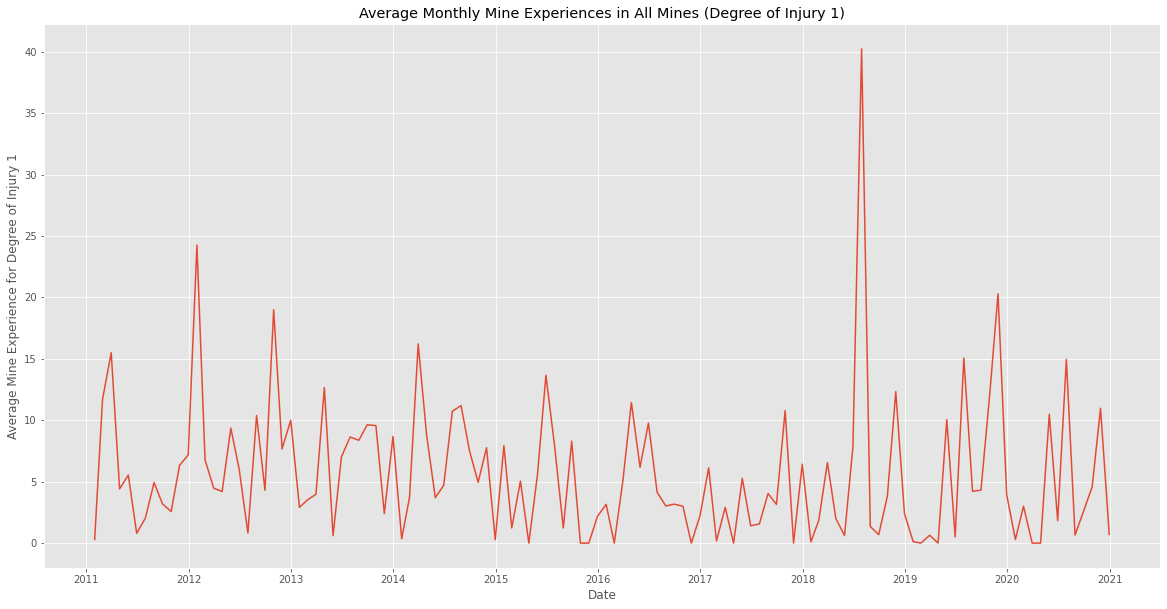

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(exp_mines_deg1.index, exp_mines_deg1['Mine Experience'])
plt.title('Average Monthly Mine Experiences in All Mines (Degree of Injury 1)')
plt.ylabel('Average Mine Experience for Degree of Injury 1')
plt.xlabel('Date')
plt.show()

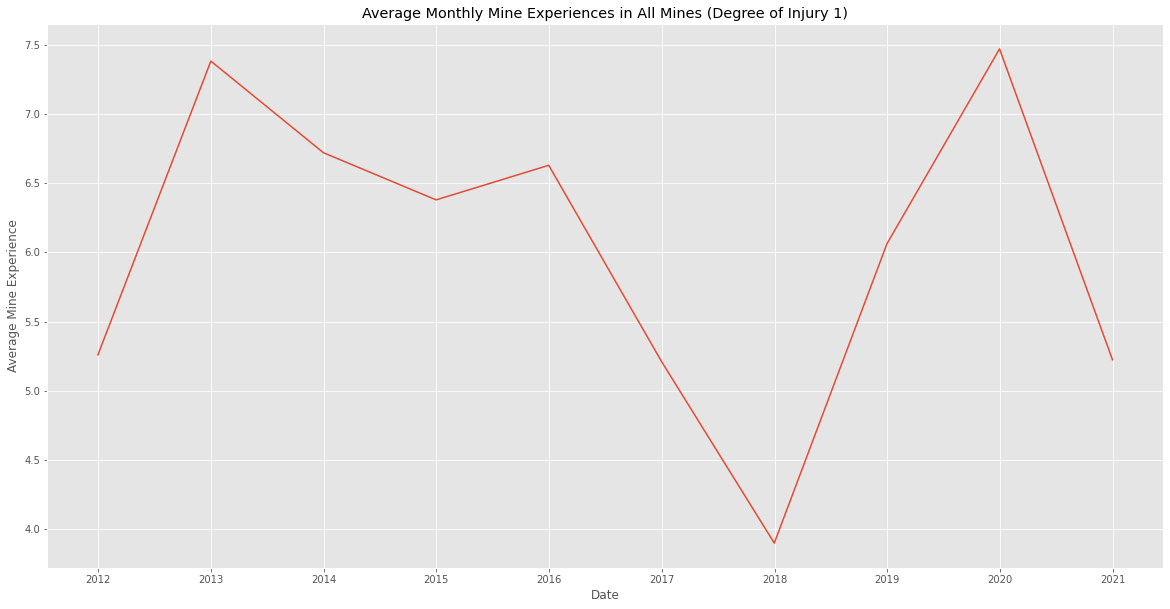

In [ ]:
deg_1 = accident_count[accident_count['Degree of Injury Code'] == 1]
exp_mines_deg1 = deg_1.groupby('Accident Date (Accidents)').agg({'Mine Experience':'mean'})
exp_mines_deg1 = exp_mines_deg1.resample('Y').mean()
exp_mines_deg1.fillna(0, inplace=True)
plt.figure(figsize=(20,10))
plt.plot(exp_mines_deg1.index, exp_mines_deg1['Mine Experience'])
plt.title('Average Monthly Mine Experiences in All Mines (Degree of Injury 1)')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

Degree of injury code 1-5

In [ ]:
deg_1_5 = accident_count[accident_count['Degree of Injury Code'] != 6]
exp_mines_deg15 = deg_1_5.groupby('Accident Date (Accidents)').agg({'Mine Experience':'mean'})
exp_mines_deg15 = exp_mines_deg15.resample('M').mean()
exp_mines_deg15.fillna(0, inplace=True)

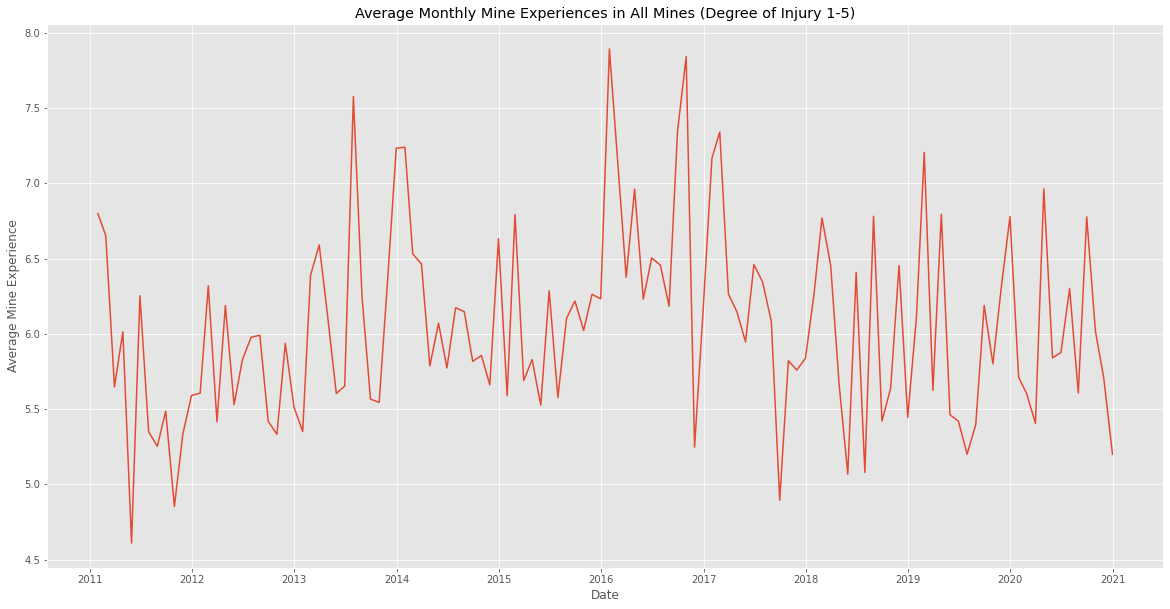

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(exp_mines_deg15.index, exp_mines_deg15['Mine Experience'])
plt.title('Average Monthly Mine Experiences in All Mines (Degree of Injury 1-5)')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

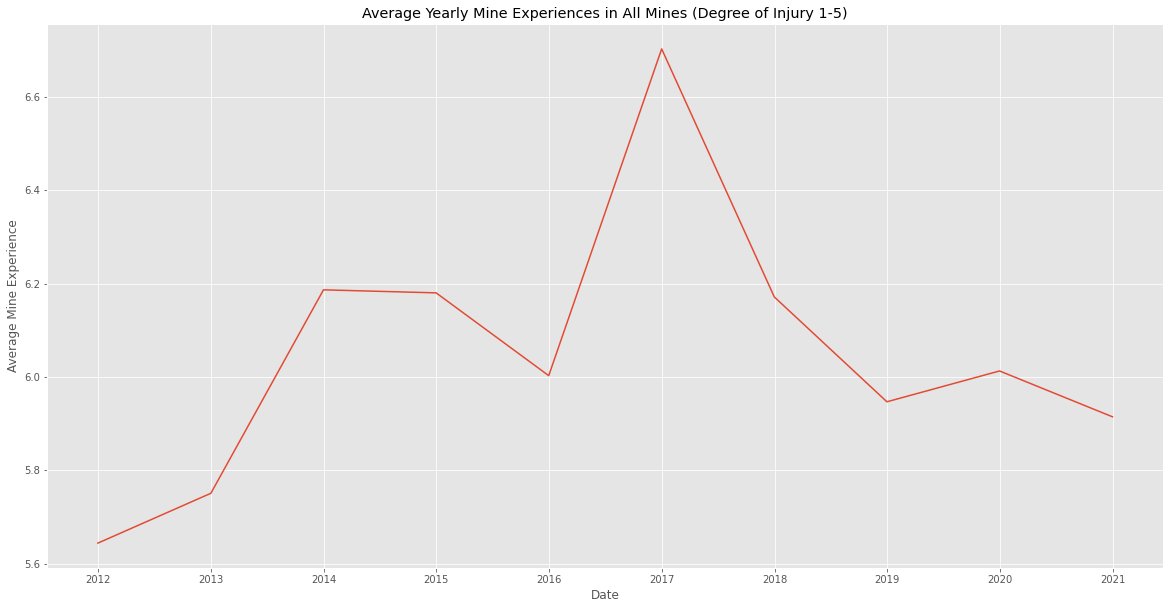

In [ ]:
deg_1_5 = accident_count[accident_count['Degree of Injury Code'] != 6]
exp_mines_deg15 = deg_1_5.groupby('Accident Date (Accidents)').agg({'Mine Experience':'mean'})
exp_mines_deg15 = exp_mines_deg15.resample('Y').mean()
exp_mines_deg15.fillna(0, inplace=True)
plt.figure(figsize=(20,10))
plt.plot(exp_mines_deg15.index, exp_mines_deg15['Mine Experience'])
plt.title('Average Yearly Mine Experiences in All Mines (Degree of Injury 1-5)')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

### Job Experience With Degree of Injury

Overall for all degree of injury

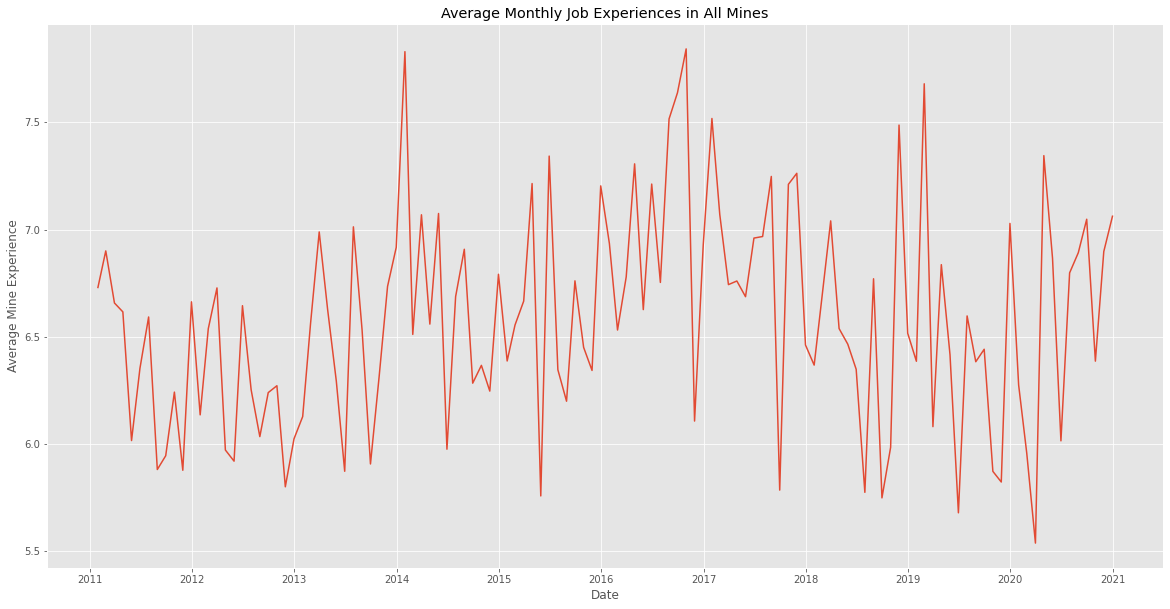

In [ ]:
exp_job_monthly = accident_count.groupby('Accident Date (Accidents)').agg({'Job Experience':'mean'})
exp_job_monthly = exp_job_monthly.resample('M').mean()
plt.figure(figsize=(20,10))
plt.plot(exp_job_monthly.index, exp_job_monthly['Job Experience'])
plt.title('Average Monthly Job Experiences in All Mines')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

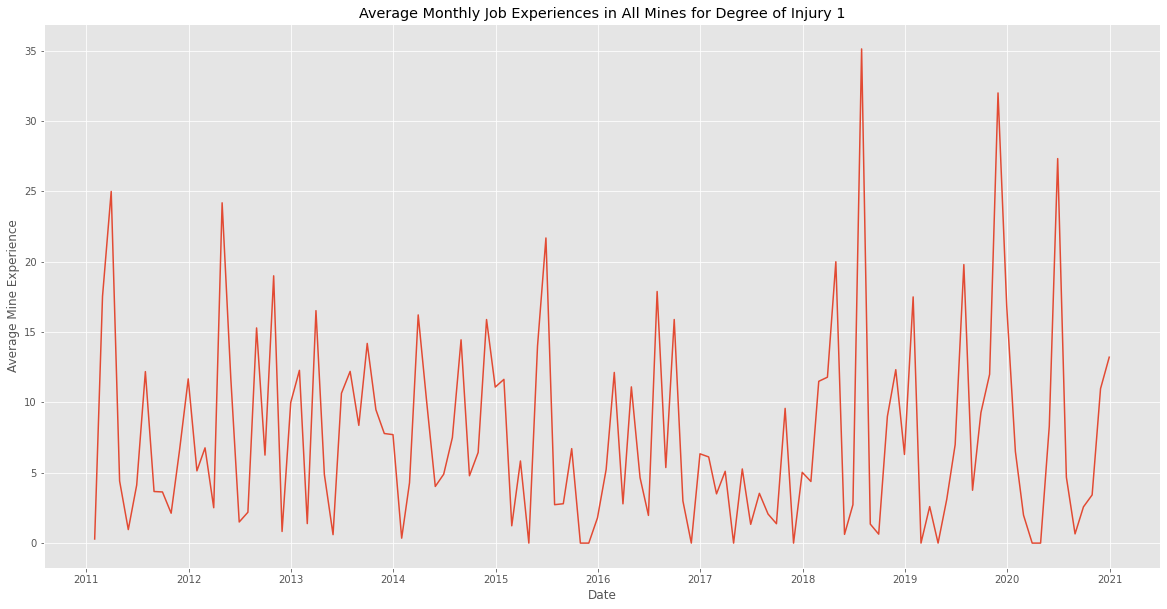

In [ ]:
deg_1 = accident_count[accident_count['Degree of Injury Code'] == 1]
exp_job_monthly = deg_1.groupby('Accident Date (Accidents)').agg({'Job Experience':'mean'})
exp_job_monthly = exp_job_monthly.resample('M').mean()
exp_job_monthly.fillna(0, inplace=True)
plt.figure(figsize=(20,10))
plt.plot(exp_job_monthly.index, exp_job_monthly['Job Experience'])
plt.title('Average Monthly Job Experiences in All Mines for Degree of Injury 1')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

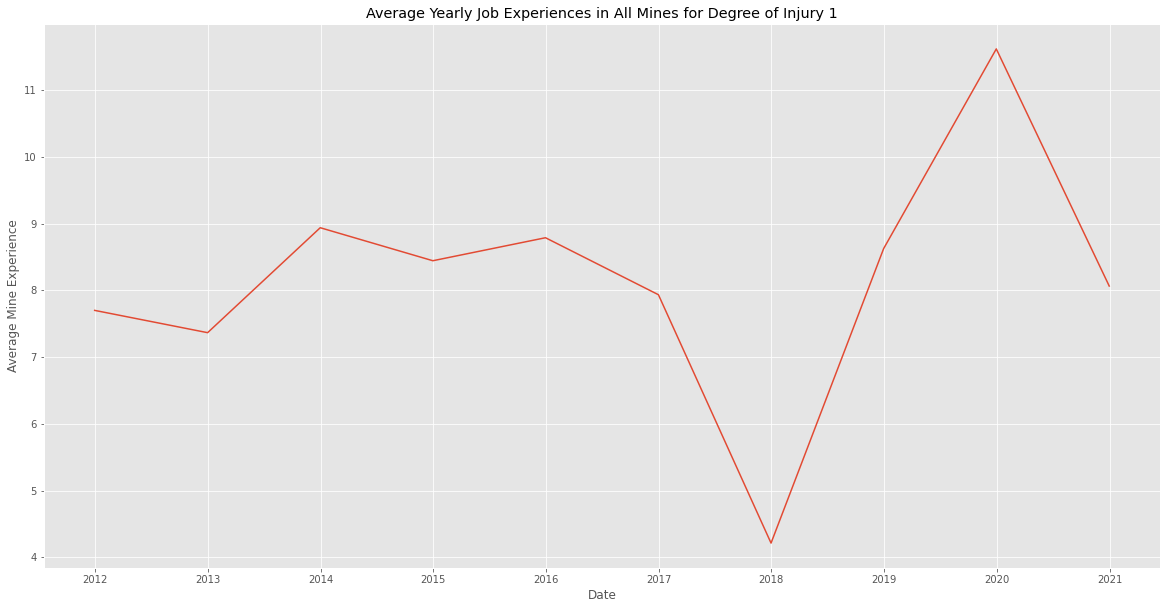

In [ ]:
deg_1 = accident_count[accident_count['Degree of Injury Code'] == 1]
exp_job_monthly = deg_1.groupby('Accident Date (Accidents)').agg({'Job Experience':'mean'})
exp_job_monthly = exp_job_monthly.resample('Y').mean()
exp_job_monthly.fillna(0, inplace=True)
plt.figure(figsize=(20,10))
plt.plot(exp_job_monthly.index, exp_job_monthly['Job Experience'])
plt.title('Average Yearly Job Experiences in All Mines for Degree of Injury 1')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

degree of injury 1-5

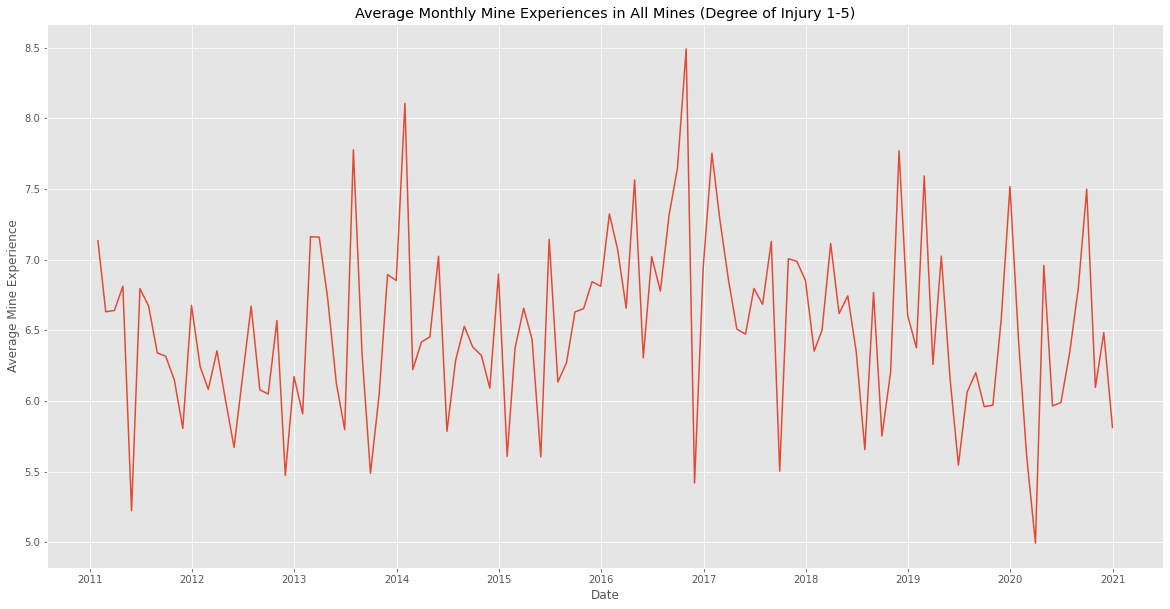

In [ ]:
deg_1_5 = accident_count[accident_count['Degree of Injury Code'] != 6]
exp_job_deg15 = deg_1_5.groupby('Accident Date (Accidents)').agg({'Job Experience':'mean'})
exp_job_deg15 = exp_job_deg15.resample('M').mean()
exp_job_deg15.fillna(0, inplace=True)
plt.figure(figsize=(20,10))
plt.plot(exp_job_deg15.index, exp_job_deg15['Job Experience'])
plt.title('Average Monthly Mine Experiences in All Mines (Degree of Injury 1-5)')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

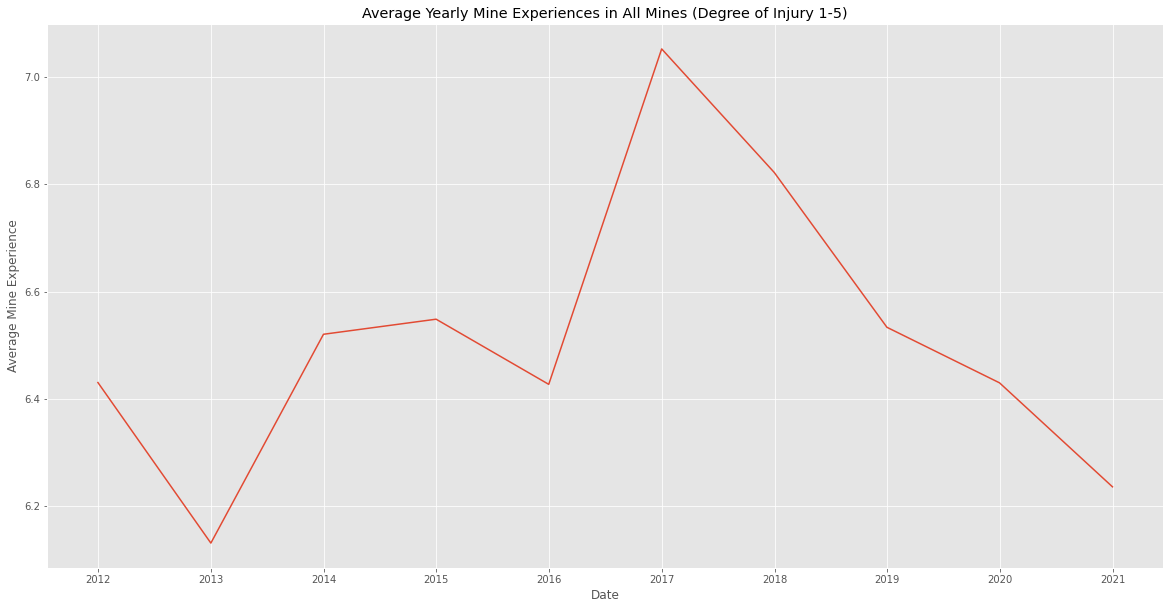

In [ ]:
deg_1_5 = accident_count[accident_count['Degree of Injury Code'] != 6]
exp_job_deg15 = deg_1_5.groupby('Accident Date (Accidents)').agg({'Job Experience':'mean'})
exp_job_deg15 = exp_job_deg15.resample('Y').mean()
exp_job_deg15.fillna(0, inplace=True)
plt.figure(figsize=(20,10))
plt.plot(exp_job_deg15.index, exp_job_deg15['Job Experience'])
plt.title('Average Yearly Mine Experiences in All Mines (Degree of Injury 1-5)')
plt.ylabel('Average Mine Experience')
plt.xlabel('Date')
plt.show()

## JOINING VIOLATIONS WITH MINES

In [ ]:
# Joining violations and mines tables 
sub_data = pandasql.sqldf("SELECT * FROM violations INNER JOIN mines USING (mine_id);", globals())
# Converting the newly joined dataset into pandas dataframe
mines_violations = pd.DataFrame(sub_data)

In [ ]:
mines_violations.head()

Violation No.       Violation Date Issued  ...  State Abbreviation  Type of Company
0        3021501  2011-02-16 00:00:00.000000  ...                  AL            Other
1        3021502  2011-02-16 00:00:00.000000  ...                  AL            Other
2        3021503  2011-03-10 00:00:00.000000  ...                  AL            Other
3        3021505  2011-03-29 00:00:00.000000  ...                  AL            Other
4        3021506  2011-04-06 00:00:00.000000  ...                  AL            Other

[5 rows x 63 columns]

In [ ]:
violations.columns

Index(['Violation No.', 'Violation Date Issued',
       'Calendar Year Qtr (Violations)', 'mine_id',
       'Controller ID @ Violations', 'Operator ID (Violations)', 'Event No.',
       '30 CFR', 'AR No.', 'Flagrant Indicator', 'Health, Safety or Other',
       'Injury or Illness', 'Likelihood', 'Negligence', 'Section of Act',
       'Significant and Substantial (Violations)', 'Termination Date',
       'Termination Type', 'Type Action 1', 'Type of Issuance'],
      dtype='object')

### Operator/Controller with most accidents

In [ ]:
op_con_accidents = violations.copy(deep =False)
# grouping by operator id and mine id
op_accidents = pd.DataFrame(op_con_accidents.groupby('Operator ID (Violations)')['mine_id'].count())
con_accidents = pd.DataFrame(op_con_accidents.groupby('Controller ID @ Violations')['mine_id'].count())
op_accidents.sort_values(by='mine_id', ascending=False, inplace=True)
con_accidents.sort_values(by='mine_id', ascending=False, inplace=True)
con_accidents.head()

mine_id
Controller ID @ Violations         
0041211                       47296
C13408                        36768
C15455                        30009
C15561                        25585
C00692                        21041

In [ ]:
op_accidents.head()

mine_id
Operator ID (Violations)         
P00812                      14440
0100767                     11747
P22603                      11240
P09635                       9477
P23854                       9117

### Most common 'Type Action'

In [ ]:
# value_counts() gives us all the unique values in a column along with the number of occurence of each
type_action = violations['Type Action 1'].value_counts()
type_action

104(a)       1013428
104(g)(1)       6839
104(d)(1)       5882
103(k)          5722
104(b)          5425
104(d)(2)       3063
314(b)          2838
107(a)          2231
104(e)(2)        384
103(j)           207
104(e)(1)         44
Name: Type Action 1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


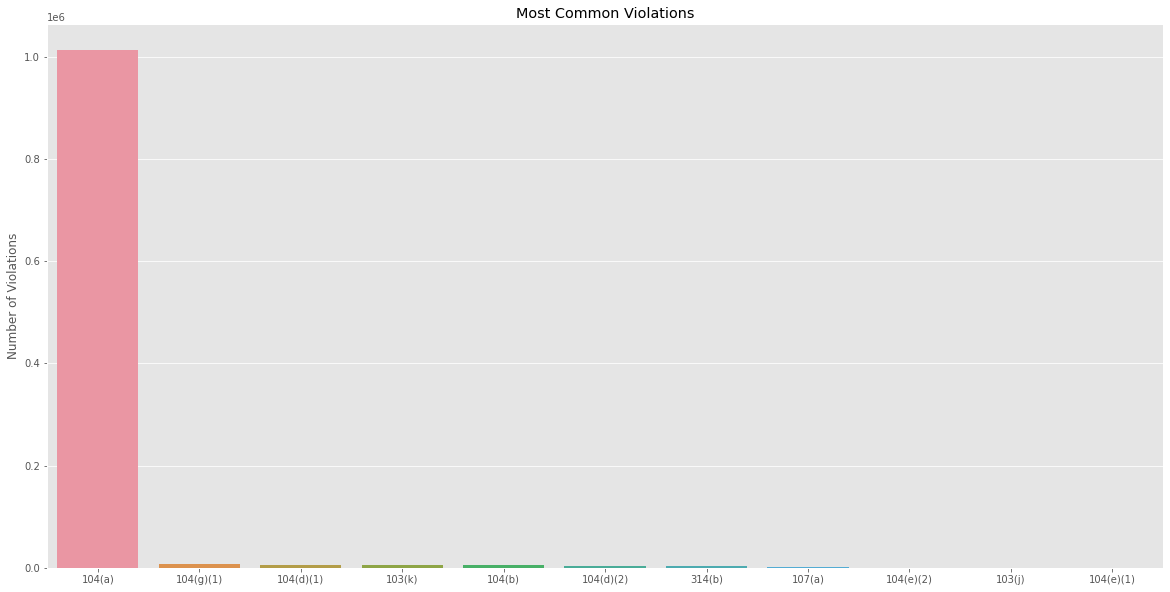

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(type_action.index, type_action.values)
plt.ylabel('Number of Violations')
plt.title('Most Common Violations')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


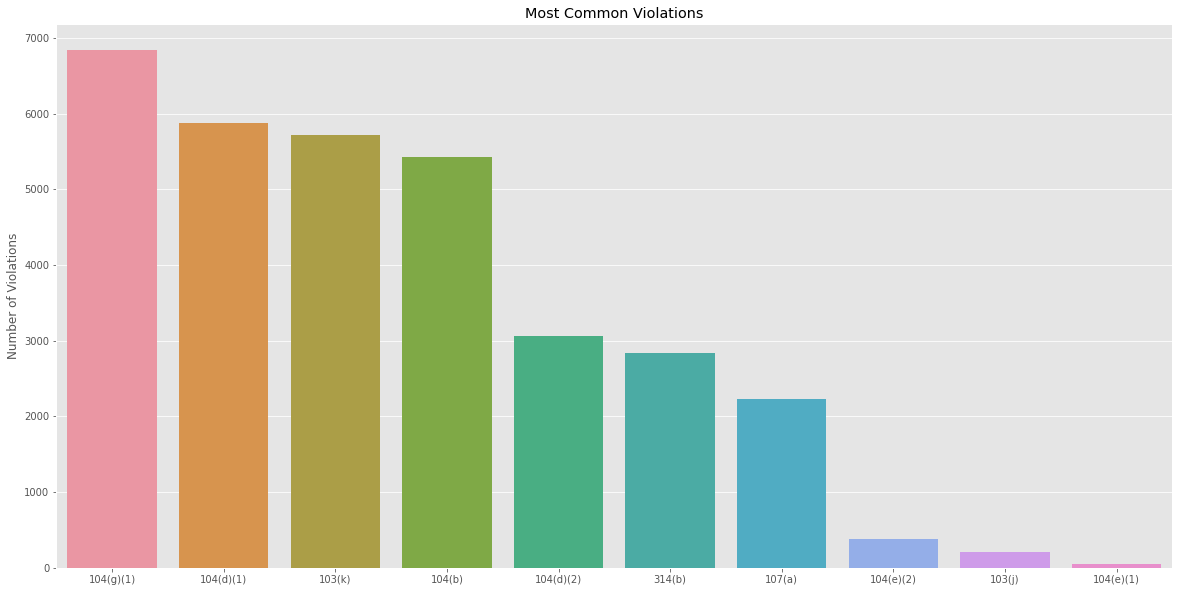

In [ ]:
# excluding 104(a)
plt.figure(figsize=(20,10))
sns.barplot(type_action.index[1:], type_action.values[1:])
plt.ylabel('Number of Violations')
plt.title('Most Common Violations')
plt.show()

### Number of violations for different operator-controller pair

In [ ]:
controllers = violations.copy(deep =False)
# first groupby controller ID and then by operator ID
controllers = controllers.groupby(['Controller ID @ Violations' , 'Operator ID (Violations)']).agg({'mine_id':'count'})
# sort by mine_id (number of accidents) column
controllers.sort_values(by='mine_id', ascending=False).head(10)

mine_id
Controller ID @ Violations Operator ID (Violations)         
C15863                     0100767                     11747
C07485                     P09635                       9477
C15833                     P23854                       9117
C00692                     P00812                       8759
                           0105487                      8079
0066691                    0079344                      6092
0041211                    P22603                       6059
C13408                     P00812                       5681
C15455                     0072463                      5372
M00174                     L16197                       5304

### Average yearly violations for O & C

In [ ]:
violations_count = mines_violations.copy(deep =False)
violations_count.dropna(subset=['Violation Date Issued'], axis=0, inplace=True)
# get only the first 10 characters from each row of Violation Date Issued column because only the first 10 characters is the date, rest are garbage values
violations_count['Violation Date Issued'] = violations_count['Violation Date Issued'].apply(lambda row: row[:10])
# convert it to date time object
violations_count['Violation Date Issued'] = pd.to_datetime(violations_count['Violation Date Issued'])
# create a new column called year and store the year of each accident in that column
violations_count['Year'] = violations_count.apply(lambda row: row['Violation Date Issued'].year, axis=1)


In [ ]:
operator_yearly = violations_count.groupby(['Year','Operator ID (Violations)']).agg({'mine_id':'count'})
operator_yearly

mine_id
Year Operator ID (Violations)         
2011 0050007                         1
     0050010                         5
     0050012                         1
     0050016                         3
     0050024                         9
...                                ...
2020 P24680                          2
     P24691                         94
     P24715                         42
     P24734                          3
     P31844                          5

[59242 rows x 1 columns]

In [ ]:
operator_yearly = operator_yearly.unstack(1)
operator_yearly.fillna(0, inplace=True)
operator_yearly

mine_id                  ...                     
Operator ID (Violations) 0050007 0050009 0050010  ... P24729 P24734 P31844
Year                                              ...                     
2011                         1.0     0.0     5.0  ...    2.0    6.0  192.0
2012                         0.0    14.0     2.0  ...    1.0    6.0  100.0
2013                         0.0     7.0     2.0  ...    0.0    4.0  111.0
2014                         0.0     4.0     1.0  ...    0.0    0.0  202.0
2015                         0.0     4.0     8.0  ...    0.0   10.0  172.0
2016                         0.0     1.0    11.0  ...    0.0    4.0   44.0
2017                         0.0     2.0     1.0  ...    0.0    1.0   43.0
2018                         0.0     3.0     0.0  ...    0.0    2.0  228.0
2019                         0.0     2.0     0.0  ...    0.0    3.0  273.0
2020                         0.0     0.0     0.0  ...    0.0    3.0    5.0

[10 rows x 11833 columns]

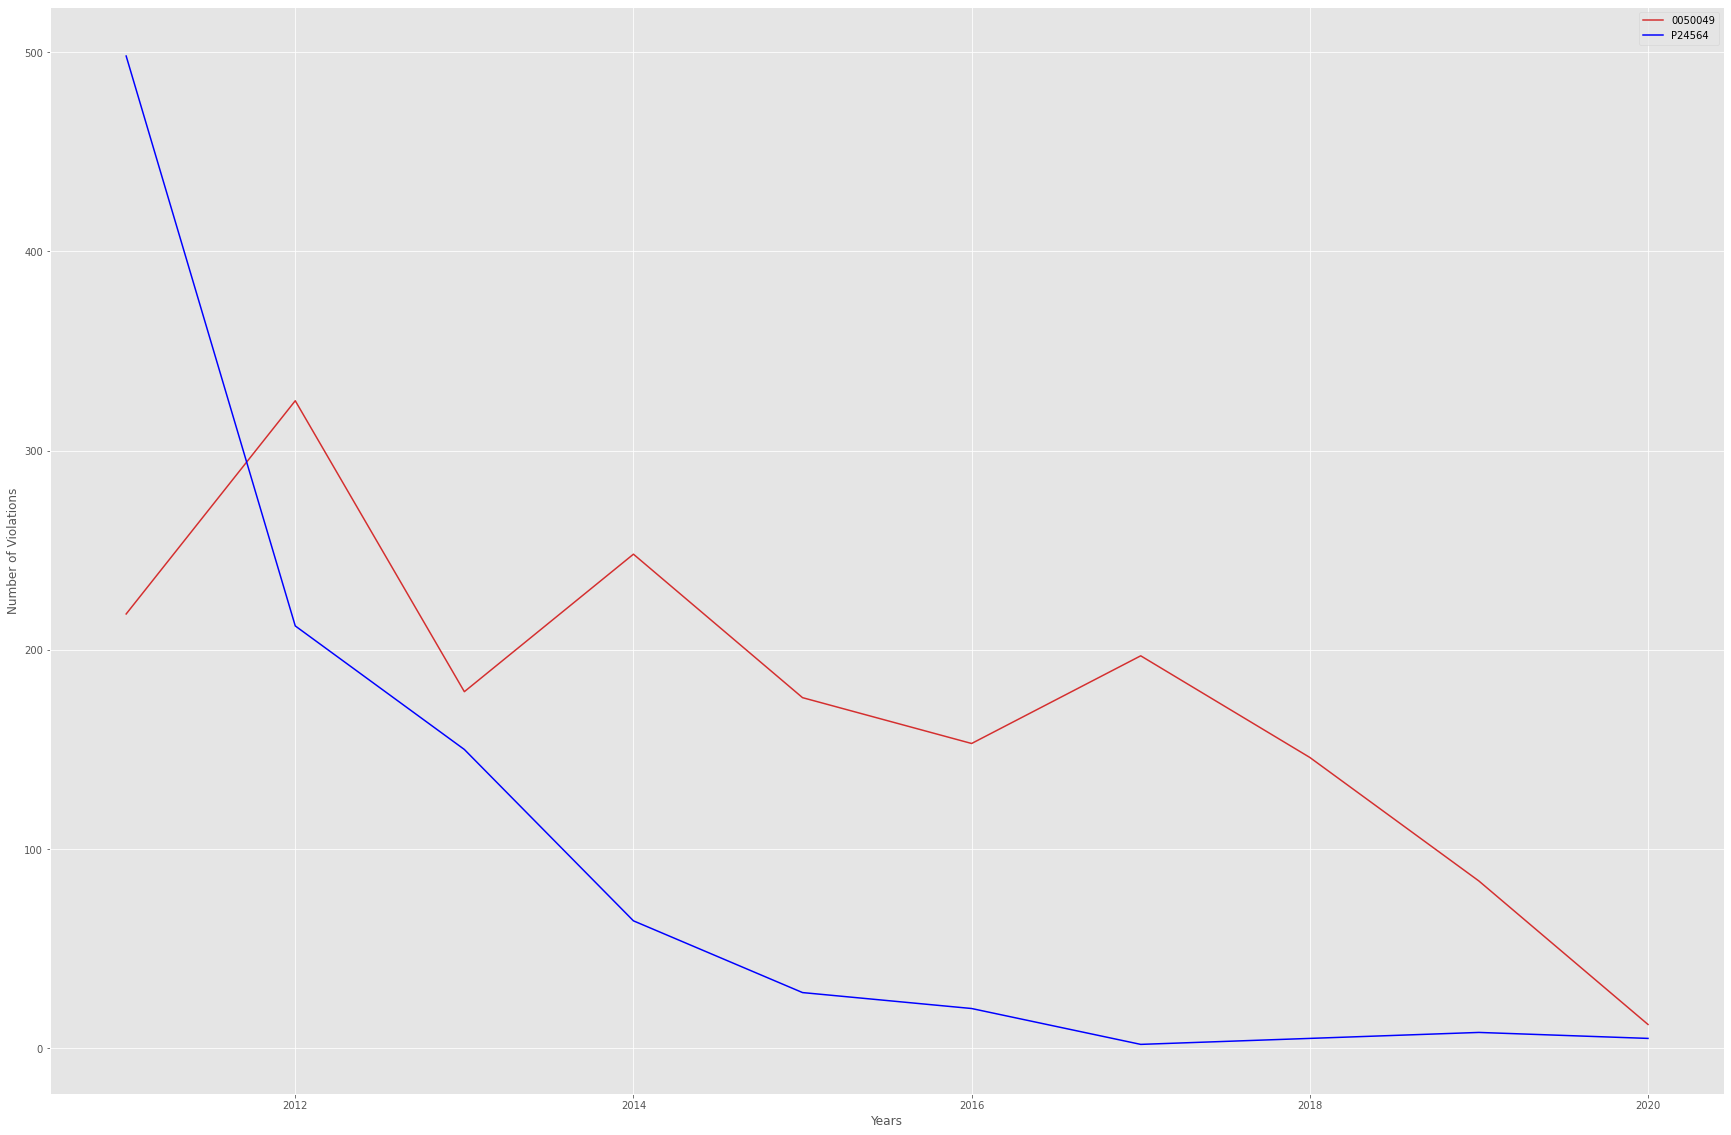

In [ ]:
# change the operator ID to change the graph
plt.figure(figsize=(30,20))

plt.plot(operator_yearly.index, operator_yearly[('mine_id', '0050049')], color = "#d42f2f", label='0050049')
plt.plot(operator_yearly.index, operator_yearly[('mine_id', 'P24564')], color = "b", label='P24564')

plt.xlabel("Years")
plt.ylabel("Number of Violations")
plt.legend()
plt.show()

In [ ]:
# number of accidents per year per controller
controller_yearly = violations_count.groupby(['Year','Controller ID @ Violations']).agg({'mine_id':'count'})
controller_yearly = controller_yearly.unstack(1)
controller_yearly.fillna(0, inplace=True)
controller_yearly

mine_id                  ...                     
Controller ID @ Violations 0040462 0040463 0040465  ... M40434 M40446 M40455
Year                                                ...                     
2011                           1.0     0.0     1.0  ...    2.0    9.0    4.0
2012                           0.0    14.0     0.0  ...    4.0    7.0    0.0
2013                           0.0     1.0     0.0  ...    0.0   25.0    3.0
2014                           0.0     0.0     0.0  ...    0.0    8.0    5.0
2015                           0.0     0.0     0.0  ...    0.0   47.0    0.0
2016                           0.0     0.0     0.0  ...    0.0   13.0    7.0
2017                           0.0     0.0     0.0  ...    0.0    3.0    2.0
2018                           0.0     0.0     0.0  ...    0.0   12.0    2.0
2019                           0.0     0.0     0.0  ...    0.0    6.0    2.0
2020                           0.0     0.0     0.0  ...    0.0    1.0    7.0

[10 rows x 10885 columns]

### Number of highly unlikely violations

In [ ]:
likelihood = violations.copy(deep =False)
likelihood['Likelihood'].value_counts()

Unlikely        725931
Reasonably      233375
NoLikelihood     64815
Highly            3643
Occurred          1873
Name: Likelihood, dtype: int64

In [ ]:
# IGNORE
def count_likelihood(row,dictionary):

  controller = row['Controller ID @ Violations']

  if (row['Likelihood'] == 'Unlikely'):
    if controller not in dictionary.keys():
      dictionary[controller] = 1
    else:
      dictionary[controller]+=1

  return dictionary

In [ ]:
# IGNORE
dictionary = {}

likelihood_top = likelihood[(likelihood['Controller ID @ Violations'] == 'C07485') | ((likelihood['Controller ID @ Violations'] == 'C15863') | (likelihood['Controller ID @ Violations'] == 'C07485'))]
likelihood_top.shape

(21334, 20)

In [ ]:
# Ignore
unlikely_violations = likelihood_top.apply(lambda row: count_likelihood(row, dictionary), axis=1)

In [ ]:
unlikely_violations

77        {'C07485': 7148, 'C15863': 7835}
18081     {'C07485': 7148, 'C15863': 7835}
19034     {'C07485': 7148, 'C15863': 7835}
19035     {'C07485': 7148, 'C15863': 7835}
19043     {'C07485': 7148, 'C15863': 7835}
                        ...               
998834    {'C07485': 7148, 'C15863': 7835}
999281    {'C07485': 7148, 'C15863': 7835}
999282    {'C07485': 7148, 'C15863': 7835}
999297    {'C07485': 7148, 'C15863': 7835}
999298    {'C07485': 7148, 'C15863': 7835}
Length: 21334, dtype: object

In [ ]:
# extracting only the 'reasonably','unlikely' and ''highly' violations for a particular mine

# you can change the mine_id to the mine of interest
mine_id = '0050049'

operator_likelihood = violations_count[(violations_count['Operator ID (Violations)'] == mine_id) & ((violations_count['Likelihood'] == 'Unlikely') | (violations_count['Likelihood'] == 'Reasonably') | (violations_count['Likelihood'] == 'Highly'))]
operator_likelihood = operator_likelihood.groupby(['Year','Likelihood']).agg({'mine_id':'count'})
operator_likelihood

mine_id
Year Likelihood         
2011 Reasonably       54
     Unlikely        146
2012 Highly            1
     Reasonably       71
     Unlikely        233
2013 Reasonably       29
     Unlikely        135
2014 Reasonably       40
     Unlikely        192
2015 Reasonably       35
     Unlikely        131
2016 Highly            1
     Reasonably       27
     Unlikely        112
2017 Highly            3
     Reasonably       37
     Unlikely        135
2018 Highly            1
     Reasonably       22
     Unlikely        114
2019 Reasonably       12
     Unlikely         64
2020 Unlikely          8

In [ ]:
operator_likelihood = operator_likelihood.unstack(1)
operator_likelihood.fillna(0, inplace=True)
operator_likelihood

mine_id                    
Likelihood  Highly Reasonably Unlikely
Year                                  
2011           0.0       54.0    146.0
2012           1.0       71.0    233.0
2013           0.0       29.0    135.0
2014           0.0       40.0    192.0
2015           0.0       35.0    131.0
2016           1.0       27.0    112.0
2017           3.0       37.0    135.0
2018           1.0       22.0    114.0
2019           0.0       12.0     64.0
2020           0.0        0.0      8.0

In [ ]:
operator_likelihood.index.values

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

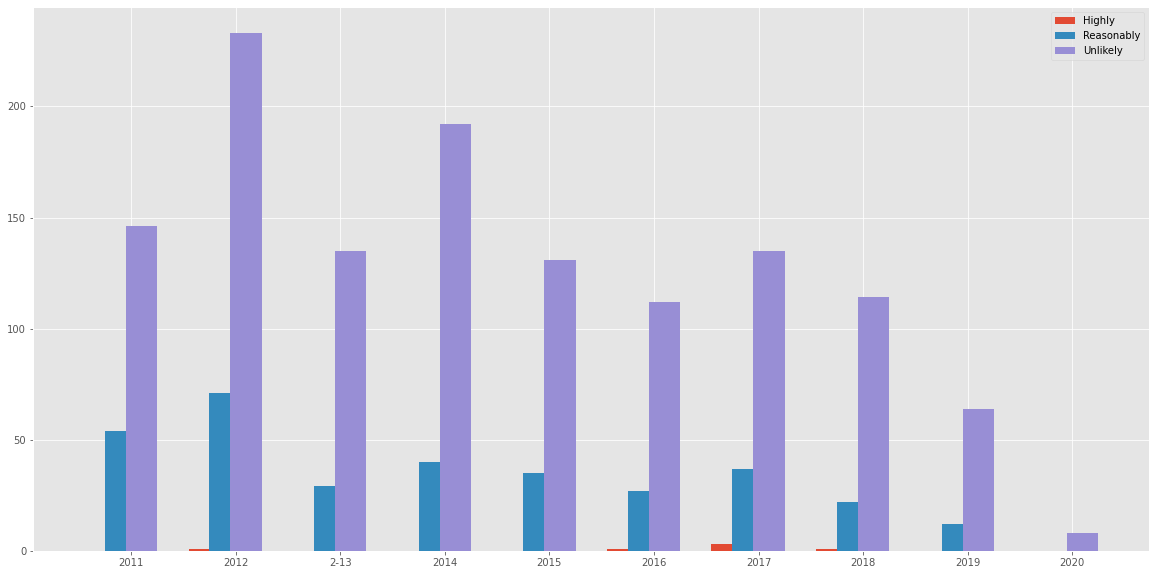

In [ ]:
# different types of violations for a specific mine over the yers. change mine_id to plot the graph for mine of interest
X = operator_likelihood.index.values
X_axis = np.arange(len(X))

plt.figure(figsize=(20,10))  
plt.bar(X_axis - 0.3, operator_likelihood[('mine_id','Highly')], 0.3, label = 'Highly')
plt.bar(X_axis - 0.1, operator_likelihood[('mine_id','Reasonably')], 0.3, label = 'Reasonably')
plt.bar(X_axis + 0.1, operator_likelihood[('mine_id','Unlikely')], 0.3, label = 'Unlikely')
plt.xticks([0,1,2,3,4,5,6,7,8,9],['2011','2012','2-13','2014','2015','2016','2017','2018','2019','2020'])
plt.legend()
plt.show()

### Violations in different mine types

In [ ]:
violations_mine_type = mines_violations.copy(deep = True)
violations_mine_type = violations_mine_type.groupby(['Mine Type (Mines)']).agg({'mine_id':'count'})
violations_mine_type.head()

mine_id
Mine Type (Mines)         
Facility            127617
Surface             459627
Underground         458807

### Violations vs seasonality

In [ ]:
violations['Violation Date Issued']

0          2011-02-16 00:00:00.000000
1          2011-02-16 00:00:00.000000
2          2011-03-10 00:00:00.000000
3          2011-03-29 00:00:00.000000
4          2011-04-06 00:00:00.000000
                      ...            
1046058    2020-04-21 00:00:00.000000
1046059    2020-04-21 00:00:00.000000
1046060    2020-04-21 00:00:00.000000
1046061    2020-07-22 00:00:00.000000
1046062    2020-07-22 00:00:00.000000
Name: Violation Date Issued, Length: 1046063, dtype: object

In [ ]:
violations_count = mines_violations.copy(deep =False)
violations_count.dropna(subset=['Violation Date Issued'], axis=0, inplace=True)
# get first 10 characters 
violations_count['Violation Date Issued'] = violations_count['Violation Date Issued'].apply(lambda row: row[:10])
violations_count['Violation Date Issued'] = pd.to_datetime(violations_count['Violation Date Issued'])


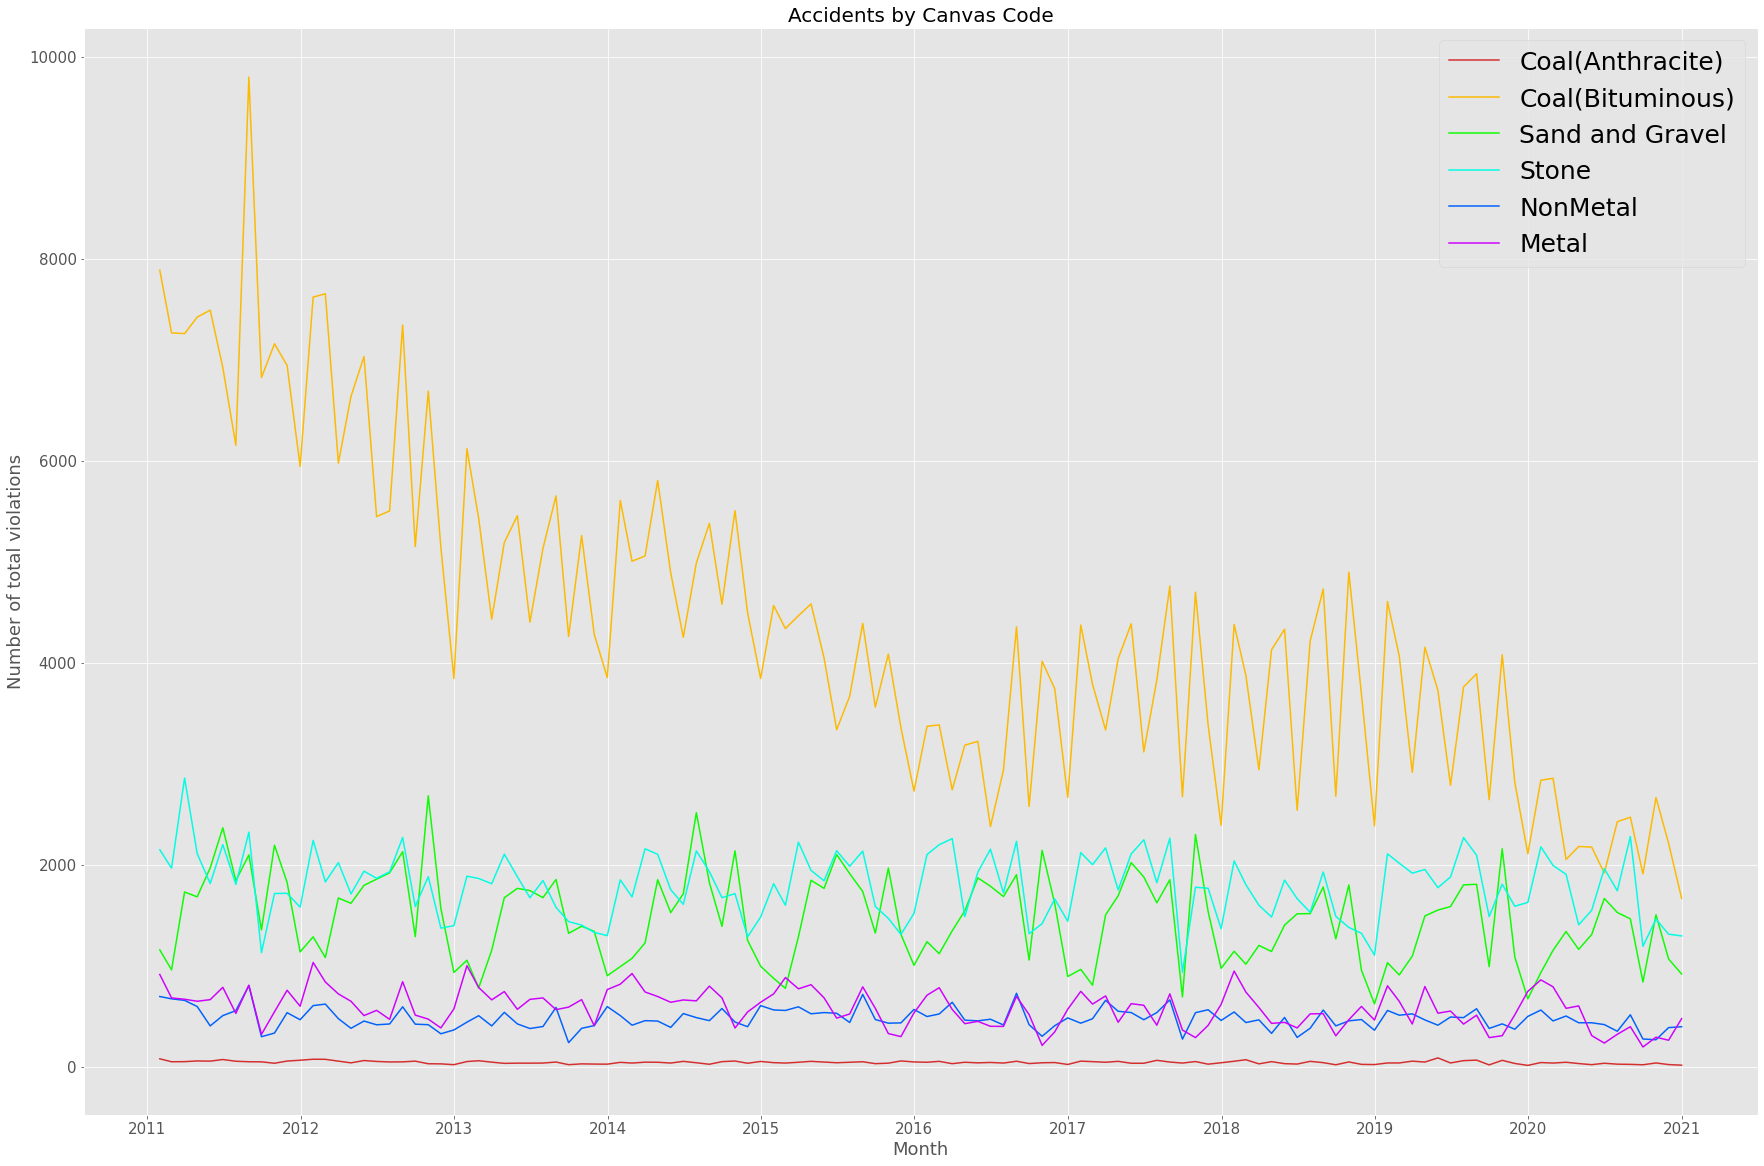

In [ ]:
mines_vio_season = violations_count.copy(deep = False)
canvascode_group = mines_vio_season.groupby(['Violation Date Issued','Primary Canvass Code']).agg({'mine_id': 'count'})
canvas_monthly = canvascode_group.unstack(1).resample('M').sum()

plt.figure(figsize=(30,20))
# plotting each column individually, each column is a line in the graph
# on x axis we have the indices (dates), on y axis we want each column, which are tuples
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 1.0)], color = "#d42f2f")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 2.0)], color = "#fcba03")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 5.0)], color = "#0ffc03")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 6.0)], color = "#03fce3")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 7.0)], color = "#0362fc")
plt.plot(canvas_monthly.index, canvas_monthly[('mine_id', 8.0)], color = "#ce03fc")

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total violations', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [ ]:
canvas_yearly = canvascode_group.unstack(1).resample('Y').sum()

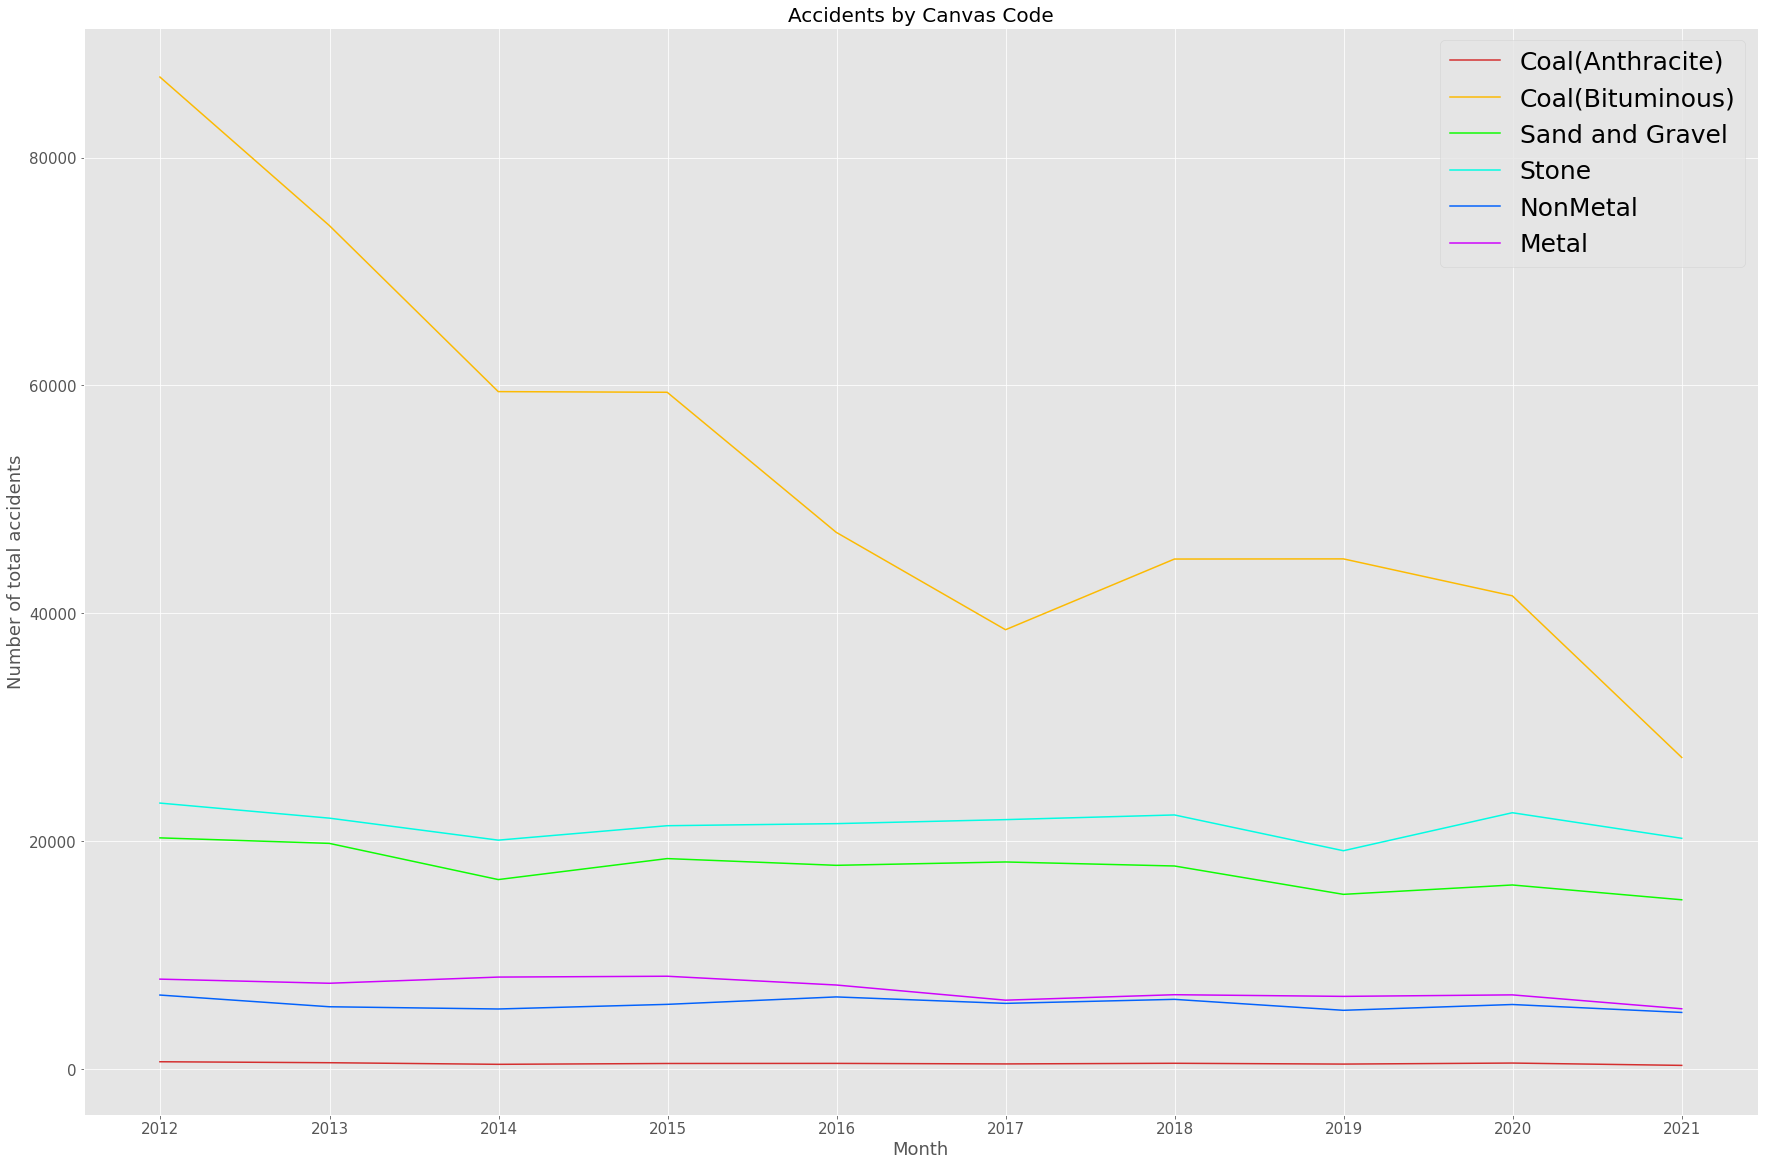

In [ ]:
plt.figure(figsize=(30,20))
# plotting each column individually, each column is a line in the graph
# on x axis we have the indices (dates), on y axis we want each column, which are tuples
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 1.0)], color = "#d42f2f")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 2.0)], color = "#fcba03")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 5.0)], color = "#0ffc03")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 6.0)], color = "#03fce3")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 7.0)], color = "#0362fc")
plt.plot(canvas_yearly.index, canvas_yearly[('mine_id', 8.0)], color = "#ce03fc")

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

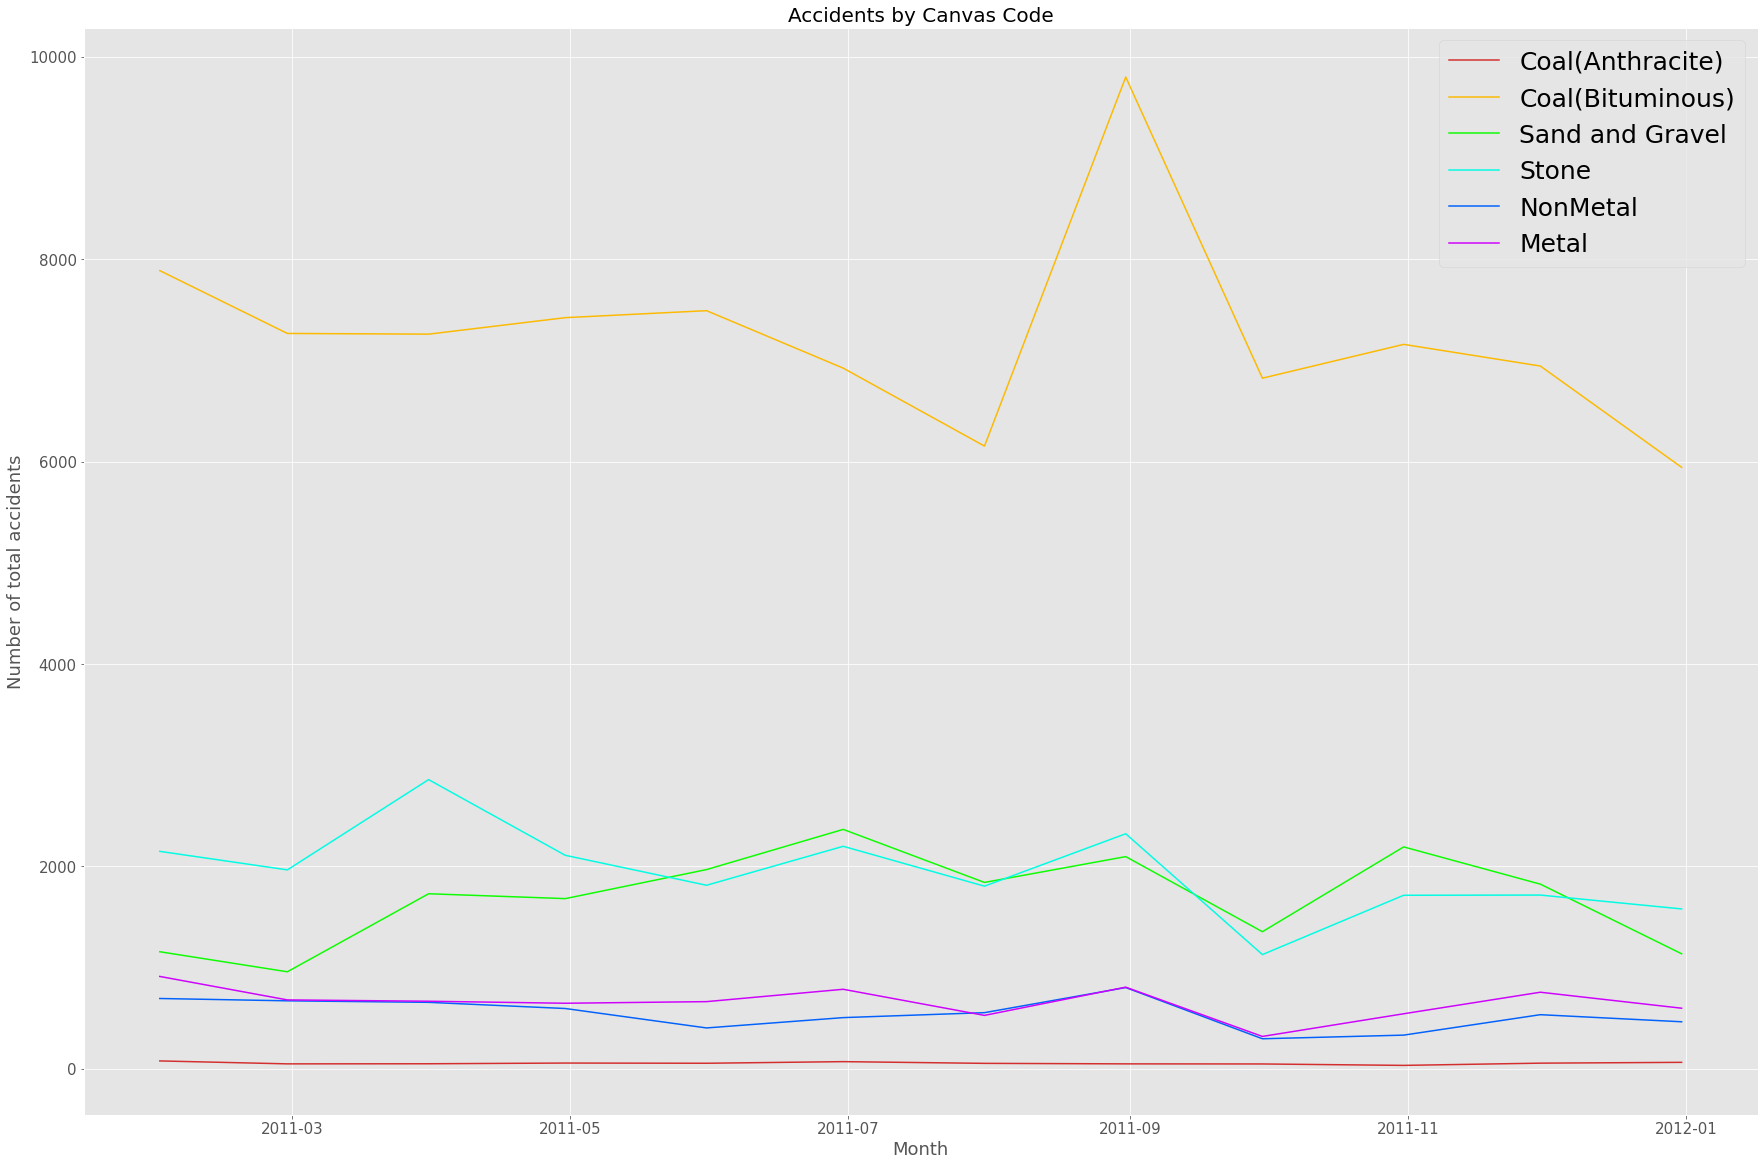

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2011-01-01': '2011-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2011-01-01': '2011-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2011-01-01': '2011-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2011-01-01': '2011-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2011-01-01': '2011-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2011-01-01': '2011-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2011-01-01': '2011-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

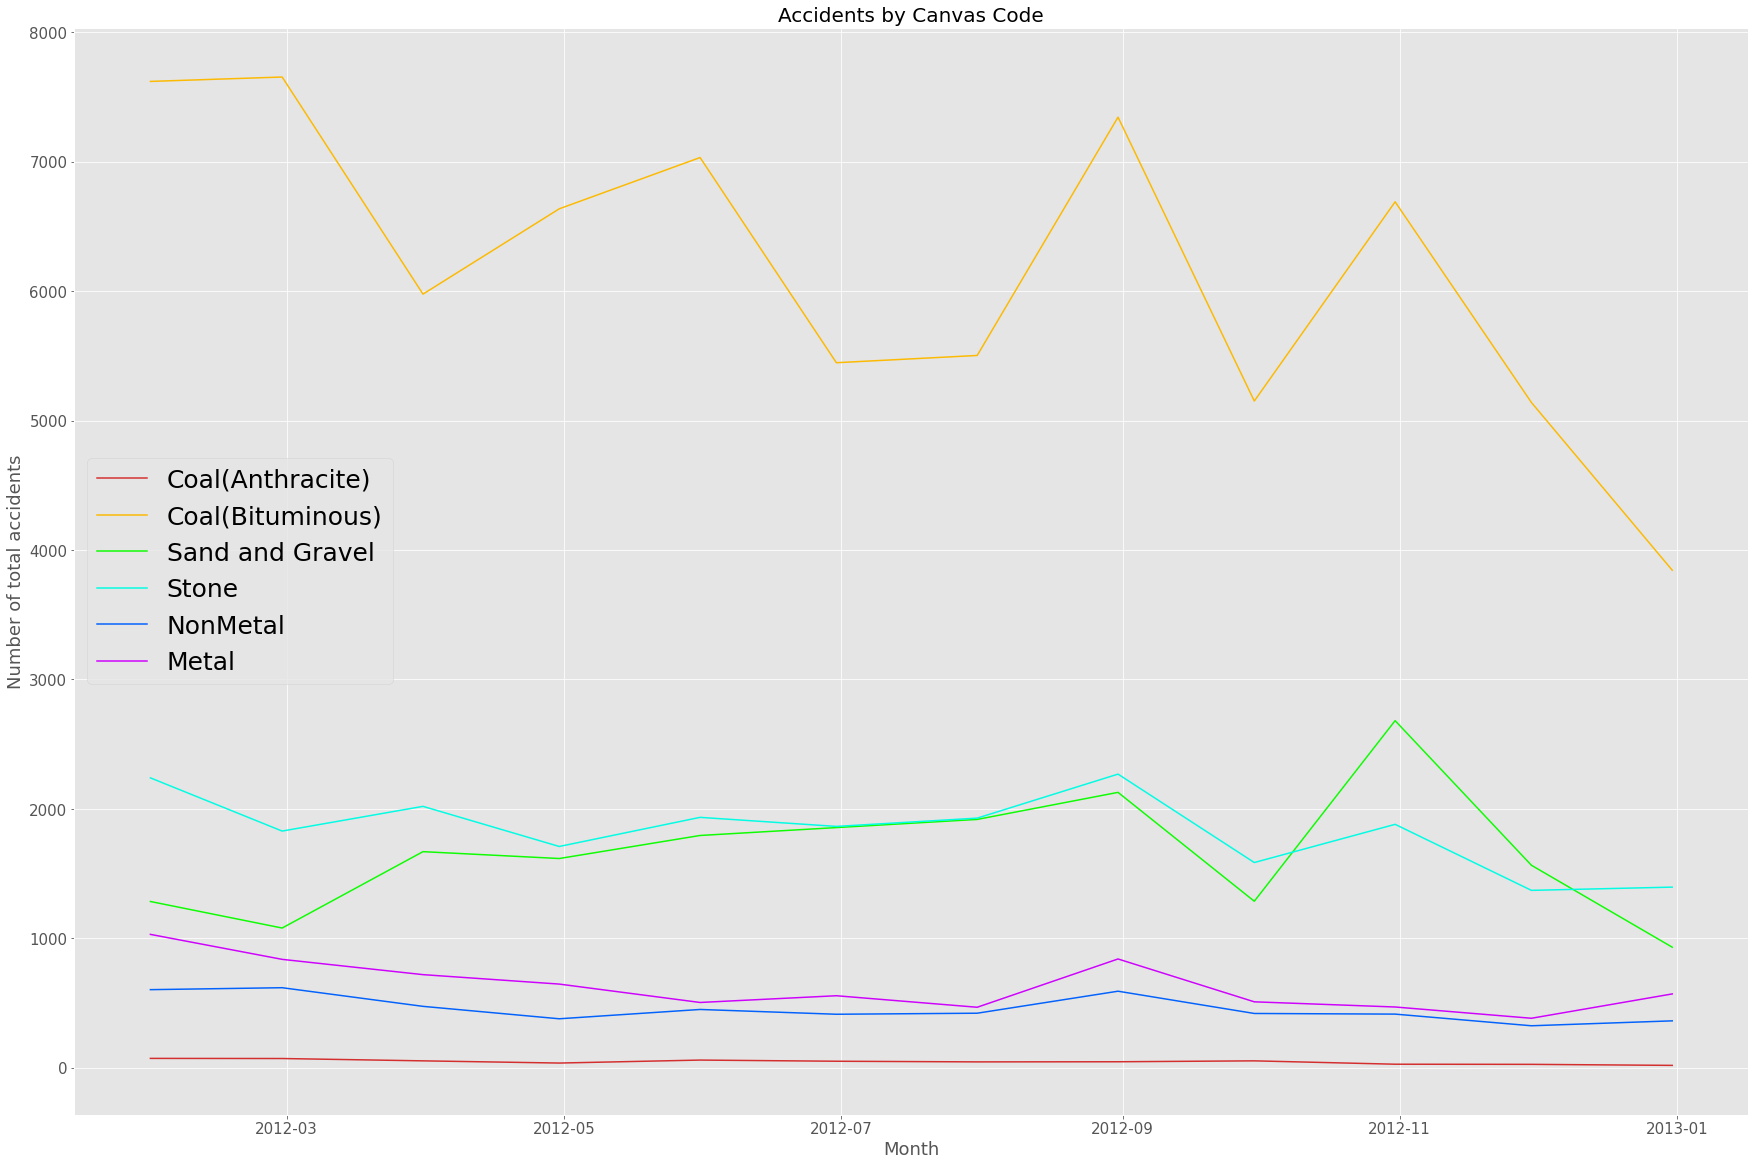

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2012-01-01': '2012-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2012-01-01': '2012-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2012-01-01': '2012-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2012-01-01': '2012-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2012-01-01': '2012-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2012-01-01': '2012-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2012-01-01': '2012-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

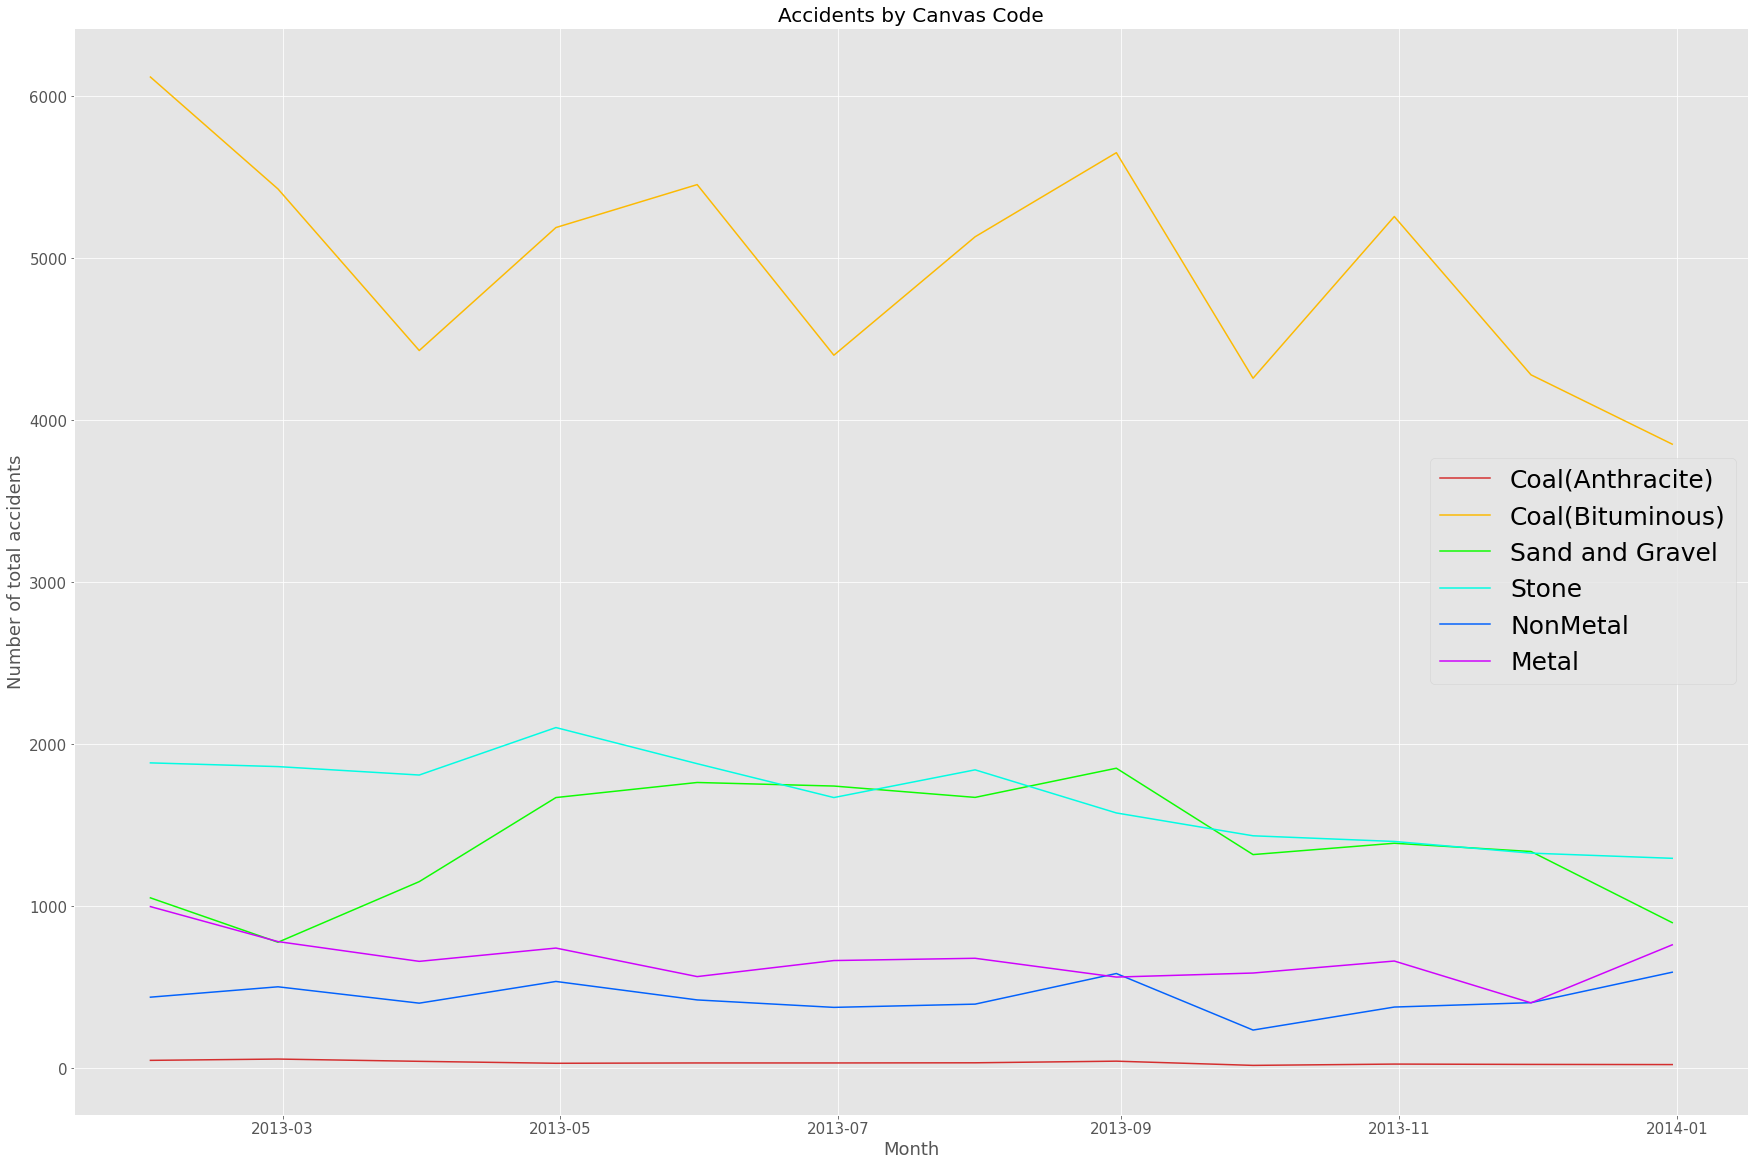

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2013-01-01': '2013-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2013-01-01': '2013-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2013-01-01': '2013-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2013-01-01': '2013-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2013-01-01': '2013-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2013-01-01': '2013-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2013-01-01': '2013-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

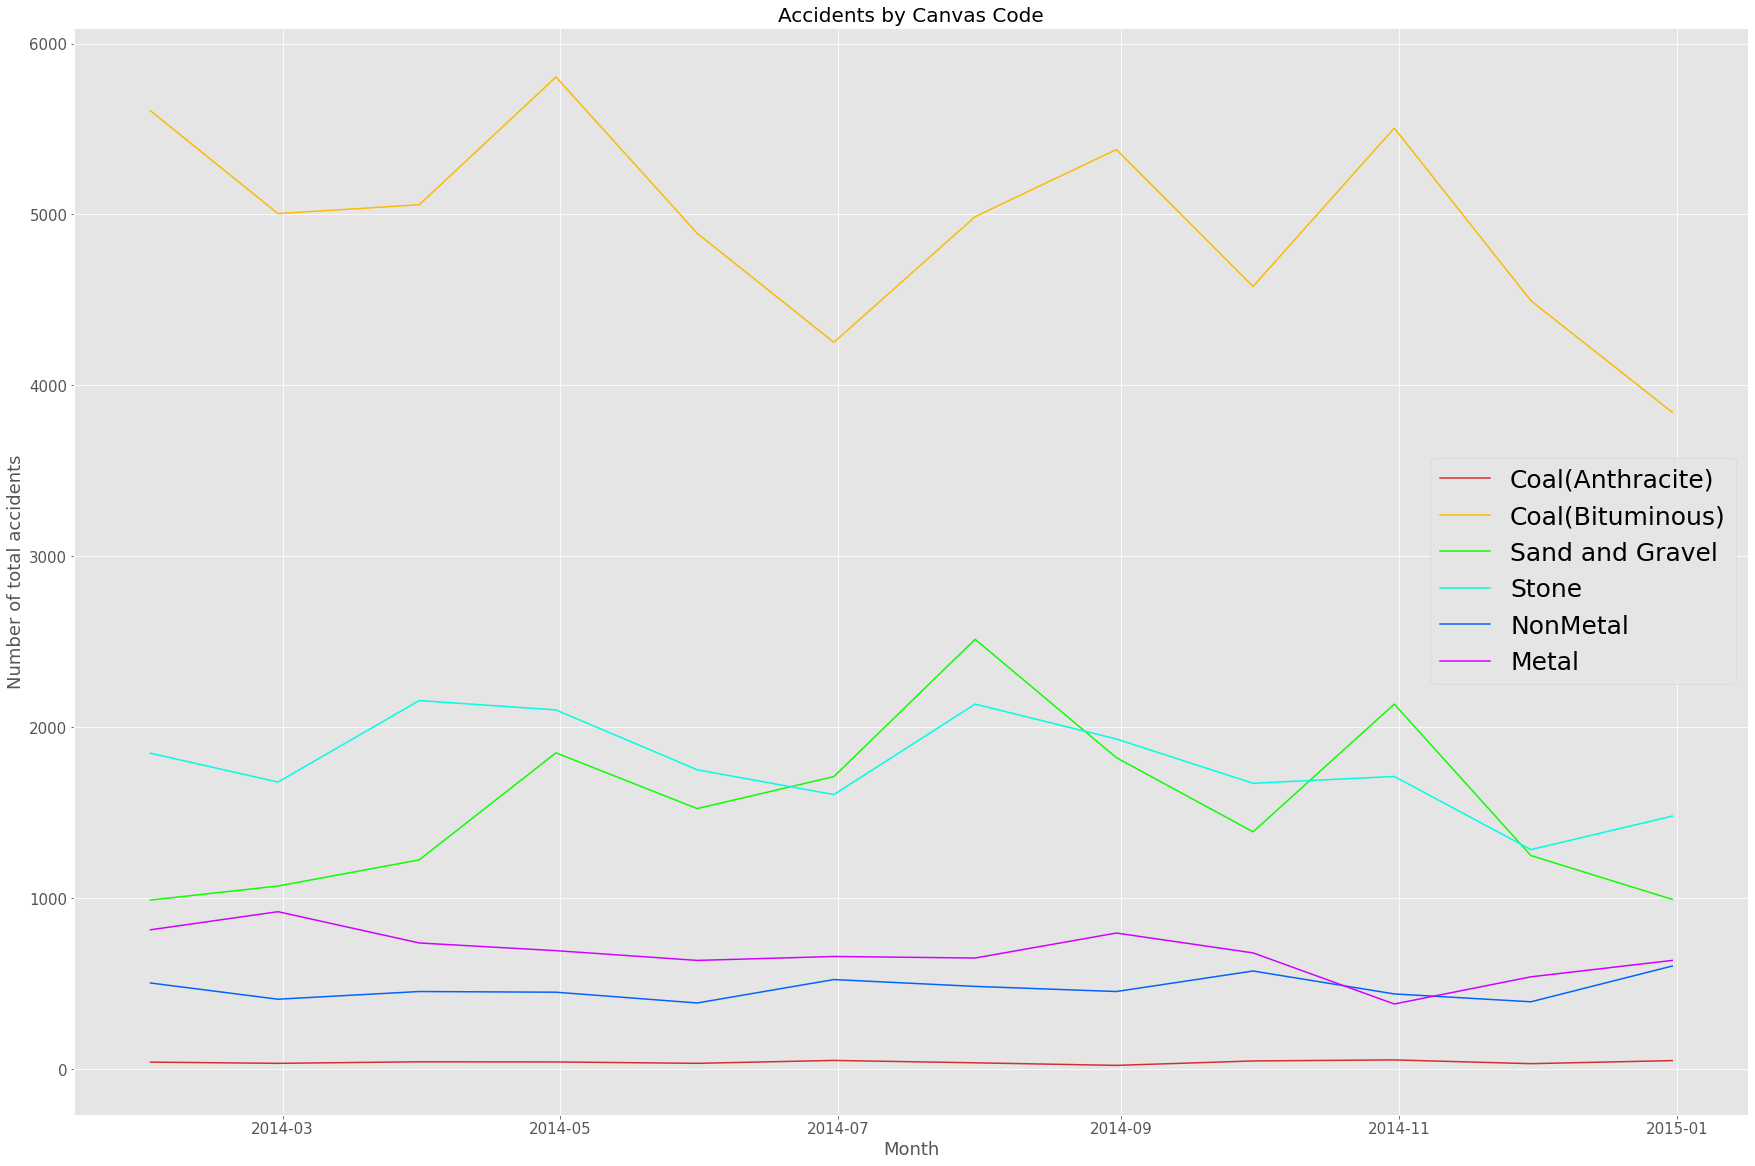

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2014-01-01': '2014-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2014-01-01': '2014-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2014-01-01': '2014-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2014-01-01': '2014-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2014-01-01': '2014-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2014-01-01': '2014-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2014-01-01': '2014-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25, loc = 5) 
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

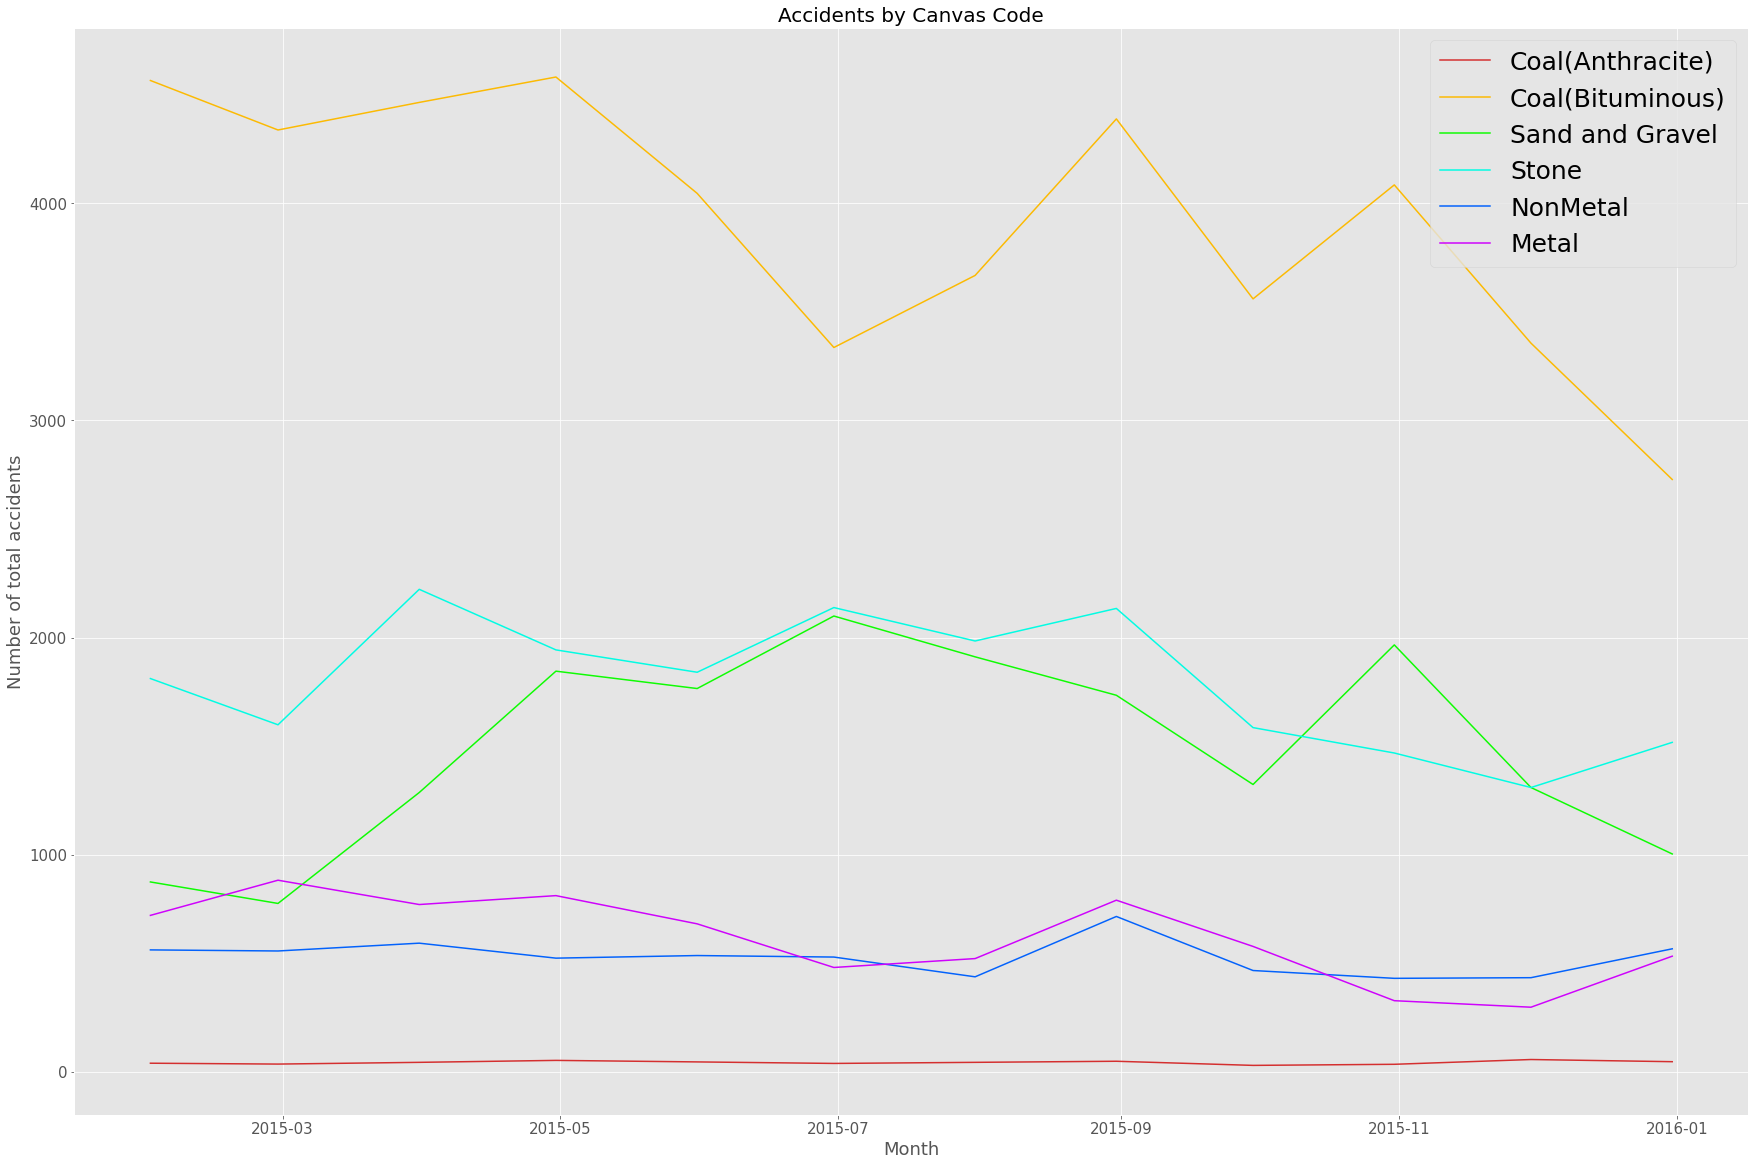

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2015-01-01': '2015-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2015-01-01': '2015-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2015-01-01': '2015-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2015-01-01': '2015-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2015-01-01': '2015-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2015-01-01': '2015-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2015-01-01': '2015-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

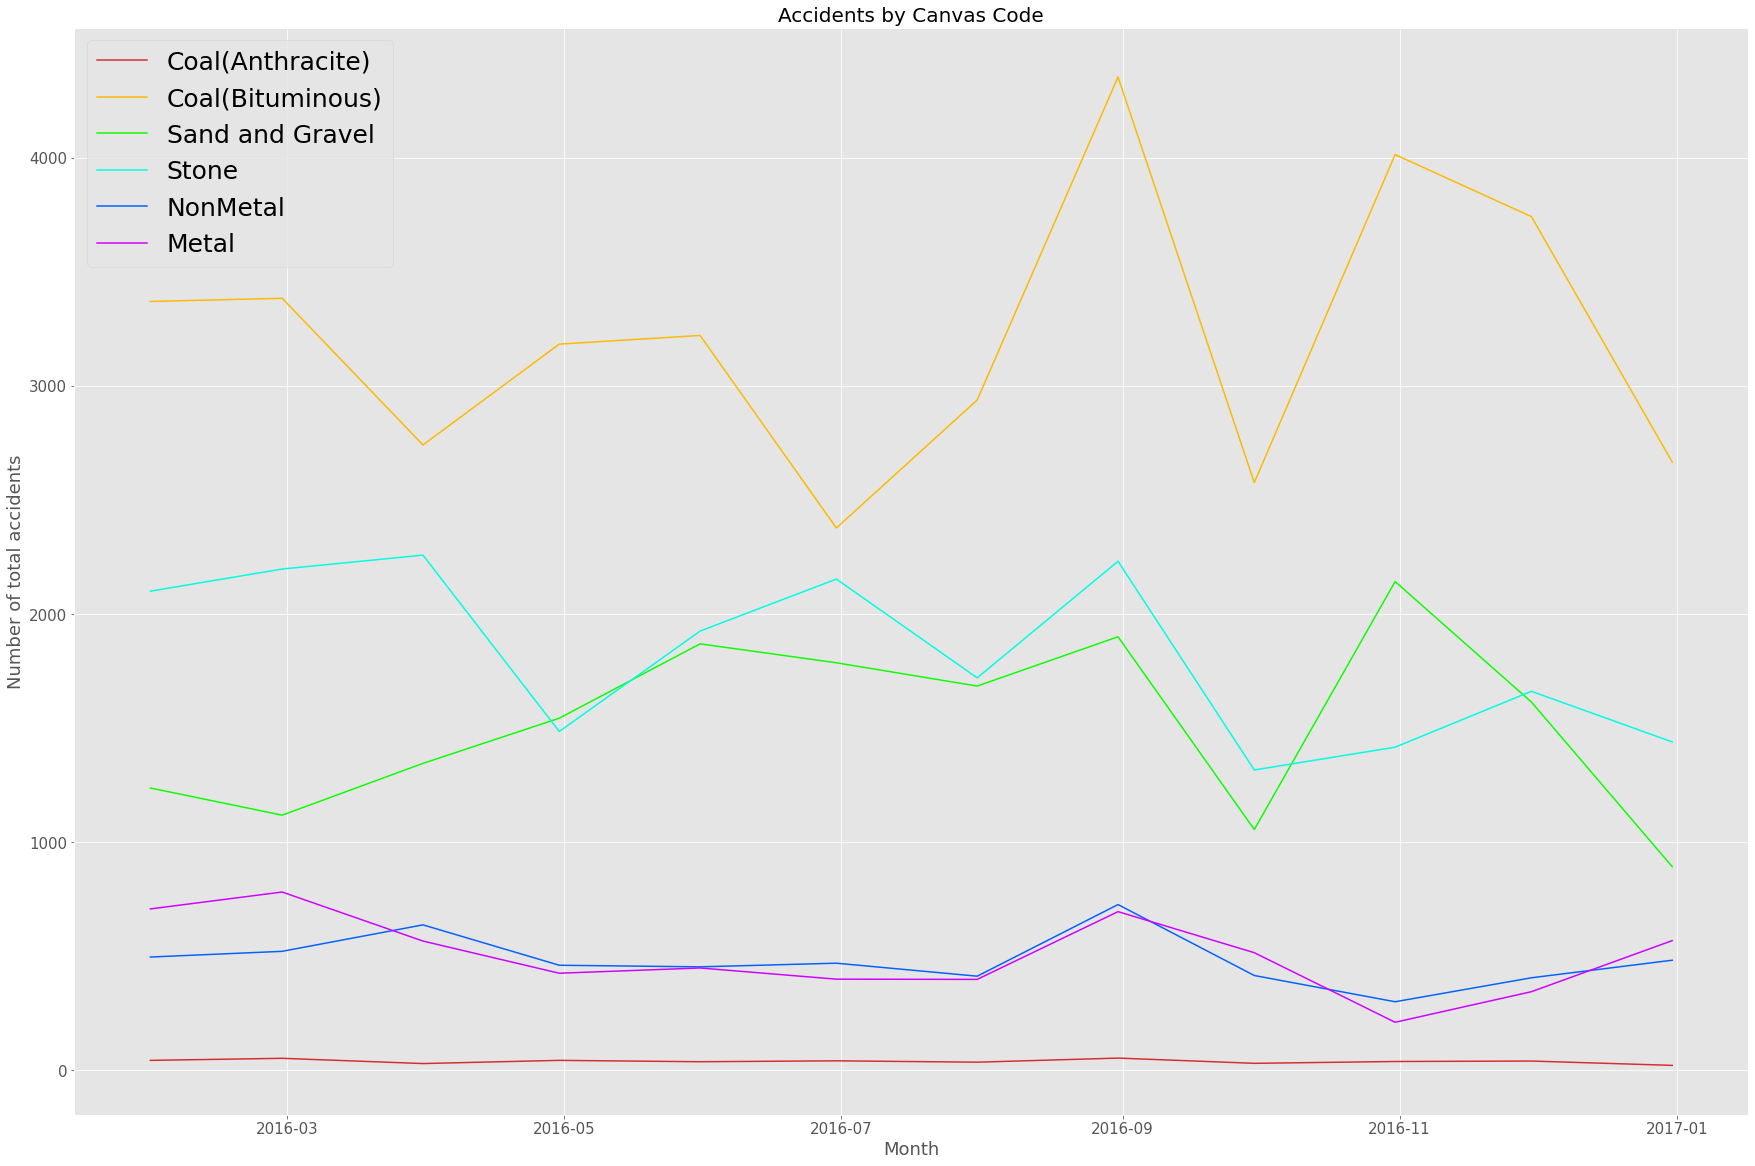

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2016-01-01': '2016-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2016-01-01': '2016-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2016-01-01': '2016-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2016-01-01': '2016-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2016-01-01': '2016-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2016-01-01': '2016-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2016-01-01': '2016-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

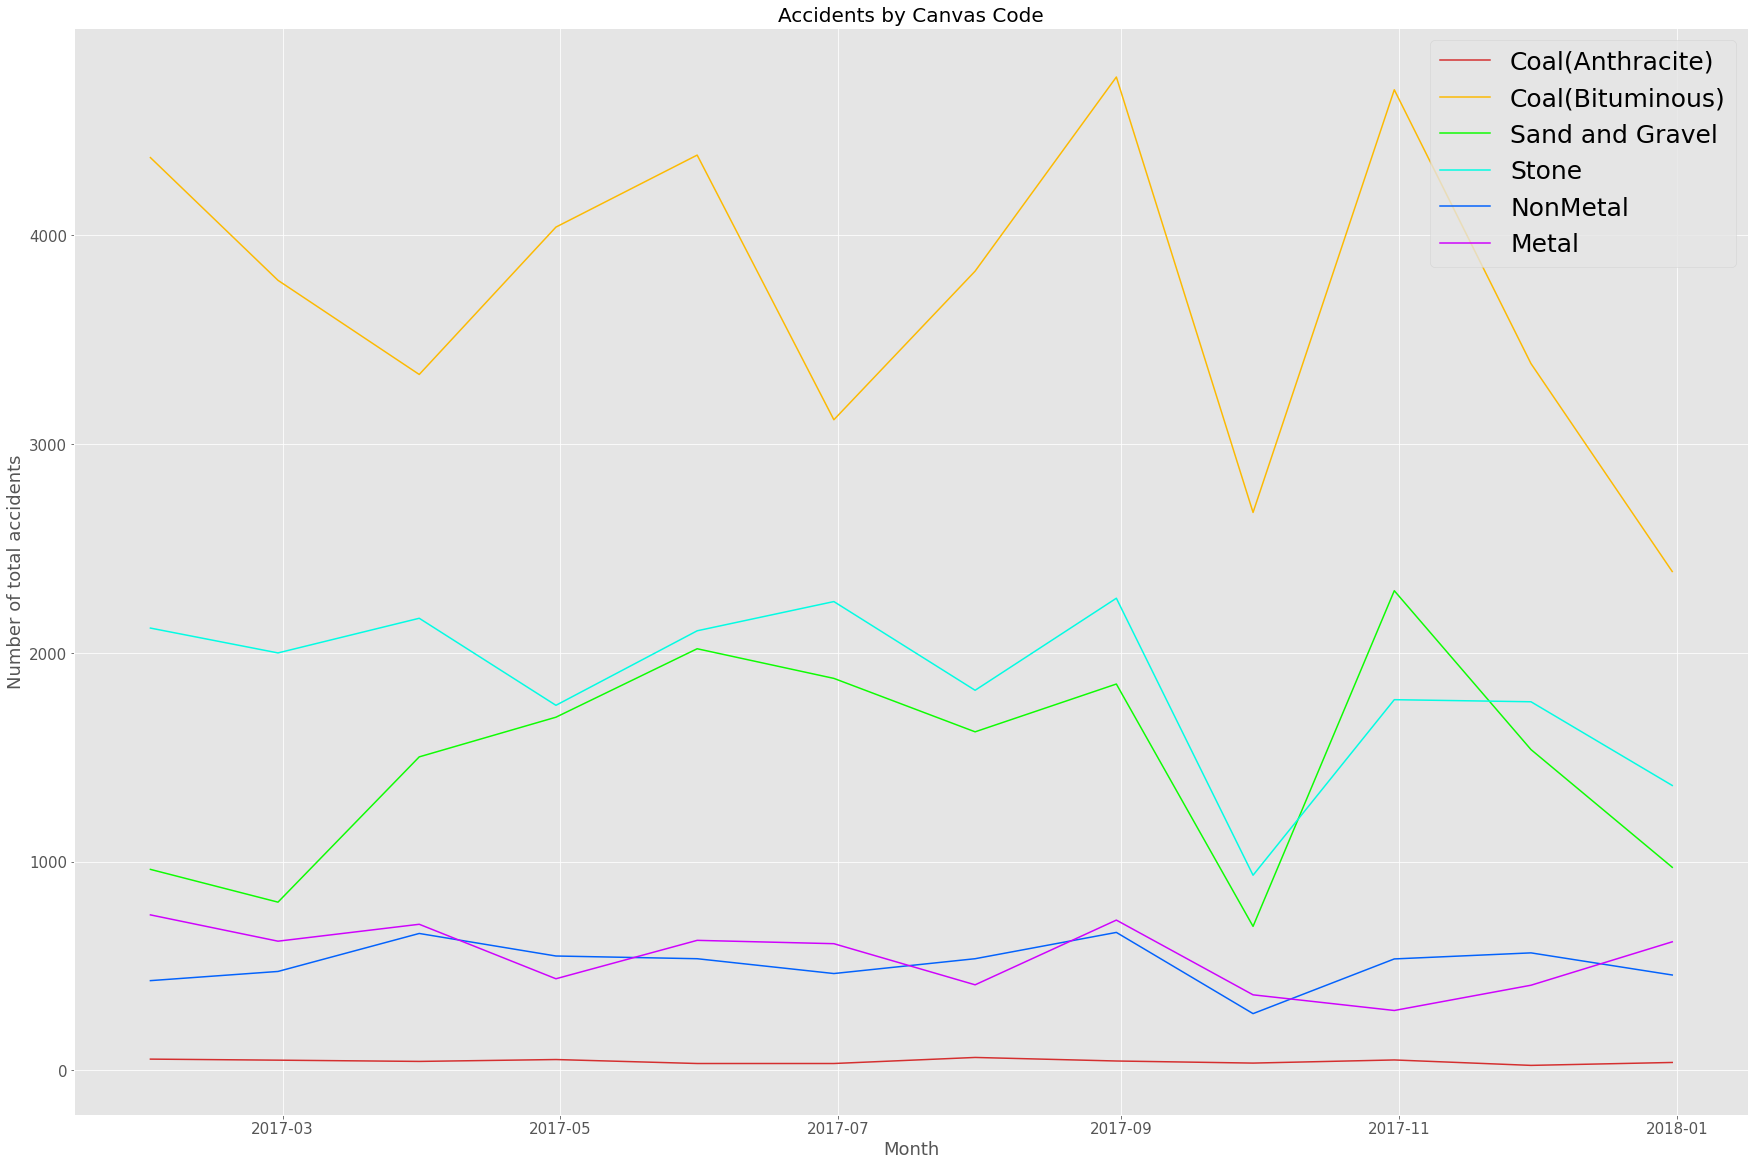

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2017-01-01': '2017-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2017-01-01': '2017-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2017-01-01': '2017-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2017-01-01': '2017-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2017-01-01': '2017-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2017-01-01': '2017-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2017-01-01': '2017-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

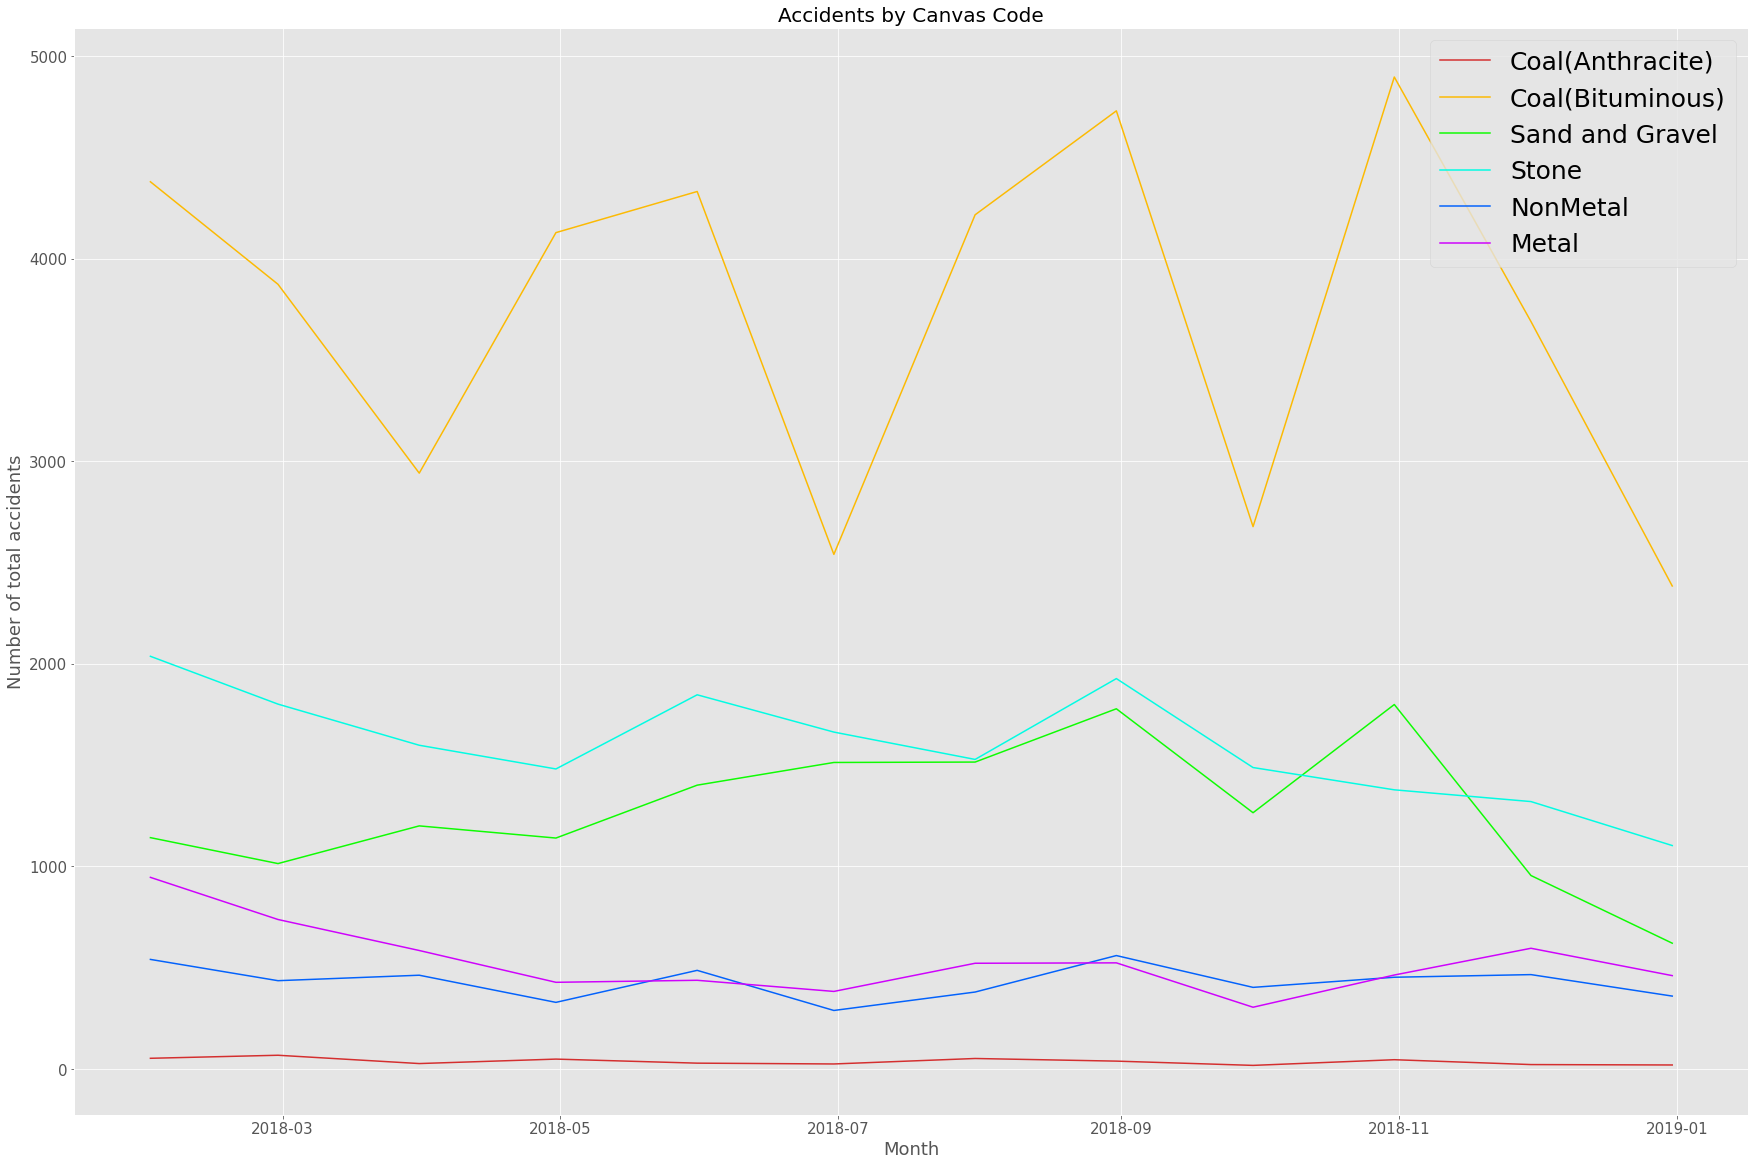

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2018-01-01': '2018-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2018-01-01': '2018-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2018-01-01': '2018-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2018-01-01': '2018-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2018-01-01': '2018-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2018-01-01': '2018-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2018-01-01': '2018-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

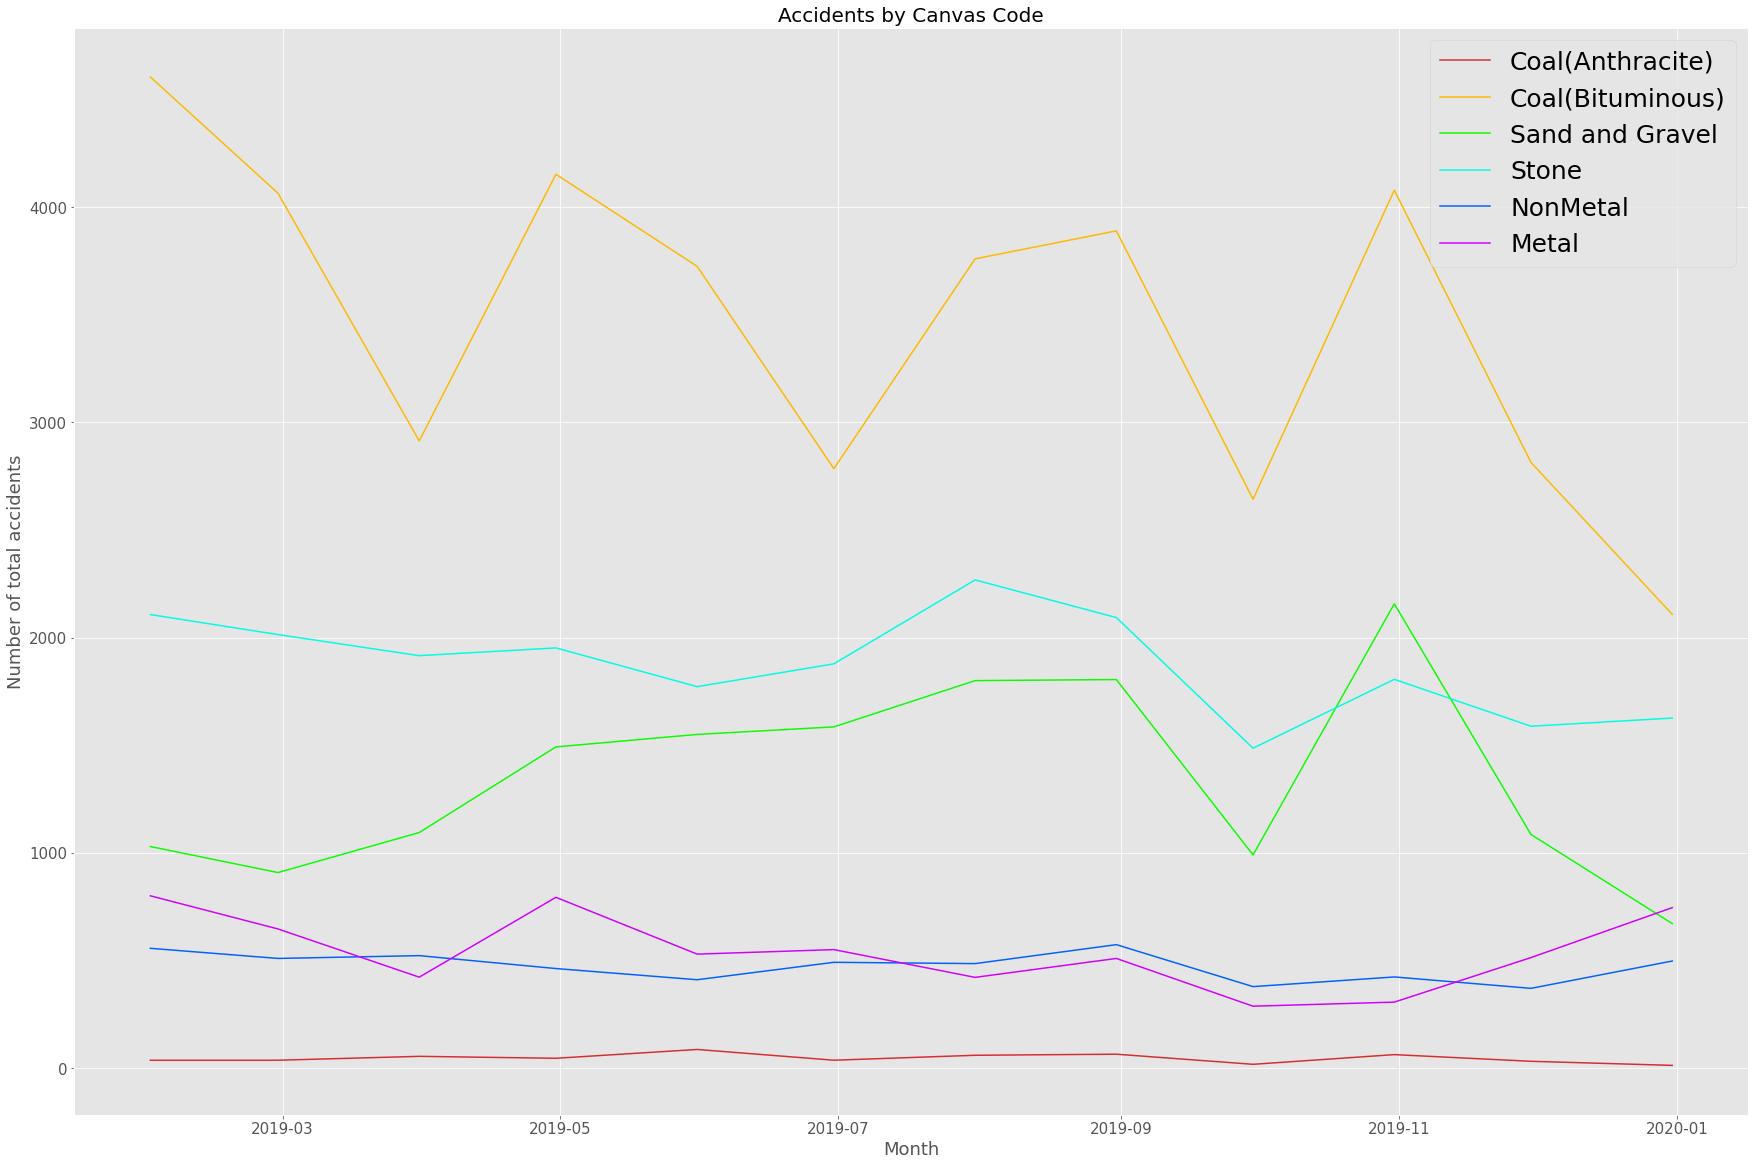

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2019-01-01': '2019-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2019-01-01': '2019-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2019-01-01': '2019-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2019-01-01': '2019-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2019-01-01': '2019-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2019-01-01': '2019-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2019-01-01': '2019-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

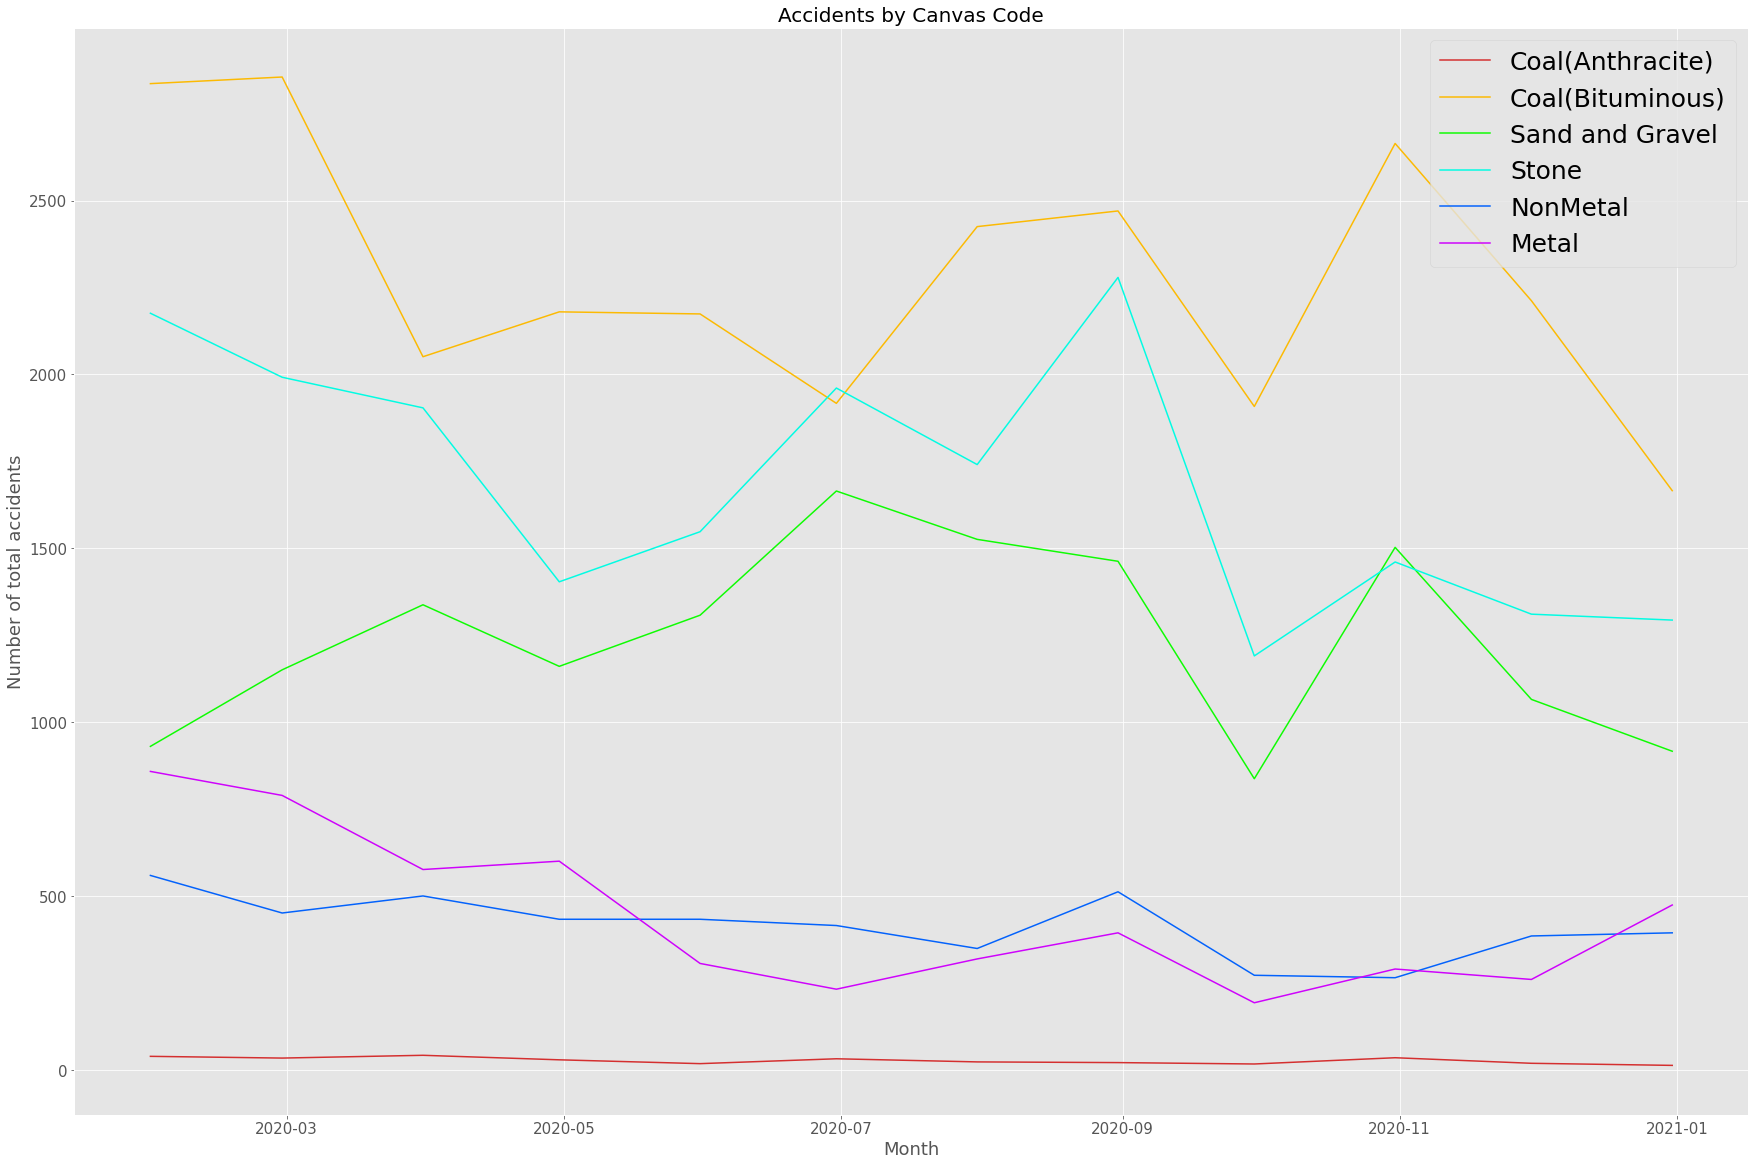

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 1.0)].loc['2020-01-01': '2020-12-31'], color = "#d42f2f")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 2.0)].loc['2020-01-01': '2020-12-31'], color = "#fcba03")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 5.0)].loc['2020-01-01': '2020-12-31'], color = "#0ffc03")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 6.0)].loc['2020-01-01': '2020-12-31'], color = "#03fce3")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 7.0)].loc['2020-01-01': '2020-12-31'], color = "#0362fc")
plt.plot(canvas_monthly.loc['2020-01-01': '2020-12-31'].index, canvas_monthly[('mine_id', 8.0)].loc['2020-01-01': '2020-12-31'], color = "#ce03fc")

#plt.yscale('log')

plt.xlabel('Month', size = 18)
plt.ylabel('Number of total accidents', size = 18)
plt.title('Accidents by Canvas Code', size = 20)
plt.legend(['Coal(Anthracite)', 'Coal(Bituminous)', 'Sand and Gravel', 'Stone', 'NonMetal', 'Metal'], fontsize = 25) #change name to the actual type
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Most negligent operators

In [ ]:
# function that assigns a value 1 if the negligence type was HighNegligence, otherwise 0
def negligence_type_high(row):
  if (row['Negligence'] == 'HighNegligence'):
    return 1
    
  else:
    return 0

# function that assigns a value 1 if the negligence type was Reckless
def negligence_type_reckless(row):
  if (row['Negligence'] == 'Reckless'):
    return 1
    
  else:
    return 0
  

temp = violations.copy(deep = False)
temp['HighNegligence'] = 0
temp['Reckless'] = 0
# Populate a new column called Reckless with 1 if it was a reckless violation, otherwise 0
temp['Reckless'] = temp.apply(lambda row: negligence_type_reckless(row), axis =1)
# same with highnegligence
temp['HighNegligence'] = temp.apply(lambda row: negligence_type_high(row), axis =1)

# temp.head(20)

In [ ]:
temp[['Negligence','HighNegligence','Reckless']].loc[(temp['Negligence'] == 'Reckless')]

Negligence  HighNegligence  Reckless
525       Reckless               0         1
528       Reckless               0         1
533       Reckless               0         1
538       Reckless               0         1
539       Reckless               0         1
...            ...             ...       ...
1026821   Reckless               0         1
1026822   Reckless               0         1
1029401   Reckless               0         1
1029402   Reckless               0         1
1029403   Reckless               0         1

[597 rows x 3 columns]

In [ ]:
# total number of reckless and gihnegligence violations per operator
temp_high_recl = temp.groupby('Operator ID (Violations)').agg({'HighNegligence':'sum','Reckless':'sum'})

# sum of reckless + highnegligence violations per operator
temp_high_recl["Total High Negligence"] =  temp_high_recl["HighNegligence"] + temp_high_recl["Reckless"]
temp_high_recl.sort_values(by=['Reckless','HighNegligence','Total High Negligence'], ascending = False)

HighNegligence  Reckless  Total High Negligence
Operator ID (Violations)                                                 
P22901                               321        44                    365
0120050                               76        19                     95
L16061                                20        18                     38
P14483                                38        16                     54
0055156                               44        12                     56
...                                  ...       ...                    ...
P24682                                 0         0                      0
P24710                                 0         0                      0
P24712                                 0         0                      0
P24729                                 0         0                      0
P24734                                 0         0                      0

[11833 rows x 3 columns]

P22901 has been very reckless and negligent

In [ ]:
temp_high_recl.loc['P23854']

HighNegligence           766
Reckless                   0
Total High Negligence    766
Name: P23854, dtype: int64

In [ ]:
reckless_operators = violations.copy(deep = False)
reckless_operators = reckless_operators[ (reckless_operators['Negligence'] == 'HighNegligence') | (reckless_operators['Negligence'] == 'Reckless')]
reckless_operators['Operator ID (Violations)'].value_counts()
# reckless_operators.head()

P23854     766
0100767    677
P00812     570
0079344    560
L18185     416
          ... 
0110805      1
0151693      1
0061643      1
0157793      1
0150553      1
Name: Operator ID (Violations), Length: 7127, dtype: int64

Although P23854 has never had a reckless violation, they have had the most number of violations due to high negligence 

### Fatal and Permanent violations by operators

In [ ]:
# same as that of negligence but for injury
def inj_type_fatal(row):
  if (row['Injury or Illness'] == 'Fatal'):
    return 1
    
  else:
    return 0

def inj_type_permanent(row):
  if (row['Injury or Illness'] == 'Permanent'):
    return 1
    
  else:
    return 0
  

temp = violations.copy(deep = False)
temp = temp[ (temp['Injury or Illness'] == 'Fatal') | (temp['Injury or Illness'] == 'Permanent')]
temp['Fatal'] = 0
temp['Permanent'] = 0
temp['Fatal'] = temp.apply(lambda row: inj_type_fatal(row), axis =1)
temp['Permanent'] = temp.apply(lambda row: inj_type_permanent(row), axis =1)

In [ ]:
temp_high_inj = temp.groupby('Operator ID (Violations)').agg({'Fatal':'sum','Permanent':'sum'})
temp_high_inj["Total High Injuries"] =  temp_high_inj["Fatal"] + temp_high_inj["Permanent"]
temp_high_inj.sort_values(by=['Fatal','Permanent','Total High Injuries'], ascending = False)

Fatal  Permanent  Total High Injuries
Operator ID (Violations)                                       
P22603                     3086       3261                 6347
P00812                     1967        782                 2749
L16197                     1456        858                 2314
P09635                     1293        850                 2143
P23860                     1221       1296                 2517
...                         ...        ...                  ...
P23801                        0          1                    1
P24424                        0          1                    1
P24605                        0          1                    1
P24636                        0          1                    1
P24697                        0          1                    1

[10368 rows x 3 columns]

In [ ]:
temp_high_inj.sort_values(by=['Total High Injuries'], ascending = False)

Fatal  Permanent  Total High Injuries
Operator ID (Violations)                                       
P22603                     3086       3261                 6347
P00812                     1967        782                 2749
P23860                     1221       1296                 2517
0100767                    1108       1289                 2397
P23835                      999       1358                 2357
...                         ...        ...                  ...
0115885                       1          0                    1
0157314                       0          1                    1
0116105                       0          1                    1
0157413                       0          1                    1
0089447                       1          0                    1

[10368 rows x 3 columns]

P22603 has the most number of severe violations along with the highest number of 'Fatal' and 'Permanent' injuries.

### Correlation btw days of inspections vs violations by operators.

In [ ]:
# Number of inspections/survey/audit/investigation per mine
inspections = violations.groupby('mine_id').agg({'Event No.':'count'})
inspections.sort_values(by='Event No.', ascending=False)

Event No.
mine_id           
4601433       7843
4601437       7583
4601968       5802
4601318       5782
4601436       5192
...            ...
300136           1
3609473          1
3609452          1
3609410          1
3101182          1

[19014 rows x 1 columns]

### Correlation btw accidents and violations

In [ ]:
accidents_in_mine = mines_accident.groupby('mine_id').agg({'Document No.':'count'}) 
accidents_in_mine.rename(columns={'Document No.':'Accidents'}, inplace=True)

violations_in_mine = mines_violations.copy(deep = False)
# filtering out the columns in which likelihood is occured 
violations_in_mine = violations_in_mine[violations_in_mine['Likelihood'] != 'Occurred']
violations_in_mine = violations_in_mine.groupby('mine_id').agg({'Violation No.':'count'}) 
violations_in_mine.rename(columns={'Violation No.':'Violations'}, inplace=True)
violations_in_mine.shape

(19013, 1)

In [ ]:
# number of accidents in each mien
accidents_in_mine

Accidents
mine_id           
100003          64
100004           4
100006           1
100008          22
100009           4
...            ...
5400481          3
5500002          8
5500008          5
6600018          1
6900001          1

[6733 rows x 1 columns]

In [ ]:
# total number of accidents and violations in each mine
acci_vio_in_mine = accidents_in_mine.join(violations_in_mine, how='inner')
acci_vio_in_mine

Accidents  Violations
mine_id                       
100003          64         303
100004           4          80
100006           1          24
100008          22         113
100009           4          25
...            ...         ...
5400451          1          33
5400460          3          74
5400481          3          11
5500002          8          63
5500008          5          79

[6673 rows x 2 columns]

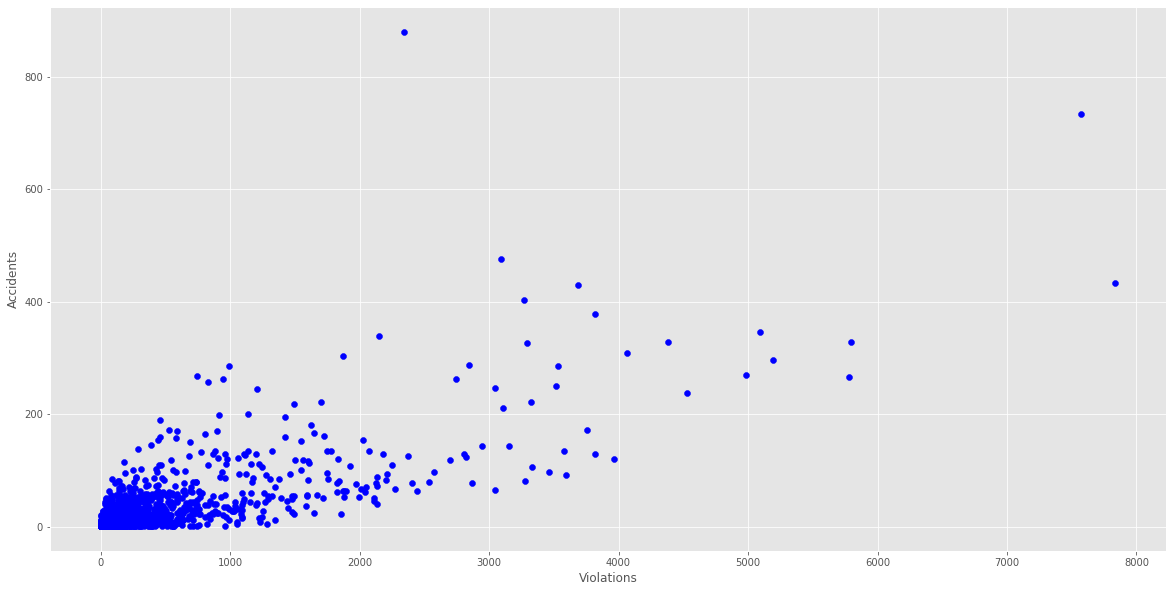

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(acci_vio_in_mine['Violations'],acci_vio_in_mine['Accidents'], color='b')
plt.xlabel('Violations')
plt.ylabel('Accidents')
plt.show()

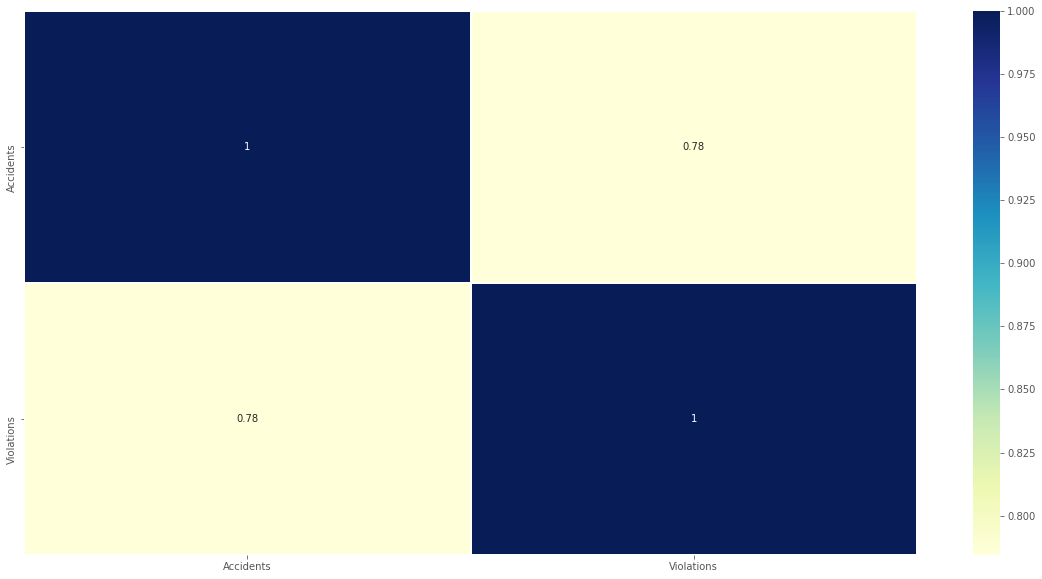

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(acci_vio_in_mine[['Accidents','Violations']].corr(),annot=True, cmap='YlGnBu',linewidths=1)

In [ ]:
# creating the test set for testing the accuracy of our model. Taking only those instances where accidents is empty and we only have violations
# So we will feed these violations into our model and it will give us the expected number of accidents correspondng to number of violaitons
left_join = violations_in_mine.join(accidents_in_mine, how='left')
left_join.fillna('a', inplace=True)
left_join = left_join[left_join['Accidents'] == 'a']
test_violations = left_join.Violations.values.reshape(-1,1)
test_violations


array([[10],
       [32],
       [13],
       ...,
       [16],
       [15],
       [78]])

In [ ]:
# Creating our feature set, which will consist of all the violations. It will be an array object
X = acci_vio_in_mine['Violations'].values.reshape(-1,1)
# creating our target consisting of all the accidents
y = acci_vio_in_mine['Accidents'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
# spliting up our data into train and validation set. validation set size is 10% or 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model to the train set
lr.fit(X_train, y_train)
# check score on the test set
lr.score(X_test, y_test)

0.672557558791559

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# instantiate, fit, score..
rfc = RandomForestRegressor(n_estimators=10000, criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=1)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.5765685476009279

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.39666407561098094

In [ ]:
# we can now use the best model to predict on the test set- a data set that the model has never seen before
print(lr.predict(test_violations))
print('\n')
print(test_violations)

[[2.80746054]
 [4.17979183]
 [2.99459662]
 ...
 [3.18173271]
 [3.11935401]
 [7.04921182]]


[[10]
 [32]
 [13]
 ...
 [16]
 [15]
 [78]]


### Same as above but instead of mine, doing it for operators

In [ ]:
violations.columns

Index(['Violation No.', 'Violation Date Issued',
       'Calendar Year Qtr (Violations)', 'mine_id',
       'Controller ID @ Violations', 'Operator ID (Violations)', 'Event No.',
       '30 CFR', 'AR No.', 'Flagrant Indicator', 'Health, Safety or Other',
       'Injury or Illness', 'Likelihood', 'Negligence', 'Section of Act',
       'Significant and Substantial (Violations)', 'Termination Date',
       'Termination Type', 'Type Action 1', 'Type of Issuance'],
      dtype='object')

In [ ]:
accidents_op = mines_accident.groupby('Operator ID @ Accidents').agg({'mine_id':'count','Total Experience':'mean','Mine Experience':'mean'}) 
accidents_op.rename(columns={'mine_id':'Accidents'}, inplace=True)

violations_op = mines_violations.copy(deep = False)
violations_op = violations_op[violations_op['Likelihood'] != 'Occurred']
violations_op = violations_op.groupby('Operator ID (Violations)').agg({'mine_id':'count'}) 
violations_op.rename(columns={'mine_id':'Violations'}, inplace=True)

acci_vio_op = accidents_op.join(violations_op, how='inner')
acci_vio_op.fillna(0, inplace=True)
acci_vio_op.head()

Accidents  Total Experience  Mine Experience  Violations
0050016          9          3.395556         1.051111         133
0050046          8          4.767500         1.538750         263
0050049         17         13.673125         1.340588        1733
0050101          2         21.500000         0.575000         194
0050134         33         15.475152        10.163939         155

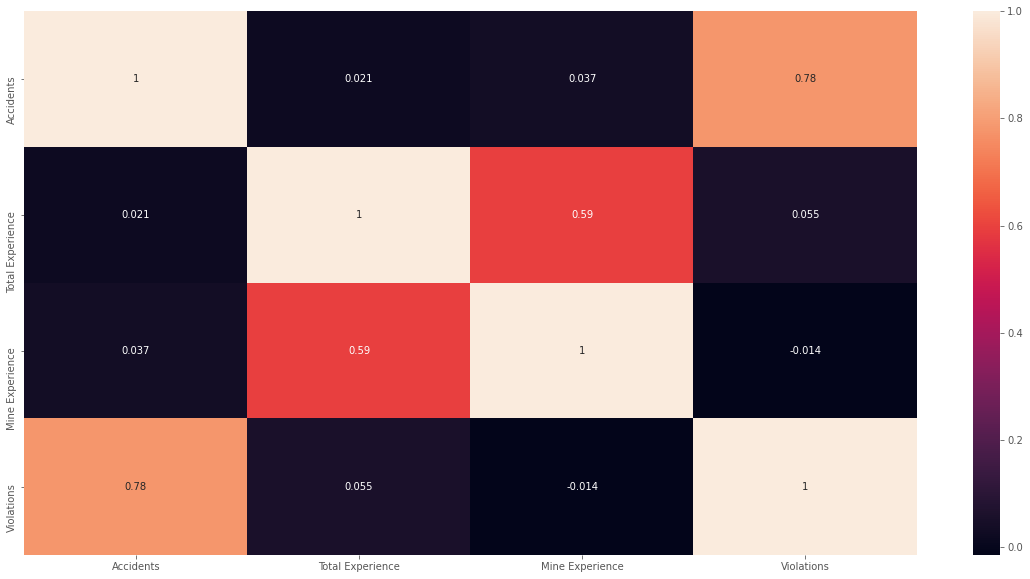

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(acci_vio_op.corr(), annot=True)

Predicting accidents with only violations

In [ ]:
X = acci_vio_op['Violations'].values.reshape(-1,1)
y = acci_vio_op['Accidents'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.07893060899831394

In [ ]:
rfc = RandomForestRegressor(n_estimators=10000, criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=1)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.42607259837330863

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4139955650240187

Using violations, mine exp and total exp as features

In [ ]:
X = acci_vio_op.drop(['Accidents'], axis=1).values
y = acci_vio_op['Accidents'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)*100

58.96019727372377

In [ ]:
rfc = RandomForestRegressor(n_estimators=10000, criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=1)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)*100

73.11768009351647

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)*100

41.86099883735716

Accuracy has increased after adding new features. So we use all three features

In [ ]:
# X = acci_vio_op['Violations'].values.reshape(-1,1)
# y = acci_vio_op['Accidents'].values.reshape(-1,1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

10-fold cross validation

In [ ]:

rfc = RandomForestRegressor(n_estimators=10000, criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=1)
score = cross_val_score(rfc, X, y, cv=10)
print(sum(score)/10)

0.6730322350817396


In [ ]:
lr = LinearRegression()
score = cross_val_score(lr, X, y, cv=10)
print(sum(score)/10)

0.5829581319761581


Grid Search CV

In [ ]:
# giving each parameter of the model some specific values. The best combination of hyperparameters will be returned
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


rf = RandomForestRegressor()


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X,y)



Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 21.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
print("Best Estimator")
print(grid_search.best_estimator_)
print()
print("Best Score")
grid_search.best_score_
print()
print("Score on test set")
print(grid_search.score(X_test, y_test)*100)

Best Estimator
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Best Score

Score on test set
84.0958717930488


### Correlation between accidents and violations in the previous year for mines

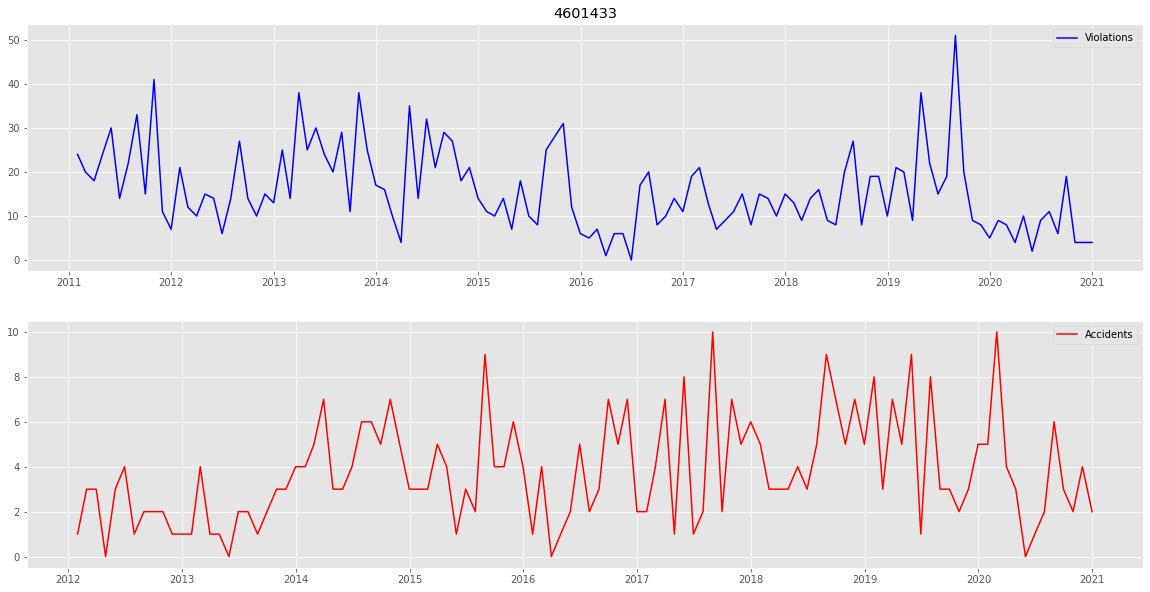

In [ ]:
mine_in_interest = 4601433

accident_mines = accident_count.copy(deep =False )
accident_mines = accident_mines[accident_mines['mine_id'] == mine_in_interest]
accident_mines = pd.DataFrame(accident_mines.groupby(['Accident Date (Accidents)'])['Document No.'].count())
accident_mines = accident_mines.resample('M').sum()
accident_mines.rename(columns={'Document No.':'Accidents'}, inplace=True)

violations_mines = violations_count.copy(deep =False )
violations_mines = violations_mines[(violations_mines['Likelihood'] == 'Highly') | (violations_mines['Likelihood'] == 'Reasonably')]
violations_mines = violations_mines[violations_mines['mine_id'] == mine_in_interest]
violations_mines = pd.DataFrame(violations_mines.groupby(['Violation Date Issued'])['mine_id'].count())
violations_mines = violations_mines.resample('M').sum()
violations_mines.rename(columns={'mine_id':'Violations'}, inplace=True)

f= plt.figure(figsize=(20,10))
ax = f.add_subplot(211)
ax2 = f.add_subplot(212)


ax.plot(violations_mines.index, violations_mines.Violations, color='b', label='Violations')
ax2.plot(accident_mines.index[12:], accident_mines.Accidents.values[12:], color='r', label='Accidents')
ax.legend()
ax.set_title(mine_in_interest)
ax2.legend()

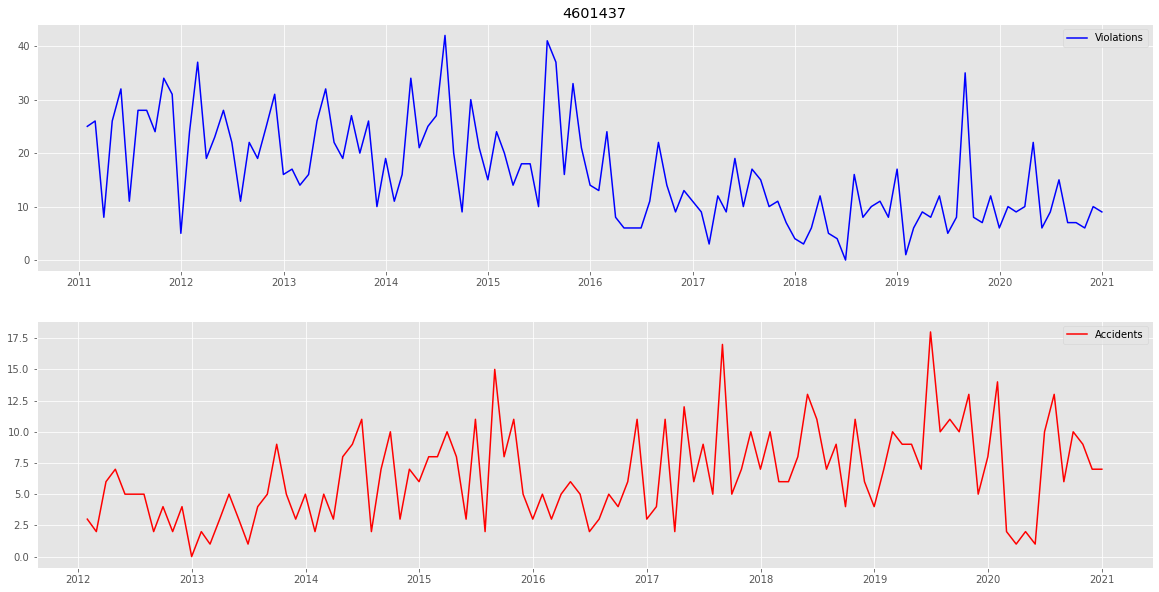

In [ ]:
mine_in_interest = 4601437

accident_mines = accident_count.copy(deep =False )
accident_mines = accident_mines[accident_mines['mine_id'] == mine_in_interest]
accident_mines = pd.DataFrame(accident_mines.groupby(['Accident Date (Accidents)'])['Document No.'].count())
accident_mines = accident_mines.resample('M').sum()
accident_mines.rename(columns={'Document No.':'Accidents'}, inplace=True)

violations_mines = violations_count.copy(deep =False )
violations_mines = violations_mines[(violations_mines['Likelihood'] == 'Highly') | (violations_mines['Likelihood'] == 'Reasonably')]
violations_mines = violations_mines[violations_mines['mine_id'] == mine_in_interest]
violations_mines = pd.DataFrame(violations_mines.groupby(['Violation Date Issued'])['mine_id'].count())
violations_mines = violations_mines.resample('M').sum()
violations_mines.rename(columns={'mine_id':'Violations'}, inplace=True)

f= plt.figure(figsize=(20,10))
ax = f.add_subplot(211)
ax2 = f.add_subplot(212)


ax.plot(violations_mines.index, violations_mines.Violations, color='b', label='Violations')
ax2.plot(accident_mines.index[12:], accident_mines.Accidents.values[12:], color='r', label='Accidents')
ax.legend()
ax.set_title(mine_in_interest)
ax2.legend()

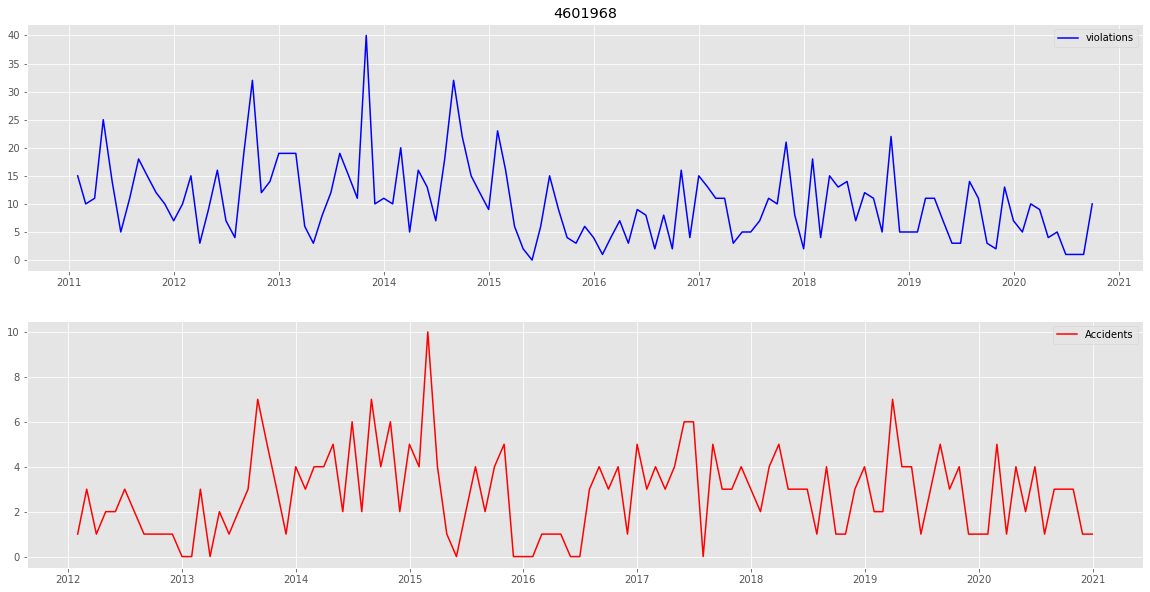

In [ ]:
mine_in_interest = 4601968

accident_mines = accident_count.copy(deep =False )
accident_mines = accident_mines[accident_mines['mine_id'] == mine_in_interest]
accident_mines = pd.DataFrame(accident_mines.groupby(['Accident Date (Accidents)'])['Document No.'].count())
accident_mines = accident_mines.resample('M').sum()
accident_mines.rename(columns={'Document No.':'Accidents'}, inplace=True)

violations_mines = violations_count.copy(deep =False )
violations_mines = violations_mines[(violations_mines['Likelihood'] == 'Highly') | (violations_mines['Likelihood'] == 'Reasonably')]
violations_mines = violations_mines[violations_mines['mine_id'] == mine_in_interest]
violations_mines = pd.DataFrame(violations_mines.groupby(['Violation Date Issued'])['mine_id'].count())
violations_mines = violations_mines.resample('M').sum()
violations_mines.rename(columns={'mine_id':'Violations'}, inplace=True)

f= plt.figure(figsize=(20,10))
ax = f.add_subplot(211)
ax2 = f.add_subplot(212)


ax.plot(violations_mines.index, violations_mines.Violations, color='b', label='violations')
ax2.plot(accident_mines.index[12:], accident_mines.Accidents.values[12:], color='r', label='Accidents')
ax.legend()
ax.set_title(mine_in_interest)
ax2.legend()

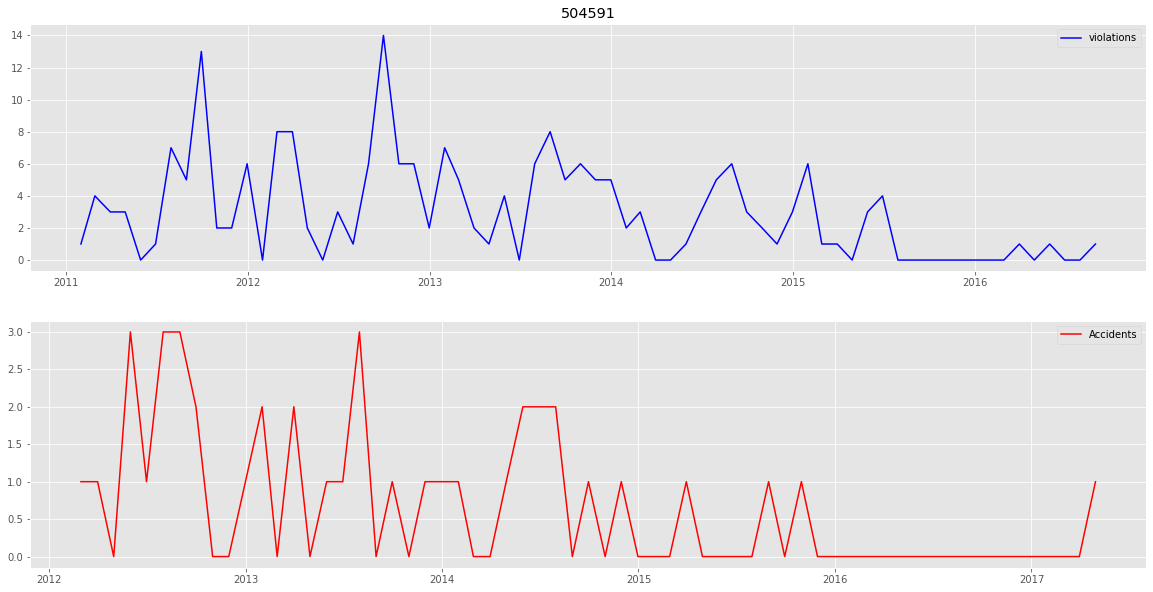

In [ ]:
mine_in_interest = 504591

accident_mines = accident_count.copy(deep =False )
accident_mines = accident_mines[accident_mines['mine_id'] == mine_in_interest]
accident_mines = pd.DataFrame(accident_mines.groupby(['Accident Date (Accidents)'])['Document No.'].count())
accident_mines = accident_mines.resample('M').sum()
accident_mines.rename(columns={'Document No.':'Accidents'}, inplace=True)

violations_mines = violations_count.copy(deep =False )
violations_mines = violations_mines[(violations_mines['Likelihood'] == 'Highly') | (violations_mines['Likelihood'] == 'Reasonably')]
violations_mines = violations_mines[violations_mines['mine_id'] == mine_in_interest]
violations_mines = pd.DataFrame(violations_mines.groupby(['Violation Date Issued'])['mine_id'].count())
violations_mines = violations_mines.resample('M').sum()
violations_mines.rename(columns={'mine_id':'Violations'}, inplace=True)

f= plt.figure(figsize=(20,10))
ax = f.add_subplot(211)
ax2 = f.add_subplot(212)


ax.plot(violations_mines.index, violations_mines.Violations, color='b', label='violations')
ax2.plot(accident_mines.index[12:], accident_mines.Accidents.values[12:], color='r', label='Accidents')
ax.legend()
ax.set_title(mine_in_interest)
ax2.legend()

In [ ]:
# def get_mines_corr(accident_count, violations_count, mine_in_interest):

#   corr = 0

#   accident_mines = accident_count.copy(deep =False )
#   accident_mines = accident_mines[accident_mines['mine_id'] == mine_in_interest]
#   accident_mines = pd.DataFrame(accident_mines.groupby(['Accident Date (Accidents)'])['Document No.'].count())
#   accident_mines = accident_mines.resample('Y').sum()
#   accident_mines.rename(columns={'Document No.':'Accidents'}, inplace=True)
#   accident_mines = accident_mines.loc['2012-01-01':'2020-12-31']
#   accident_mines.fillna(0, inplace=True)
#   # accidents_f = accident_mines.values

#   violations_mines = violations_count.copy(deep =False )
#   violations_mines = violations_mines[(violations_mines['Likelihood'] == 'Highly') | (violations_mines['Likelihood'] == 'Reasonably')]
#   violations_mines = violations_mines[violations_mines['mine_id'] == mine_in_interest]
#   violations_mines = pd.DataFrame(violations_mines.groupby(['Violation Date Issued'])['mine_id'].count())
#   violations_mines = violations_mines.resample('Y').sum()
#   violations_mines.rename(columns={'mine_id':'Violations'}, inplace=True)
#   violations_mines = violations_mines.loc['2011-01-01':'2019-12-31']
#   violations_mines.fillna(0, inplace=True)
#   # violations_f  = violations_mines.values

#   try:
#     corr, _ = pearsonr(accident_mines['Accidents'],violations_mines['Violations'])
#   except:
#     print("An exception occurred")
#   finally:
#     if(corr > 0.7):
#       return mine_in_interest
#     else:
#       return 0
#   # return pearsonr(accident_mines['Accidents'],violations_mines['Violations'])

# final_mines = []  

# for mine_in_interest in violations_count.mine_id.unique()[:100]:
#   mine = get_mines_corr(accident_count, violations_count, mine_in_interest)
#   if(mine != 0):
#     final_mines.append(mine)
#   else:
#     continue



## JOINING MINES AND EMPLOYMENT

In [ ]:
# employment.rename(columns={'Mine ID':'mine_id'}, inplace=True)

#extracting the year 
employment['Year'] = employment.apply(lambda row: str(row['CYQ (Empl/Prod Table)'])[:4], axis=1)
# extracting the quarter of the year
employment['Quarter'] = employment.apply(lambda row: str(row['CYQ (Empl/Prod Table)'])[4:], axis=1)
employment.head()

mine_id  CYQ (Empl/Prod Table)  ...  Year  Quarter
0   100003                  20111  ...  2011        1
1   100003                  20112  ...  2011        2
2   100003                  20113  ...  2011        3
3   100003                  20114  ...  2011        4
4   100003                  20121  ...  2012        1

[5 rows x 7 columns]

In [ ]:
mines.rename(columns ={'Mine ID':'mine_id'}, inplace=True)

In [ ]:
employment.rename(columns ={'Mine ID':'mine_id'}, inplace=True)

In [ ]:
# joining mines and employment
sub_data = pandasql.sqldf("SELECT * FROM employment INNER JOIN mines USING (mine_id);", globals())
# Converting the newly joined dataset into pandas dataframe
emp_mines = pd.DataFrame(sub_data)
emp_mines.head()

mine_id  CYQ (Empl/Prod Table)  ...  State Abbreviation  Type of Company
0   100003                  20111  ...                  AL            Other
1   100003                  20112  ...                  AL            Other
2   100003                  20113  ...                  AL            Other
3   100003                  20114  ...                  AL            Other
4   100003                  20121  ...                  AL            Other

[5 rows x 50 columns]

### Mines with most employees

Quarterly number of employee count

In [ ]:
employment[['mine_id','CYQ (Empl/Prod Table)','(Operator) Qtr Avg Employee Cnt']].sort_values(by='(Operator) Qtr Avg Employee Cnt', ascending=False).head(20)

mine_id  CYQ (Empl/Prod Table)  (Operator) Qtr Avg Employee Cnt
8790   200024                  20193                             3719
8789   200024                  20192                             3703
8792   200024                  20201                             3703
8791   200024                  20194                             3649
8793   200024                  20202                             3620
8787   200024                  20184                             3609
8785   200024                  20182                             3575
8786   200024                  20183                             3572
8788   200024                  20191                             3568
8794   200024                  20203                             3541
8784   200024                  20181                             3534
8795   200024                  20204                             3411
8783   200024                  20174                             3267
8781   200024                  20172                             3239
8769   200024                  20142                             3222
8782   200024                  20173                             3198
8771   200024                  20144                             3167
8774   200024                  20153                             3162
8773   200024                  20152                             3148
8778   200024                  20163                             3147

In [ ]:
employment.head()

mine_id  CYQ (Empl/Prod Table)  ...  Year  Quarter
0   100003                  20111  ...  2011        1
1   100003                  20112  ...  2011        2
2   100003                  20113  ...  2011        3
3   100003                  20114  ...  2011        4
4   100003                  20121  ...  2012        1

[5 rows x 7 columns]

In [ ]:
# extracting only those mines where employee count was greater than 2
employment[['mine_id','CYQ (Empl/Prod Table)','(Operator) Qtr Avg Employee Cnt']].loc[employment['(Operator) Qtr Avg Employee Cnt']>2].sort_values(by='(Operator) Qtr Avg Employee Cnt', ascending=True)
# 0 employees mean that the mine was not active in that quarter

mine_id  CYQ (Empl/Prod Table)  (Operator) Qtr Avg Employee Cnt
226047  2302315                  20172                                3
320036  3304359                  20191                                3
320040  3304359                  20201                                3
320097  3304368                  20142                                3
320098  3304368                  20143                                3
...         ...                    ...                              ...
8793     200024                  20202                             3620
8791     200024                  20194                             3649
8789     200024                  20192                             3703
8792     200024                  20201                             3703
8790     200024                  20193                             3719

[366319 rows x 3 columns]

Shut down?

Yearly number of employee count

In [ ]:
# can plot trends in employee count over the years for any given mine
most_emp = employment.groupby(['mine_id','Year']).agg({'(Operator) Qtr Avg Employee Cnt':'mean'})
most_emp.sort_values(by='(Operator) Qtr Avg Employee Cnt', ascending=False).head(20)

(Operator) Qtr Avg Employee Cnt
mine_id Year                                 
200024  2019                          3659.75
        2018                          3572.50
        2020                          3568.75
        2017                          3204.00
        2015                          3114.75
        2014                          3104.25
        2016                          3092.50
        2013                          2840.25
        2012                          2630.75
        2011                          2434.75
4800977 2012                          1648.75
        2015                          1627.75
        2014                          1603.25
        2011                          1602.00
        2013                          1584.50
4801353 2015                          1417.50
        2012                          1368.25
4800977 2016                          1349.50
4801353 2013                          1348.50
        2017                          1346.75

### Correlation between mines accident, violations and employment


In [ ]:
mine_emp = employment.groupby(['mine_id']).agg({'(Operator) Qtr Avg Employee Cnt':'mean'})
mine_emp.sort_values(by='(Operator) Qtr Avg Employee Cnt', ascending=False).head(10)

(Operator) Qtr Avg Employee Cnt
mine_id                                 
200024                          3122.225
4800977                         1412.675
4801353                         1292.100
200144                          1109.000
4200149                         1015.450
2401490                          944.125
2600827                          943.250
2600500                          908.375
200137                           905.975
4601437                          879.125

Have taken the average workers in each mine and not the summation

In [ ]:
emp_acc_vio = acci_vio_in_mine.join(mine_emp, how='inner')
emp_acc_vio.head()

Accidents  Violations  (Operator) Qtr Avg Employee Cnt
mine_id                                                        
100003          64         303                          107.600
100004           4          80                           26.975
100006           1          24                           15.425
100008          22         113                           57.775
100009           4          25                           27.225

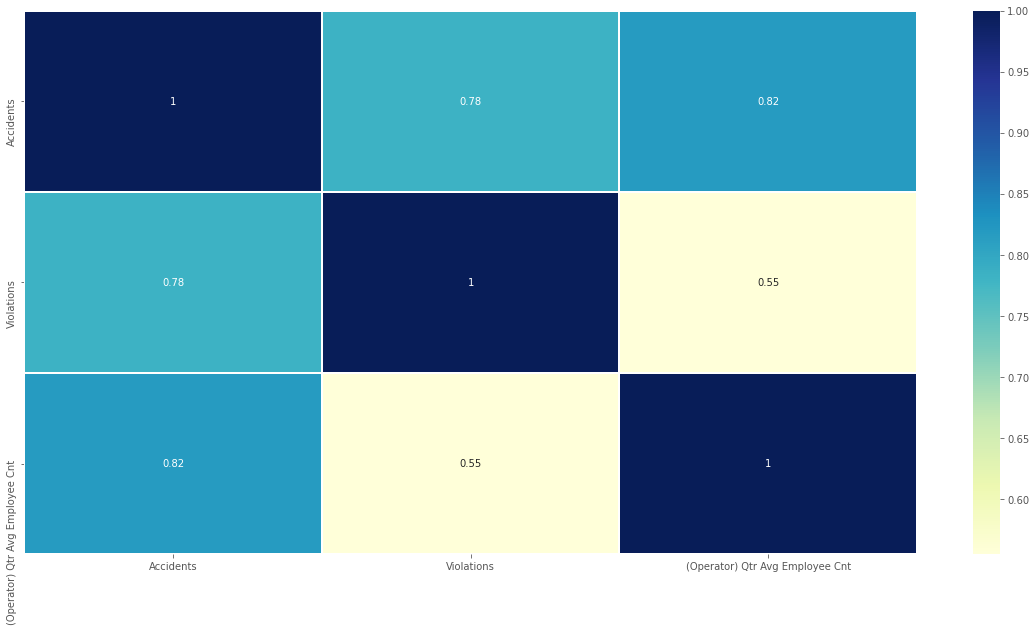

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(emp_acc_vio[['Accidents','Violations','(Operator) Qtr Avg Employee Cnt']].corr(),annot=True, cmap='YlGnBu',linewidths=1)

### Hours of work per employee

In [ ]:
employment['Hours per Employee'] = employment['(Operator) Qtr Hours Reported']/ employment['(Operator) Qtr Avg Employee Cnt']
mines_avg_work = employment.groupby(['mine_id','Year']).agg({'Hours per Employee':'sum'})
mines_avg_work.dropna(inplace=True)
mines_avg_work.sort_values(by='Hours per Employee', ascending=False)

Hours per Employee
mine_id Year                    
504681  2020         5105.700321
1601566 2020         4831.000000
102738  2016         4770.000000
4103594 2012         4711.609091
3200838 2014         4688.000000
...                          ...
1519137 2012            0.000000
103198  2020            0.000000
        2019            0.000000
        2018            0.000000
4407282 2019            0.000000

[143435 rows x 1 columns]

### Total hours of work over the years

In [ ]:
mines_avg_work = employment.groupby(['Year']).agg({'Hours per Employee':'mean'})
mines_avg_work.dropna(inplace=True)
# mines_avg_work.sort_values(by='Hours per Employee', ascending=False)

Text(0.5, 1.0, 'Average working hours of employees in all mines over the years')

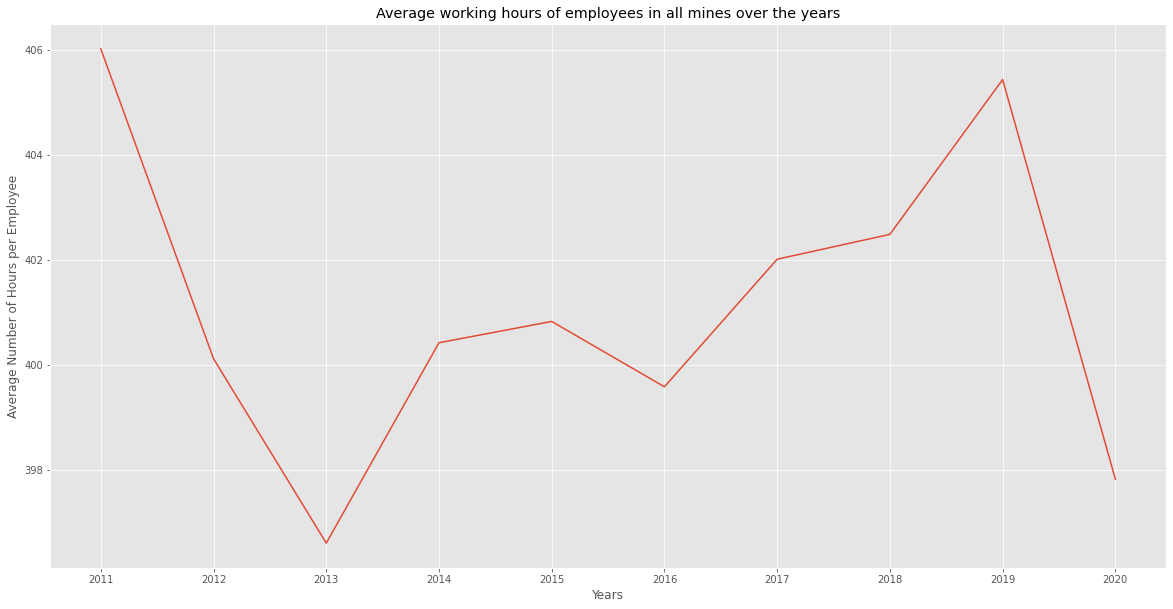

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(mines_avg_work.index, mines_avg_work.values)
plt.xlabel('Years')
plt.ylabel('Average Number of Hours per Employee')
plt.title('Average working hours of employees in all mines over the years')

In [ ]:
mine_emp.head()

(Operator) Qtr Avg Employee Cnt
mine_id                                 
100003                           107.600
100004                            26.975
100006                            15.425
100008                            57.775
100009                            27.225

In [ ]:
mines_avg_work.head()

Hours per Employee
Year                    
2011          406.029626
2012          400.123811
2013          396.608768
2014          400.428252
2015          400.834294

In [ ]:
work_workers = mine_emp.join(mines_avg_work, how='inner')
work_workers['Ratio'] = work_workers['Hours per Employee']/work_workers['(Operator) Qtr Avg Employee Cnt']
work_workers.sort_values('Ratio', ascending=False).head(10)

Empty DataFrame
Columns: [(Operator) Qtr Avg Employee Cnt, Hours per Employee, Ratio]
Index: []

In [ ]:
# corr, _ = pearsonr(work_workers['Hours per Employee'],work_workers['(Operator) Qtr Avg Employee Cnt'])
# print('Pearsons correlation: %.3f' % corr)

In [ ]:
# corr, _ = pearsonr(employment['(Operator) Qtr Hours Reported'],employment['(Operator) Qtr Avg Employee Cnt'])
# print('Pearsons correlation: %.3f' % corr)

More employees, more hours of work obviously

In [ ]:
# corr, _ = pearsonr(emp_mines['Hours Per Shift (Mines)'].fillna(0),emp_mines['(Operator) Qtr Avg Employee Cnt'])
# print('Pearsons correlation: %.3f' % corr)

## OPERATOR AND EMPLOYMENT

In [ ]:
op_his = pd.read_excel('/content/drive/MyDrive/Mining Project/Operator Histories at Mines.xlsx',skiprows=2)
op_his.head()

Mine ID Operator ID Operator Start Date Operator End Date
0   100003      L00873          1950-01-01        1989-06-30
1   100003      L13586          1989-07-01               NaT
2   100004      L01808          1950-01-01        1984-04-24
3   100004      L01808          1986-04-16        2000-06-13
4   100004      L07157          1984-04-25        1986-04-15

In [ ]:
op_his.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130285 entries, 0 to 130284
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Mine ID              130285 non-null  int64         
 1   Operator ID          130285 non-null  object        
 2   Operator Start Date  130285 non-null  datetime64[ns]
 3   Operator End Date    42084 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 4.0+ MB


In [ ]:
# # get the lastest year available for any given mine id. Since there are a lot of years available for any given mine id, we only take the latest date
# # check Operator Histories table to get an idea
# def get_max(group):
#   return group[group['Operator Start Date'] == group['Operator Start Date'].max()]

# op_his = op_his.groupby('Mine ID').apply(get_max).reset_index(drop=True)

In [ ]:
# op_his.rename(columns ={'Mine ID':'mine_id'}, inplace=True)

In [ ]:
# operator_his = op_his[['mine_id','Operator ID']]

In [ ]:
# employment.index = employment.mine_id
# operator_his.index = operator_his.mine_id

In [ ]:
# operator_his = operator_his.drop('mine_id',axis=1)
# employment = employment.drop('mine_id',axis=1)

In [ ]:
# employment = employment.join(operator_his,how='left',on='mine_id')

In [ ]:
# employment.tail(10)

In [ ]:
employment['Year'] = employment['Year'].astype('int')

In [ ]:
employment.head(100)

mine_id  CYQ (Empl/Prod Table)  ...  Quarter  Hours per Employee
0    100003                  20111  ...        1          552.915254
1    100003                  20112  ...        2          559.803150
2    100003                  20113  ...        3          566.836066
3    100003                  20114  ...        4          535.574803
4    100003                  20121  ...        1          630.532110
..      ...                    ...  ...      ...                 ...
95   100006                  20144  ...        4          757.333333
96   100006                  20151  ...        1          602.384615
97   100006                  20152  ...        2          707.923077
98   100006                  20153  ...        3          669.230769
99   100006                  20154  ...        4          730.166667

[100 rows x 8 columns]

In [ ]:
op_his.head(50)

Mine ID Operator ID Operator Start Date Operator End Date
0    100003      L00873          1950-01-01        1989-06-30
1    100003      L13586          1989-07-01               NaT
2    100004      L01808          1950-01-01        1984-04-24
3    100004      L01808          1986-04-16        2000-06-13
4    100004      L07157          1984-04-25        1986-04-15
5    100004      L13586          2000-06-14               NaT
6    100005      L00108          1950-01-01        1983-02-06
7    100005      L00873          1983-02-07        1989-07-30
8    100005      L10998          1989-07-31               NaT
9    100006      L00208          1995-01-03        2002-01-16
10   100006      L00230          1950-01-01        1979-05-31
11   100006      L06813          1979-06-01        1995-01-02
12   100006      L16197          2002-01-17               NaT
13   100008      L31753          1950-01-01               NaT
14   100009      L10846          1950-01-01        1989-04-20
15   100009      L16168          1989-04-21               NaT
16   100010      L05566          1950-01-01        1990-04-14
17   100010      L11629          1990-04-15        1992-03-25
18   100010      L12590          1992-03-26        1994-09-30
19   100010      L14477          1994-10-01        1998-06-30
20   100010      L16123          1998-07-01               NaT
21   100011     0090005          2008-02-12        2016-02-04
22   100011      L00036          1950-01-01        1989-05-30
23   100011      L17074          1989-05-31        2008-02-11
24   100011      L17145          2016-02-05               NaT
25   100012      L04813          1950-01-01        1985-12-31
26   100012      L16168          1986-01-01               NaT
27   100013      L31370          1950-01-01               NaT
28   100015      L09304          1950-01-01        1993-06-28
29   100015      L13248          1993-06-29               NaT
30   100016     0118327          2015-07-22               NaT
31   100016      L09304          1950-01-01        1993-01-31
32   100016      L12716          1998-06-30        2001-08-26
33   100016      L12984          1993-02-01        1998-06-29
34   100016      L18165          2001-08-27        2015-07-21
35   100017      L00169          1950-01-01        1991-06-25
36   100017      L09304          1991-06-26        1991-12-15
37   100017      L10825          1991-12-16               NaT
38   100018      L00230          1950-01-01        1979-05-31
39   100018      L00238          1979-06-01               NaT
40   100020      L00017          1950-01-01               NaT
41   100021      L16168          1950-01-01               NaT
42   100025      L00230          1950-01-01        1979-05-31
43   100025      L00238          1979-06-01               NaT
44   100026      L08875          1950-01-01               NaT
45   100027      L12645          1950-01-01               NaT
46   100028      L16168          2007-05-04               NaT
47   100028      L17204          1950-01-01        2007-05-03
48   100029      L00231          1950-01-01        1979-05-31
49   100029      L03645          1979-06-01               NaT

In [ ]:
def assign_operator(row):
  mine = row['mine_id']
  focus = op_his[op_his['Mine ID'] == mine]

  assigned = "no"
  if (focus.shape[0] == 0):
    return "NA"
  # operator = focus['Operator ID'].iloc[0]
  for i in range(focus.shape[0]):
    if (focus['Operator Start Date'].iloc[i].year <= row['Year'] <= focus['Operator End Date'].iloc[i].year):
      print(focus['Operator Start Date'].iloc[i].year)
      operator = focus['Operator ID'].iloc[i]
      assigned = "yes"
    else:
      continue

  if (assigned == "no"):
    index = max(focus['Operator Start Date'])
    operator = focus['Operator ID'].loc[focus['Operator Start Date'] == index]

  return operator


 

employment["Operator"] = employment.apply(lambda row: assign_operator(row), axis = 1)

Streaming output truncated to the last 5000 lines.
2016
2017
2016
2016
2016
2016
2016
2016
2016
2016
2016
2017
2017
2017
2018
2017
2018
2017
2018
2017
2018
2017
2018
2018
2018
2018
2017
2017
2017
2017
2017
2017
2017
2017
2018
2018
2018
2018
2018
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2018
2017
2018
2017
2018
2017
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2019
2018
2019
2018
2019
2018
2019
2018
2019
2019
2019
2019
2019
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1950
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1950
1950
1950
1950
1950

## OPERATORS

In [ ]:
violations.columns

In [ ]:
accidents.columns

In [ ]:
accidents['Days Lost'].value_counts()

In [ ]:
violations['Injury or Illness'].value_counts()

In [ ]:
# function to assign each category of negligence a score between 1 to 5
def get_reckless_score(row):
  if (row['Negligence'] == 'Reckless'):
    return 5
  if (row['Negligence'] == 'HighNegligence'):
    return 4
  if (row['Negligence'] == 'ModNegligence'):
    return 3
  if (row['Negligence'] == 'LowNegligence'):
    return 2
  if (row['Negligence'] == 'NoNegligence'):
    return 1

In [ ]:
def get_likelihood_score(row):
  if (row['Likelihood'] == 'Highly'):
    return 5
  if (row['Likelihood'] == 'Reasonably'):
    return 4
  if (row['Likelihood'] == 'Unlikely'):
    return 3
  if (row['Likelihood'] == 'NoLikelihood'):
    return 2
  else:
    return 0

In [ ]:
def get_injury_score(row):
  if (row['Likelihood'] == 'Fatal'):
    return 5
  if (row['Likelihood'] == 'Permanent'):
    return 4
  if (row['Likelihood'] == 'LostDays'):
    return 3
  if (row['Likelihood'] == 'NoLostDays'):
    return 2

In [ ]:
operator_df = mines_accident.copy(deep=False)
operator_counts = pd.DataFrame(operator_df.groupby('Operator ID @ Accidents').agg({'mine_id':'count','Degree of Injury Code':'mean','Total Experience':'mean','Mine Experience':'mean','Job Experience':'mean','Days Lost':'mean'}))
operator_counts = operator_counts.sort_values(by='mine_id', ascending=False)
#operator_counts['percentage'] = (operator_counts['mine_id']*100)/np.sum(operator_counts['mine_id']) #quite low %
operator_counts.rename(columns = {'mine_id':'Accidents'}, inplace=True)

operator_violations = violations.copy(deep =False)
operator_violations['Reckless Score'] = operator_violations.apply(lambda row: get_reckless_score(row), axis=1 )
operator_violations['Likelihood Score'] = operator_violations.apply(lambda row: get_likelihood_score(row), axis=1 )
operator_violations['Injury Score'] = operator_violations.apply(lambda row: get_likelihood_score(row), axis=1 )
operator_violations = operator_violations.groupby(['Operator ID (Violations)']).agg({'mine_id':'count','Reckless Score':'mean','Likelihood Score':'mean','Injury Score':'mean'})
operator_violations.rename(columns = {'mine_id':'Violations'}, inplace=True)
operator_violations.head()

In [ ]:
operator_acci_vio = operator_counts.join(operator_violations, how='outer')
operator_acci_vio.fillna(0,inplace=True)

In [ ]:
op_emp = employment.reset_index()
op_emp = op_emp.groupby('Operator ID').agg({'(Operator) Qtr Hours Reported':'mean','(Operator) Qtr Avg Employee Cnt':'mean','Hours per Employee':'mean'})
# op_emp.index = op_emp['Operator ID']
# op_emp.drop('Operator ID', axis=1, inplace=True)
op_emp.fillna(0, inplace=True)

In [ ]:
operator_history = operator_acci_vio.join(op_emp, how='inner')
operator_history['(Operator) Qtr Hours Reported'].replace(0, 1, inplace=True)
operator_history['Injuries Per Hour'] = operator_history['Accidents'] * 200000/operator_history['(Operator) Qtr Hours Reported']
operator_history.fillna(0, inplace=True)
operator_history['Ratio'] = (0.074*operator_history['Accidents']) + (0.053*operator_history['Days Lost']) + (0.077*operator_history['Violations']) + (0.0065*operator_history['Reckless Score']) + (0.0053*operator_history['Likelihood Score']) / (0.027*operator_history['Degree of Injury Code'])  
operator_history[operator_history['Accidents'] >0]

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(operator_history.corr(), annot=True)

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(operator_history[operator_history['Accidents'] >0].corr(), annot=True)

In [ ]:
operator_history.sort_values(by='Accidents', ascending=False)

In [ ]:
poperator_history[(operator_history['Degree of Injury Code'] !=0) & (operator_history['Accidents'] >0)].sort_values(by=['Degree of Injury Code', 'Accidents'], ascending=[True,False]).head(10)

Apart from 0056537, 0059179, 0102846, L00897, L14182 no other operator has had a fatal injury under them.

In [ ]:
operator_history[(operator_history['Degree of Injury Code'] !=0) & (operator_history['Accidents'] >0)].sort_values(by=['Degree of Injury Code', 'Accidents'], ascending=[False,False]).head(10)

In [ ]:
operator_history.sort_values(by='Total Experience', ascending=False)

Operators 0050143 and L09604 had an injury with Total Exp. of 60 and 56 respectively. These were minor injuries with degree of injury code 6 since the experience was high. No days were lost in these accidents.

In [ ]:
operator_history[(operator_history['Total Experience'] !=0)].sort_values(by='Total Experience', ascending=True)

There was an accident under operator 0119448 with 0.02 Total Experience. It was a serious injury of degree 3 and that days lost 19.

In [ ]:
operator_history.sort_values(by='Violations', ascending=False).head(10)

P00812 - 144440 violations, 645 accidents, 3.66 degreee of injury

0100767 - 11747 violations, 244 accidents, 4.14 degree of injury

P22603 - 11240 V, 413 A, 4.01 D

0100767 had more violations, yet lesser accidents and higher DOI than P22603

P23854 has had 9117 V, 312 Accidents yet a very low DOI of 3.74. More severe accidents under this operator.

In [ ]:
operator_history.sort_values(by='(Operator) Qtr Hours Reported', ascending=False).head(10)

L12058 has the highest hours reported(1.62*10^6) and a very high employee count of 3122. They also have the most number of accidents(880) and a lot of violations(2348) with an avg reckless score of 3.001 and likelihood of 3.2 but the average DOI is higher(4.85) compared to rest of their counterparts with high hours and number of employees.. 

such as P24171- 157 A, 580 V, 6.824195e+05 hours, 1292 employees, 2.7 reckless but 4.59 DOI

In [ ]:
operator_history.sort_values(by='Injuries Per Hour', ascending=False).head(10)

Highest Injury per hours - 
P24542-48800000.0

0077603-19800000.0	

0112765-13000000.0

p24373-12200000.0

In [ ]:
operator_history[operator_history['Accidents']>0].sort_values(by='Ratio', ascending=False).head(10)

formula = (3*accidents + 1.5*viol...) / (degree + injur9ies_per_hour) #higher the value, better the mine

## CLASSIFICATION

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
mines_accident.columns

In [ ]:
mines_accident['Body Part Code'].value_counts()

In [ ]:
accident_dnn = mines_accident.copy(deep = False)


# accident_dnn = mines_accident[['Accident Type Code','Age (Accidents)','Body Part Code','Degree of Injury Code','Job Experience','Mine Experience','Total Experience','Nature of Injury','Occupation (Accidents)','Occupation Type','Mine Type (Mines)','Average Mine Height']]


In [ ]:
# Extracting the relevant columns that we will be using for the prediction task
accident_dnn = mines_accident[['Age (Accidents)','Degree of Injury Code','Total Experience','Nature of Injury','Occupation (Accidents)','Mine Type (Mines)','Average Mine Height']]

In [ ]:
accident_dnn.shape

In [ ]:
accident_dnn.info()

In [ ]:
accident_dnn.fillna(0, inplace=True)

In [ ]:
# converting Mine Height column into float type
accident_dnn['Average Mine Height'] = accident_dnn['Average Mine Height'].astype('float')

Label encoding all the categorical columns

Converting the texts in each column and aasigning distinct categories a number

In [ ]:
# zero = LabelEncoder()
# column = zero.fit_transform(accident_dnn['Accident Type Code'])
# accident_dnn['Accident Type Code'] = column

In [ ]:
# three = LabelEncoder()
# column = three.fit_transform(accident_dnn['Body Part Code'])
# accident_dnn['Body Part Code'] = column

In [ ]:
seven = LabelEncoder()
column = seven.fit_transform(accident_dnn['Nature of Injury'])
accident_dnn['Nature of Injury'] = column

In [ ]:
eight = LabelEncoder()
column = eight.fit_transform(accident_dnn['Occupation (Accidents)'])
accident_dnn['Occupation (Accidents)'] = column

In [ ]:
# nine = LabelEncoder()
# column = nine.fit_transform(accident_dnn['Occupation Type'])
# accident_dnn['Occupation Type'] = column

In [ ]:
ten = LabelEncoder()
column = ten.fit_transform(accident_dnn['Mine Type (Mines)'])
accident_dnn['Mine Type (Mines)'] = column

In [ ]:
# creating the target and the feature set
X = accident_dnn.drop(['Degree of Injury Code'], axis=1).values
y = accident_dnn['Degree of Injury Code'].values.reshape((-1,1))

In [ ]:
# encode target class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

In [ ]:
y.shape

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2)

In [ ]:
# standardizing all the feature columns, i.e bringing all the features between a narrow range for faster computation and convergence of gradient descent algorithm
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

In [ ]:
#Creating the model
model = tf.keras.models.Sequential()
#1st hidden layer with dropout of 10%
model.add(tf.keras.layers.Dense(units = 6, kernel_initializer="uniform", activation="relu", input_dim=6))
# model.add(tf.keras.layers.Dropout(rate=0.1))

#2nd hidden layer
model.add(tf.keras.layers.Dense(units =20, kernel_initializer="uniform", activation="relu"))

#Output layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer="uniform", activation="softmax"))

#Compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#Fitting the data to the model
model.fit(X_train, y_train, batch_size=500, epochs =100)

In [ ]:
# Predicting on the test data
y_pred = model.predict(X_test)
y_pred  = np.rint(y_pred)

# Comparing actual label vs predicted label and calculating accuracy
size = y_pred.shape[0]
correct = 0
total = 0

for i in range(size):
  act_label = np.argmax(y_test[i])
  pred_label = np.argmax(y_pred[i])

  if(act_label == pred_label):
    correct +=1
  total+=1
accuracy = correct/total
print('Accuracy on test set is: '+ str(accuracy*100)+'%')

In [ ]:
# printing the actual values vs what our model predicts
pred_label = []
act_label = []
for i in range(size):
  act_label.append(np.argmax(y_test[i]))
  pred_label.append(np.argmax(y_pred[i]))

print("Predicted label are:")
print(pred_label[:10])
print()
print("Actual Labels are")
print(act_label[:10])

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_train[:5]

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

Occupation of the worker

In [ ]:
X = accident_dnn.drop(['Occupation (Accidents)'], axis=1).values
y = accident_dnn['Occupation (Accidents)'].values.reshape((-1,1))

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2)

In [ ]:
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

In [ ]:
#Creating the model
model = tf.keras.models.Sequential()
#1st hidden layer with dropout of 10%
model.add(tf.keras.layers.Dense(units = 6, kernel_initializer="uniform", activation="relu", input_dim=6))
model.add(tf.keras.layers.Dropout(rate=0.1))

#2nd hidden layer
model.add(tf.keras.layers.Dense(units =20, kernel_initializer="uniform", activation="relu"))
model.add(tf.keras.layers.Dense(units =20, kernel_initializer="uniform", activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.1))

#Output layer
model.add(tf.keras.layers.Dense(units=188, kernel_initializer="uniform", activation="softmax"))
#Compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#Fitting the data to the model
model.fit(X_train, y_train, batch_size=500, epochs =100)

Accuracy is too low

In [ ]:
# Predicting on the test data
y_pred = model.predict(X_test)
y_pred  = np.rint(y_pred)

# Comparing actual label vs predicted label and calculating accuracy
size = y_pred.shape[0]
correct = 0
total = 0

for i in range(size):
  act_label = np.argmax(y_test[i])
  pred_label = np.argmax(y_pred[i])

  if(act_label == pred_label):
    correct +=1
  total+=1
accuracy = correct/total
print('Accuracy on test set is: '+ str(accuracy*100)+'%')

In [ ]:
# printing the actual values vs what our model predicts
pred_label = []
act_label = []
for i in range(size):
  act_label.append(np.argmax(y_test[i]))
  pred_label.append(np.argmax(y_pred[i]))

print("Predicted label are:")
print(pred_label[:10])
print()
print("Actual Labels are")
print(act_label[:10])

## FORECASTING

In [ ]:
acc_1 = pd.read_excel('/content/drive/MyDrive/Mining Project/Additional Accidents for TimeSeries/Accidents with Degree Inj1-6 2000 -2005 - from MSTR text to Excel.xlsx')
acc_2 = pd.read_excel('/content/drive/MyDrive/Mining Project/Additional Accidents for TimeSeries/Accidents with Degree Inj1-6 2006 -2010 - from MSTR text to Excel.xlsx')
acc_3 = pd.read_excel('/content/drive/MyDrive/Mining Project/Additional Accidents for TimeSeries/Accidents with Degree Inj1-6 2011 -2020 - from MSTR text to Excel.xlsx')


In [ ]:
acc_1.head()

In [ ]:
# join all the accident data into one dataset
accs = [acc_1,acc_2, acc_3]
accident_ext = pd.concat(accs)

In [ ]:
# number of accidents per operator
operator = accident_ext.groupby('Operator ID @ Accidents').agg({'Mine ID':'count'})
operator.sort_values(by='Mine ID', ascending = False).head(10)

1st and 3rd operator have stopped working. They also have high number of accidents. It could have been the case that they were forced to shut down

### ARIMA

### L16168

In [ ]:
# yearly accidents for given operator
first_op = accident_ext[accident_ext['Operator ID @ Accidents'] == 'L16168'] # change mine id here
first_op = first_op.groupby('Accident Date (Accidents)').agg({'Mine ID':'count'})
first_op.rename(columns={'Mine ID':'Accidents'}, inplace=True)
new = first_op.resample('Q').sum()
new.index = new.index - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)
new

Checking for stationarity of the data. Plot the data and see if over time is it trending up or down. If its not trending either direction and is just sideways then it is said to be stationary

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(new.index, new.Accidents, marker='d', label='Accidents')
plt.xlabel('Years')
plt.ylabel('Accidents')
plt.title('Quarterly Number of Accidents by P00812')
plt.legend(loc=2)
plt.show()

result = adfuller(new['Accidents'])





In [ ]:
print('Test statistic:'+str(result[0]))
print('p value:'+str(result[1]))

Statistical way of checking stationary-ness

Data is not stationary. We want test statistic to be as negative as possible and p value be < 0.05

This data needs to be transformed first. We will do differencing

In [ ]:
new_diff = new.diff(1).dropna(inplace=False)
plt.figure(figsize=(20,10))
new_diff.iloc[:-1].plot(marker='d')
plt.xlabel('Years')
plt.ylabel('First Order Differencing of Total Amount')

plt.show()

result = adfuller(new_diff['Accidents'])

print('Test statistic:'+ str(result[0]))

print('p value:'+str(result[1]))

Now it is stationary. Value of d=1

Finding value of p(auto regressive lags) and q(number of moving average term)

Choose the value of (p,q) corresponding to the AIC and BIC score

In [ ]:
for p in range(4):
    for q in range(3):
      try:
        model = SARIMAX(new, order=(p,1,q), trend='c') # SARIMAX(p,d,q) d=1 here since data was stationary and we need to difference it once
        results = model.fit()
        
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

522 and 536 are the lowest scores. so p =2 and q=2

In [ ]:
model = SARIMAX(new, order=(2,1,2), trend='c')
results = model.fit()

results.plot_diagnostics(figsize=(20,10))
plt.show()

print(results.summary())

A good model should: 

● Have no obvious structures in the residuals in the Standardized residual plot.

● The KDE and N(0,1) lines in the Histogram plus estimated density should almost be the same. 

● Have dots lying along the red line in the Q-Q plot.

● 95% of the correlations for lag greater than 0 should not be significant in the Correlogram

Predicting the last 10 quarters of the data using the previous months to get a sense of the model's predicting abiloty

In [ ]:
one_step_forecast = results.get_prediction(start=-10)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
# confidence_intervals

# getting the values for the confidence interval, this will be shaded in the plot to get an idea of the model confidence
lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index,lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

In [ ]:
print('Mean Sqaured Error:')
actual = new[-len(mean_forecast):].values.ravel()
pred = mean_forecast.values.ravel()

print(mean_squared_error(actual, pred))

Predicitng the next 5 quarters into the future

In [ ]:
dynamic_forecast = results.get_forecast(steps=5)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals= dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']


In [ ]:
plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

join_x = [new.index[-1],mean_forecast.index[0]]
join_y = [new.values[-1], mean_forecast.values[0]]

plt.plot(join_x, join_y, color='r')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


In [ ]:
forcast= results.forecast(5)
forcast

### L12058

In [ ]:
first_op = accident_ext[accident_ext['Operator ID @ Accidents'] == 'L12058']
first_op = first_op.groupby('Accident Date (Accidents)').agg({'Mine ID':'count'})
first_op.rename(columns={'Mine ID':'Accidents'}, inplace=True)
new = first_op.resample('Y').sum()
new.index = new.index - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)
new

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(new.index, new.Accidents, marker='d', label='Accidents')
plt.xlabel('Years')
plt.ylabel('Accidents')
plt.title('Monthly Number of Accidents by L12058')
plt.legend(loc=2)
plt.show()

result = adfuller(new['Accidents'])

In [ ]:
print('Test statistic:'+str(result[0]))
print('p value:'+str(result[1]))

In [ ]:
# new_diff = new.diff(1).dropna(inplace=False)
# plt.figure(figsize=(20,10))
# new_diff.iloc[:-1].plot(marker='d')
# plt.xlabel('Years')
# plt.ylabel('First Order Differencing of Total Amount')

# plt.show()

# result = adfuller(new_diff['Accidents'])

# print('Test statistic:'+ str(result[0]))

# print('p value:'+str(result[1]))

Now the data is stationary after differencing it once. So value of d = 1

In [ ]:
for p in range(4):
    for q in range(3):
      try:
        model = SARIMAX(new, order=(p,0,q), trend='c')
        results = model.fit()
        
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

p = 2, q=1

In [ ]:
model = SARIMAX(new, order=(2,0,1), trend='c')
results = model.fit()

results.plot_diagnostics(figsize=(20,10))
plt.show()

print(results.summary())

In [ ]:
one_step_forecast = results.get_prediction(start=-10)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
# confidence_intervals

lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index,lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

In [ ]:
print('Mean Sqaured Error:')
actual = new[-len(mean_forecast):].values.ravel()
pred = mean_forecast.values.ravel()

print(mean_squared_error(actual, pred))

In [ ]:
dynamic_forecast = results.get_forecast(steps=5)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals= dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']


In [ ]:
plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

join_x = [new.index[-1],mean_forecast.index[0]]
join_y = [new.values[-1], mean_forecast.values[0]]

plt.plot(join_x, join_y, color='r')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


In [ ]:
forcast= results.forecast(2)
forcast

### L14843

In [ ]:
# yearly accidents for given operator
first_op = accident_ext[accident_ext['Operator ID @ Accidents'] == 'L14843'] # change mine id here
first_op = first_op.groupby('Accident Date (Accidents)').agg({'Mine ID':'count'})
first_op.rename(columns={'Mine ID':'Accidents'}, inplace=True)
new = first_op.resample('Q').sum()
new.index = new.index - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)
new

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(new.index, new.Accidents, marker='d', label='Accidents')
plt.xlabel('Years')
plt.ylabel('Accidents')
plt.title('Monthly Number of Accidents by L12058')
plt.legend(loc=2)
plt.show()

result = adfuller(new['Accidents'])

In [ ]:
print('Test statistic:'+str(result[0]))
print('p value:'+str(result[1]))

In [ ]:
for p in range(4):
    for q in range(3):
      try:
        model = SARIMAX(new, order=(p,0,q), trend='c')
        results = model.fit()
        
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

In [ ]:
model = SARIMAX(new, order=(3,0,2), trend='c')
results = model.fit()

results.plot_diagnostics(figsize=(20,10))
plt.show()

print(results.summary())

In [ ]:
one_step_forecast = results.get_prediction(start=-10)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
# confidence_intervals

lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']

plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index,lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

In [ ]:
print('Mean Sqaured Error:')
actual = new[-len(mean_forecast):].values.ravel()
pred = mean_forecast.values.ravel()

print(mean_squared_error(actual, pred))

In [ ]:
dynamic_forecast = results.get_forecast(steps=5)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals= dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']


In [ ]:
plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

join_x = [new.index[-1],mean_forecast.index[0]]
join_y = [new.values[-1], mean_forecast.values[0]]

plt.plot(join_x, join_y, color='r')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


In [ ]:
forcast= results.forecast(2)
forcast

### SARIMAX

### L16168

In [ ]:
# yearly accidents for given operator
first_op = accident_ext[accident_ext['Operator ID @ Accidents'] == 'L16168'] # change mine id here
first_op = first_op.groupby('Accident Date (Accidents)').agg({'Mine ID':'count'})
first_op.rename(columns={'Mine ID':'Accidents'}, inplace=True)
new = first_op.resample('Q').sum()
new.index = new.index - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)

model = SARIMAX(new, order=(2,1,2),seasonal_order=(1,1,7,3))
results = model.fit()

results.plot_diagnostics(figsize=(20,10))
plt.show()

print(results.summary())

In [ ]:
one_step_forecast = results.get_prediction(start=-10)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
# confidence_intervals

# getting the values for the confidence interval, this will be shaded in the plot to get an idea of the model confidence
lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']

plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index,lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

In [ ]:
print('Mean Sqaured Error:')
actual = new[-len(mean_forecast):].values.ravel()
pred = mean_forecast.values.ravel()

print(mean_squared_error(actual, pred))

MSE is lower compared to ARIMA model. (lower the MSE, better the model)

In [ ]:
dynamic_forecast = results.get_forecast(steps=5)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals= dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']


plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

join_x = [new.index[-1],mean_forecast.index[0]]
join_y = [new.values[-1], mean_forecast.values[0]]

plt.plot(join_x, join_y, color='r')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


In [ ]:
forcast= results.forecast(5)
forcast

### L12058

In [ ]:
# yearly accidents for given operator
first_op = accident_ext[accident_ext['Operator ID @ Accidents'] == 'L12058']
first_op = first_op.groupby('Accident Date (Accidents)').agg({'Mine ID':'count'})
first_op.rename(columns={'Mine ID':'Accidents'}, inplace=True)
new = first_op.resample('Y').sum()
new.index = new.index - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)

model = SARIMAX(new, order=(2,0,1),seasonal_order=(1,0,1,6))
results = model.fit()

results.plot_diagnostics(figsize=(20,10))
plt.show()

print(results.summary())

In [ ]:
one_step_forecast = results.get_prediction(start=-10)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
# confidence_intervals

# getting the values for the confidence interval, this will be shaded in the plot to get an idea of the model confidence
lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']

plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index,lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

Since this plot does not show any seasonal behavior, also the MSE is high compared to theat of the ARIMA model.. So in this case the ARIMA model is a better fit

In [ ]:
print('Mean Sqaured Error:')
actual = new[-len(mean_forecast):].values.ravel()
pred = mean_forecast.values.ravel()

print(mean_squared_error(actual, pred))

In [ ]:
dynamic_forecast = results.get_forecast(steps=5)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals= dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']


plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

join_x = [new.index[-1],mean_forecast.index[0]]
join_y = [new.values[-1], mean_forecast.values[0]]

plt.plot(join_x, join_y, color='r')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


In [ ]:
forcast= results.forecast(5)
forcast

### L14843

In [ ]:
# yearly accidents for given operator
first_op = accident_ext[accident_ext['Operator ID @ Accidents'] == 'L14843'] # change mine id here
first_op = first_op.groupby('Accident Date (Accidents)').agg({'Mine ID':'count'})
first_op.rename(columns={'Mine ID':'Accidents'}, inplace=True)
new = first_op.resample('Q').sum()
new.index = new.index - pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1)

model = SARIMAX(new, order=(2,1,2),seasonal_order=(4,0,6,4))
results = model.fit()

results.plot_diagnostics(figsize=(20,10))
plt.show()

print(results.summary())

In [ ]:
one_step_forecast = results.get_prediction(start=-10)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
# confidence_intervals

# getting the values for the confidence interval, this will be shaded in the plot to get an idea of the model confidence
lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']

plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index,lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

In [ ]:
print('Mean Sqaured Error:')
actual = new[-len(mean_forecast):].values.ravel()
pred = mean_forecast.values.ravel()

print(mean_squared_error(actual, pred))

In [ ]:
dynamic_forecast = results.get_forecast(steps=5)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals= dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Accidents']
upper_limits = confidence_intervals.loc[:,'upper Accidents']


plt.figure(figsize=(30,10))
plt.plot(new.index, new, label='observed', color='b')

plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

join_x = [new.index[-1],mean_forecast.index[0]]
join_y = [new.values[-1], mean_forecast.values[0]]

plt.plot(join_x, join_y, color='r')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


In [ ]:
forcast= results.forecast(5)
forcast

# CORRELATION ANALYSIS

In [ ]:
import warnings
warnings.filterwarnings("ignore")

 
from google.colab import drive
import pandas as pd
import numpy as np
import pandasql
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats, pearsonr
 
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
 
import statsmodels.stats.multicomp as multi
 
import math

## APPROACH 1 - SAFETY

In [ ]:
accidents = pd.read_excel('/content/drive/MyDrive/Mining Project/Accidents.xlsx')
all_mines = pd.read_excel('/content/drive/MyDrive/Mining Project/Mines.xlsx')
violations2011 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2011.xlsx')
violations2012 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2012.xlsx')
violations2013 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2013.xlsx')
violations2014 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2014.xlsx')
violations2015 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2015.xlsx')
violations2016 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2016.xlsx')
violations2017 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2017.xlsx')
violations2018 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2018.xlsx')
violations2019 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2019.xlsx')
violations2020 = pd.read_excel('/content/drive/MyDrive/Mining Project/Violations/Violations 2020.xlsx')

In [ ]:
violations = pandasql.sqldf("SELECT * FROM violations2011 UNION ALL SELECT * from violations2012 UNION ALL SELECT * FROM violations2013 UNION ALL SELECT * FROM violations2014 UNION ALL SELECT * FROM violations2015 UNION ALL SELECT * FROM violations2016 UNION ALL SELECT * FROM violations2017 UNION ALL SELECT * FROM violations2018 UNION ALL SELECT * FROM violations2019 UNION ALL SELECT * FROM violations2020;", globals())
violations = pd.DataFrame(violations)

safety = all_mines.merge(accidents, left_on='Mine ID', right_on='Mine ID')
safety.head()

In [ ]:
safety['Year'] = safety.apply(lambda row: pd.datetime(row['Calendar Year'],row['Calendar Quarter'], 1), axis =1)

violation = all_mines.merge(violations, left_on='Mine ID', right_on='Mine ID')
violation.shape

## Checking mean number of accidents of a single operator to that of mean accidents of population (Using 1 sample t-test)

In [ ]:
safety['Operator ID @ Accidents'].value_counts()[:20]

L12058, 0105487, P00812 are among the operators with the most number of accidents

### Analyzing operator activities in different mines

Analyzing L12058

In [ ]:
safety_2 = safety[safety['Operator ID @ Accidents'] == 'L12058']

Number of accidents in each mine

In [ ]:
accidents_2 = safety_2.groupby('Mine ID').agg({'Mine Name':'count'})
accidents_2.head()

Operator L12058 has worked in the same mine. 0105487 has only worked in three different mines. We need more data points to find weather mines operated by the same operator have similar activities in terms of safety.

In [ ]:
# Number of different mines each operator has wroked at
op_in_mine = {}
for op in safety['Operator ID @ Accidents'].value_counts().head(100).index:
  op_1 = safety[safety['Operator ID @ Accidents'] == op]
  num_mine = op_1.groupby('Mine ID').agg({'Mine Name':'count'})
  op_in_mine[op] = len(num_mine)

op_in_mine

In [ ]:
# Mines with the most number of different operators
mine_op = {}
for var in safety['Mine ID'].value_counts().head(100).index:
  mine_1 = safety[safety['Mine ID'] == var]
  num_op = mine_1.groupby('Operator ID @ Accidents').agg({'Mine Name':'count'})
  mine_op[var] = len(num_op)

mine_op

Top 100 mines with the most accidents have not had more than three different operators work in them. So it is a bit difficult to compare different operator behaviours in the same mine. Also most operators have only worked in a small subset of the mines, making it even difficult to test a particular hypothesis concretely.

### Check if the data for mine L16168 (153 different mines) is different that mean of number of accidents by all operators

In [ ]:
# P09635
safety_1 = safety[safety['Operator ID @ Accidents'] == 'L16168']
accidents_1 = safety_1.groupby('Mine ID').agg({'Mine Name':'count'})
accidents_1.sort_values(by='Mine Name',ascending=False)

Checking the spread of the data

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(accidents_1['Mine Name'])

In [ ]:
print("Mean accidents: " + str(np.mean(accidents_1.values)))
print()
print("Vaiance accidents: " + str(np.var(accidents_1.values)))
print()
print("Median accidents: " + str(np.median(accidents_1.values)))
print()
print("Standard Deviation accidents: " + str(np.std(accidents_1.values)))
print()
print("95% of the data is between "+str(np.mean(accidents_1.values)-2*np.std(accidents_1.values)) + ' and '+str(np.mean(accidents_1.values)+ 2*np.std(accidents_1.values)))

The data looks normally distribted with a slight right skeweness. Meaning that this operator has mostly had similar number of accidents in most mines, except for a few mines where it had a lot of accidents. It can also be seen that the standard deviation is about 4 accidents, meaning most of the data is centered around the mean. This operator seems to have equal number of accidents in almost all mines it has operated in

Finding the mean of number of accidents by each operator in each mine

In [ ]:
acc_op = safety.groupby(['Operator ID @ Accidents','Mine ID']).agg({'Mine Name':'count'})
acc_op.describe()

The mean is around 8.8954 but there are some outliers. The maximum value is 887. So we need to remove these outliers.

In [ ]:
plt.figure(figsize=(20,10))
plt.boxplot(acc_op.values)

There are a lot of outliers. Let us only consider only upto 95th percentile while calculating the mean. This will remove the outliers from our data while also preserving the characteristics of the whole population

In [ ]:
# Calculating 90th percentile
percentile = np.percentile(acc_op.values, [95])
percentile

90th percentile is 35, so we remove all mines with a total of more than 35 accidents while calculating the mean of the population

In [ ]:
# total number of accidents divided by total number of unique operators
normal_mines = acc_op[acc_op['Mine Name'] <= percentile[0]]
normal_mines.describe()

In [ ]:
plt.figure(figsize=(20,10))
plt.boxplot(normal_mines.values)

The average number of accident by each operator is about 4.77 while the mean for number of accidents in each mine by L16168 was 3.59 accidents. Both the means are significantly different. Is this difference in mean by chance or is L16168's activity significantly different from the population average. The sample mean(3.59) is not equal to the comparison mean(4.77). So we can use a two tail t test with 95% confidence interval. (alpha = 0.05)

Checking the data:

The data values are independent.The number of accident by the miner in one mine does not depend on the number of accidents in another. The data is collected from different mines which are independent of each other
The data values are number of accidents. The measurements are continuous.
We assume that the collection of number of accidents in each mine by operator L16168 is a simple random sample.
We assume the population from which we are collecting our sample is normally distributed.

H0 : The mean for L16168 is not different from the population mean

H1 : The mean for L16168 is different from the population mean

In [ ]:
x = accidents_1.values.ravel()
tscore, pvalue = ttest_1samp(x, popmean=4.77)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue/2)


Since the p-value is very small, we must reject the null hypothesis. This concludes that mine L16168 is statistically different from the rest of the operators. Even though the mean number of accidents for L16168 was just above the 50th percentile of the total population, it was well within the bounds of what can be considered 'normal number of accidents' by an operator and is not a case of an outlier yet this test shows with a 95% confidence that number of accidents in each mine by L16168 is statistically different to rest of the mines while comparing to the mean of the population.

### L16197 (136 different mines)

In [ ]:
 
safety_1 = safety[safety['Operator ID @ Accidents'] == 'L16197']
accidents_1 = safety_1.groupby('Mine ID').agg({'Mine Name':'count'})
# accidents_1.sort_values(by='Mine Name',ascending=False)
 
plt.figure(figsize=(20,10))
sns.distplot(accidents_1['Mine Name'])

In [ ]:
print("Mean accidents: " + str(np.mean(accidents_1.values)))
print()
print("Vaiance accidents: " + str(np.var(accidents_1.values)))
print()
print("Median accidents: " + str(np.median(accidents_1.values)))
print()
print("Standard Deviation accidents: " + str(np.std(accidents_1.values)))
print()
print("95% of the data is between "+str(np.mean(accidents_1.values)-2*np.std(accidents_1.values)) + ' and '+str(np.mean(accidents_1.values)+ 2*np.std(accidents_1.values)))

There have been some abnormally high number of accidents in a few mines by L16197

In [ ]:
x = accidents_1.values.ravel()
tscore, pvalue = ttest_1samp(x, popmean=4.77)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue/2)

We reject the null hypothesis. L16197 is the operator with the most number of different mines after L16168. Even this operator is statistically different from the population mean.

### L00645 (with 33 different mines)

In [ ]:
safety_1 = safety[safety['Operator ID @ Accidents'] == 'L00645']
accidents_1 = safety_1.groupby('Mine ID').agg({'Mine Name':'count'})
# accidents_1.sort_values(by='Mine Name',ascending=False)

plt.figure(figsize=(20,10))
sns.distplot(accidents_1['Mine Name'])

In [ ]:
print("Mean accidents: " + str(np.mean(accidents_1.values)))
print()
print("Vaiance accidents: " + str(np.var(accidents_1.values)))
print()
print("Median accidents: " + str(np.median(accidents_1.values)))
print()
print("Standard Deviation accidents: " + str(np.std(accidents_1.values)))
print()
print("95% of the data is between "+str(np.mean(accidents_1.values)-2*np.std(accidents_1.values)) + ' and '+str(np.mean(accidents_1.values)+ 2*np.std(accidents_1.values)))

In [ ]:
x = accidents_1.values.ravel()
tscore, pvalue = ttest_1samp(x, popmean=4.77)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue/2)

Even L00645, who has worked with only 33 different mines is also statistically different compared to the population of mines

The number of accidents by different operators in each mine is different from that of the population mean. This signifies that most operators are statistically different from one anotherm regardless of the number of mines they have worked in.

## Quarterly Number of Accidents for 2 different operators working in the same mine (2-sample t test)

In [ ]:
# del
mine_op = {}
for var in safety['Mine ID'].value_counts().head(100).index:
  mine_1 = safety[safety['Mine ID'] == var]
  num_op = mine_1.groupby('Operator ID @ Accidents').agg({'Mine Name':'count'})
  mine_op[var] = len(num_op)

mine_op

### Mine 101401

In [ ]:
# Number of accidents in each mine
acc_mine = safety[safety['Mine ID'] == 101401]
acc_mine['Operator ID @ Accidents'].value_counts()

Check if the number of quarterly accidents in a mine or is independent of the operators working at a particular mine

In [ ]:
# Quarterly number of accidents by each operator
operator_1 = acc_mine[acc_mine['Operator ID @ Accidents'] == acc_mine['Operator ID @ Accidents'].value_counts().index[0]]
operator_2 = acc_mine[acc_mine['Operator ID @ Accidents'] == acc_mine['Operator ID @ Accidents'].value_counts().index[1]]

operator_1 = operator_1.groupby('Year').agg({'Mine ID':'count'})
operator_2 = operator_2.groupby('Year').agg({'Mine ID':'count'})
len(operator_1) == len(operator_2)

There are more samples for operator 1 than for operator 2, we have to make the length of both the samples equal. The first operator has worked from 2011 until 2016 and since then the second operator has taken over

In [ ]:
operator_1 = operator_1[:len(operator_2)]
a = operator_1.values
b = operator_2.values
len(operator_1) == len(operator_2)

Performing a two sample t-test to check if both the samples come from a single popuation(both samples are similar to each other) or do they come from different populations. The null and alternate hypothesis are stated as follows.

H0: Both the operators are the same. That is, safety scores of each operator depends on the mine they work at.

H1: Both operators are not the same when it comes to their activities at a specific mine.

In [ ]:
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

Since p value is less than 0.05, we can say with 95% confidence that these two operators working in mine 101401 are not the same when it comes to the number of accidents per quarter. The t value is high enough too, this indicates there is good evidence against the null hypothesis

### Mine ID 4609217

In [ ]:
acc_mine = safety[safety['Mine ID'] == 4609217]
acc_mine['Operator ID @ Accidents'].value_counts()

In [ ]:
operator_1 = acc_mine[acc_mine['Operator ID @ Accidents'] == acc_mine['Operator ID @ Accidents'].value_counts().index[0]]
operator_2 = acc_mine[acc_mine['Operator ID @ Accidents'] == acc_mine['Operator ID @ Accidents'].value_counts().index[1]]

operator_1 = operator_1.groupby('Year').agg({'Mine ID':'count'})
operator_2 = operator_2.groupby('Year').agg({'Mine ID':'count'})
len(operator_1) == len(operator_2)

In [ ]:
if len(operator_1) > len(operator_2):
  operator_1 = operator_1[:len(operator_2)]
elif len(operator_1) < len(operator_2):
  operator_2 = operator_2[:len(operator_1)]
else:
  skip

a = operator_1.values
b = operator_2.values
len(operator_1) == len(operator_2)

In [ ]:
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

p value is not significant enough to reject the null hypothesis. This indicates that activities of both operators working at mine 4609217 are similar in terms of number of accidents per quarter.

### Two sample t-test for mines with 2 operators

Let us go thorugh all mines with two operators and see in how many iterations do we get a statistically significant p value

In [ ]:
p_values = []
for mine, operators in mine_op.items():
  if operators != 2:
    continue
  else:
    acc_mine = safety[safety['Mine ID'] == mine]
    operator_1 = acc_mine[acc_mine['Operator ID @ Accidents'] == acc_mine['Operator ID @ Accidents'].value_counts().index[0]]
    operator_2 = acc_mine[acc_mine['Operator ID @ Accidents'] == acc_mine['Operator ID @ Accidents'].value_counts().index[1]]

    operator_1 = operator_1.groupby('Year').agg({'Mine ID':'count'}).values
    operator_2 = operator_2.groupby('Year').agg({'Mine ID':'count'}).values

    if len(operator_1) > len(operator_2):
      operator_1 = operator_1[:len(operator_2)]
    elif len(operator_1) < len(operator_2):
      operator_2 = operator_2[:len(operator_1)]
    else:
      rand = 0

    a = operator_1
    b = operator_2

    t, p = ttest_ind(a, b, equal_var=False)

    
    if (math.isnan(p)):
      continue
    else:
      p_values.append(p[0])

p_values = np.array(p_values)

In [ ]:
p_values

In [ ]:
len(p_values[p_values < 0.05])*100/ len(p_values)

Of all the mines which had 2 different operators, only 31.8% of them have shown that the operator activity is independent of the mine and are different from one another. Where as rest 68.2% of those mines suggest that operator acivity does depend on the mine and are often similiar if the miens are the same.

## Quarterly number of accidentsfor 3 or more operators (One way Anova test)

One of the issue is that some operators have a lot of accidents in the mine whereas some operators have only a few accidents in the mine

In [ ]:
acc_mine = safety[safety['Mine ID'] == 2600827]
acc_mine['Operator ID @ Accidents'].value_counts()

In [ ]:
# Quarterly Accidents by each operator
quart_acc = acc_mine.groupby(['Year','Operator ID @ Accidents']).agg({'Mine ID':'count'})
quart_acc.reset_index(inplace=True)
quart_acc.rename(columns={'Operator ID @ Accidents':'Operators','Mine ID':'Accidents'}, inplace=True)
quart_acc.head()

In [ ]:
model = ols('Accidents ~ C(Operators)', data= quart_acc).fit()
aov = anova_lm(model, type=2)
print(aov)

In [ ]:
mc_accidents = multi.MultiComparison(quart_acc['Accidents'], quart_acc['Operators'])
results_accidents = mc_accidents.tukeyhsd()
print(results_accidents.summary())

No significant difference between operators in this mine when it comes to accidents per quarter.

In [ ]:
# 503695
acc_mine = safety[safety['Mine ID'] == 503695]

quart_acc = acc_mine.groupby(['Year','Operator ID @ Accidents']).agg({'Mine ID':'count'})
quart_acc.reset_index(inplace=True)
quart_acc.rename(columns={'Operator ID @ Accidents':'Operators','Mine ID':'Accidents'}, inplace=True)

model = ols('Accidents ~ C(Operators)', data= quart_acc).fit()
aov = anova_lm(model, type=2)
print(aov)

Since p value is less than 0.05, there is some significant difference between operators in this mine.

Running a Tukeyhsd test to check which groups are different from each other.

In [ ]:
mc_accidents = multi.MultiComparison(quart_acc['Accidents'], quart_acc['Operators'])
results_accidents = mc_accidents.tukeyhsd()
print(results_accidents.summary())

operators 0164293 and L17000 are different from each other. Also L15317 and L17000 are different from each other.

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(quart_acc['Operators'], quart_acc['Accidents'])

In [ ]:
residuals = model.resid
fig = sm.qqplot(residuals, line='s')
plt.show()

Residuals are almost along the red line, meaning our model is an accurate one

### One way anova for all the mines with 3 operators.

We find the p-values for the difference between operators in a mine with 3 distinct operators and append these values to the list which contains the p-values for mine with 2 operators.

So we have a list which contains p-values for both 2 distinct operators and 3 operators. We can find the percentage of mines in which we have a p-value of less than 0.05.

In [ ]:
p_values = list(p_values)

for mine, operators in mine_op.items():
  if operators != 3:
    continue
  else:
    acc_mine = safety[safety['Mine ID'] == mine]
    quart_acc = acc_mine.groupby(['Year','Operator ID @ Accidents']).agg({'Mine ID':'count'})
    quart_acc.reset_index(inplace=True)
    quart_acc.rename(columns={'Operator ID @ Accidents':'Operators','Mine ID':'Accidents'}, inplace=True)

    model = ols('Accidents ~ C(Operators)', data= quart_acc).fit()
    aov = anova_lm(model, type=2)
    p = aov['PR(>F)'].iloc[0]
    
    if (math.isnan(p)):
      continue
    else:
      p_values.append(p)

p_values


In [ ]:
p_values = np.array(p_values)
len(p_values[p_values < 0.05])*100/ len(p_values)

Only 38% of the mines with p-value less than 0.05.

This implies, in most mines we accept the null hypothesis that the mean number of quarterly accidents by operators in the same mine are similar

## Same Mine, 2 Different Operators, Degree of Injury Code (2 sample t-test)

We have looked at the average quarterly accidents by different operators in the same mine. Now we analyze another parameter for safety. We will look at operators working in the same mine and compare the degree of injury for both these operators

In [ ]:
safety[['Operator ID @ Accidents']].loc[safety['Mine ID'] == 3301070].value_counts()

Few mines like 3301070 has way more accidents by one operator compared to the other. In such case, a t-test will not be feasible so we have discarded such instances and ony performed the test on mines which have a fair number of accidents by both operators.

### 2 sample t-test for all mines with 2 operators

Calculating the p-value for every mine that has had 2 operators work in them. We create a list which contains all the p-values.

In [ ]:
p_values_injury_code = []
for mine, operators in mine_op.items():
  if operators != 2:
    continue
  else:
    acc_mine = safety[safety['Mine ID'] == mine]
    operator_1 = acc_mine[acc_mine['Operator ID @ Accidents'] == acc_mine['Operator ID @ Accidents'].value_counts().index[0]]
    operator_2 = acc_mine[acc_mine['Operator ID @ Accidents'] == acc_mine['Operator ID @ Accidents'].value_counts().index[1]]

    operator_1 = operator_1['Degree of Injury Code'].values
    operator_2 = operator_2['Degree of Injury Code'].values

    if len(operator_1) > len(operator_2):
      operator_1 = operator_1[:len(operator_2)]
    elif len(operator_1) < len(operator_2):
      operator_2 = operator_2[:len(operator_1)]
    else:
      rand = 0

    a = operator_1
    b = operator_2

    t, p = ttest_ind(a, b, equal_var=False)

    
    if (math.isnan(p)):
      print(str(mine) + ' has an imbalance in the number of accidents by each operator')
    else:
      p_values_injury_code.append(p)

p_values_injury_code = np.array(p_values_injury_code)

In [ ]:
len(p_values_injury_code[p_values_injury_code < 0.05])*100/ len(p_values_injury_code)

Only 21.73% of the mines have a p-value less than 0.05. Which means in only 21.73% of the mines, the pattern in degree of injury by both operators show a difference.

In rest of the mines, degree of injury code by both the operators seem to be similar. So it can be said that degree of injury code depends on the mine more than on the operator operating that mine.

## Same Mine, 3 Different Operators, Degree of Injury Code (One Way Anova Test)

### One way anova test for all mines with 3 or more operaotrs

We append to the list of p-valyes which contains p-values for significance of difference in degree of injury code between 2 operators working in the same mine.

We calculate the p-values for difference in degree of injury code between 3 or more operators working at the same mine.

In [ ]:
p_values_injury_code = list(p_values_injury_code)

for mine, operators in mine_op.items():
  if operators != 3:
    continue
  else:
    acc_mine = safety[safety['Mine ID'] == mine]
    deg_injury = acc_mine[['Operator ID @ Accidents','Degree of Injury Code']]
    acc_mine.rename(columns={'Operator ID @ Accidents':'Operators','Degree of Injury Code':'Injury'}, inplace=True)

    model = ols('Injury ~ C(Operators)', data= acc_mine).fit()
    aov = anova_lm(model, type=2)
    p = aov['PR(>F)'].iloc[0]
    
    if (math.isnan(p)):
      continue
    else:
      p_values_injury_code.append(p)

p_values_injury_code


In [ ]:
p_values_injury_code = np.array(p_values_injury_code)
len(p_values_injury_code[p_values_injury_code < 0.05])*100/ len(p_values_injury_code)

Only 25.71% of the mines have p-value less than 0.05.

This implies, in most mines we accept the null hypothesis that the mean degree of injury code by all the operators in the same mine are similar.

Both Degree of Injury code by different operators and quarterly accidents by operators working in the same mine show that these attributes are independent of the operator working in the mine. Different operators working in the same mine show similar attributes when it comes to safety.

## CONCLUSION Operators working in the same mine have identical activities when it comes to safety

## APPROACH 2

### Mines' perspective

#### Accidents

In [ ]:
# calculating average number of accidents in each mine MSS (total accidents in mine/ #unique operators in that mine)
acc_in_mine = safety.groupby('Mine ID').agg({'Mine Name':'count'})
acc_in_mine.rename(columns={'Mine Name':'Accidents'}, inplace = True)
acc_in_mine['Operators'] = 0


In [ ]:

for mine in acc_in_mine.index:
  filtered = safety[safety['Mine ID'] == mine]
  num_op = filtered['Operator ID @ Accidents'].nunique()
  acc_in_mine.loc[mine]['Operators'] = num_op

In [ ]:
acc_in_mine['Mean Accident Score'] = acc_in_mine['Accidents'] / acc_in_mine['Operators']

acc_in_mine.head(10)

The above table gives us the mine score. That is, total accidents in a given mine divided by the number of unique operators in that mine over that time period.

In [ ]:
# Calculating Operator Safety Score in each mine
# mean of accidents(in all mines the operator has worked at) by each operator working in a particular mine

acc_op = acc_in_mine.copy(deep =False)

op_score ={'Mine ID':[], 'Op 1':[], 'Op 2':[], 'Op 3':[], 'Op 4':[]}


for mine in acc_in_mine.index:
  operators = safety[safety['Mine ID'] == mine]
  
  i = 1
  op_score['Mine ID'].append(mine)
  for op in operators['Operator ID @ Accidents'].value_counts().index:
    if (i ==1):
      if (len(operators['Operator ID @ Accidents'].value_counts().index) == 1):
        op_score['Op 2'].append(0)
        op_score['Op 3'].append(0)
        op_score['Op 4'].append(0)

      elif (len(operators['Operator ID @ Accidents'].value_counts().index) == 2):
        op_score['Op 3'].append(0)
        op_score['Op 4'].append(0)

      elif (len(operators['Operator ID @ Accidents'].value_counts().index) == 3):
        op_score['Op 4'].append(0)

    acc = safety[safety['Operator ID @ Accidents'] == op]
    num_mines = acc['Mine ID'].nunique()
    avg_acc = acc.shape[0] / num_mines

    
    op_score['Op '+str(i)].append(avg_acc)
    i += 1
    


In [ ]:
operator_safety = pd.DataFrame(op_score)
operator_safety.index = operator_safety['Mine ID']
operator_safety.drop('Mine ID', axis=1, inplace=True)
operator_safety.replace(0, np.NaN, inplace=True)
operator_safety['Mean OSS'] = operator_safety.mean(numeric_only=True, axis=1)
operator_safety['Std. Dev OSS'] = operator_safety.std(numeric_only=True, axis=1)
operator_safety.fillna(0,inplace=True)
operator_safety.head()

Average number of accidents of each operator in a particular mine. The average number of accidents for each operator has been calculated by counting the total number of accidents by each operator (taking into account all mines that the operator has worked in) divided by the number of unique mines an operator has worked at. This gives us the total accidents by each operator in each mine

In [ ]:
mines_accident = acc_in_mine.join(operator_safety)

In [ ]:
mines_accident.head()

This table gives us the total accidents in a given mine, number of operators that have worked in that mine, mean number of accidents per operator in that mine(MSS), average number of accidents by the first operator in each mine it has operated, average number of accidents by the second operator in each mine it has operated, average number of accidents by the third operator in each mine it has operated, average number of accidents by the fourth operator in each mine it has operated, mean of accidents by each operator working in the specific mine(OSS), standard deviation in accidents by each operator( std(op 1, op2, op3, op4)

In [ ]:
data1 = mines_accident['Mean Accident Score']
data2 = mines_accident['Mean OSS']

print("Mean MSS: "+str(np.mean(data1)))
print("Mean OSS: "+str(np.mean(data2)))

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(data1, data2)
plt.xlabel('MSS')
plt.ylabel('OSS')
plt.title('OSS vs MSS')

We can see some positive correlation visually. The single outlier is due to a mine with the most accidents and that mine has had only one operator operatng it.

In [ ]:
corr, p = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print('p-value of correlation: %.5f' %p)

Strong positive correlation (+0.889) with a p-value that is statistically significant.

Operators working in the same mine have similar safety scores when it comes to number of accidents.

Note: This high correlation could be due to the fact that most mines have had only one single operator operate it during the given time frame.

#### Violations

In [ ]:
# calculating average number of violations in each mine MSS (total violations in mine/ #unique operators in that mine)
vio_in_mine = violation.groupby('Mine ID').agg({'Mine Name':'count'})
vio_in_mine.rename(columns={'Mine Name':'Violations'}, inplace = True)
vio_in_mine['Operators'] = 0


for mine in vio_in_mine.index:
  filtered = violation[violation['Mine ID'] == mine]
  num_op = filtered['Operator ID (Violations)'].nunique()
  vio_in_mine.loc[mine]['Operators'] = num_op

vio_in_mine['Mean Violations Score'] = vio_in_mine['Violations'] / vio_in_mine['Operators']

vio_in_mine.head(10)

In [ ]:
# Calculating Mine_in_focus violation Score in of each operator
# mean of accidents(by all operators working at that mine) in each mine that particular operator had worked at
avg_vio = []

# iterating through all the operators
for mine in vio_in_mine.index:
  mine_in_focus = violation[violation['Mine ID'] == mine]

  # For each operator, we find the indivdual mine_in_focus it has worked at
  # For each individual mine, we calculate the mean number of accidents per operator at that mine
  num_op = vio_in_mine['Operators'].loc[mine]
  
  
  each_op = []
  for i in range(num_op):
    

  #   # getting the (i)th mine that the current operator has worked at
    op_id = mine_in_focus['Operator ID (Violations)'].value_counts().index[i]
    
    
  #   # calculating the number of accidents by that operator
    operator = violation[violation['Operator ID (Violations)'] == op_id]
    vio_op = operator.shape[0]

    

    # number of different mine_in_focus that operator has worked at
    mine = operator['Mine ID'].nunique()

  #   # mean number of accidents per operator in that mine
    mean_violations = vio_op/ mine
   
    each_op.append(mean_violations)

  avg_vio.append(each_op)


In [ ]:
violation.shape

In [ ]:
vio_in_mine['Mines Violations'] = avg_vio

In [ ]:
vio_in_mine['OSS'] = vio_in_mine.apply(lambda row: np.mean(row['Mines Violations']), axis=1)
vio_in_mine['Std. dev OSS'] = vio_in_mine.apply(lambda row: np.std(row['Mines Violations']), axis=1)
vio_in_mine.head(10)

In [ ]:
data1 = vio_in_mine['Mean Violations Score']
data2 = vio_in_mine['OSS']

print("Mean MSS: "+str(np.mean(data1)))
print("Mean OSS: "+str(np.mean(data2)))

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(data1, data2)
plt.xlabel('MSS')
plt.ylabel('OSS')
plt.title('OSS vs MSS')

In [ ]:
corr, p = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print('p-value of correlation: %.5f' %p)

This high positive correlation (+0.790) also suggests that operators working in the same mine have similar patterns in violations.

#### Degree of Injury

In [ ]:
# calculating average number of accidents in each mine MSS (total accidents in mine/ #unique operators in that mine)
injury_in_mine = safety.groupby('Mine ID').agg({'Degree of Injury Code':'mean'})
injury_in_mine.rename(columns={'Degree of Injury Code':'Mean Degree of Injury'}, inplace = True)
injury_in_mine['Operators'] = 0


In [ ]:
operators = {}

for mine in injury_in_mine.index:
  filtered = safety[safety['Mine ID'] == mine]
  num_op = filtered['Operator ID @ Accidents'].nunique()
  operators[mine] = num_op



In [ ]:
injury_in_mine['Operators'] =pd.Series(operators)

In [ ]:
injury_in_mine.head()

Mine ID, Mean Degree of injury per accident in that mine.

In [ ]:
# Calculating Operator Safety Score in each mine
# mean of accidents(in all mines the operator has worked at) by each operator working in a particular mine

inj_op = injury_in_mine.copy(deep =False)

op_score ={'Mine ID':[], 'Op 1':[], 'Op 2':[], 'Op 3':[], 'Op 4':[]}


for mine in injury_in_mine.index:
  operators = safety[safety['Mine ID'] == mine]
  
  i = 1
  op_score['Mine ID'].append(mine)
  for op in operators['Operator ID @ Accidents'].value_counts().index:
    if (i ==1):
      if (len(operators['Operator ID @ Accidents'].value_counts().index) == 1):
        op_score['Op 2'].append(0)
        op_score['Op 3'].append(0)
        op_score['Op 4'].append(0)

      elif (len(operators['Operator ID @ Accidents'].value_counts().index) == 2):
        op_score['Op 3'].append(0)
        op_score['Op 4'].append(0)

      elif (len(operators['Operator ID @ Accidents'].value_counts().index) == 3):
        op_score['Op 4'].append(0)

    acc = safety[safety['Operator ID @ Accidents'] == op]
    avg_inj = np.mean(acc['Degree of Injury Code'])

    
    op_score['Op '+str(i)].append(avg_inj)
    i += 1
    


In [ ]:
operator_safety_inj = pd.DataFrame(op_score)
operator_safety_inj.index = operator_safety_inj['Mine ID']
operator_safety_inj.drop('Mine ID', axis=1, inplace=True)
operator_safety_inj.replace(0, np.NaN, inplace=True)
operator_safety_inj['Mean OSS'] = operator_safety_inj.mean(numeric_only=True, axis=1)
operator_safety_inj['Std. Dev OSS'] = operator_safety_inj.std(numeric_only=True, axis=1)
operator_safety_inj.fillna(0,inplace=True)


In [ ]:
mines_inj = injury_in_mine.join(operator_safety_inj)
mines_inj.head()

Op 1, Op 2... = Mean degree of injury per accident for that operator (taking into consideration all mines it has worked at)

In [ ]:
data1 = mines_inj['Mean Degree of Injury']
data2 = mines_inj['Mean OSS']

print("Mean MSS: "+str(np.mean(data1)))
print("Mean OSS: "+str(np.mean(data2)))

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(data1, data2)
plt.xlabel('MSS')
plt.ylabel('OSS')
plt.title('OSS vs MSS')

In [ ]:
corr, p = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print('p-value of correlation: %.5f' %p)

Pearson Correlation: +0.787

There is a strong positive correlation between MSS and OSS which means that operators working in the same mine have equal mean degree of injury irrespective of which mines they have previously or go on to operate at.

In [ ]:
employment.head()

In [ ]:
employment['HPE'] = employment['(Operator) Qtr Hours Reported']/employment['(Operator) Qtr Avg Employee Cnt']

HPE = hours per employee

In [ ]:
employment['(Operator) Qtr Coal Production'].describe()

In [ ]:
employment.reset_index(inplace=True)
employment.rename(columns={'mine_id':'Mine ID'}, inplace=True)

Productivity can be measured as the amount of coal produced per unit HPE. So productivity is the quarterly productivity or manufacturing efficieny in each mine under various operators.

In [ ]:
employment['Productivity'] = employment['(Operator) Qtr Coal Production']/employment['HPE']

In [ ]:
employment[employment['Mine ID'] == 100003]['Operator ID'].nunique()

In [ ]:
# calculating average number of accidents in each mine MSS (total accidents in mine/ #unique operators in that mine)
pro_in_mine = employment.groupby('Mine ID').agg({'Productivity':'mean'})
pro_in_mine.rename(columns={'Productivity':'Mean Productivity'}, inplace = True)
pro_in_mine['Operators'] = 0

In [ ]:
operators = {}

for mine in pro_in_mine.index:
  filtered = employment[employment['Mine ID'] == mine]
  num_op = filtered['Operator ID'].nunique()
  operators[mine] = num_op


In [ ]:
pro_in_mine['Operators'] =pd.Series(operators)

In [ ]:
pro_in_mine['Operators'].value_counts()

We only have the data for the most recent operator in any given mine from the operator histories data. 

MINES OPERATED BY SIMILAR OPERATORS HAVE SIMILAR ACTIVITIES IN TERMS OF SAFETY

### Operator's Perspective

#### Accidents

In [ ]:
acc_by_op = safety.groupby('Operator ID @ Accidents').agg({'Mine Name':'count'})
acc_by_op.rename(columns={'Mine Name':'Accidents'}, inplace = True)
acc_by_op['Mines'] = 0


In [ ]:
for op in acc_by_op.index:
  filtered = safety[safety['Operator ID @ Accidents'] == op]
  num_op = filtered['Mine ID'].nunique()
  acc_by_op.loc[op]['Mines'] = num_op

In [ ]:
acc_by_op['OSS'] = acc_by_op['Accidents'] / acc_by_op['Mines']

acc_by_op.head(10)

Each row gives us the operator ID, total accidents by that operator in every mine it has operated, totla mines it has worked at, OSS = mean number of accidents per mine by that operator.

In [ ]:
max(acc_by_op['Mines'])

In [ ]:
# Calculating Mines Safety Score in of each operator
# mean of accidents(by all operators working at that mine) in each mine that particular operator had worked at
avg_acc = []

# iterating through all the operators
for op in acc_by_op.index:
  mines = safety[safety['Operator ID @ Accidents'] == op]

  # For each operator, we find the indivdual mines it has worked at
  # For each individual mine, we calculate the mean number of accidents per operator at that mine
  num_mines = acc_by_op['Mines'].loc[op]
  
  
  each_mine = []
  for i in range(num_mines):
    

    # getting the (i)th mine that the current operator has worked at
    mine_id = mines['Mine ID'].value_counts().index[i]
    
    # calculating the number of accidents in that mine
    mine = safety[safety['Mine ID'] == mine_id]
    accidents = mine.shape[0]

    #number of different operators that have worked in that mine
    operators = mine['Operator ID @ Accidents'].nunique()

    # mean number of accidents per operator in that mine
    mean_accidents = accidents/ operators

    each_mine.append(mean_accidents)

  avg_acc.append(each_mine)


In [ ]:
acc_by_op['Mines Accidents'] = avg_acc

In [ ]:
acc_by_op['MSS'] = acc_by_op.apply(lambda row: np.mean(row['Mines Accidents']), axis=1)
acc_by_op['Std. dev MSS'] = acc_by_op.apply(lambda row: np.std(row['Mines Accidents']), axis=1)
acc_by_op.head(10)

Mines Accidents = Mean accidents per operator in each mine that operator has worked at

MSS = mean of all the accidents in all mines operated by that operator

In [ ]:
# Different mines operated by operator 0050134 and corresponding number of accidents by that operator
# in that particular mine 
temp = safety[safety['Operator ID @ Accidents'] == '0050134']
temp['Mine ID'].value_counts()

Operator 0050134 has caused 11 accidents in mine 2002942, 9 accidents in 2002436 and so on..

In [ ]:
# checking number of total accidents in each of the above mines
# (icluding all operators that have worked at that mine)
print(safety[safety['Mine ID'] == 2002942].shape[0])
print(safety[safety['Mine ID'] == 2002436].shape[0])
print(safety[safety['Mine ID'] == 2002823].shape[0])
print(safety[safety['Mine ID'] == 2003147].shape[0])
print(safety[safety['Mine ID'] == 2001191].shape[0])
print(safety[safety['Mine ID'] == 2001192].shape[0])
print(safety[safety['Mine ID'] == 2003285].shape[0])
print(safety[safety['Mine ID'] == 2002820].shape[0])

Total accidents in mine 2002942 = total accidents caused by 0050134 at 2002942 and so on..

This implies that all accidents in those mines were caused by a single operator

There seems to be a high correlation between MSS and OSS because in most mines, there has only been one unique operator. So when we look at different mines operated by a any operator, in most mines we find that the all the accidents were caused by that operator itself. So there is a high correlation betwwen MSS and OSS

In [ ]:
data1 = acc_by_op['OSS']
data2 = acc_by_op['MSS']

print("Mean OSS: "+str(np.mean(data1)))
print("Mean MSS: "+str(np.mean(data2)))

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(data1, data2)
plt.xlabel('OSS')
plt.ylabel('MSS')
plt.title('MSS vs OSS')

In [ ]:
corr, p = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print('p-value of correlation: %.5f' %p)

Pearson correlation: +0.952

Average number of accidents by an operator in all mines it has operated at is strongly and positively correlated to the mean number of accidents in each of those mines caused by all operators combined.

Mean number of accidents by each operator per mine is strongly correlated to the mean number of accidents by all operators in each of those mines

#### Violations

In [ ]:
vio_by_op = violation.groupby('Operator ID (Violations)').agg({'Mine Name':'count'})
vio_by_op.rename(columns={'Mine Name':'Violations'}, inplace = True)
vio_by_op['Mines'] = 0



In [ ]:
for op in vio_by_op.index:
  filtered = violation[violation['Operator ID (Violations)'] == op]
  num_mine = filtered['Mine ID'].nunique()
  vio_by_op.loc[op]['Mines'] = num_mine


In [ ]:
vio_by_op['OSS'] = vio_by_op['Violations'] / vio_by_op['Mines']

vio_by_op.head(10)

In [ ]:
# Calculating Mine_in_focus violation Score in of each operator
# mean of accidents(by all operators working at that mine) in each mine that particular operator had worked at
avg_vio = []

# iterating through all the operators
for op in vio_by_op.index:
  op_in_focus = violation[violation['Operator ID (Violations)'] == op]

  # For each operator, we find the indivdual mine_in_focus it has worked at
  # For each individual mine, we calculate the mean number of accidents per operator at that mine
  num_mine = vio_by_op['Mines'].loc[op]
  
  
  each_mine = []
  for i in range(num_mine):
    

  #   # getting the (i)th mine that the current operator has worked at
    mine_id = op_in_focus['Mine ID'].value_counts().index[i]
    
    
  #   # calculating the number of accidents by that operator
    ind_mine = violation[violation['Mine ID'] == mine_id]
    vio_mine = ind_mine.shape[0]

    

    # number of different mine_in_focus that operator has worked at
    op_ind = ind_mine['Operator ID (Violations)'].nunique()

  #   # mean number of accidents per operator in that mine
    mean_violations = vio_mine/ op_ind
   
    each_mine.append(mean_violations)

  avg_vio.append(each_mine)


In [ ]:
vio_by_op['Mines Violations'] = avg_vio
vio_by_op['MSS'] = vio_by_op.apply(lambda row: np.mean(row['Mines Violations']), axis=1)
vio_by_op['Std. dev MSS'] = vio_by_op.apply(lambda row: np.std(row['Mines Violations']), axis=1)
vio_by_op.head(10)

In [ ]:
data1 = vio_by_op['OSS']
data2 = vio_by_op['MSS']

print("Mean OSS: "+str(np.mean(data1)))
print("Mean MSS: "+str(np.mean(data2)))

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(data1, data2)
plt.xlabel('OSS')
plt.ylabel('MSS')
plt.title('MSS vs OSS')

In [ ]:
corr, p = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print('p-value of correlation: %.5f' %p)

A pearson correlation of +0.901 suggests that the mean number of violations by each operator per mine is strongly correlated to the mean number of violations by all operators in each of those mines. Operators working in the same mine have similar activities.

#### Degree of Injury

In [ ]:
deg_inj_by_op = safety.groupby('Operator ID @ Accidents').agg({'Degree of Injury Code':'mean'})
deg_inj_by_op.rename(columns={'Degree of Injury Code':'OSS'}, inplace = True)
deg_inj_by_op['Mines'] = 0
deg_inj_by_op.head()

OSS = Mean degree of injury for each operator(accidents include all accidents in all mines a operator has operated in).

In [ ]:
for op in deg_inj_by_op.index:
  filtered = safety[safety['Operator ID @ Accidents'] == op]
  num_op = filtered['Mine ID'].nunique()
  deg_inj_by_op['Mines'].loc[op] = num_op

In [ ]:
deg_inj_by_op.head()

In [ ]:
# Calculating Mines Safety Score in of each operator
# mean of accidents(by all operators working at that mine) in each mine that particular operator had worked at
avg_inj = []

# iterating through all the operators
for op in deg_inj_by_op.index:
  mines = safety[safety['Operator ID @ Accidents'] == op]

  # For each operator, we find the indivdual mines it has worked at
  # For each individual mine, we calculate the mean number of accidents per operator at that mine
  num_mines = deg_inj_by_op['Mines'].loc[op]
  
  
  each_mine = []
  for i in range(num_mines):
    

    # getting the (i)th mine that the current operator has worked at
    mine_id = mines['Mine ID'].value_counts().index[i]
    
    # calculating the number of accidents in that mine
    mine = safety[safety['Mine ID'] == mine_id]
    
    # mean degree of injury per accident in that mine
    mean_inj = np.mean(mine['Degree of Injury Code'])

    each_mine.append(mean_inj)

  avg_inj.append(each_mine)


In [ ]:
deg_inj_by_op['Mines Degree of Injury'] = avg_inj

In [ ]:
deg_inj_by_op['MSS'] = deg_inj_by_op.apply(lambda row: np.mean(row['Mines Degree of Injury']), axis=1)
deg_inj_by_op['Std. dev MSS'] = deg_inj_by_op.apply(lambda row: np.std(row['Mines Degree of Injury']), axis=1)
deg_inj_by_op.head(10)

In [ ]:
data1 = deg_inj_by_op['OSS']
data2 = deg_inj_by_op['MSS']

print("Mean MSS: "+str(np.mean(data1)))
print("Mean OSS: "+str(np.mean(data2)))

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(data1, data2)
plt.xlabel('OSS')
plt.ylabel('MSS')
plt.title('MSS vs OSS')

We can clearly see a correlation

In [ ]:
corr, p = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print('p-value of correlation: %.5f' %p)

Strong positive correlation suggested by a pearson correlation of +0.954

OPERATORS OPERATING THE SAME MINES HAVE SIMILAR ACTIVITIES IN TERMS OF SAFETY